In [30]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


In [32]:
data = pd.read_csv("new_customers.csv")
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
X = data.drop(columns=['CustomerID'])


In [33]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data

    def perform_clustering(self, linkage_type = 'ward'):
        # linkage_matrix = linkage(self.data, method='single')
        linkage_matrix = linkage(self.data, method=linkage_type,metric='euclidean')
        # linkage_matrix = linkage(self.data)
        return linkage_matrix

    def plot_dendrogram(self, linkage_matrix, title = 'Hierarchical Clustering Dendrogram', xlabel = 'Cluster', ylabel = 'Distance'):
        plt.figure(figsize=(12, 8))
        dendrogram(linkage_matrix, leaf_font_size=10)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

# Example usage:
# hc = HierarchicalClustering(X)

# Before Normalizing

## Part 1

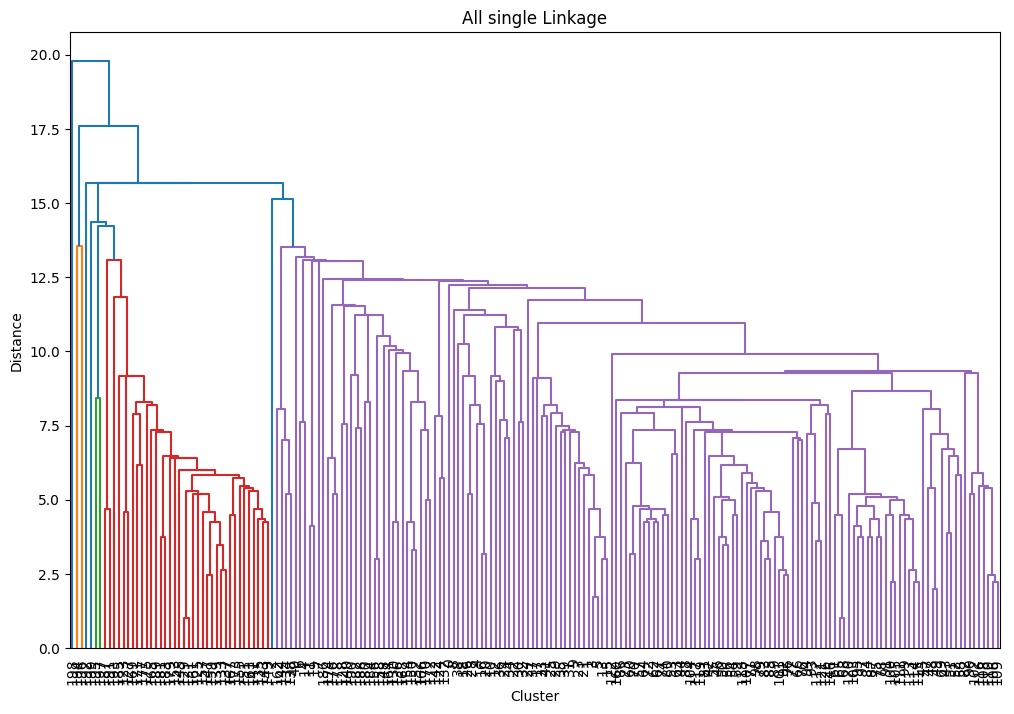

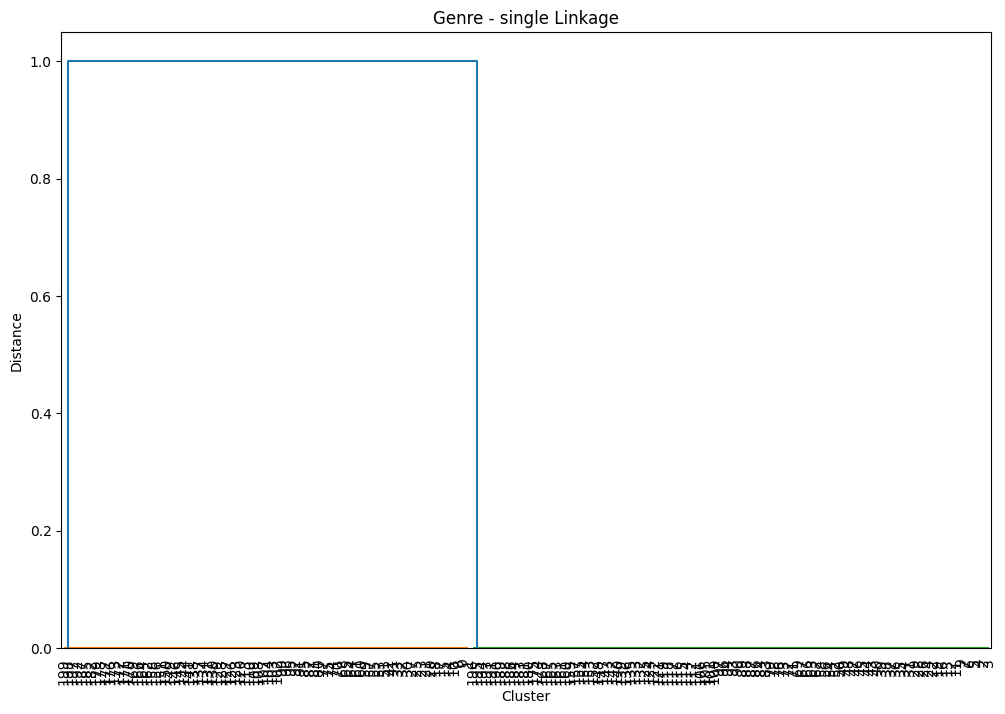

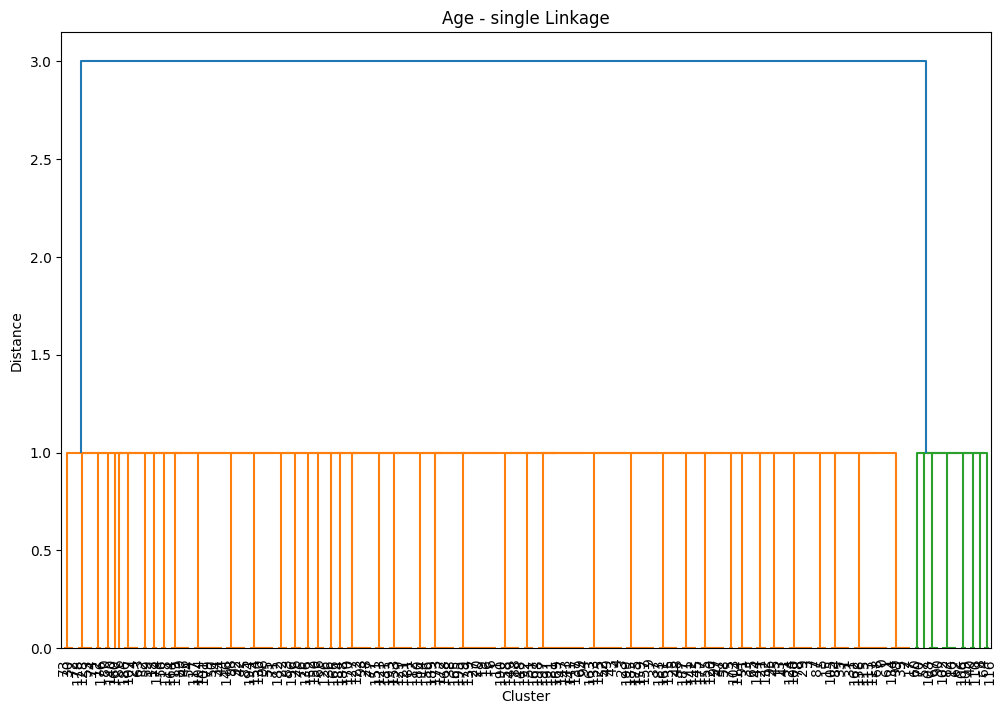

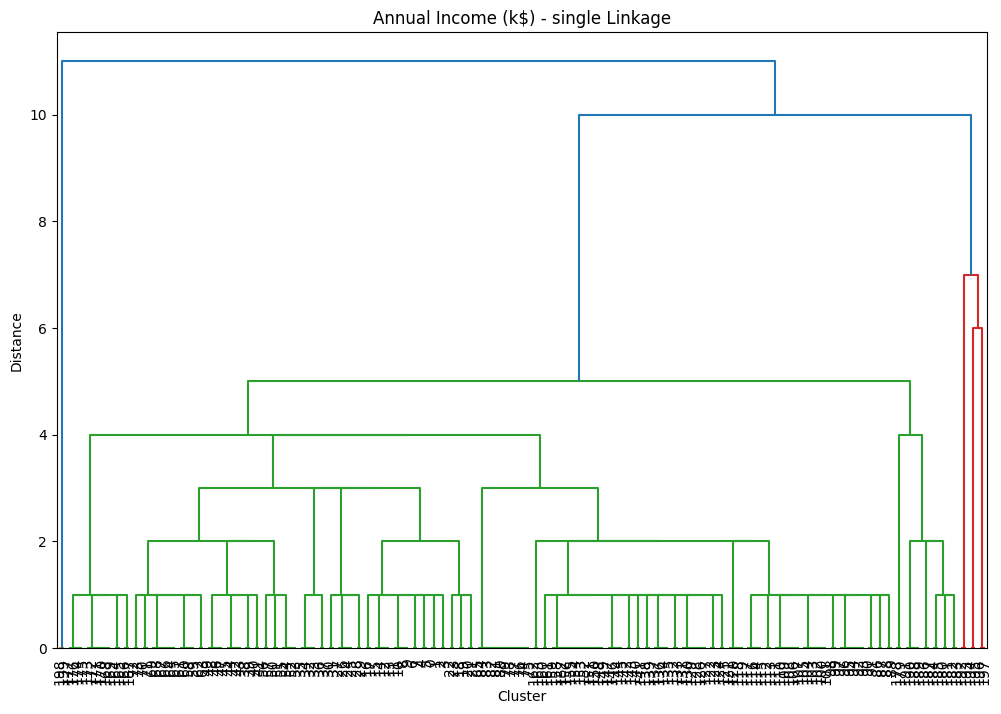

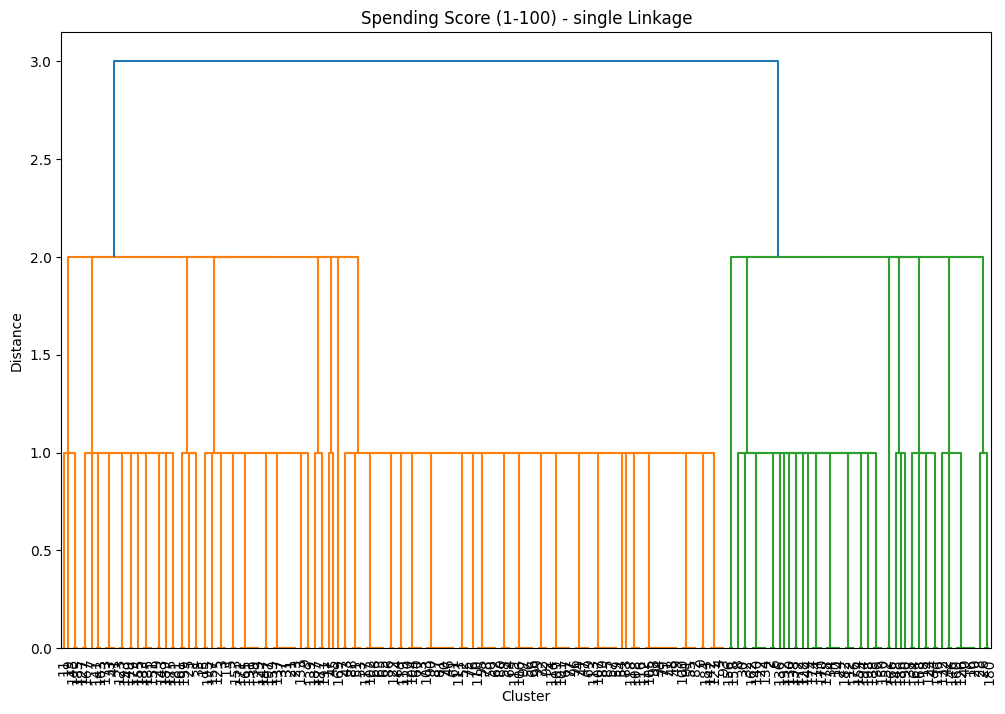

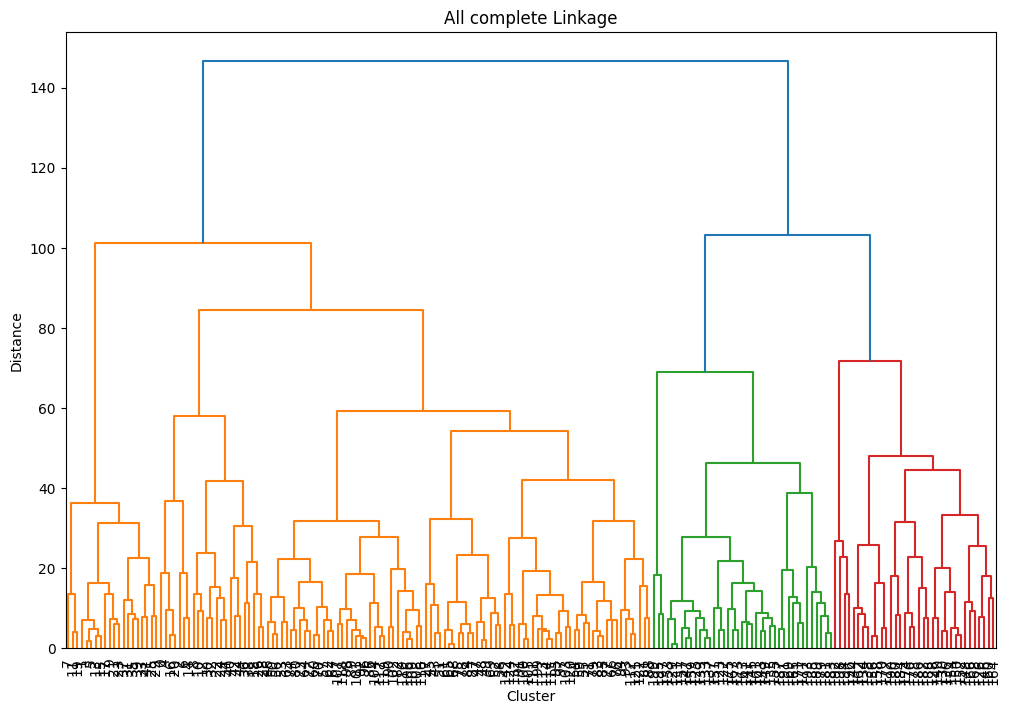

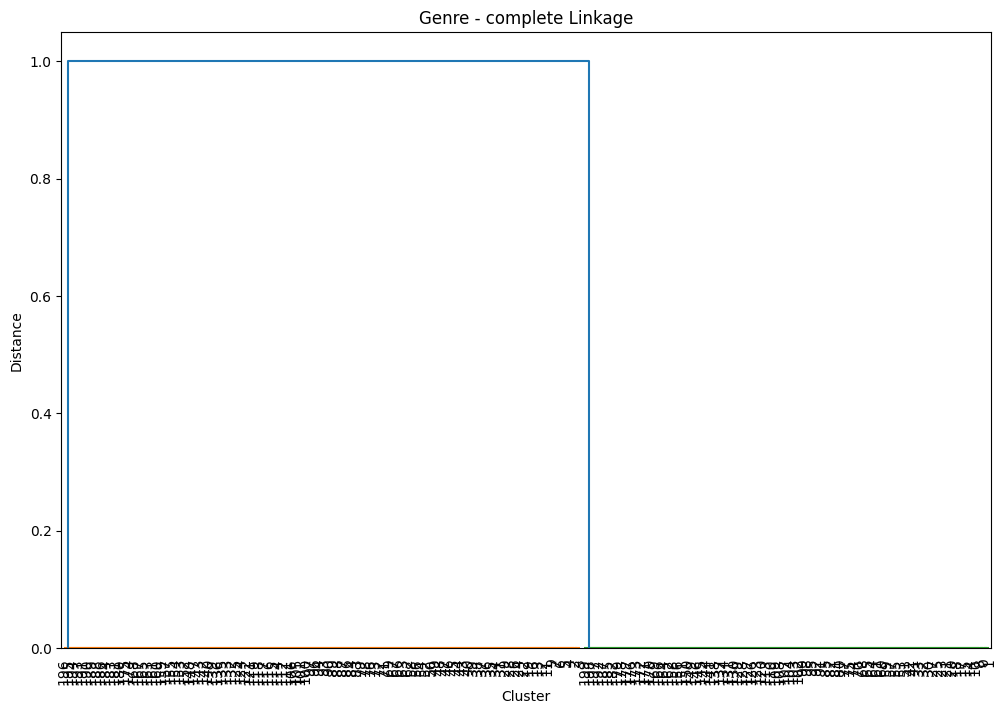

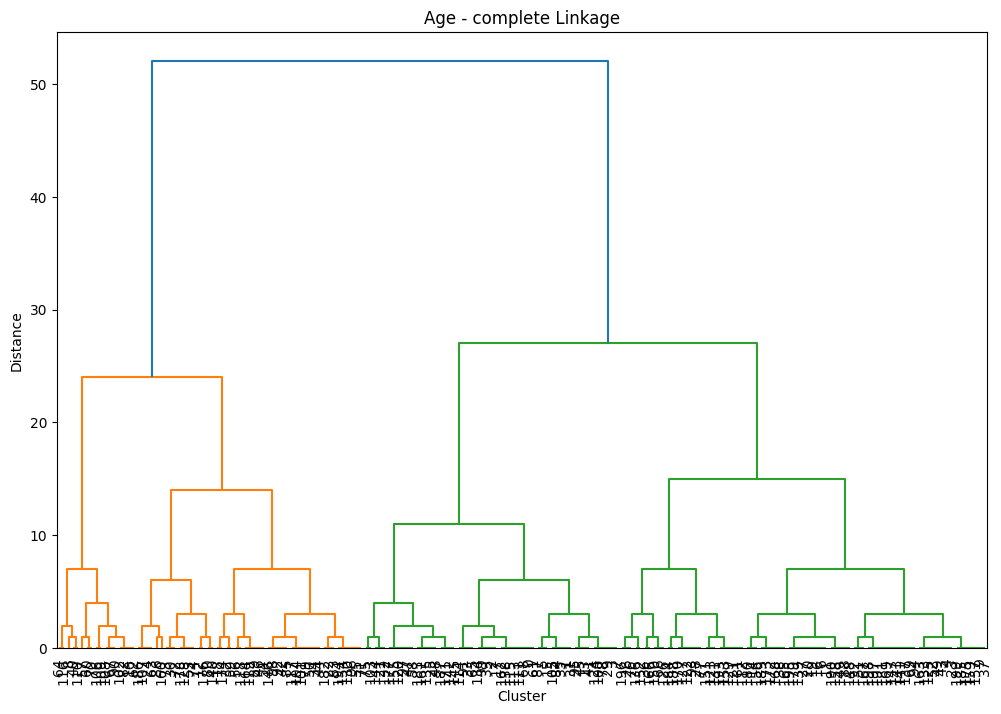

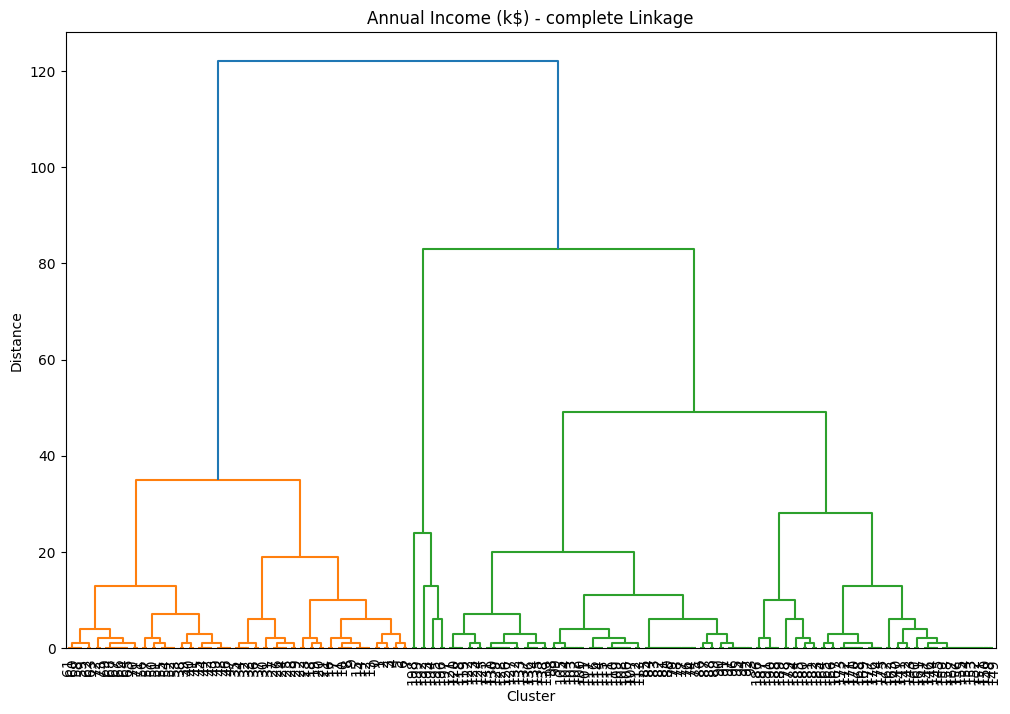

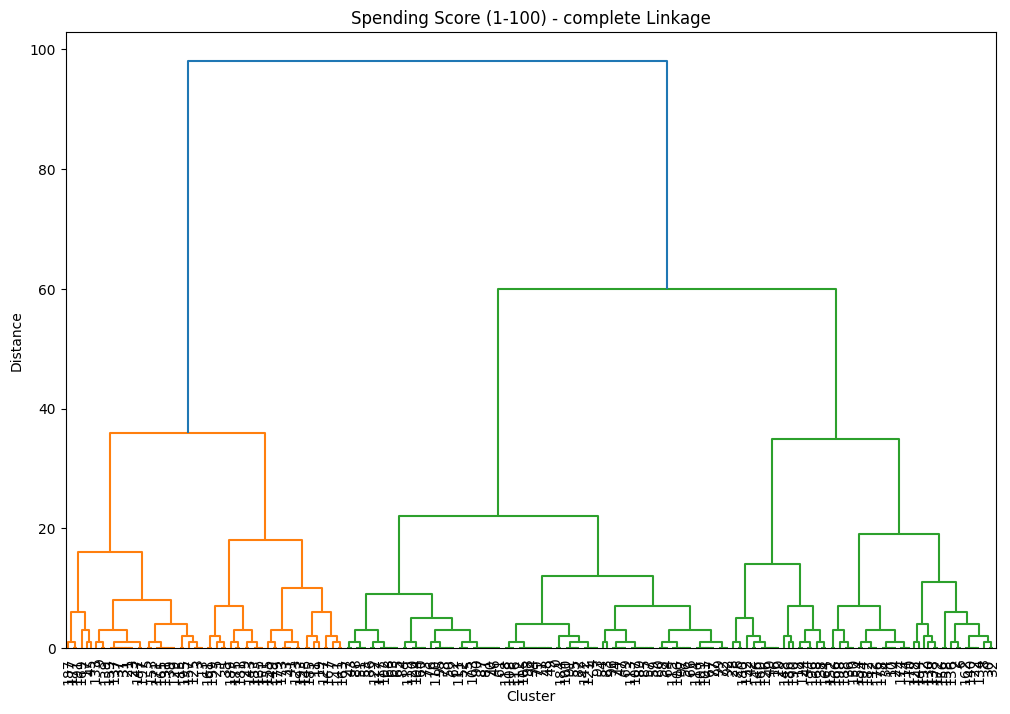

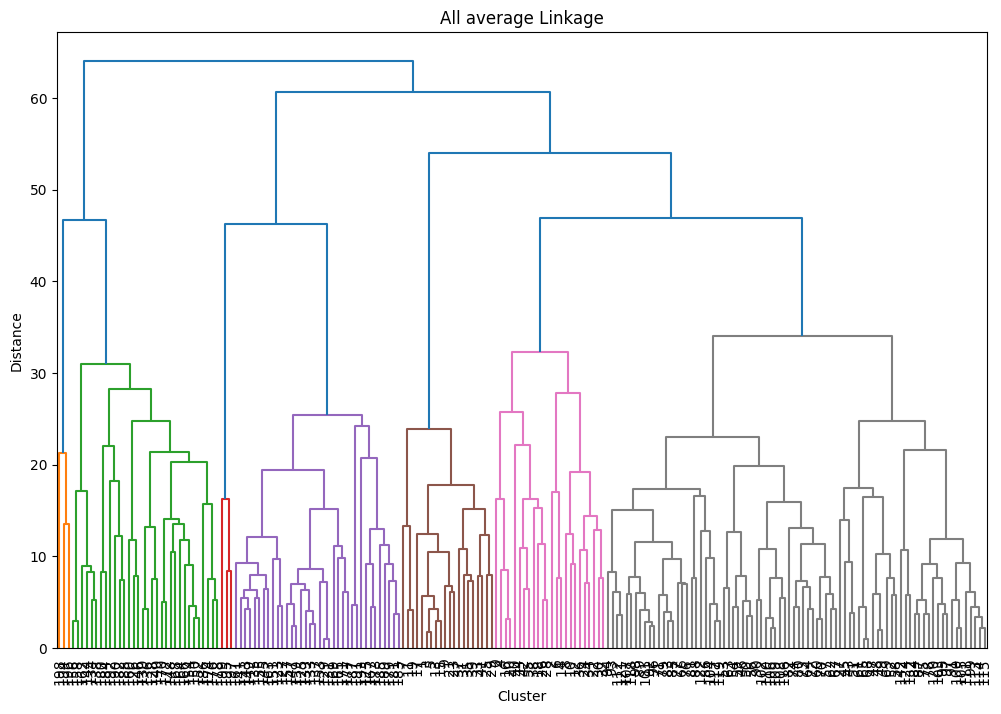

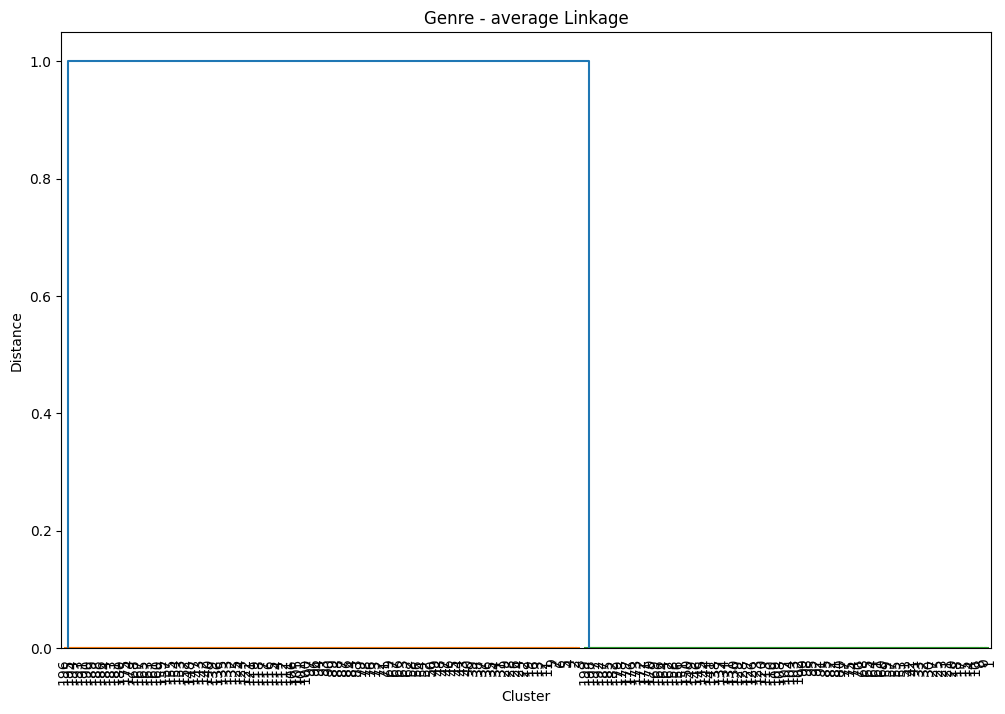

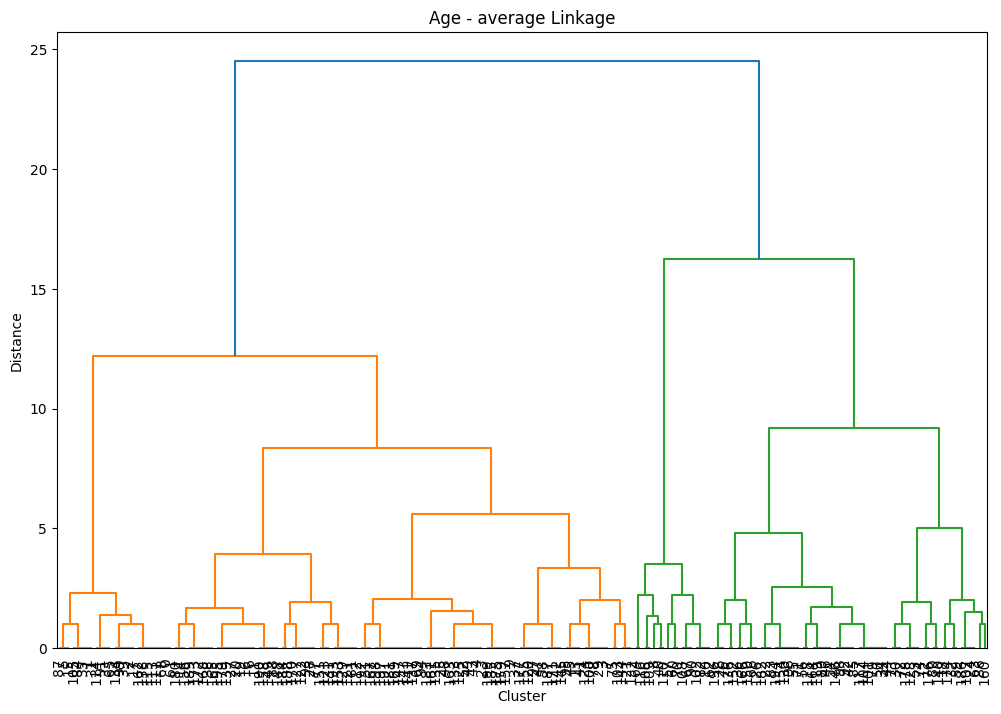

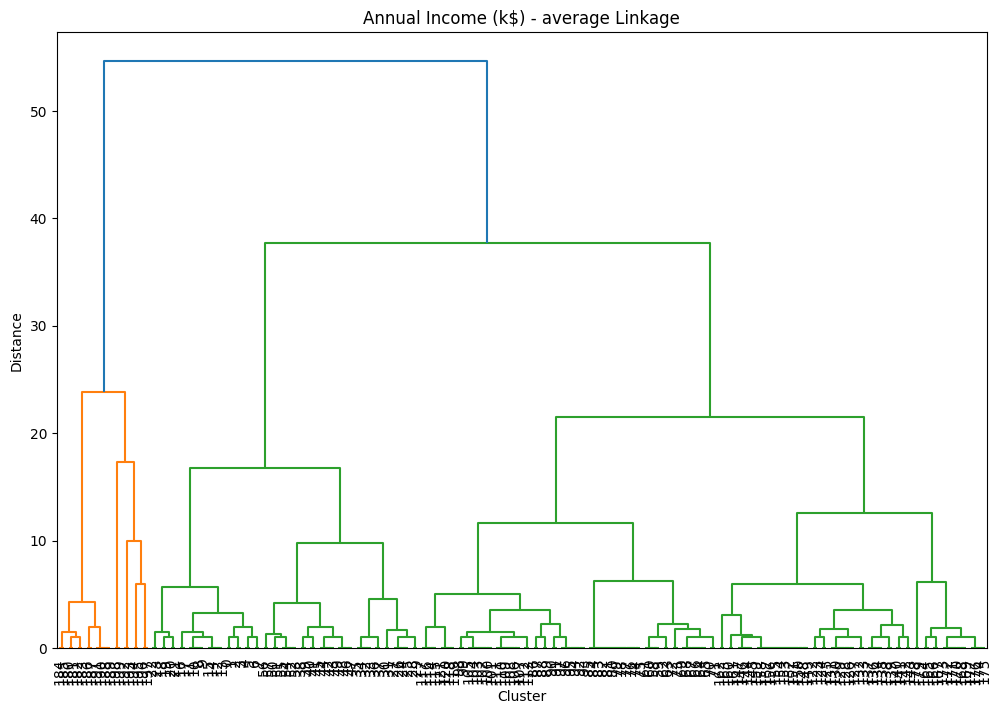

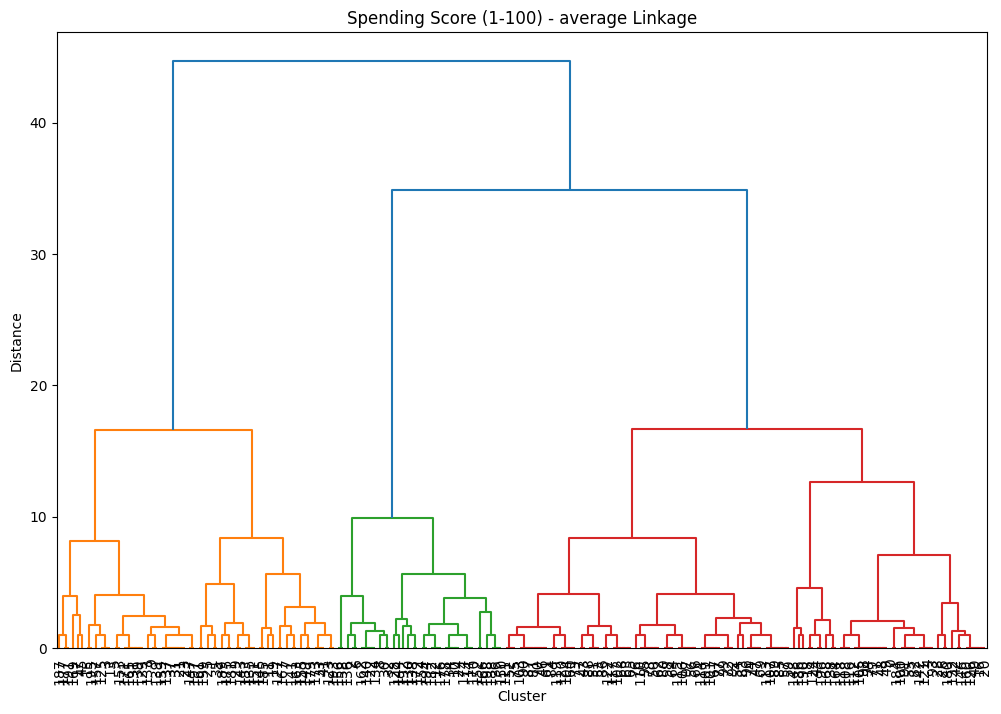

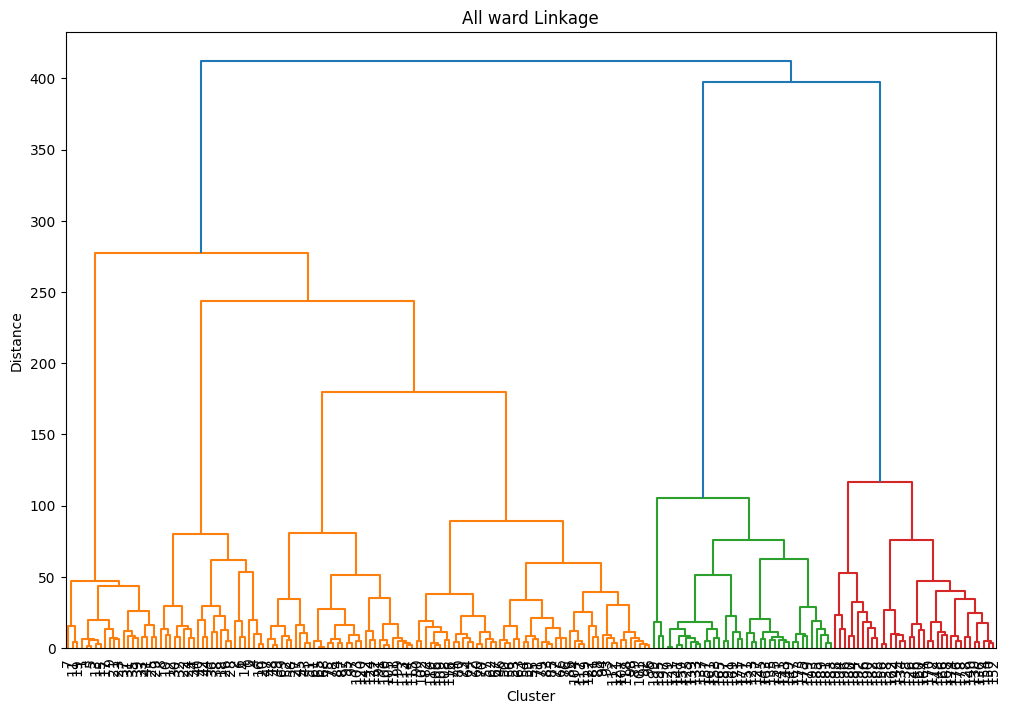

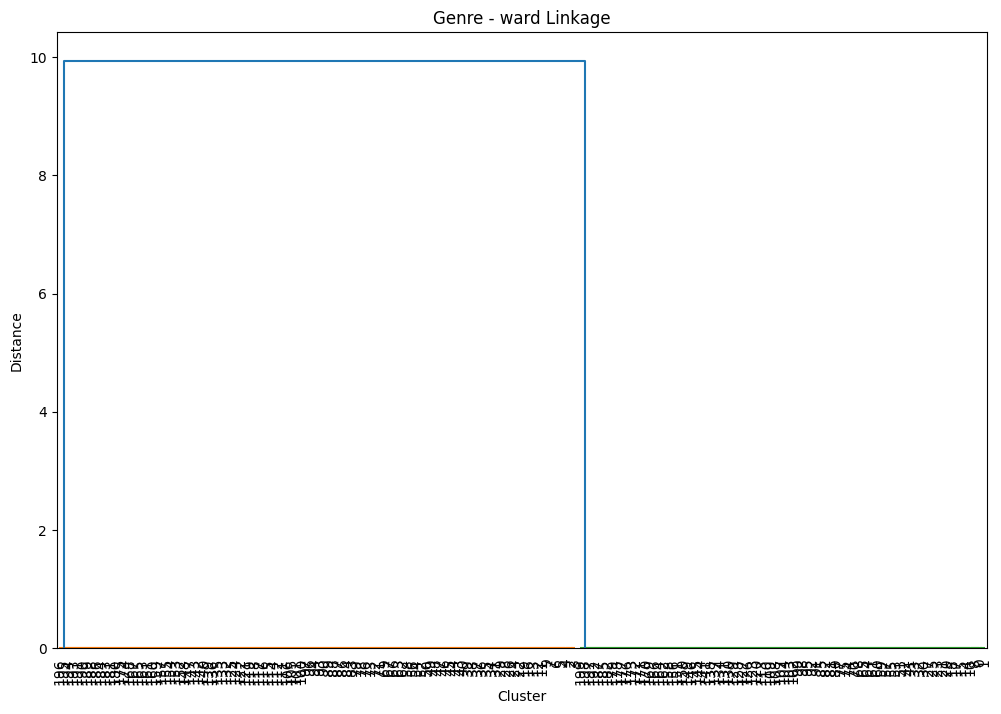

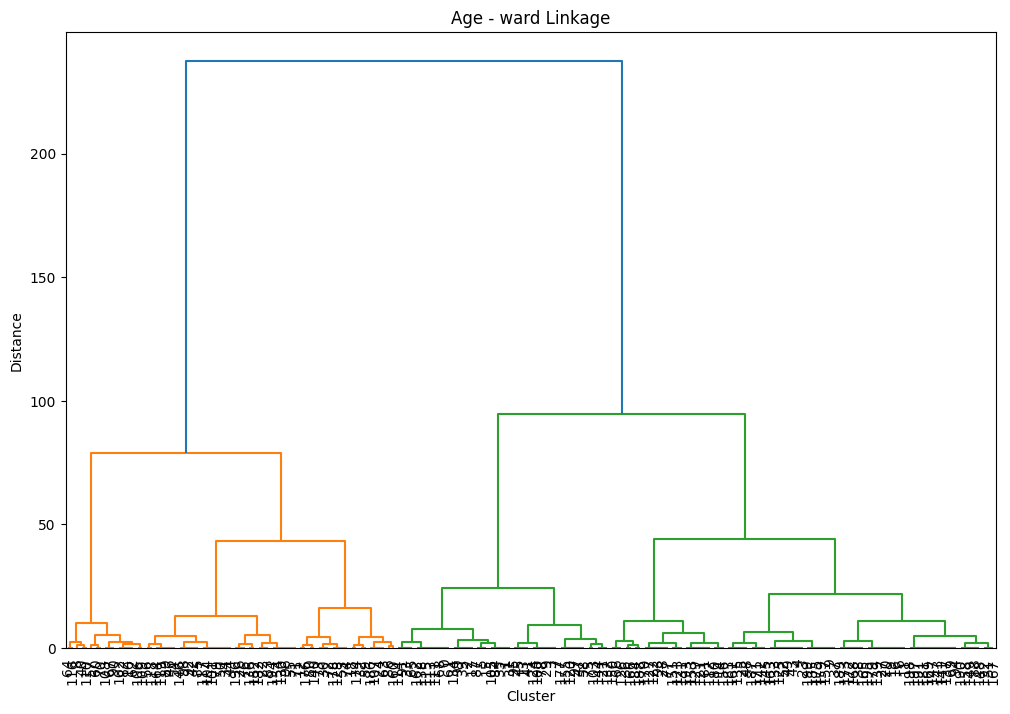

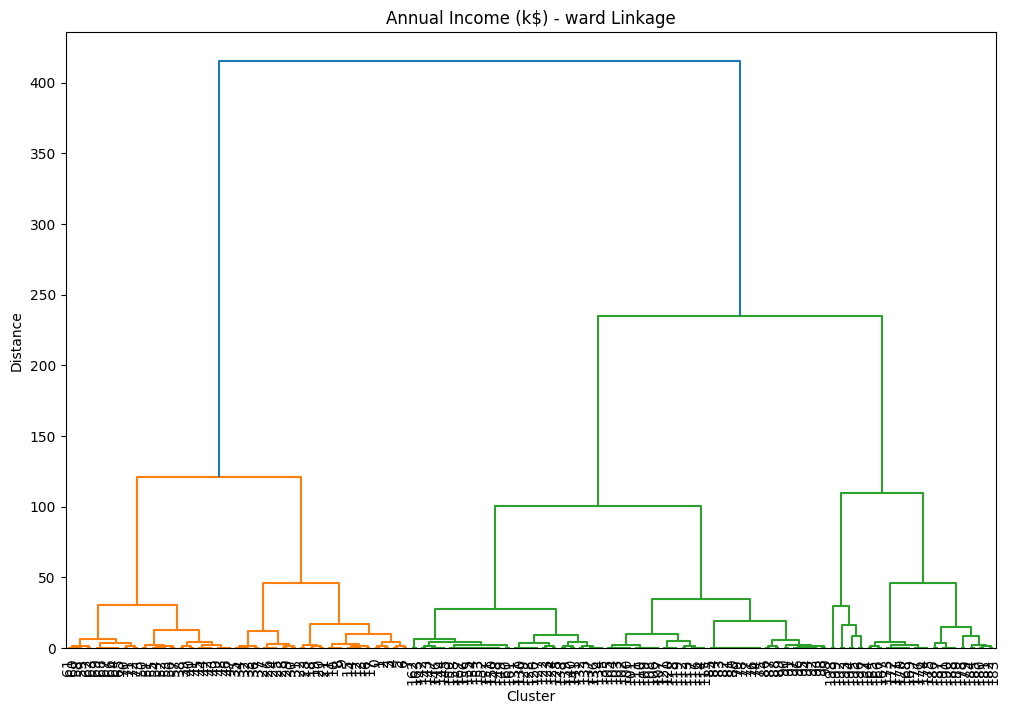

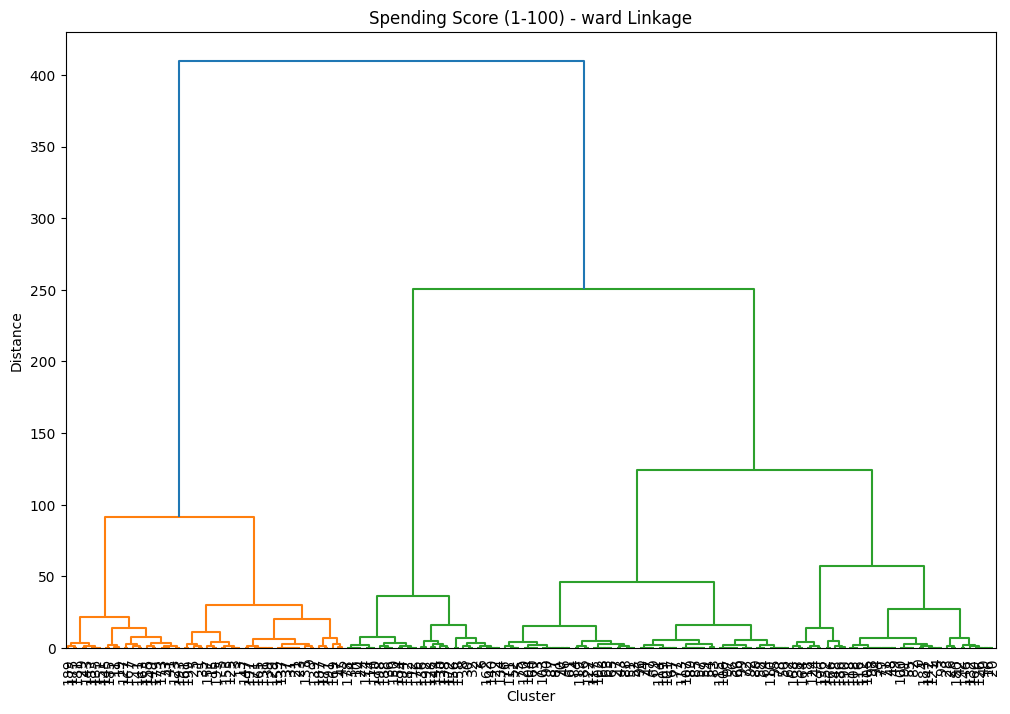

In [34]:
# linkage_matrix_single = hc.perform_clustering()
# hc.plot_dendrogram(linkage_matrix_single)

# linkage_matrix_single = hc.perform_clustering(linkage_type='single')
# hc.plot_dendrogram(linkage_matrix_single)

# linkage_matrix_complete = hc.perform_clustering(linkage_type='complete')
# hc.plot_dendrogram(linkage_matrix_complete)

# linkage_matrix_average = hc.perform_clustering(linkage_type='average')
# hc.plot_dendrogram(linkage_matrix_average)
linkage_methods = ['single', 'complete', 'average', 'ward']
for linkage_type in linkage_methods:
    hc = HierarchicalClustering(X.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in X.columns:
        feature_data = X[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')


## Part 2

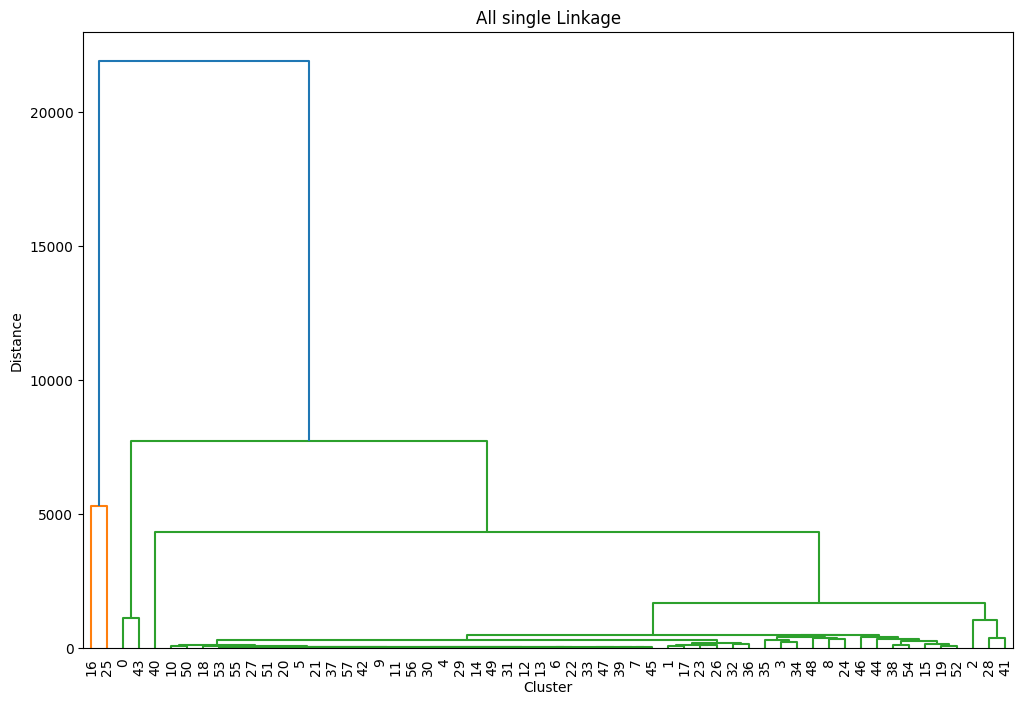

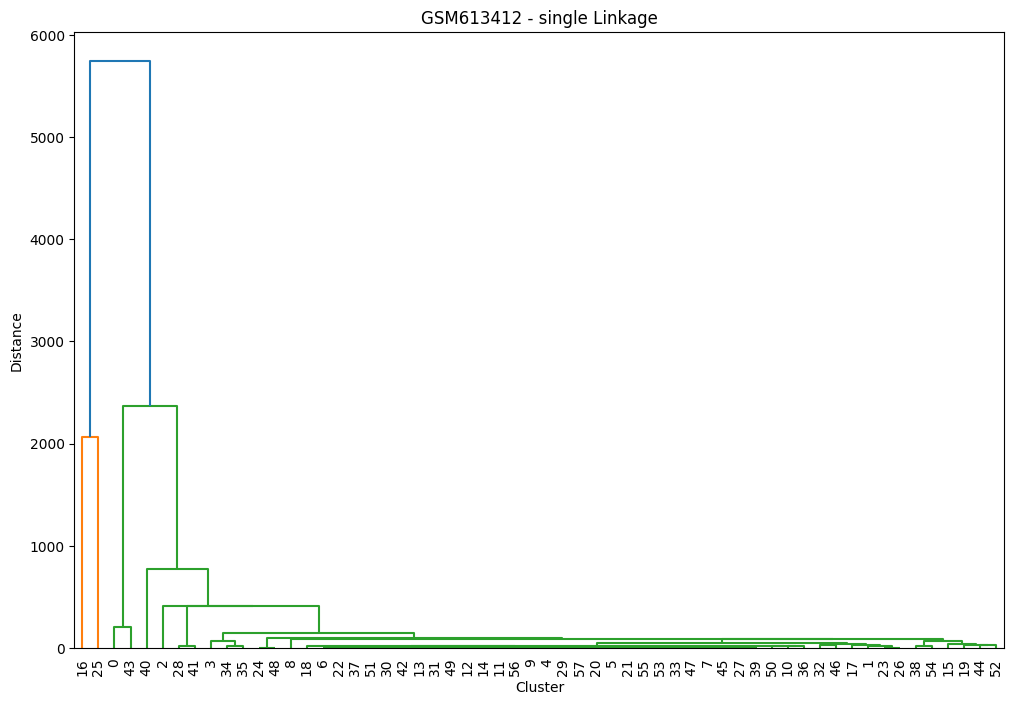

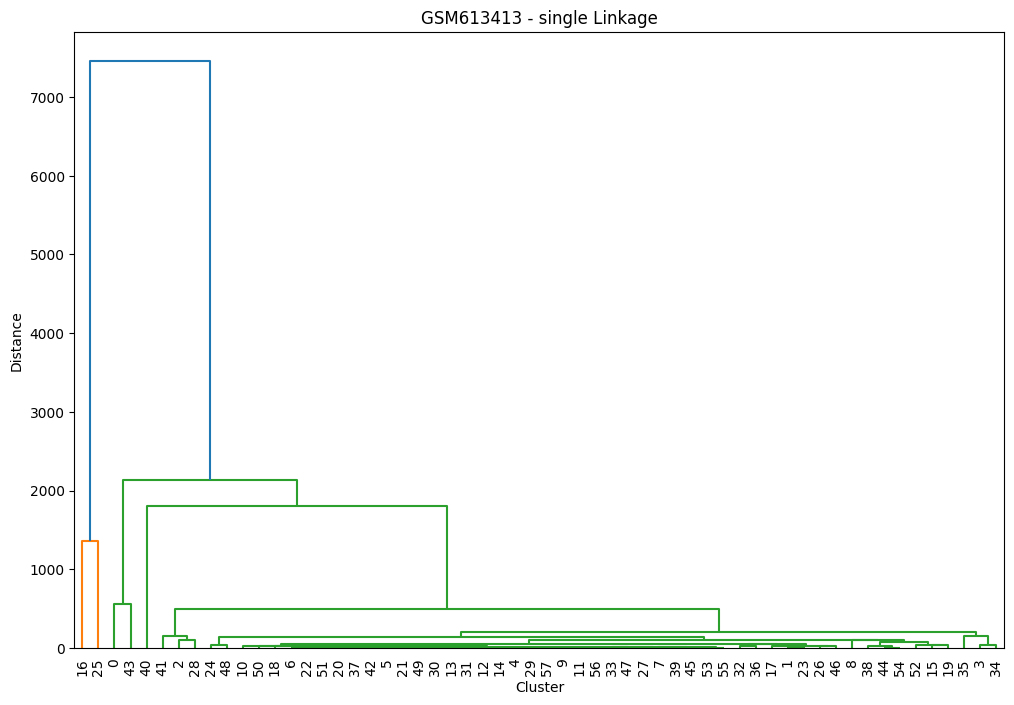

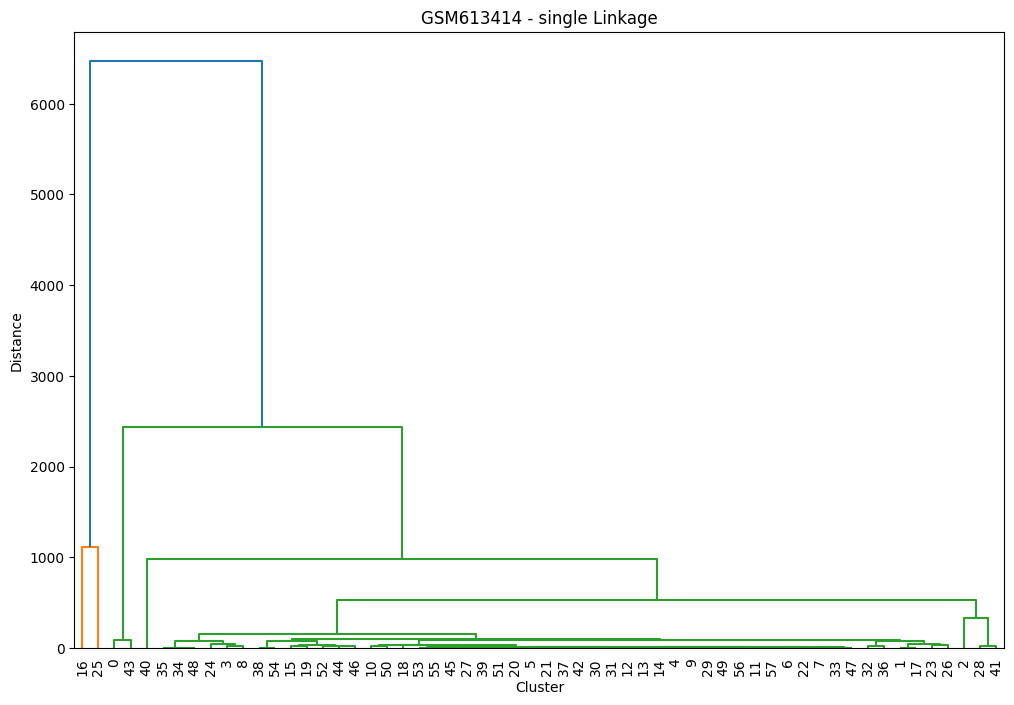

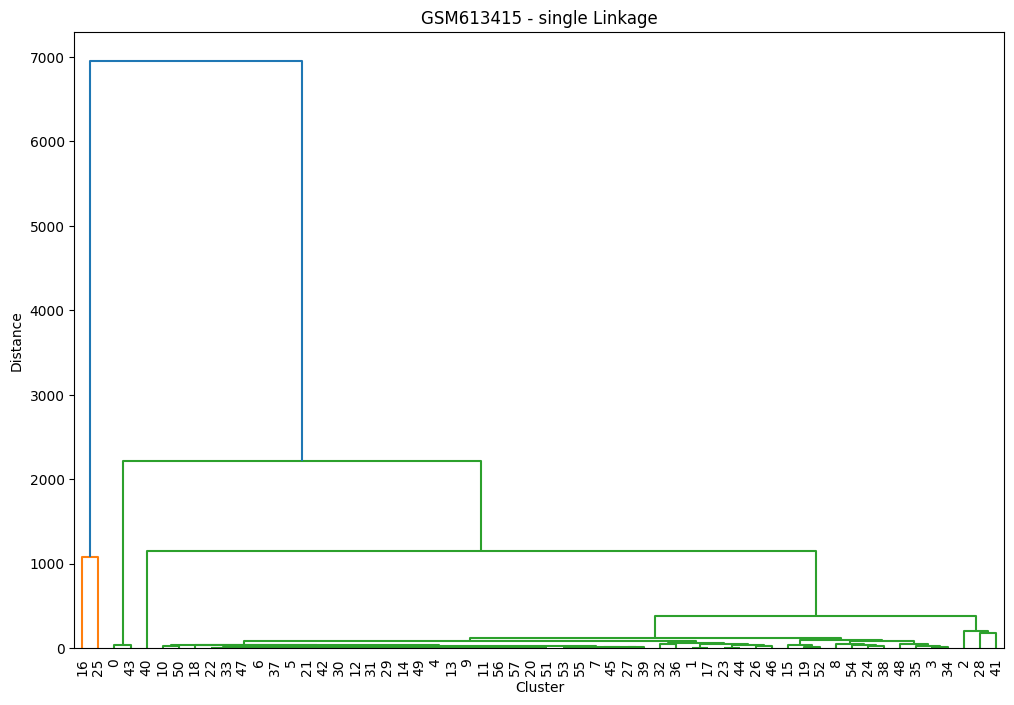

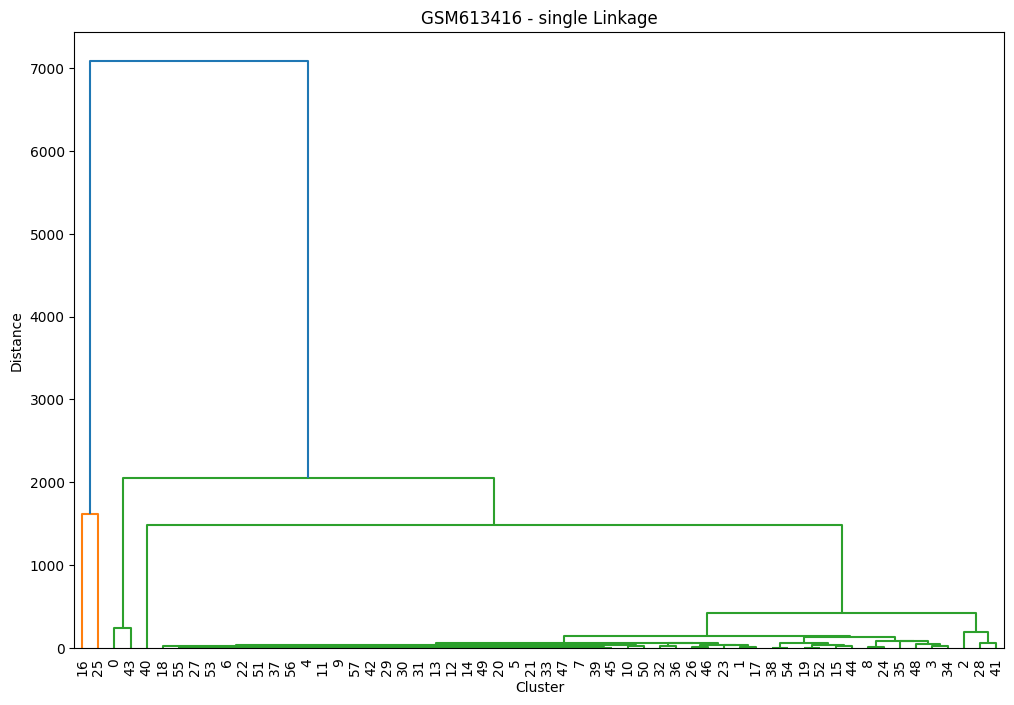

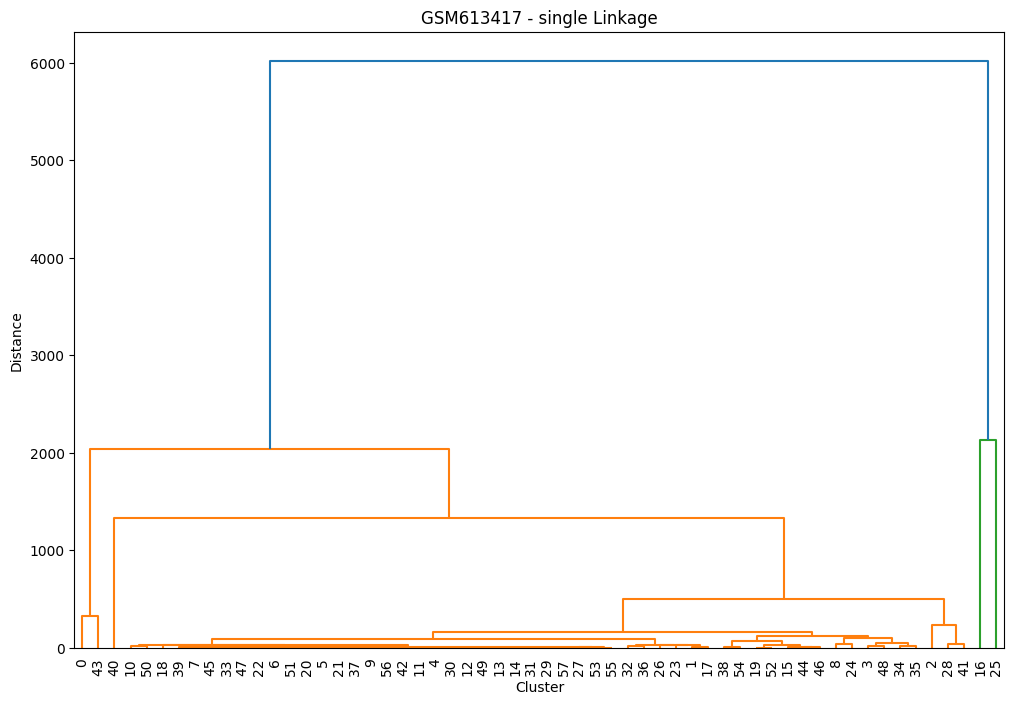

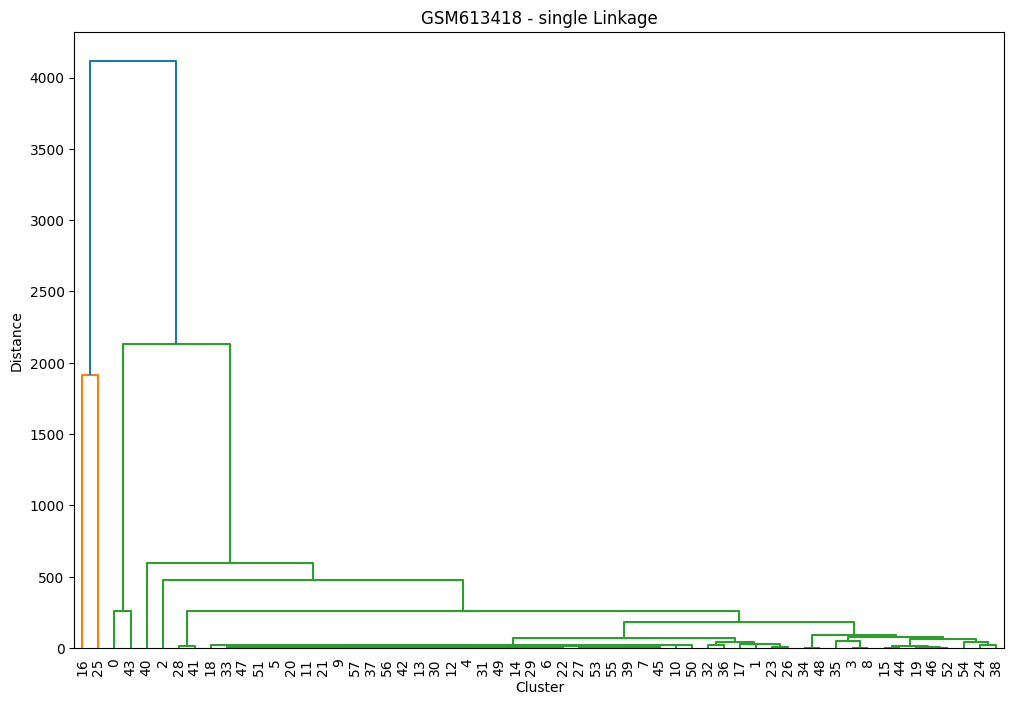

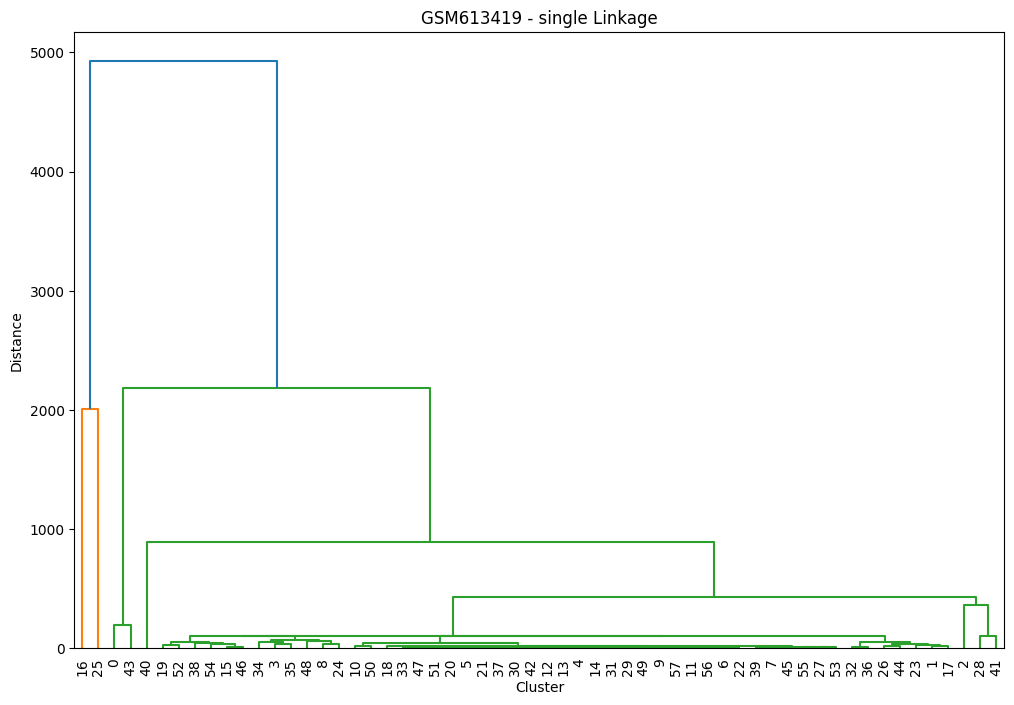

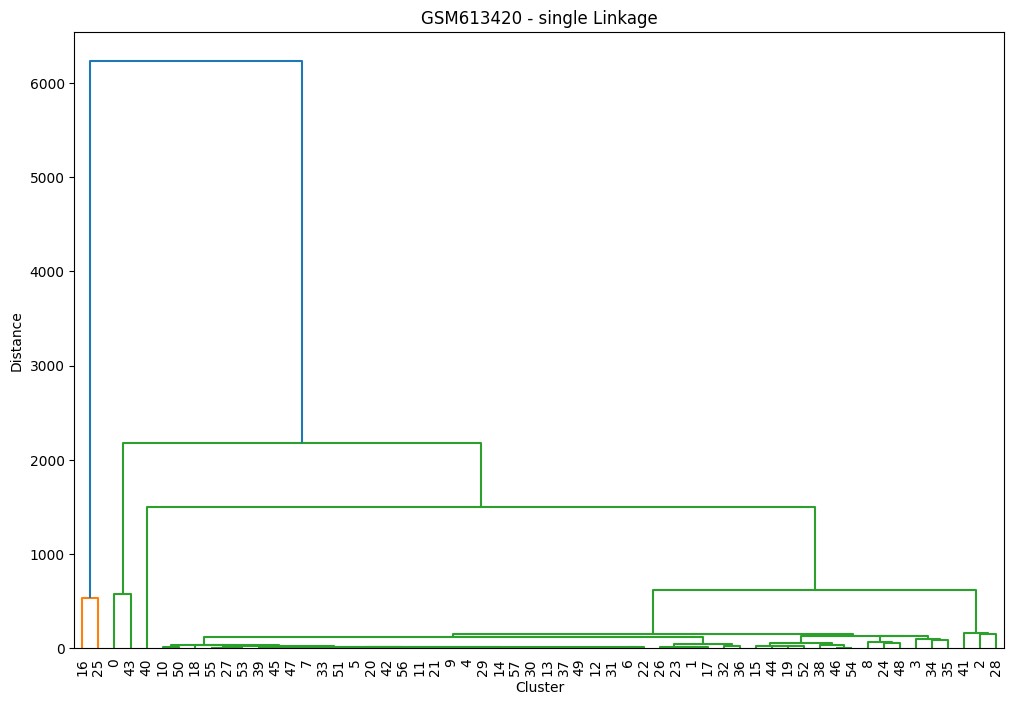

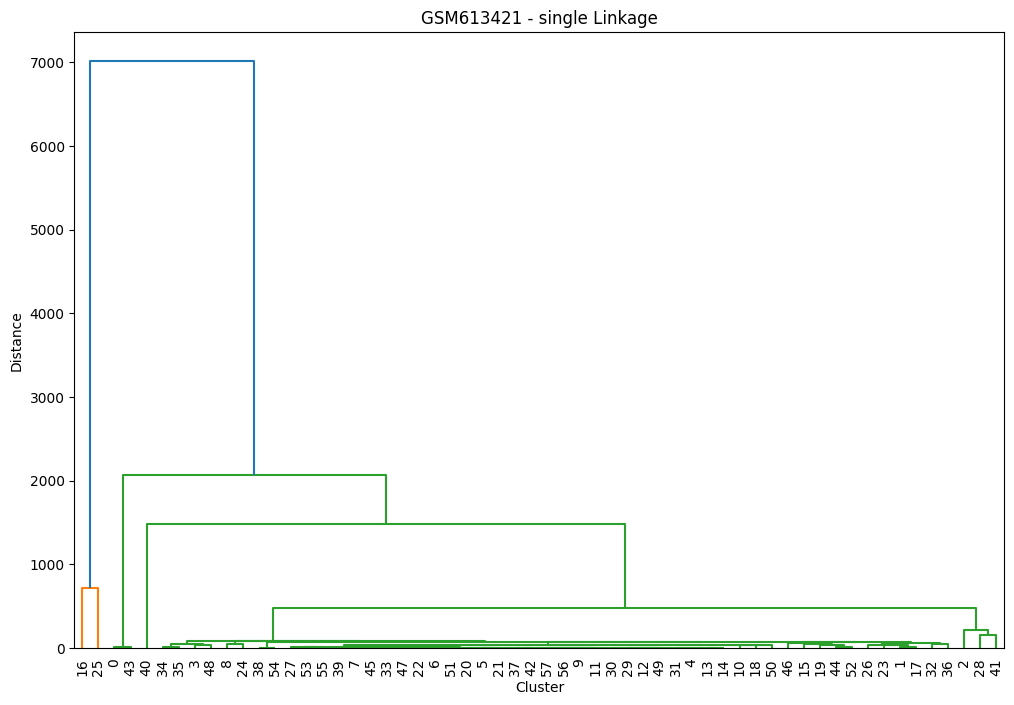

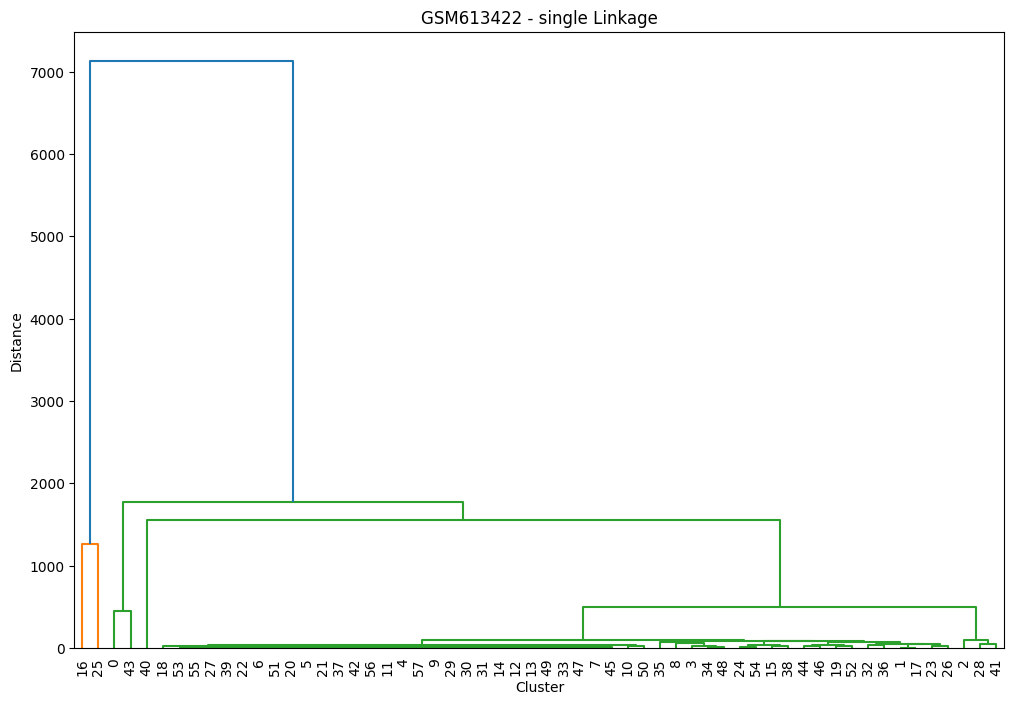

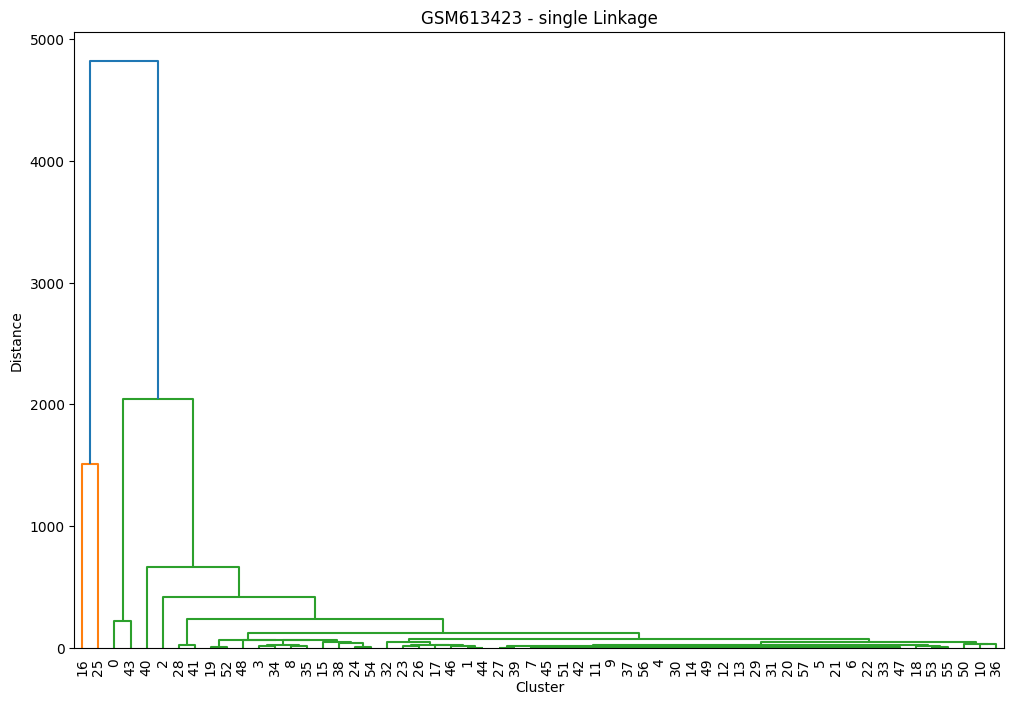

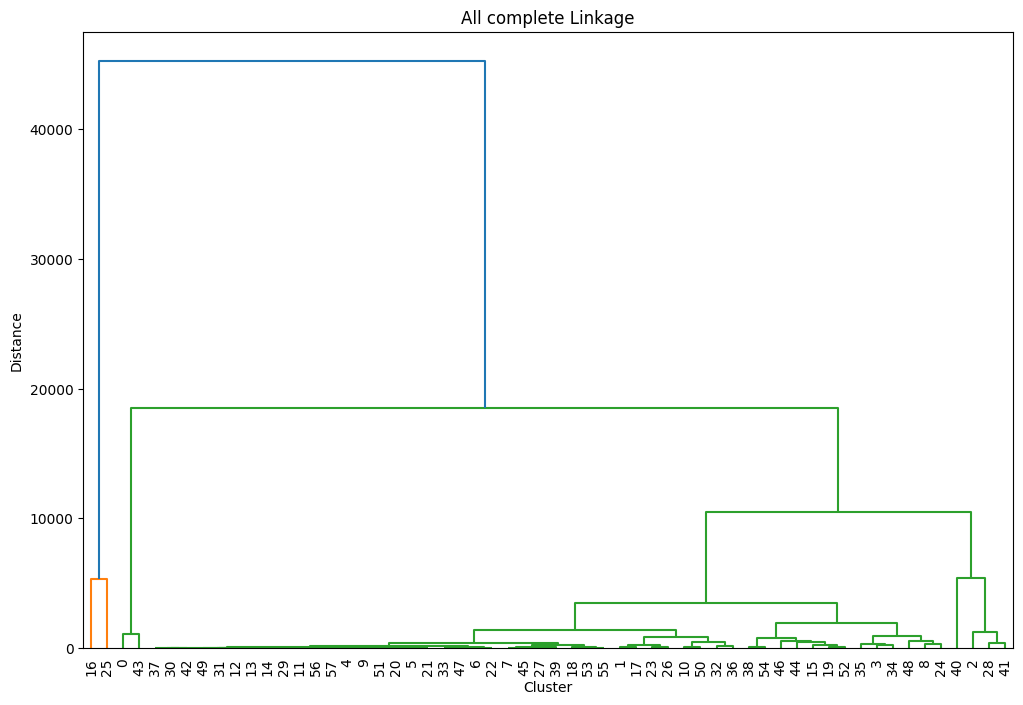

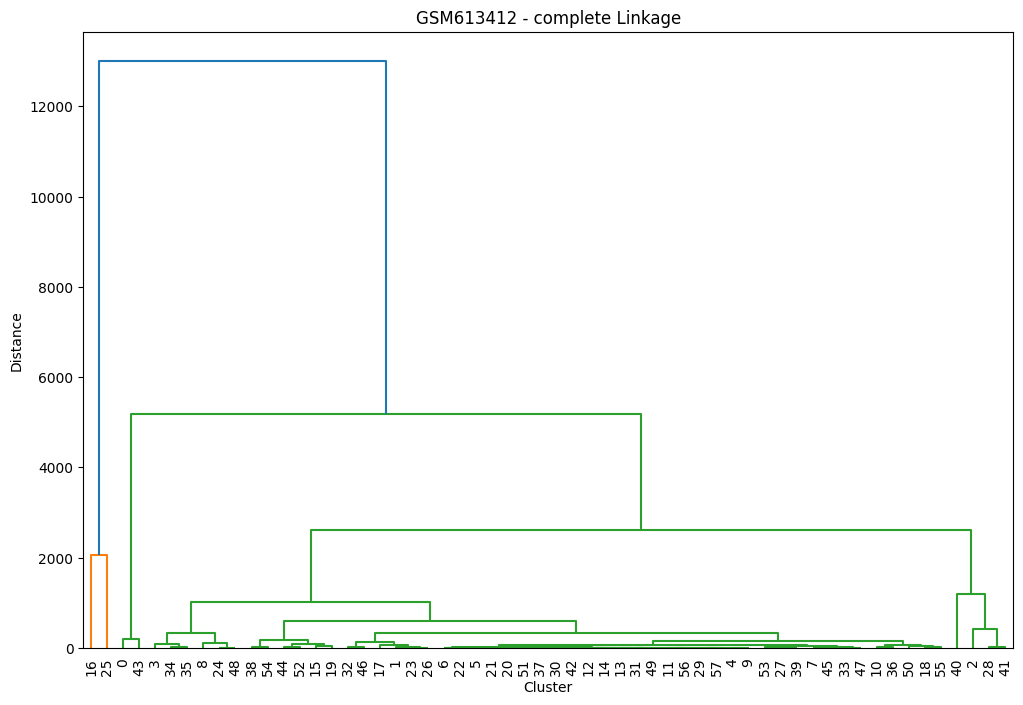

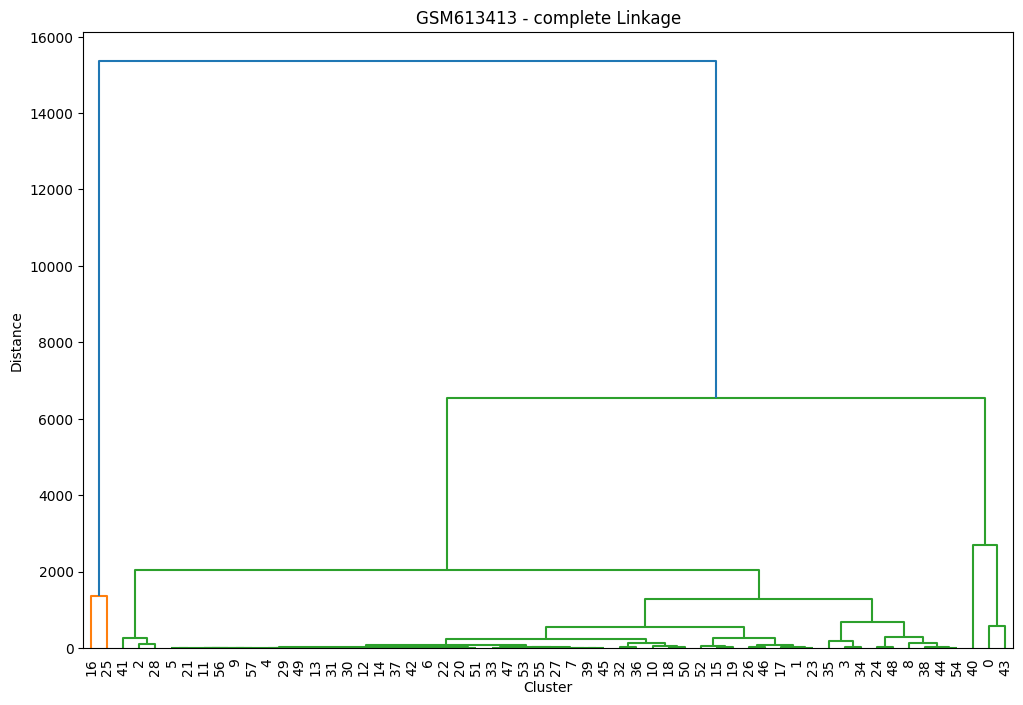

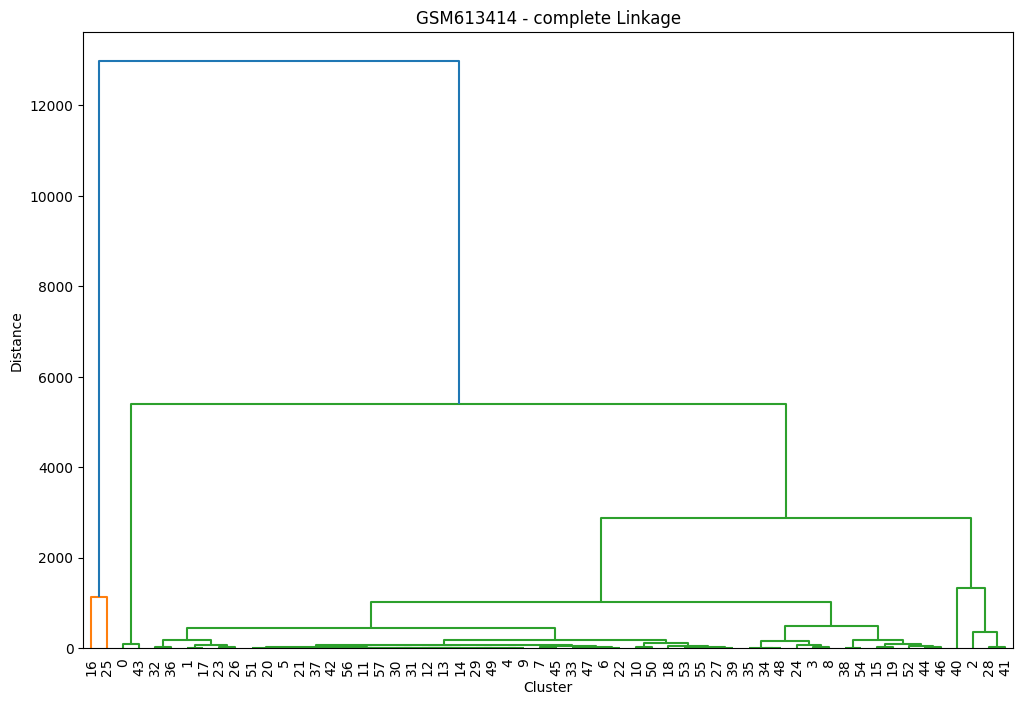

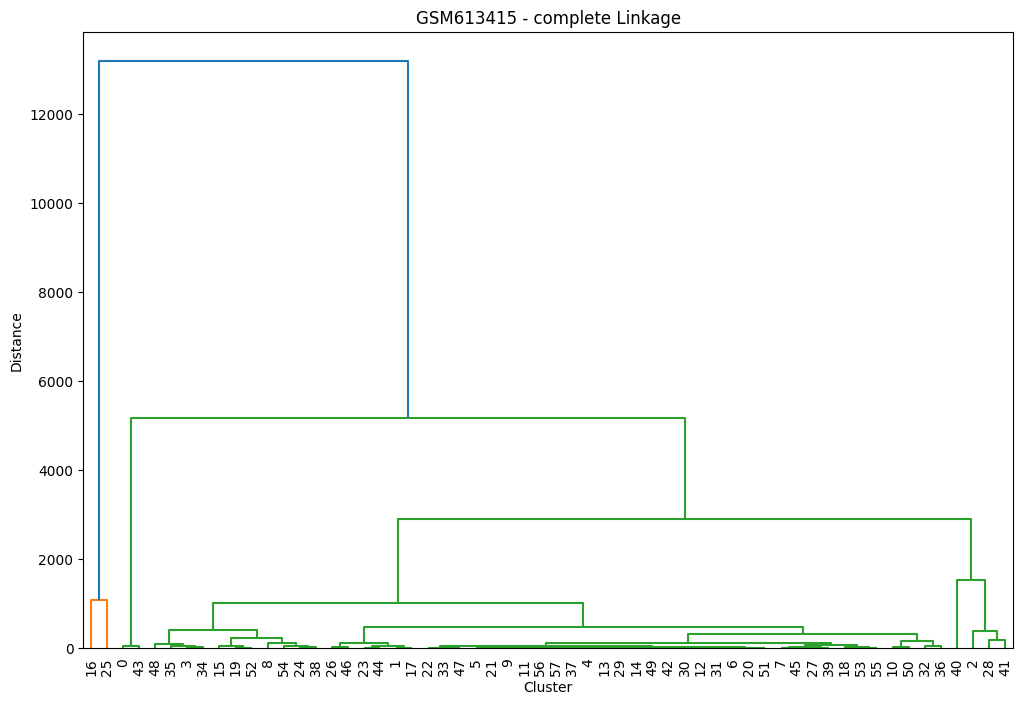

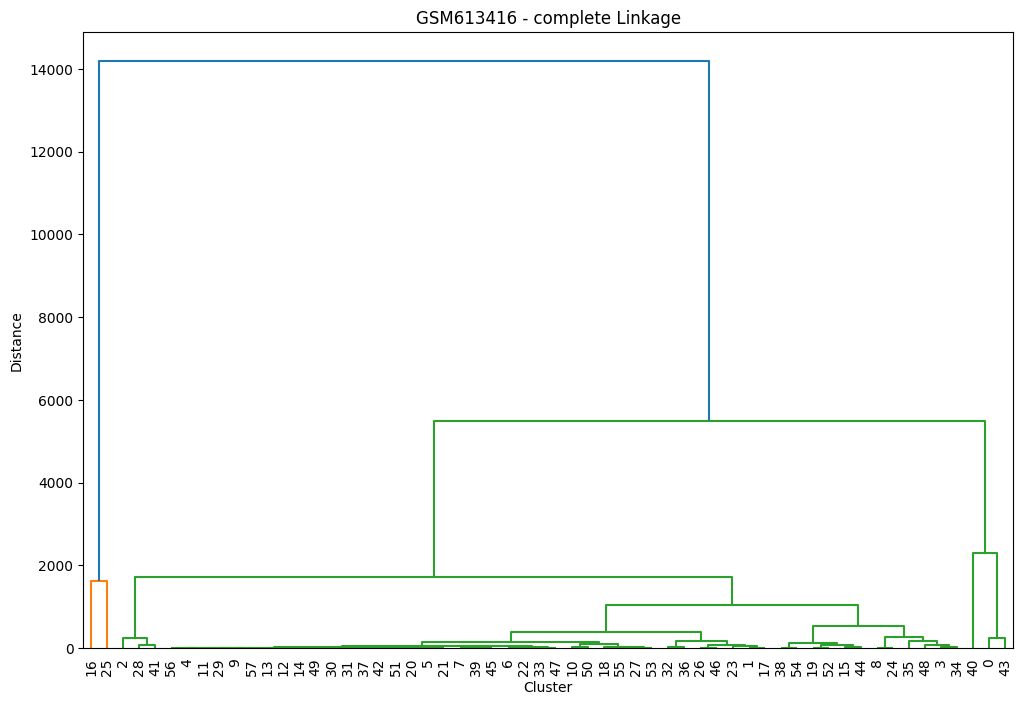

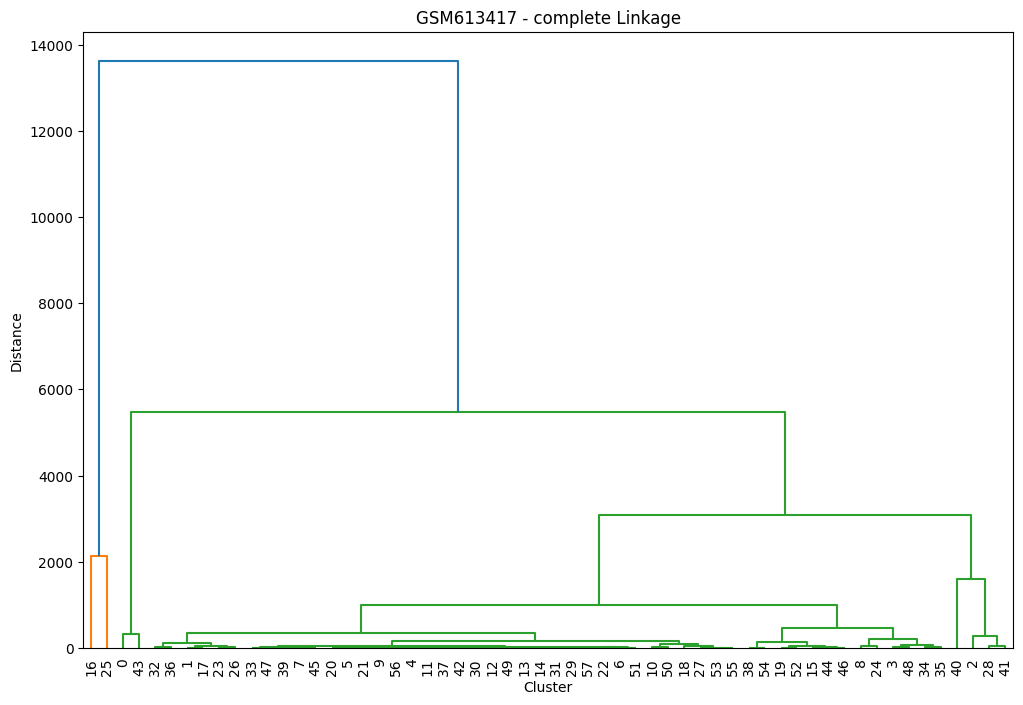

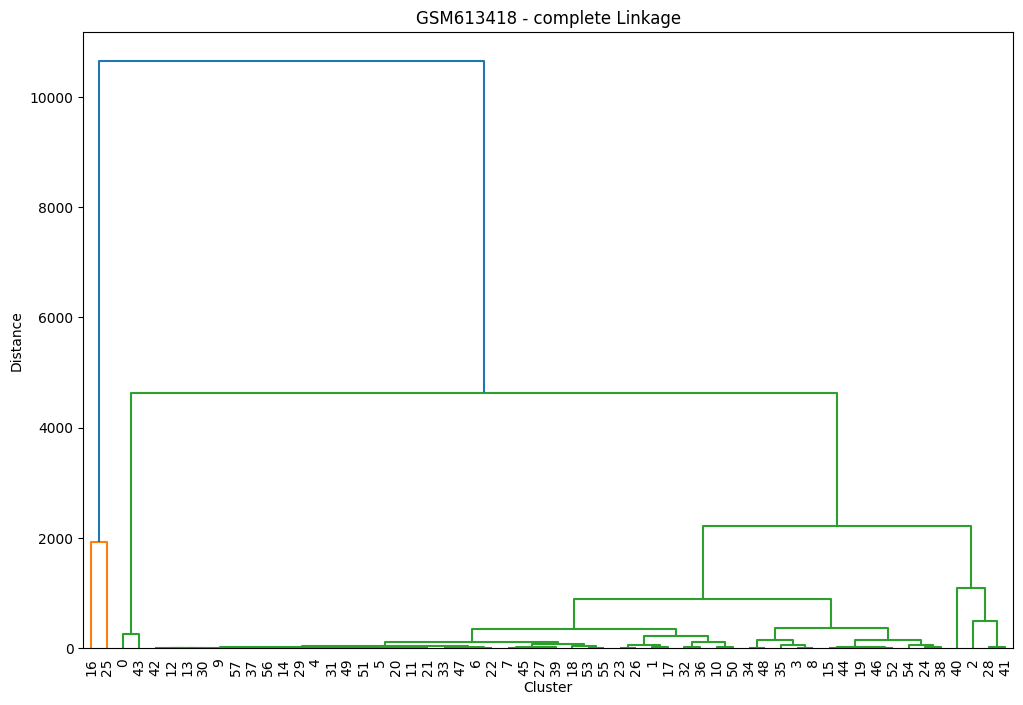

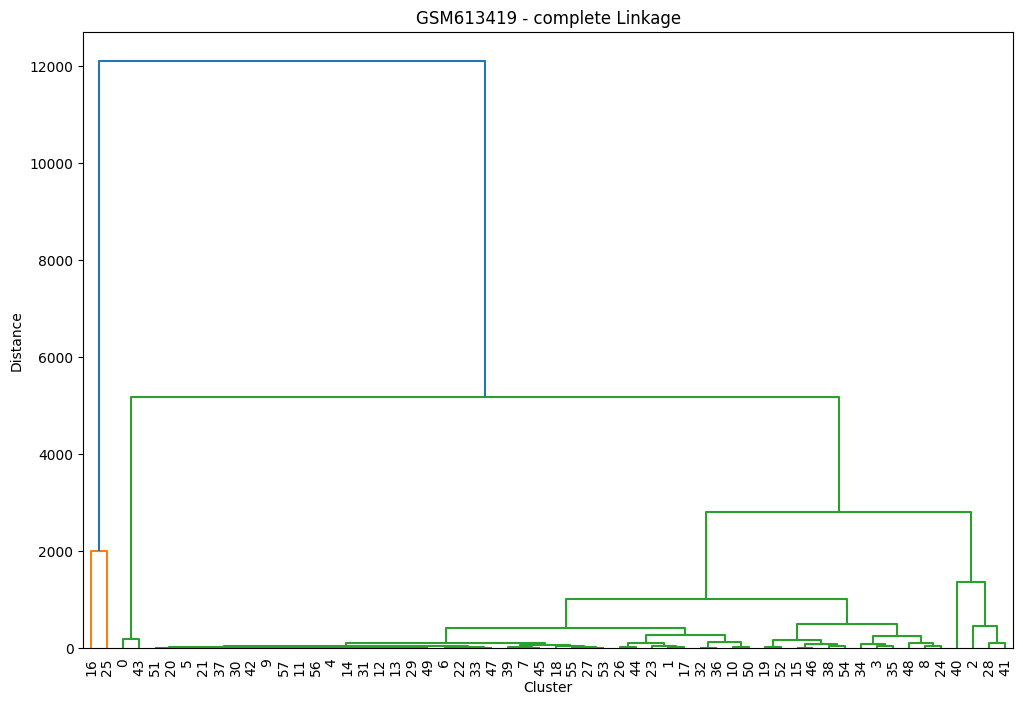

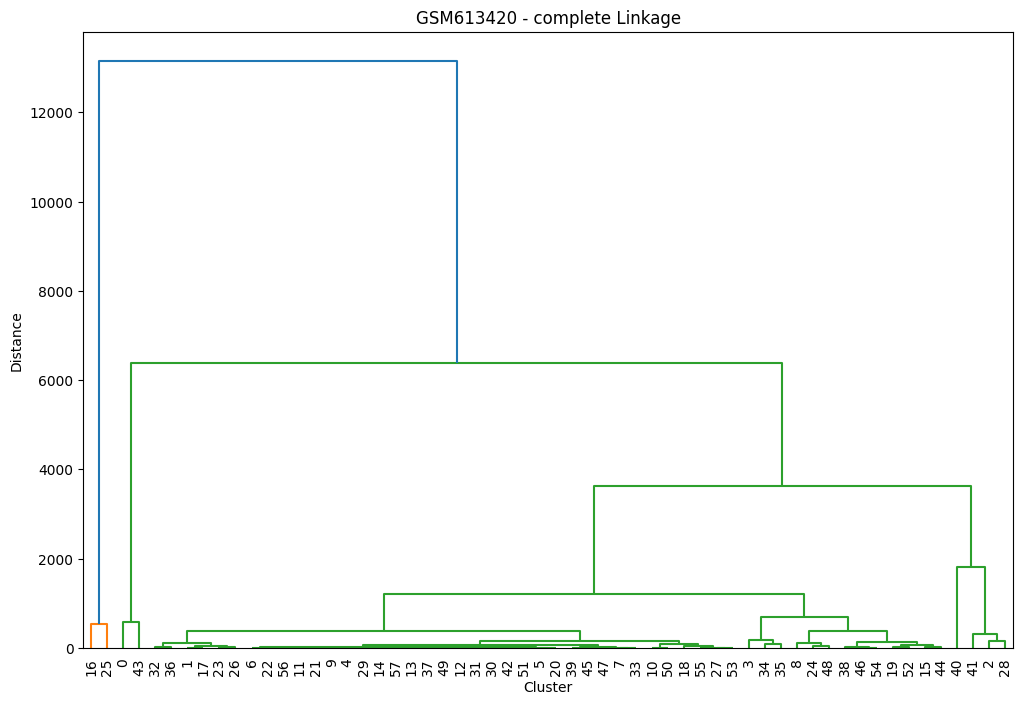

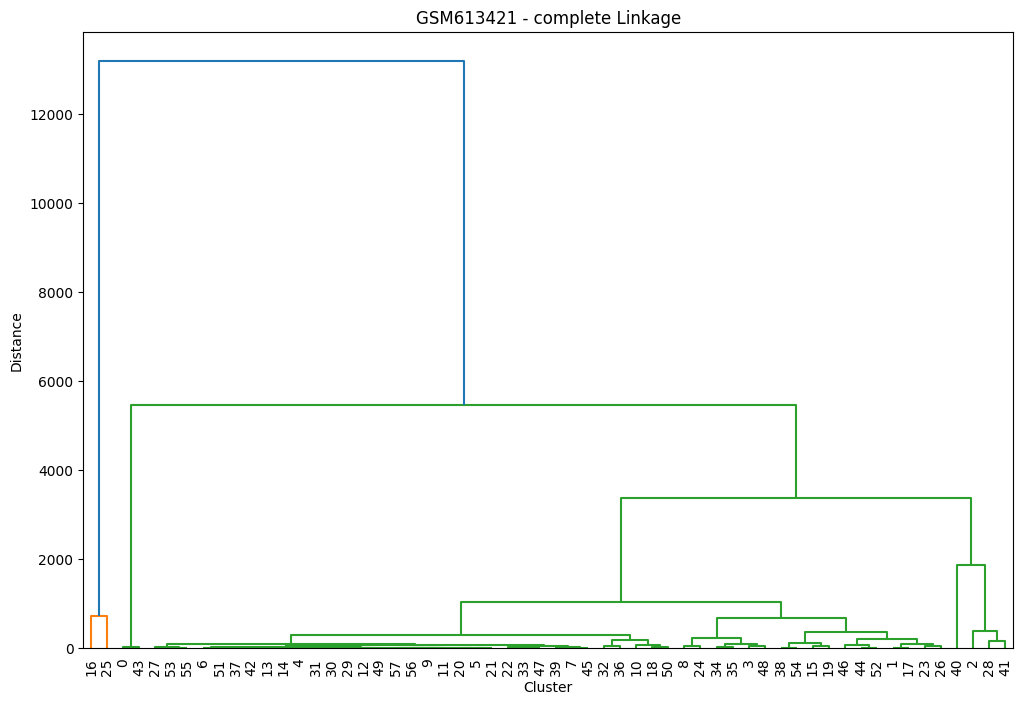

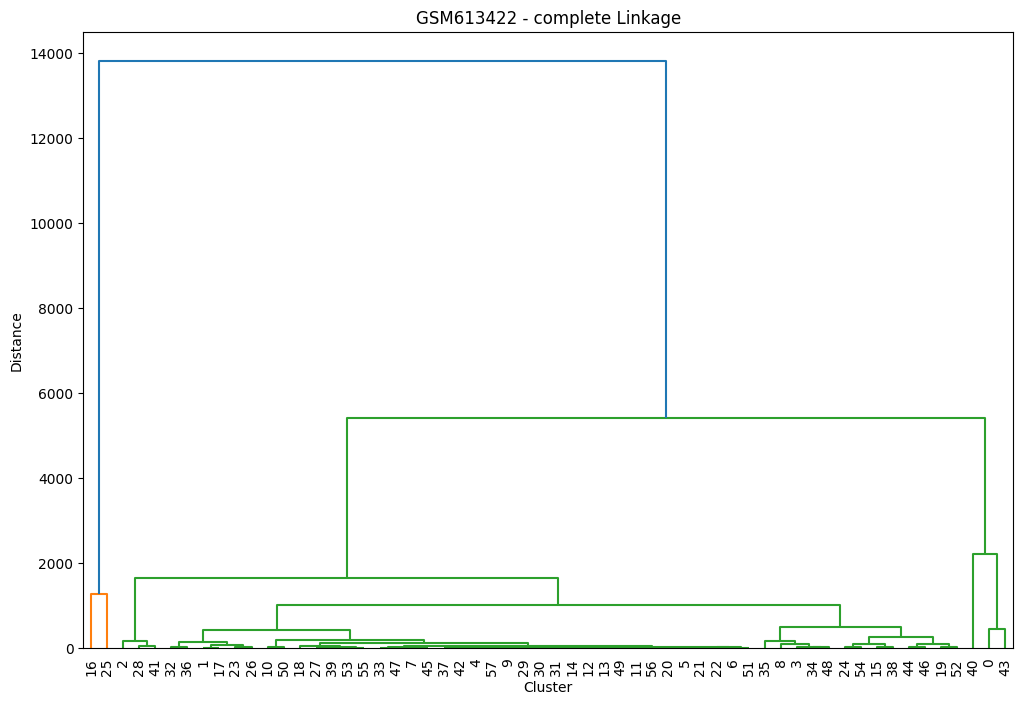

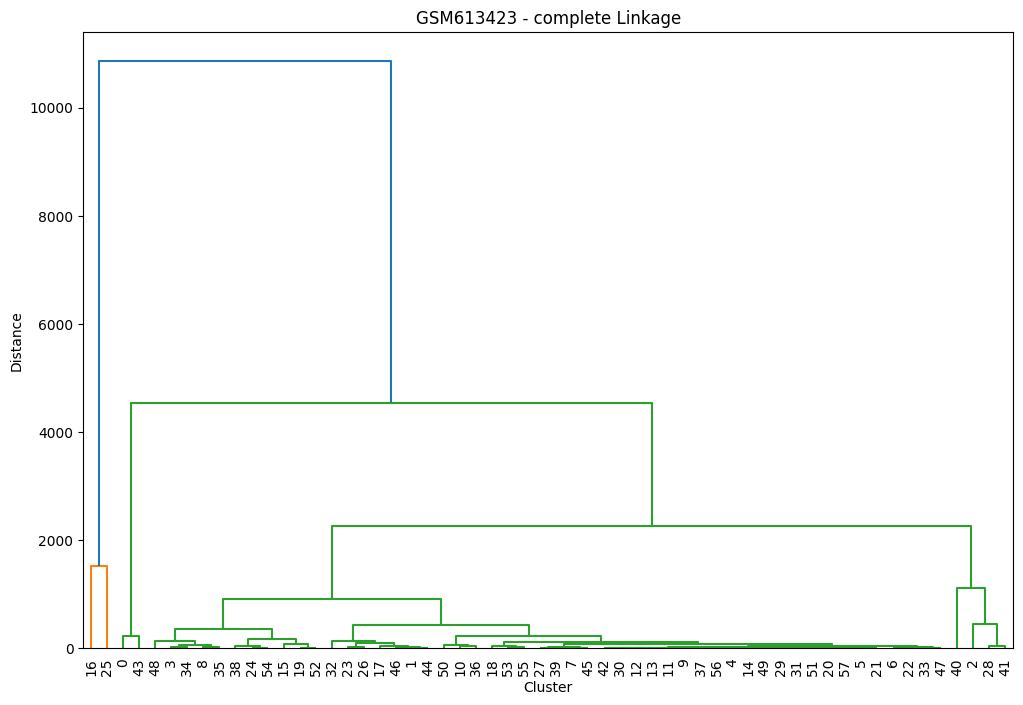

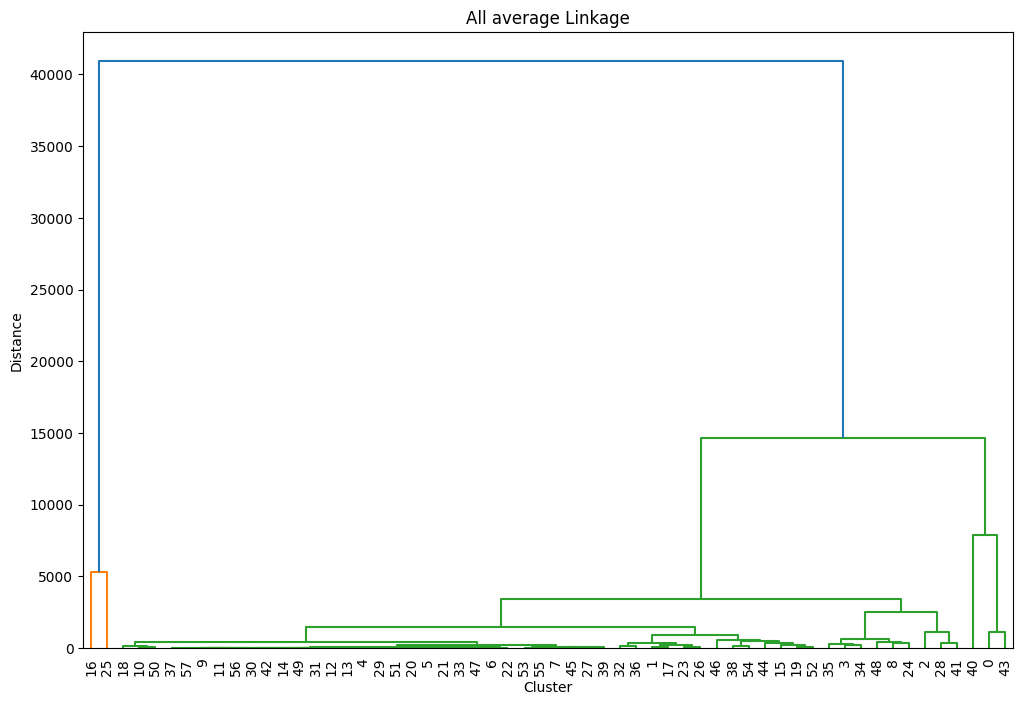

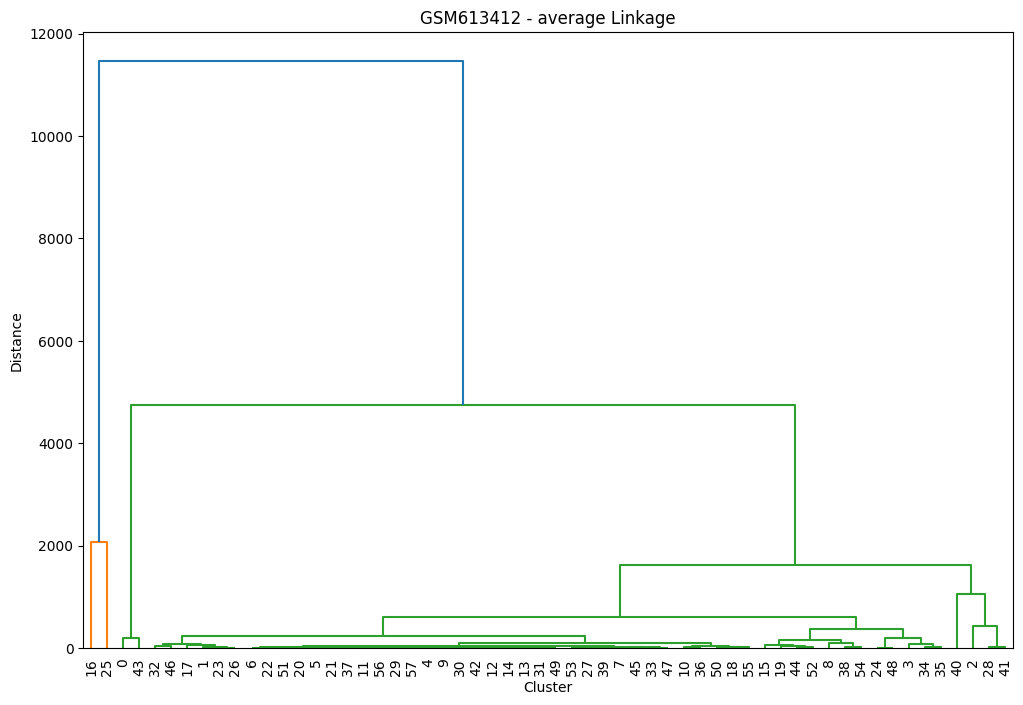

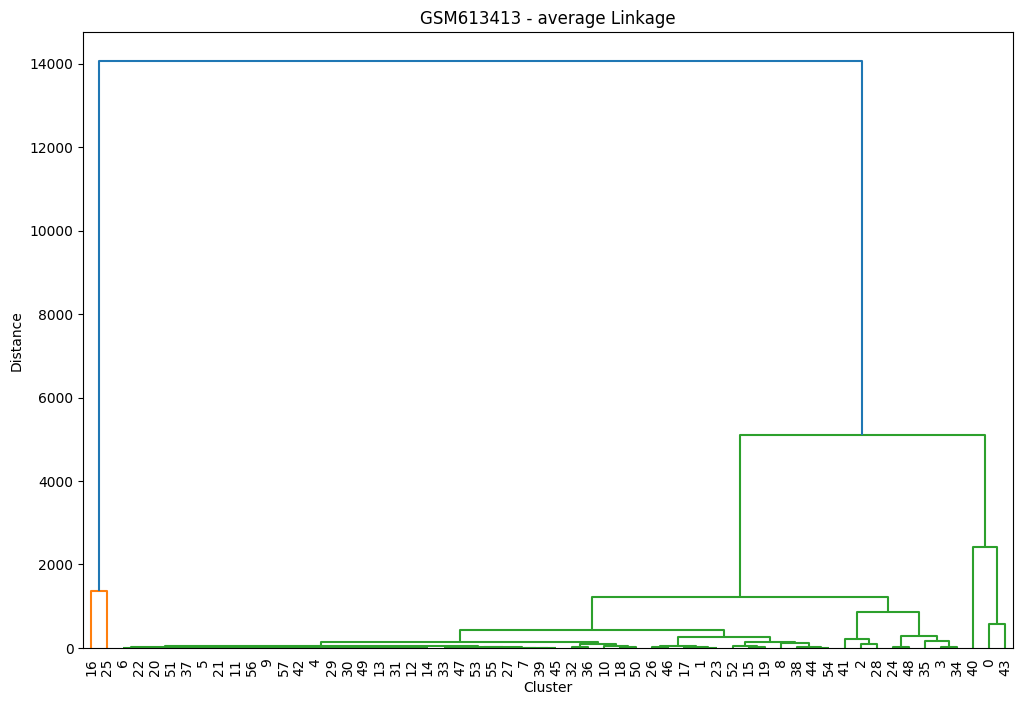

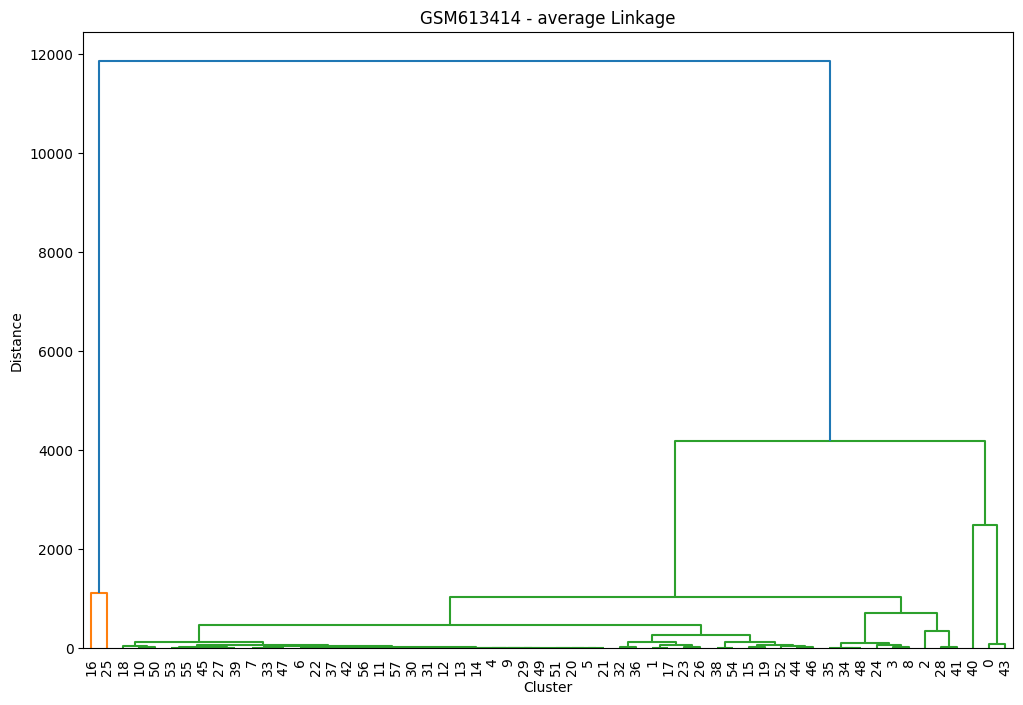

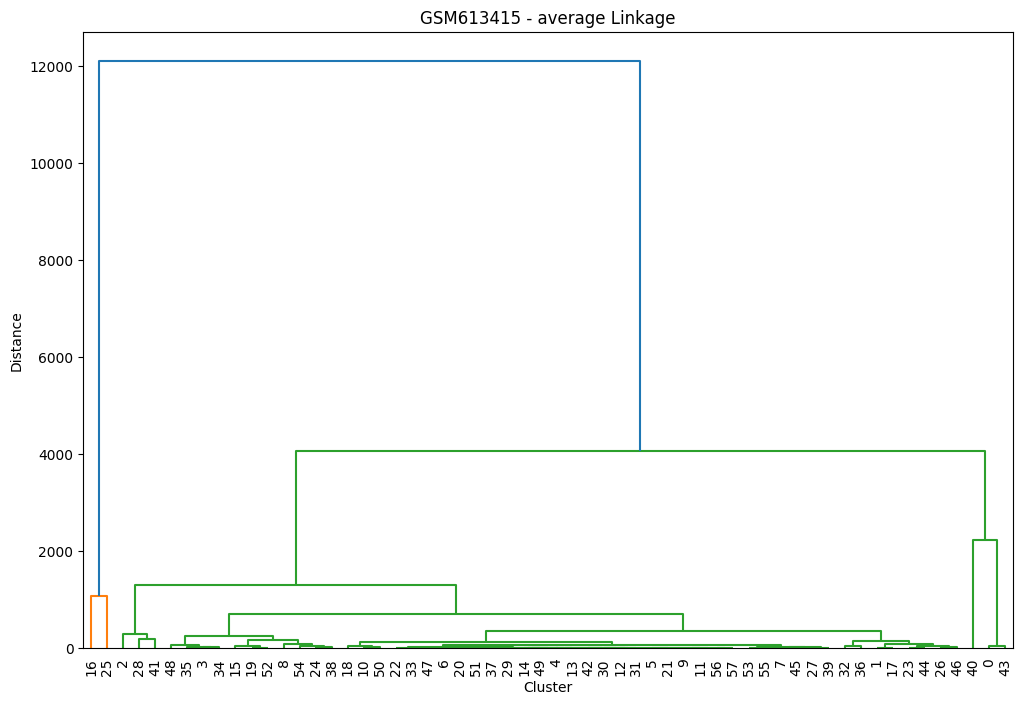

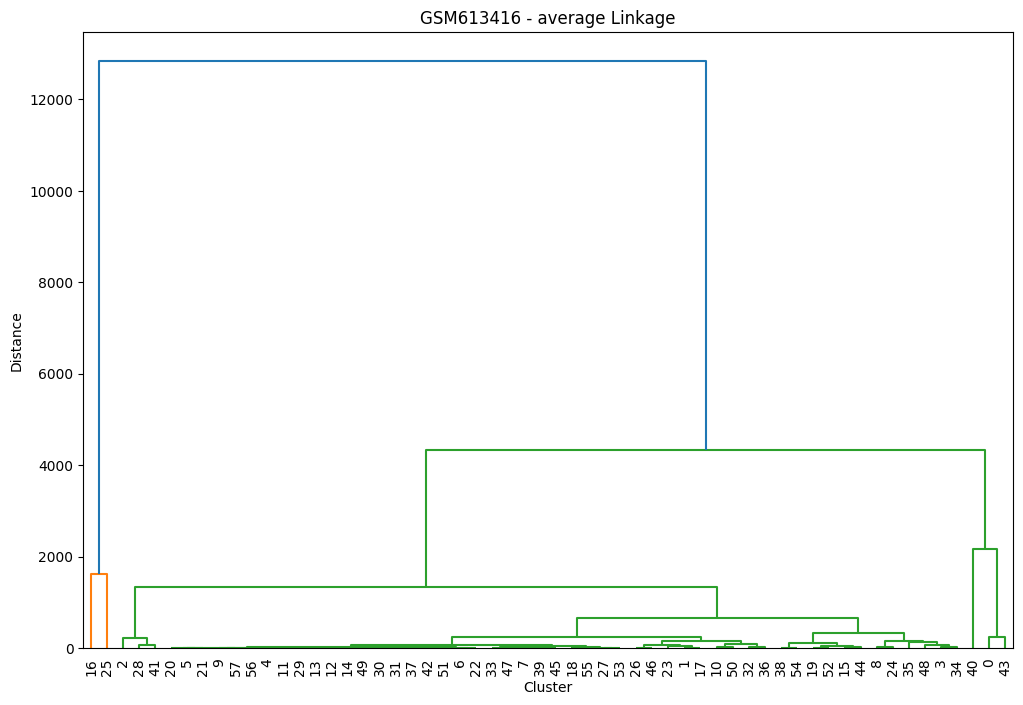

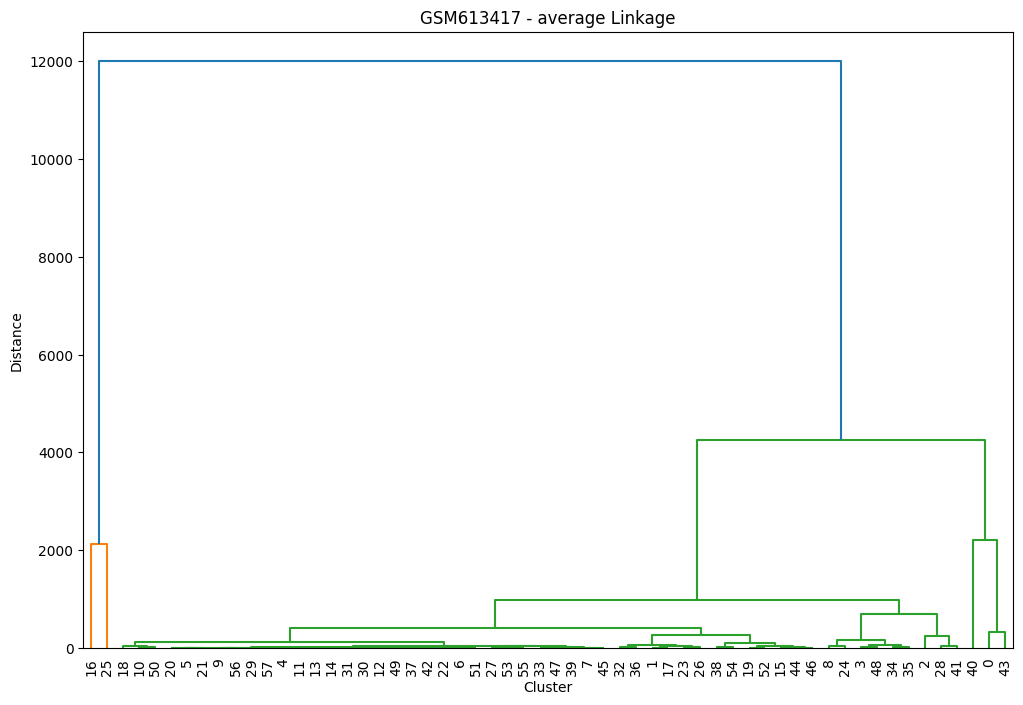

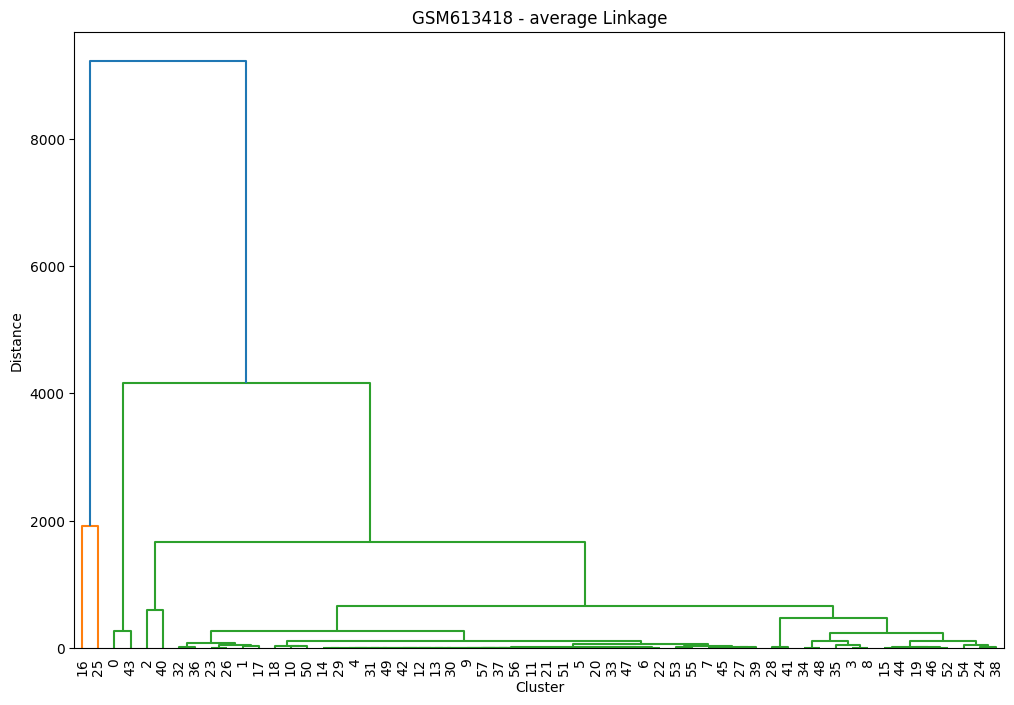

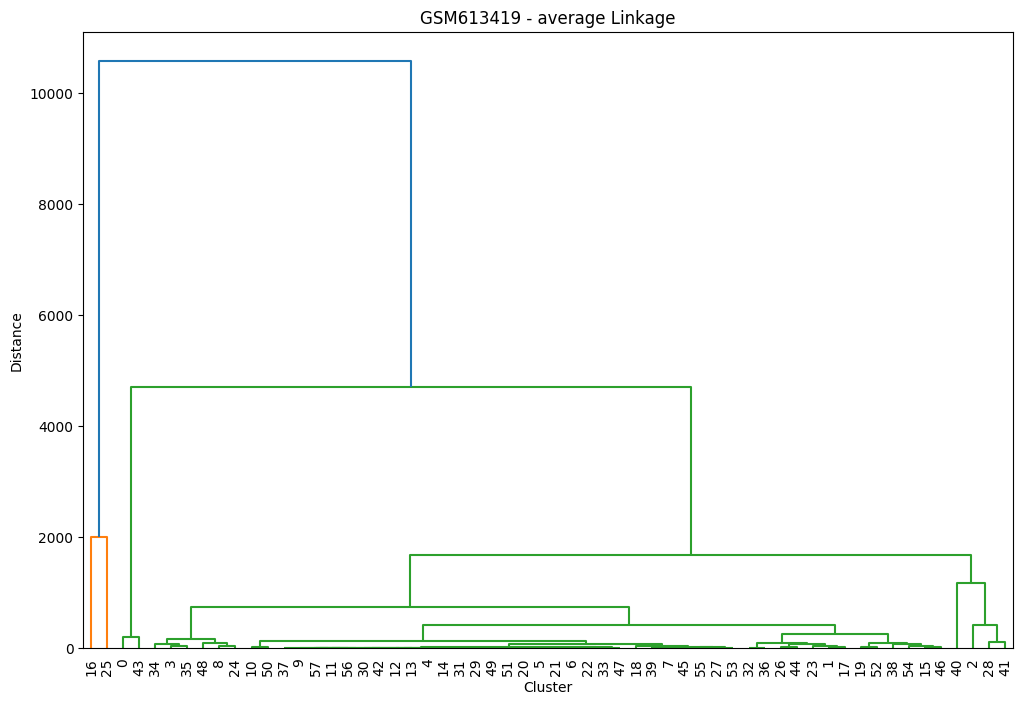

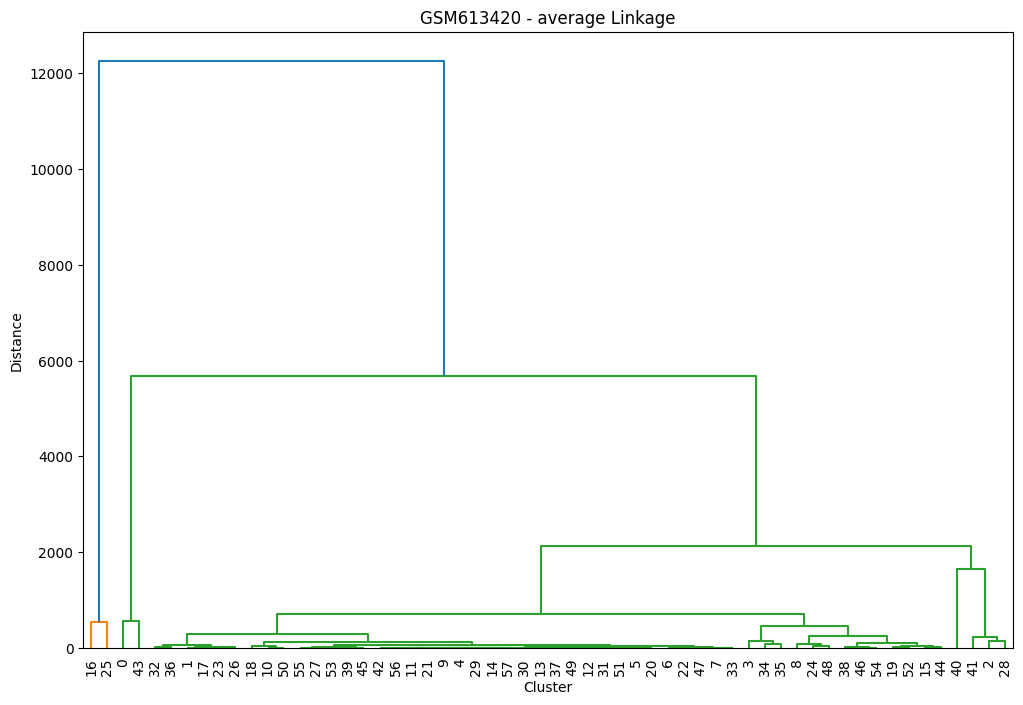

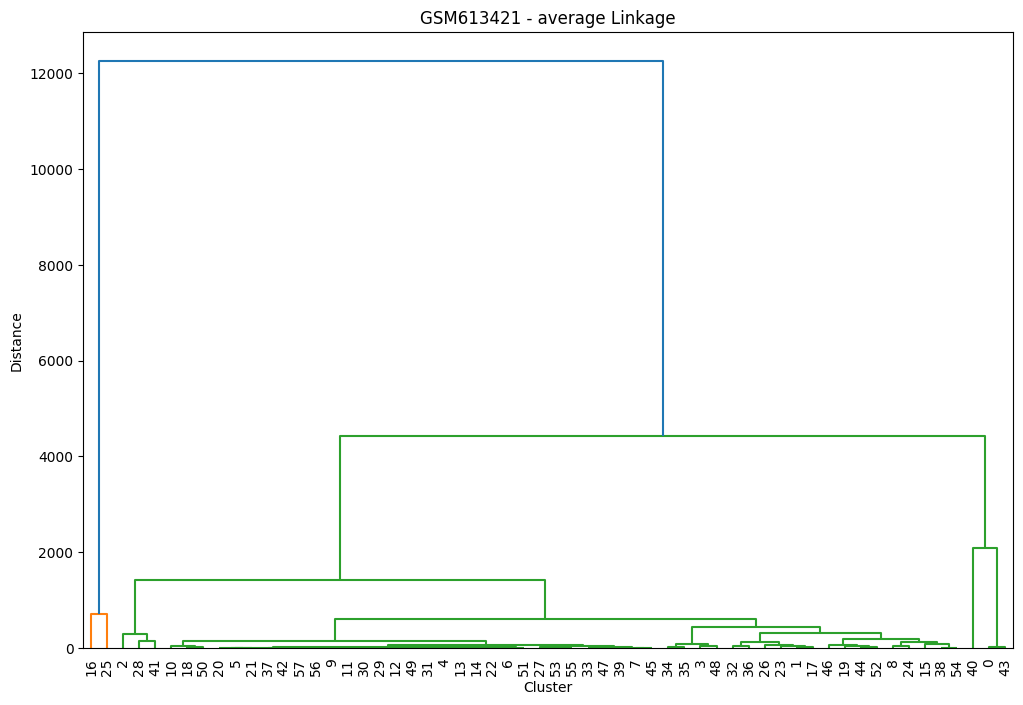

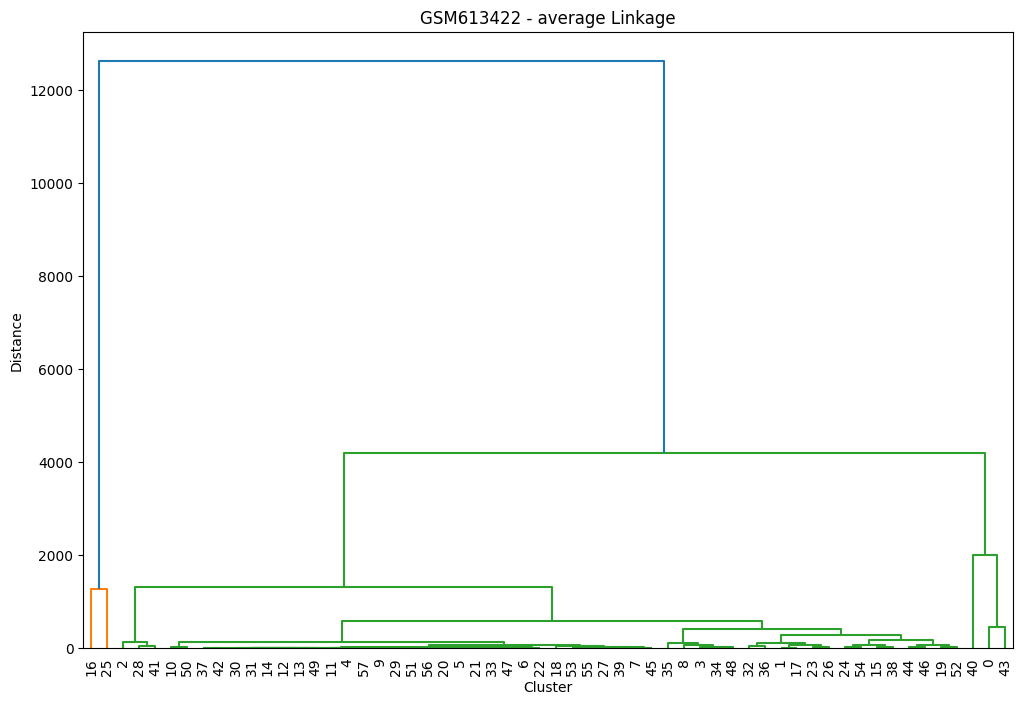

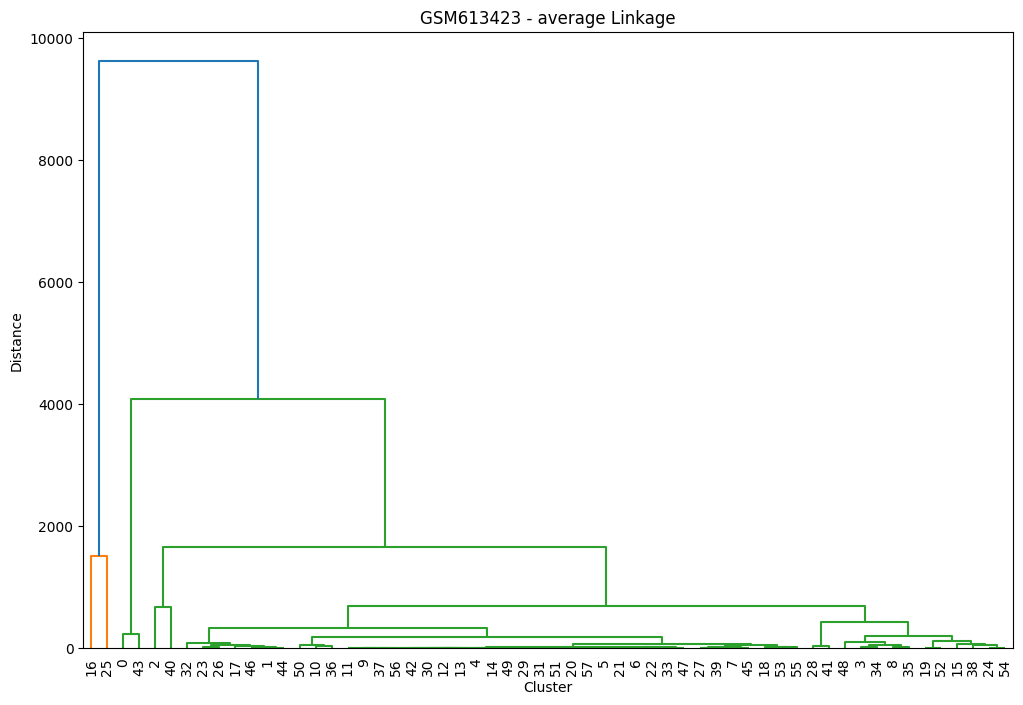

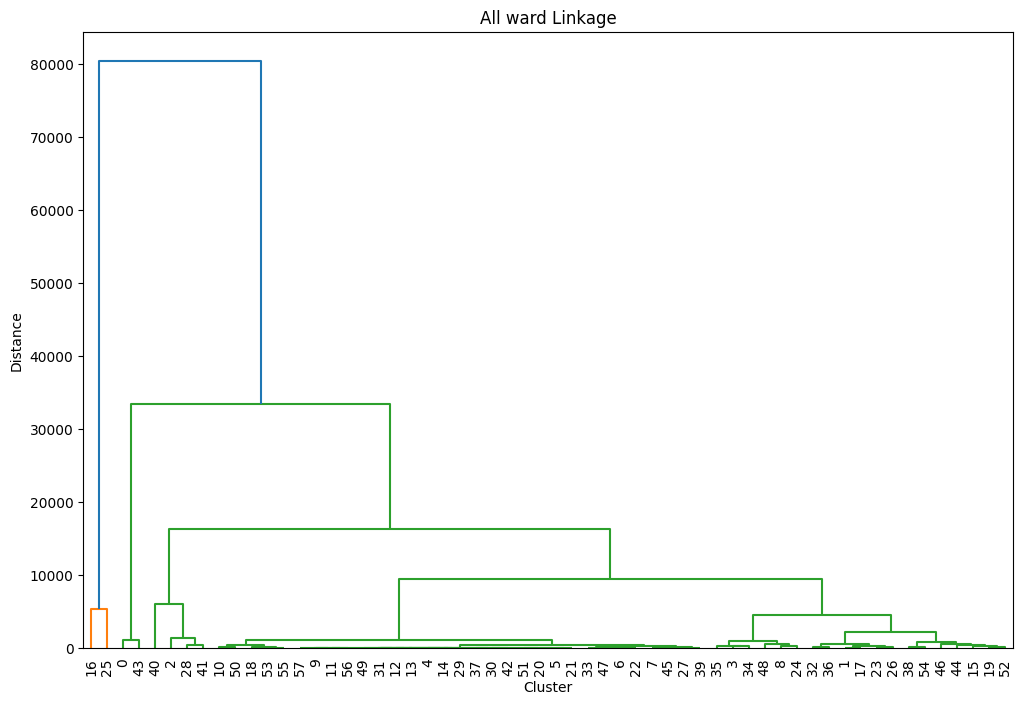

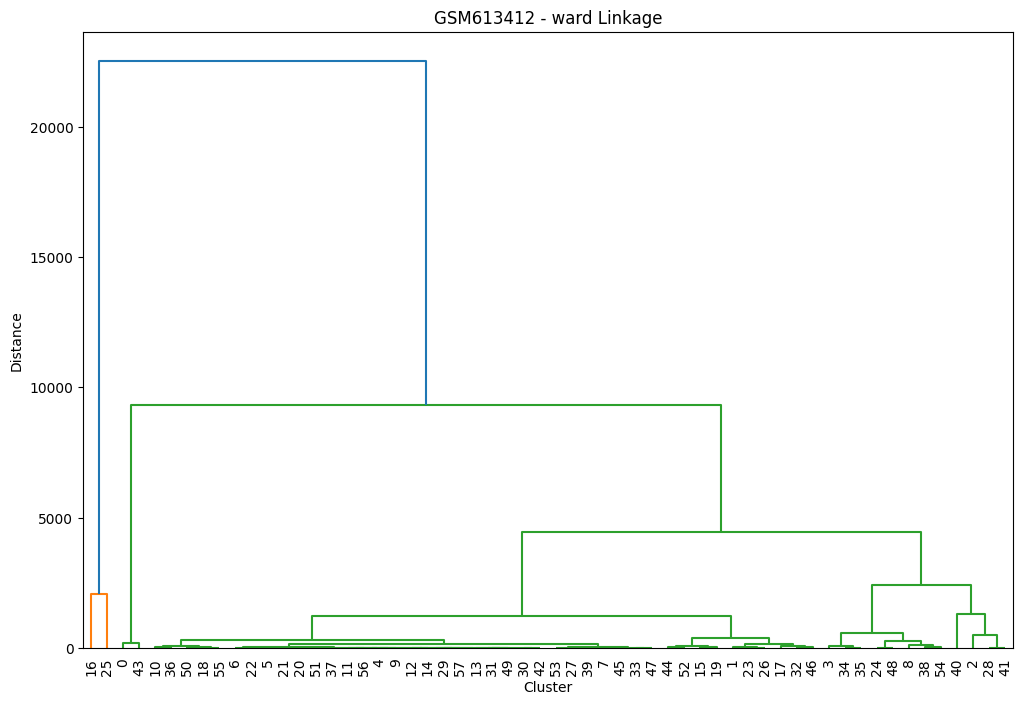

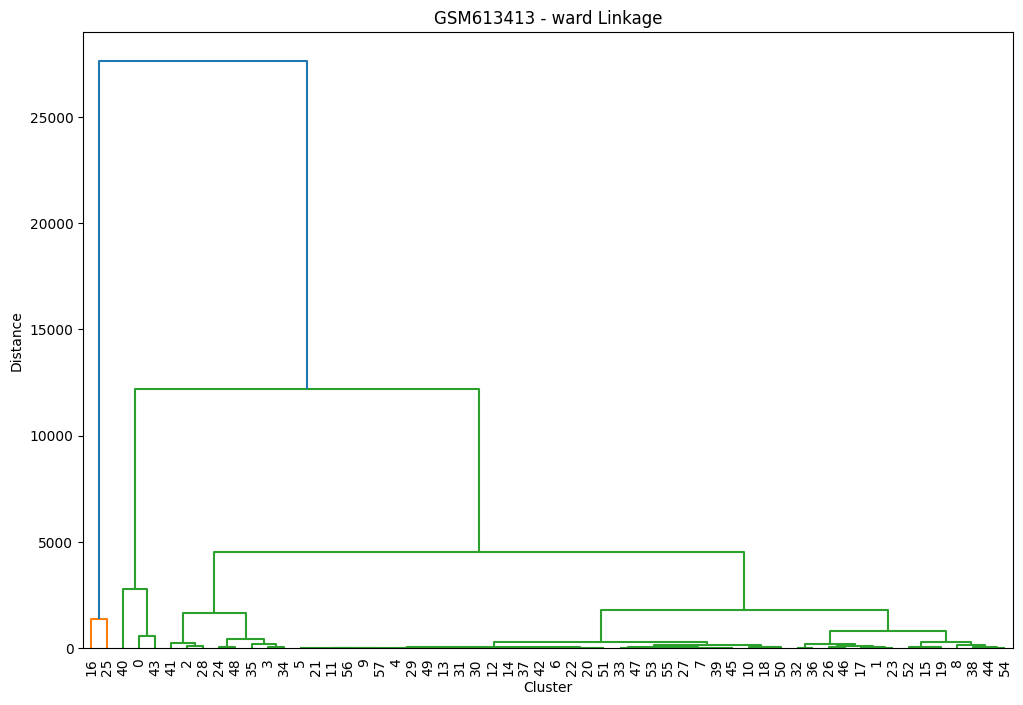

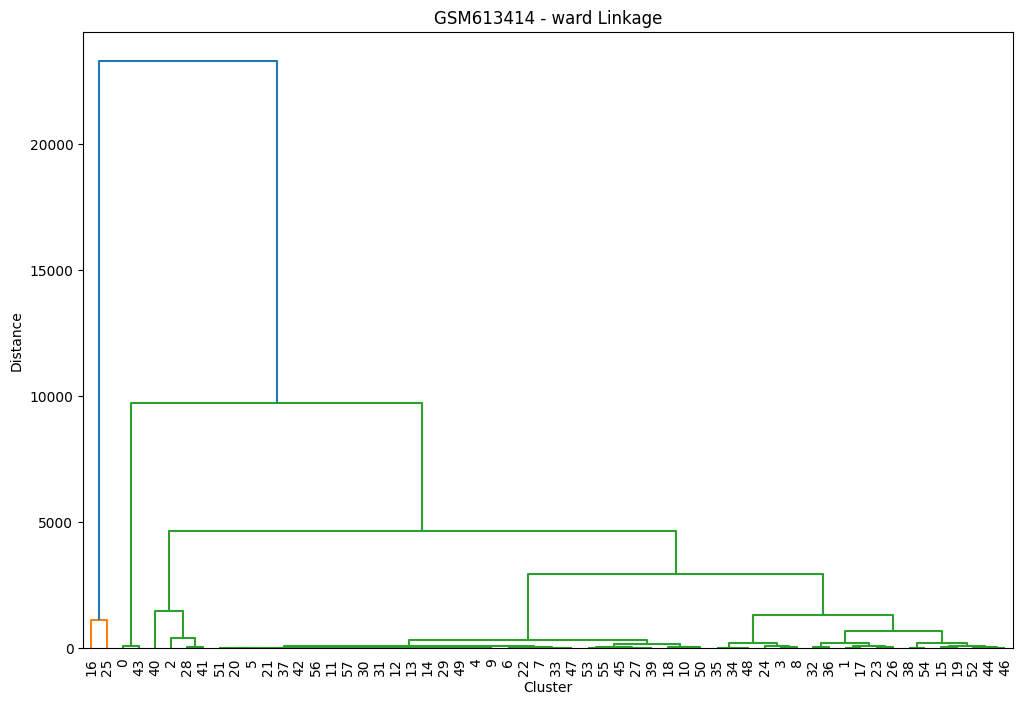

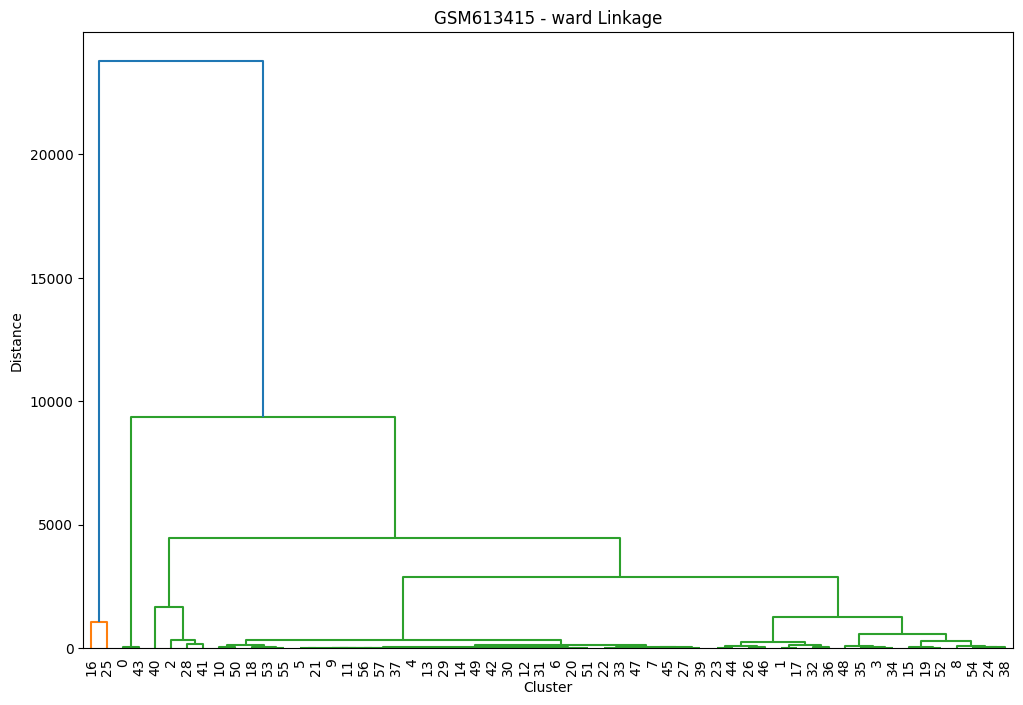

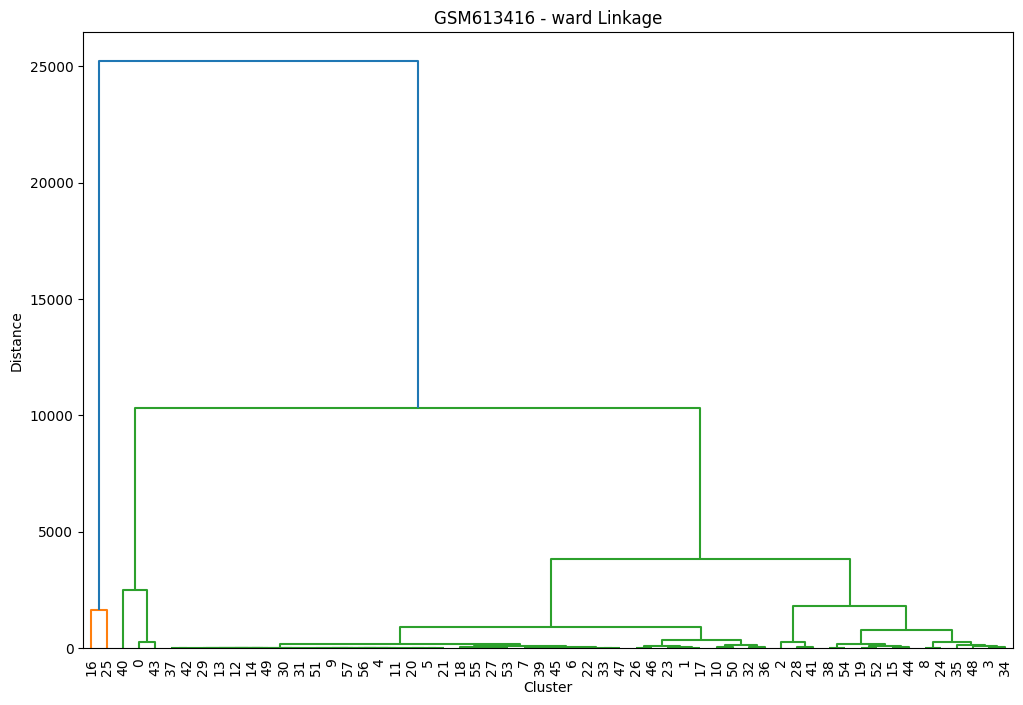

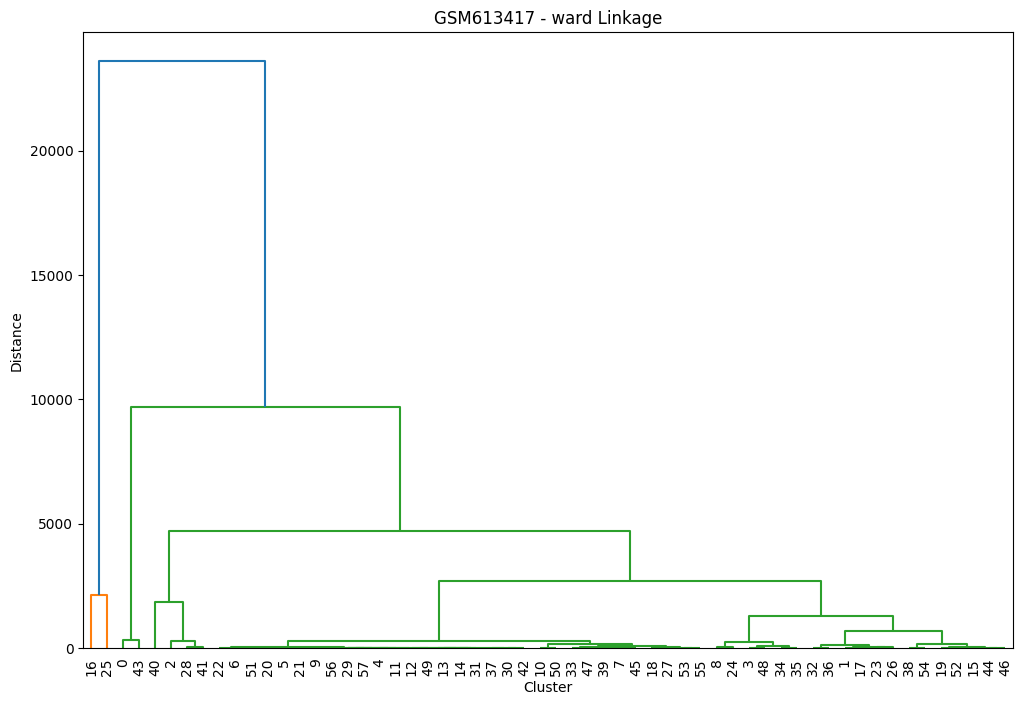

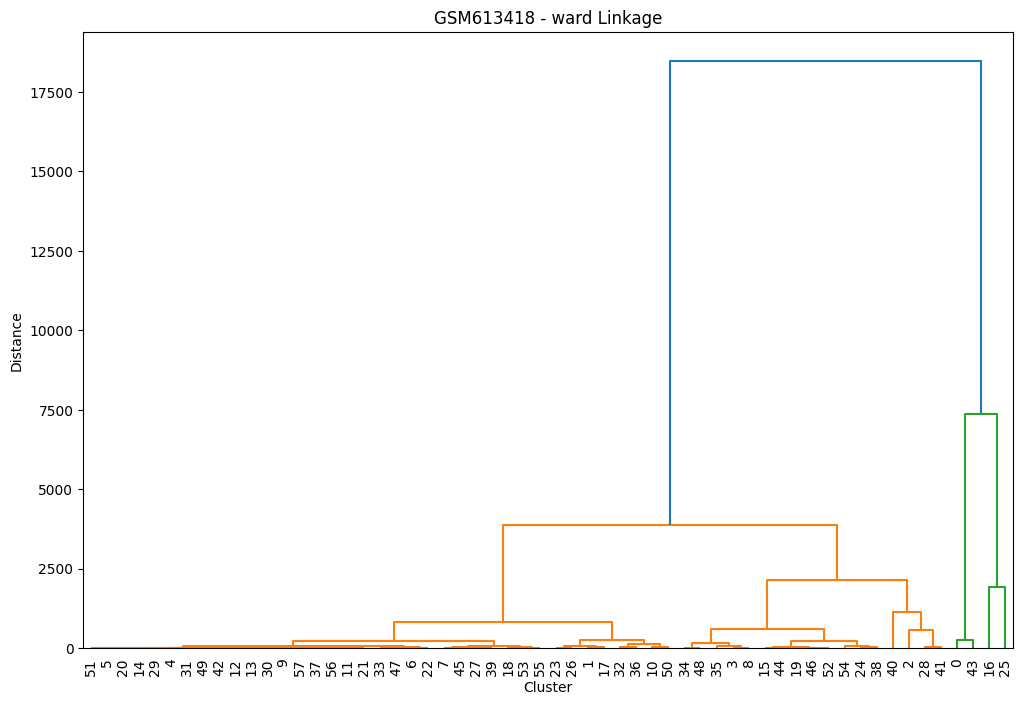

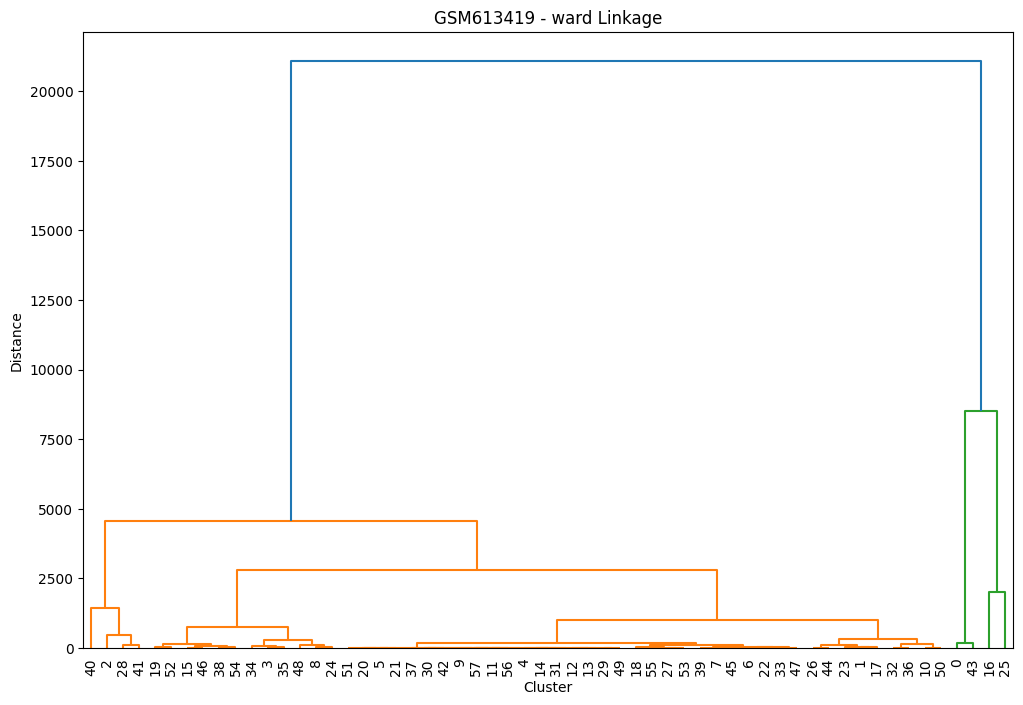

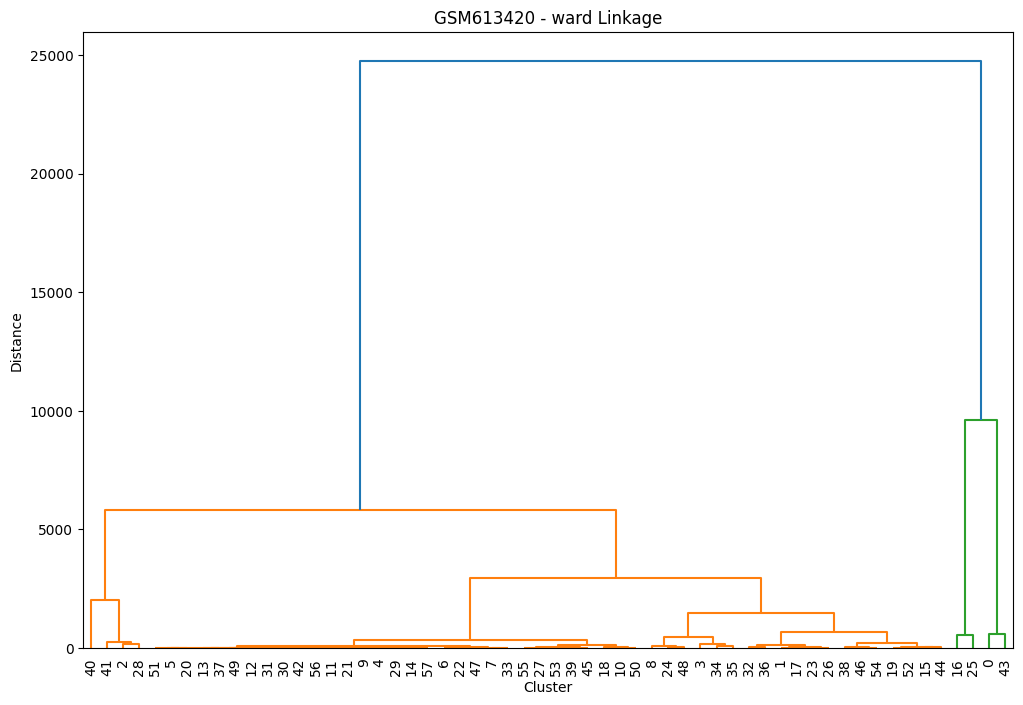

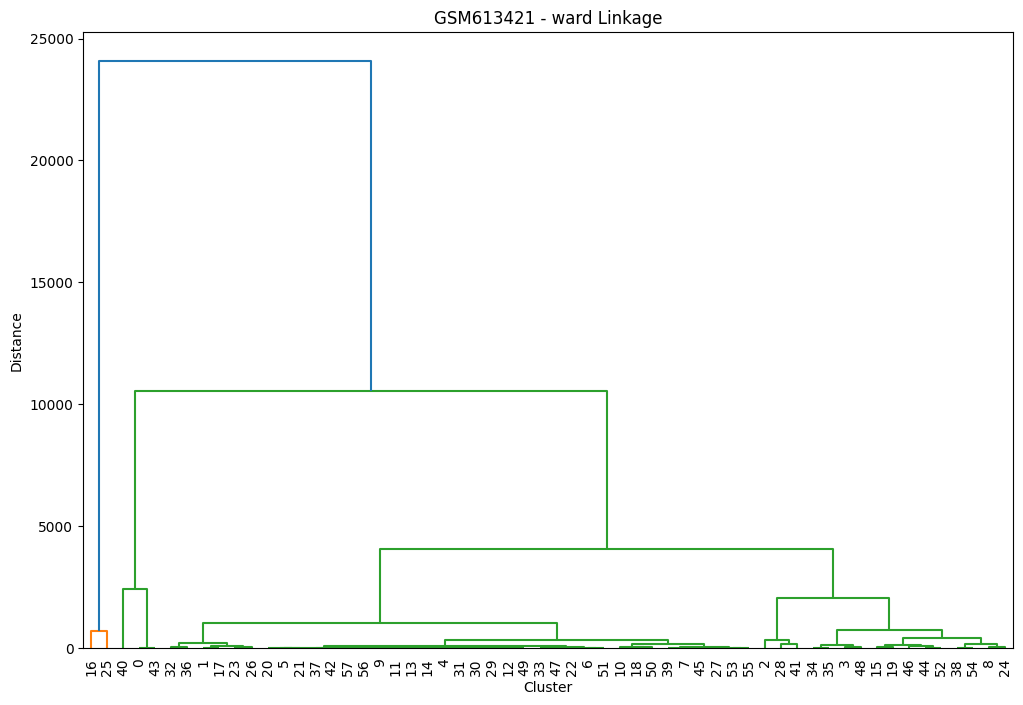

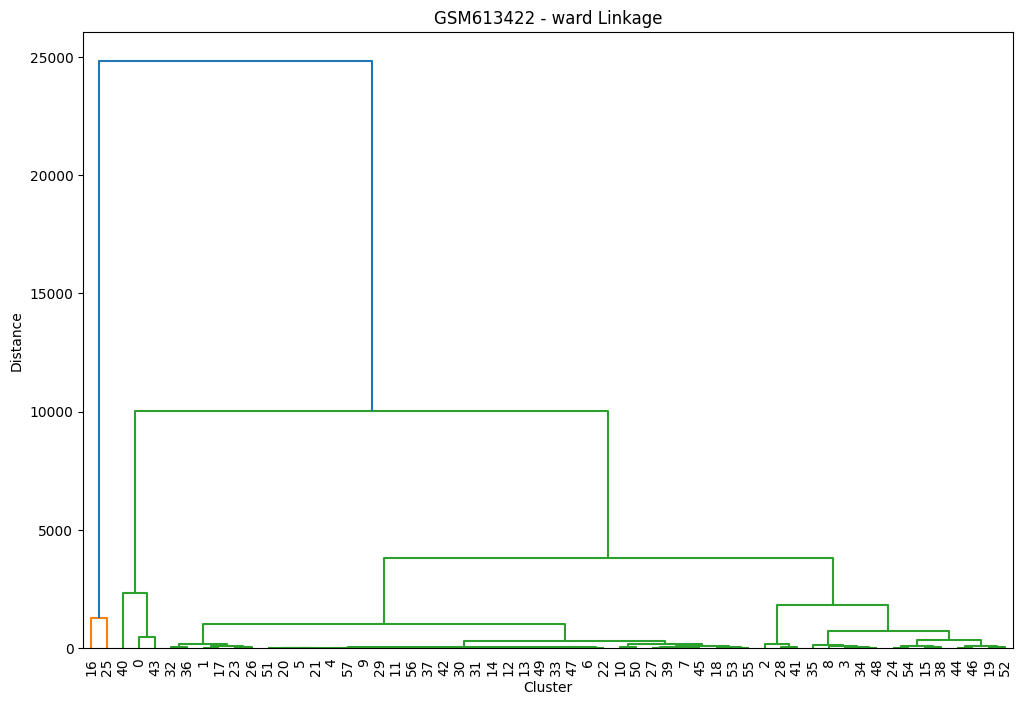

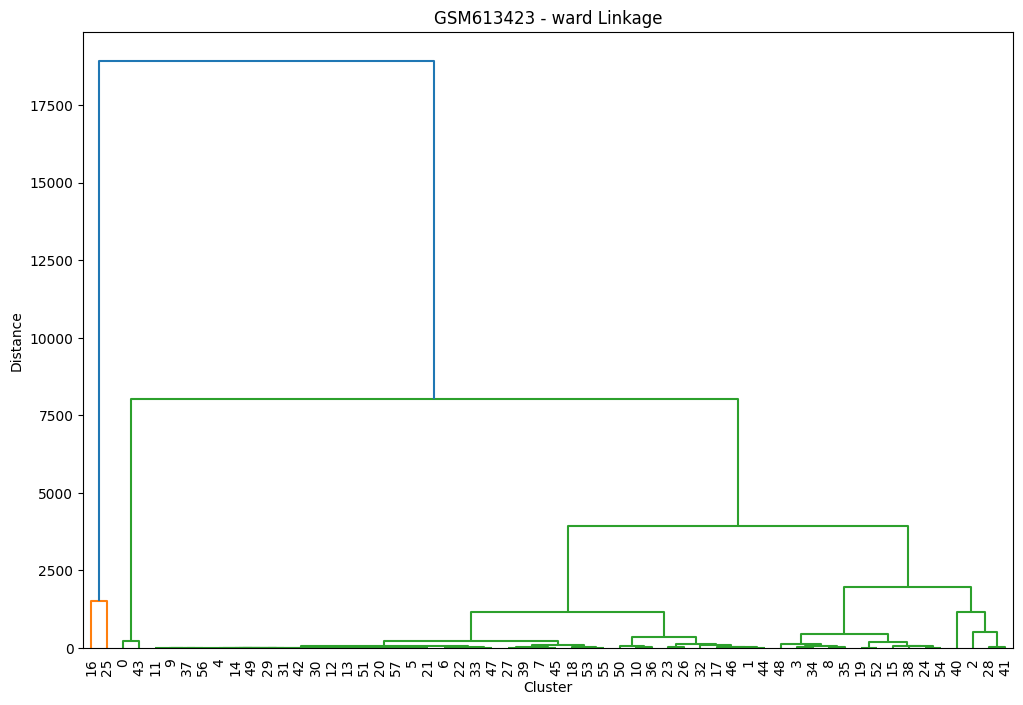

In [35]:
genedata = pd.read_csv("gene.csv", index_col=0)
linkage_methods = ['single', 'complete', 'average', 'ward']
# hc = HierarchicalClustering(genedata)
# linkage_matrix_ward = hc.perform_clustering(linkage_type='complete')
# hc.plot_dendrogram(linkage_matrix_ward, title='suii')
for linkage_type in linkage_methods:
    hc = HierarchicalClustering(genedata.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in genedata.columns:
        feature_data = genedata[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')

# After Normalizing

## Part 1

In [36]:
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=[f'Feature_{i}' for i in range(X.shape[1])])

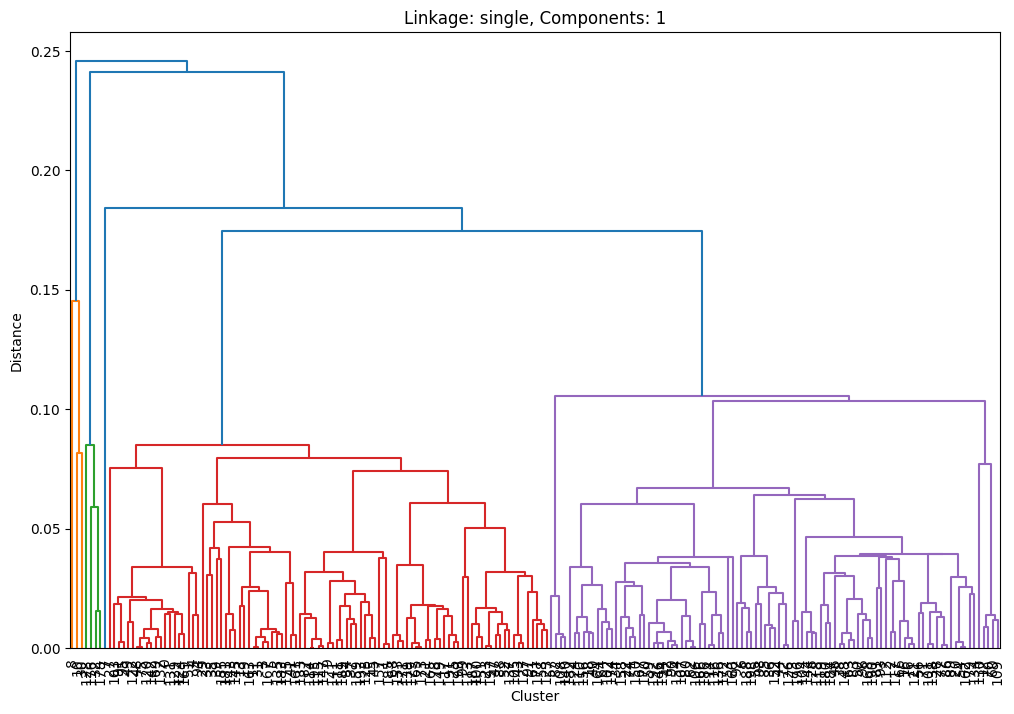

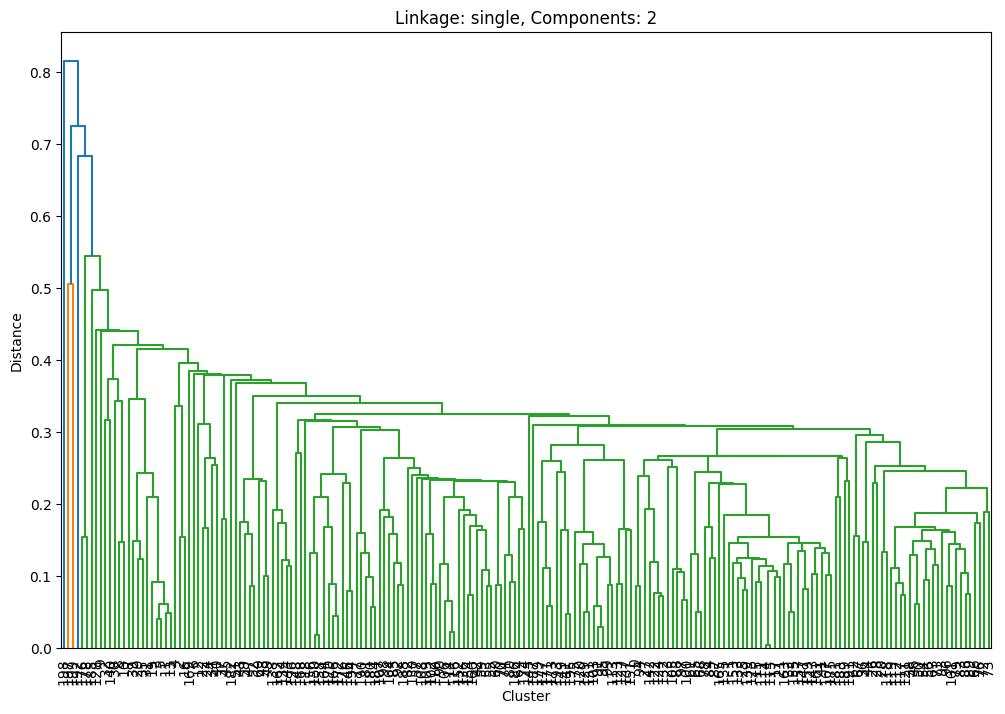

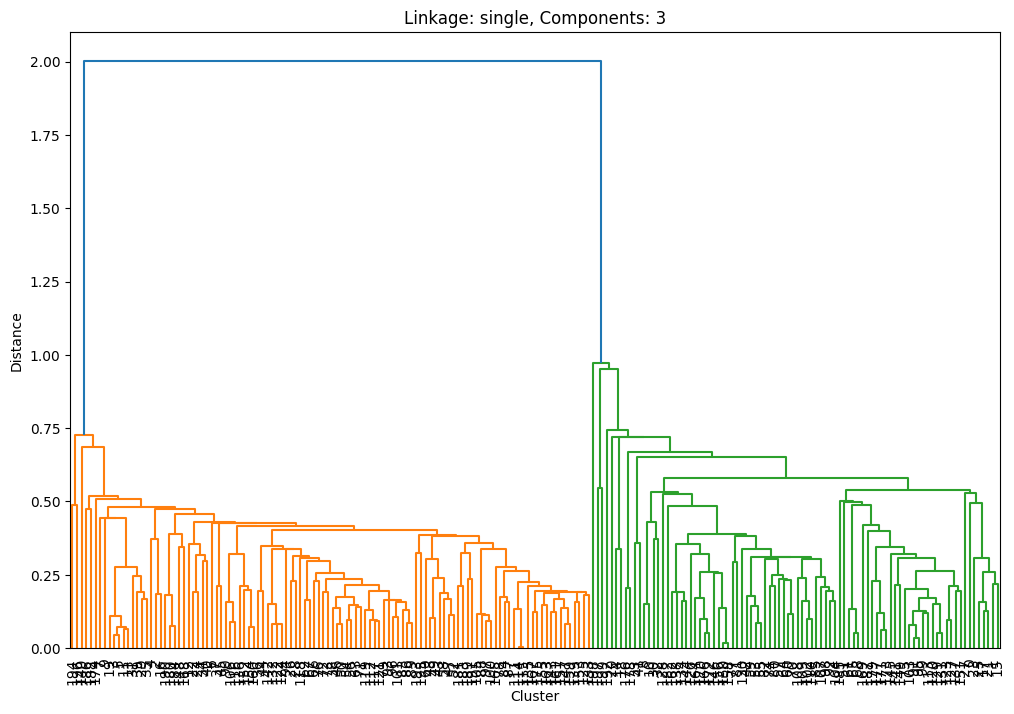

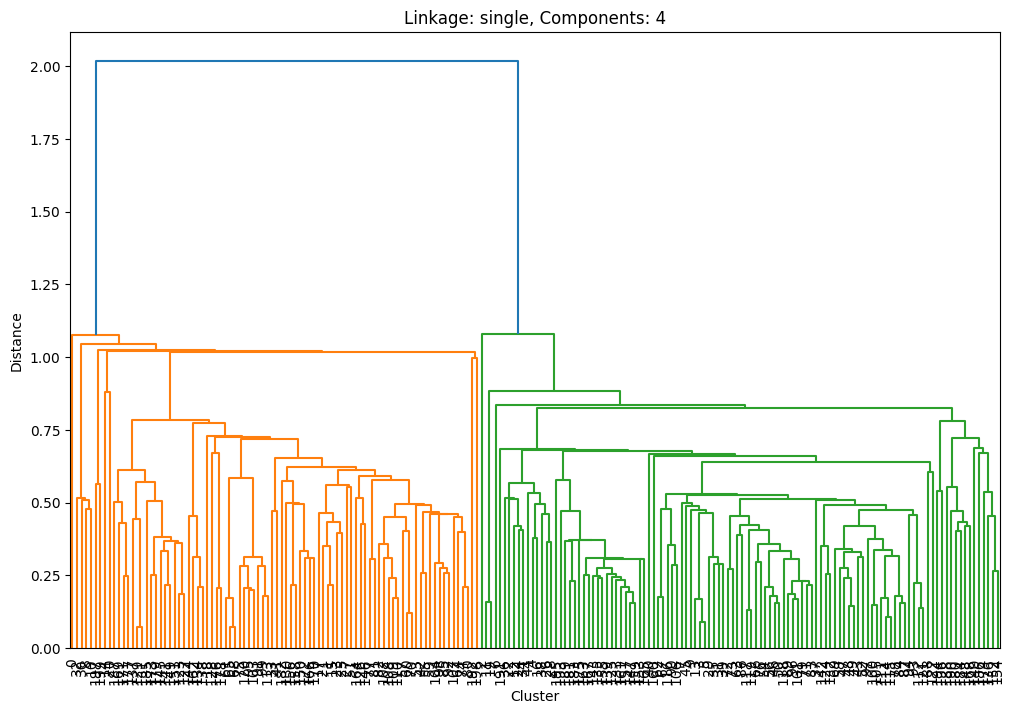

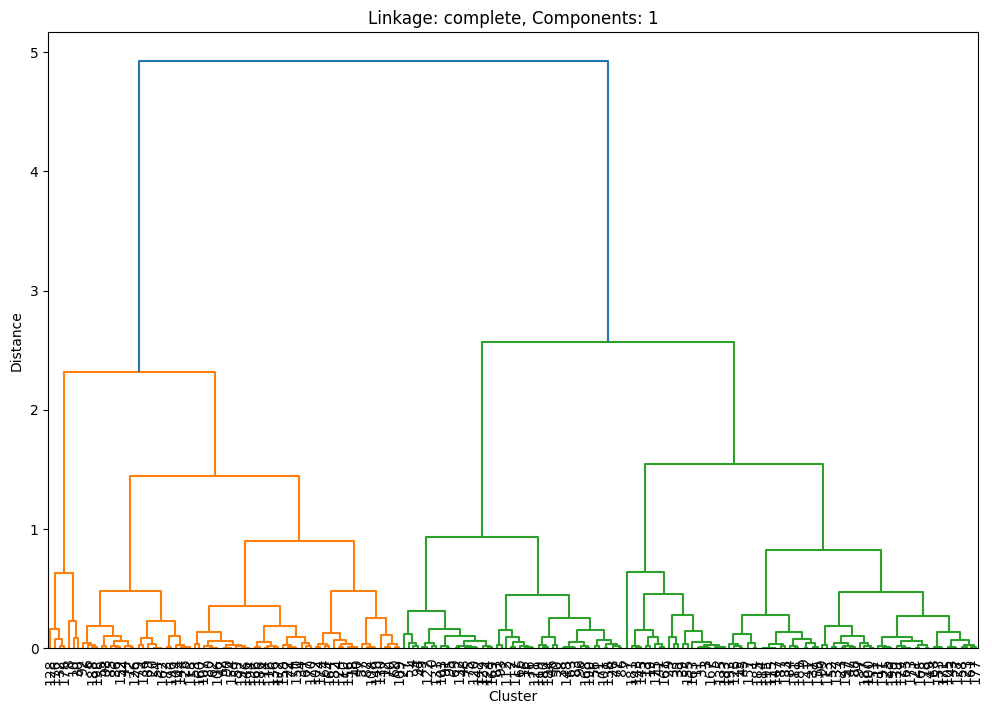

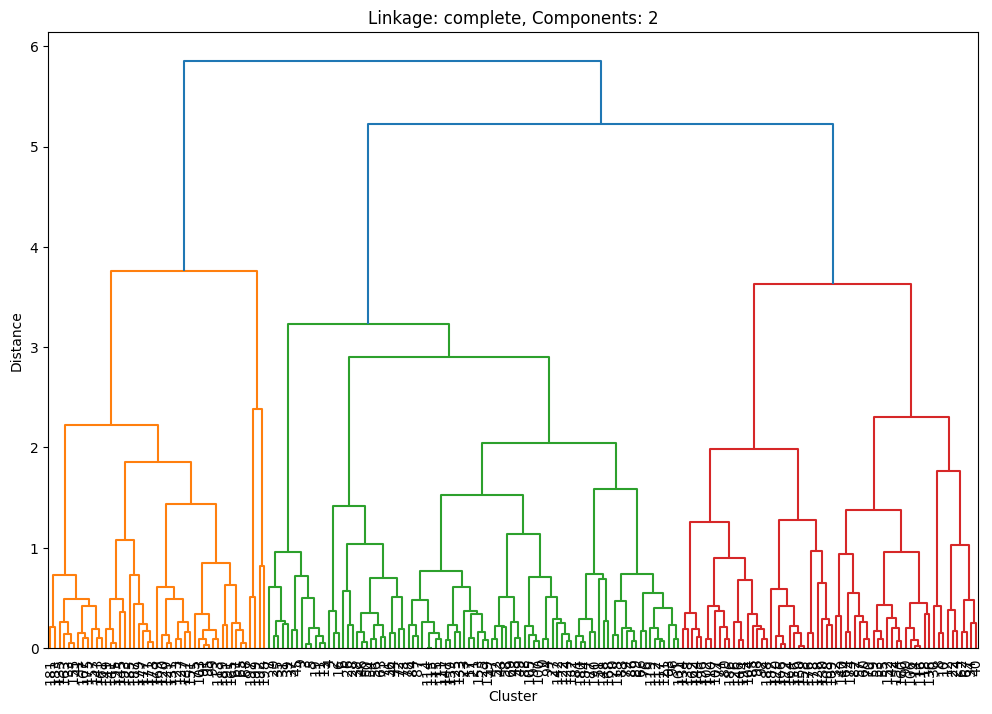

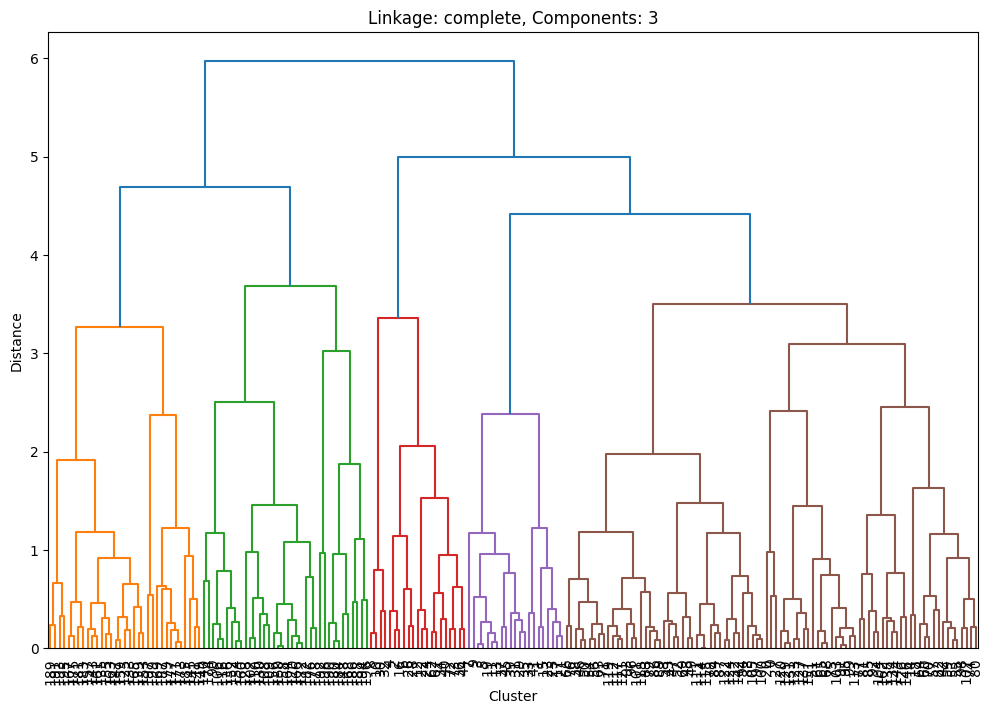

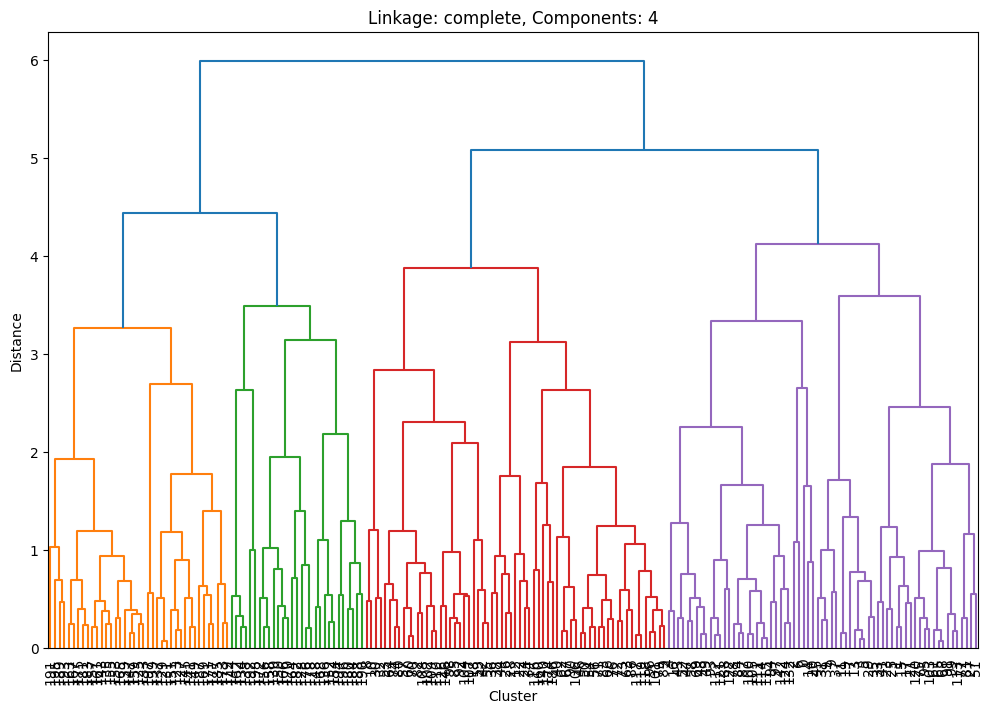

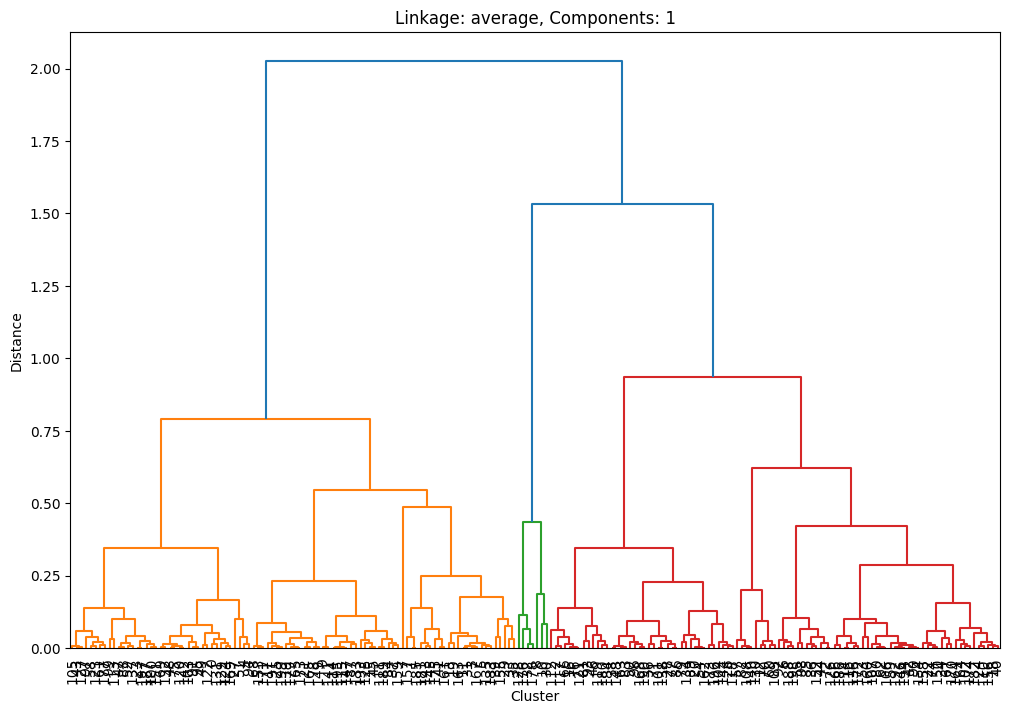

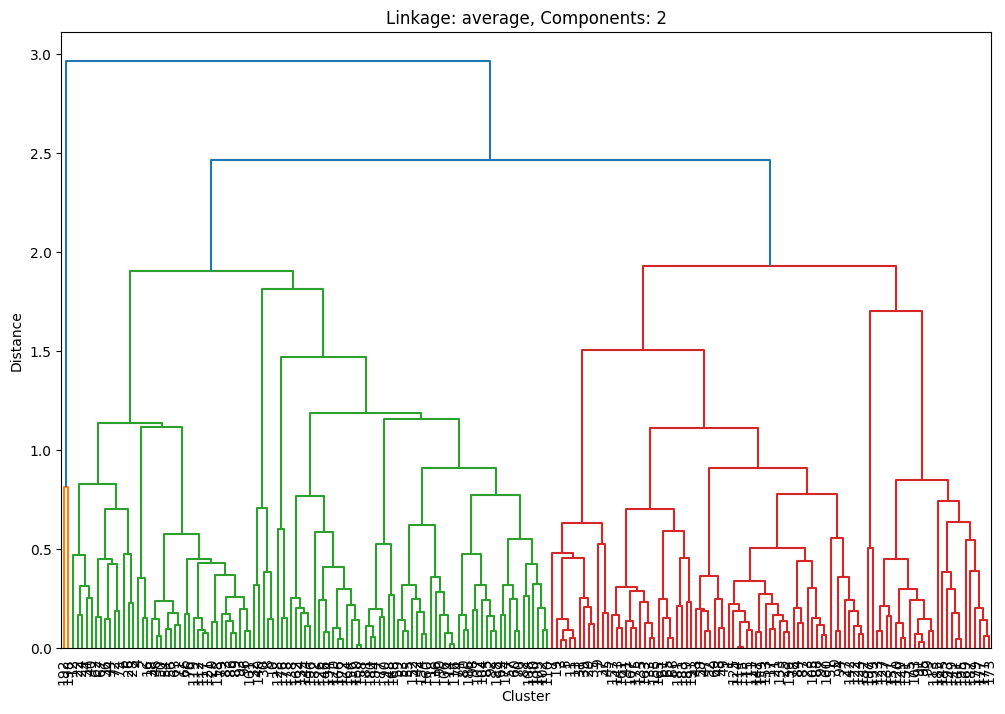

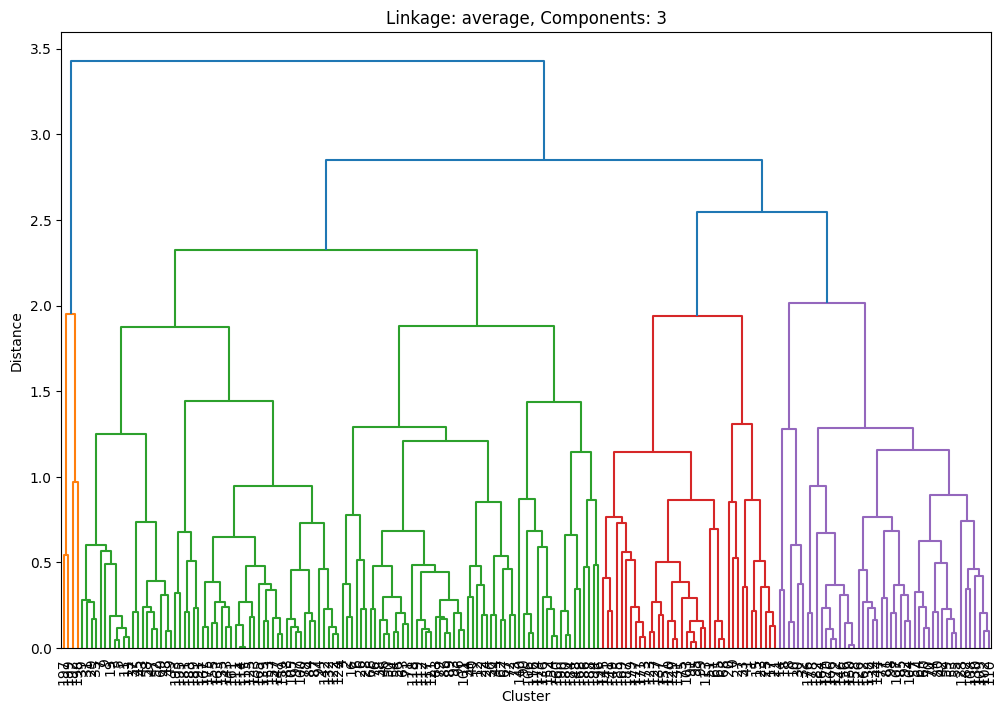

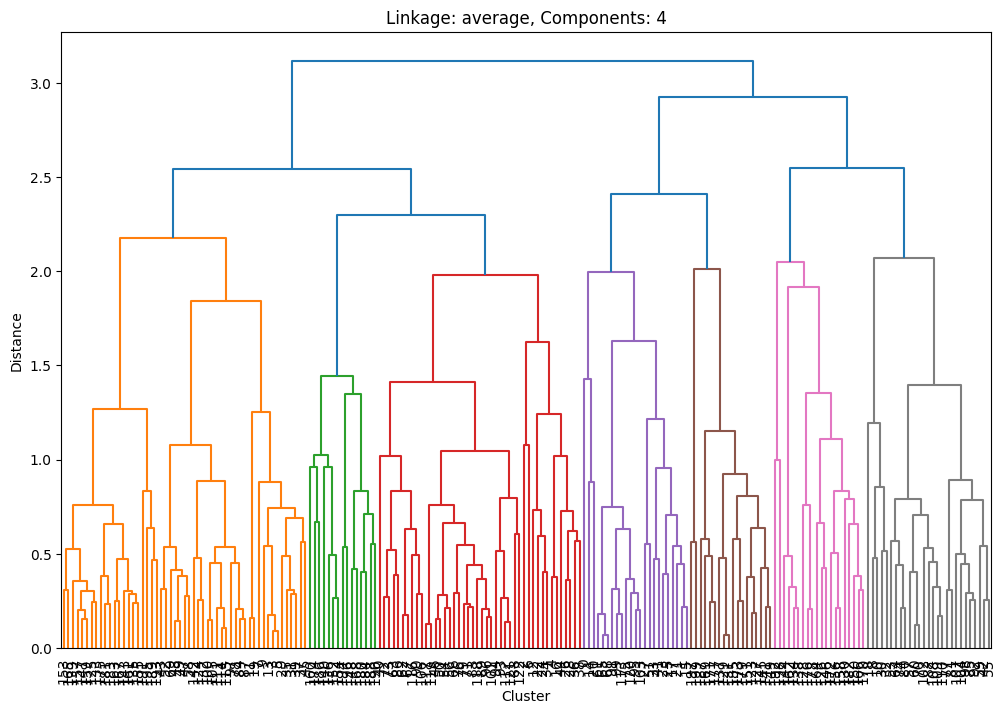

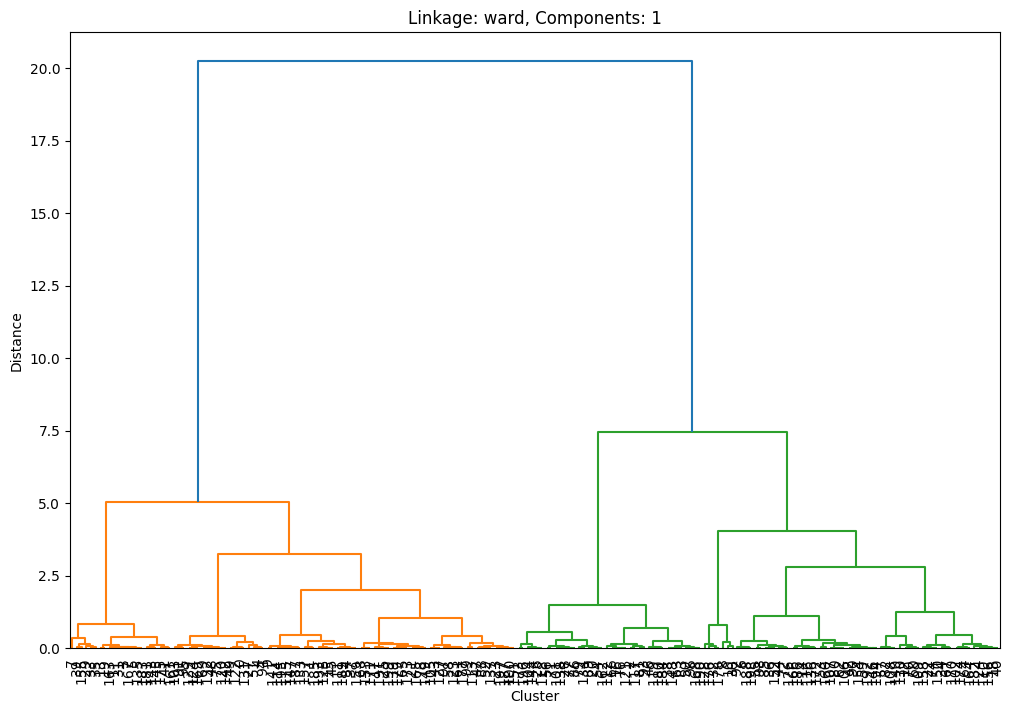

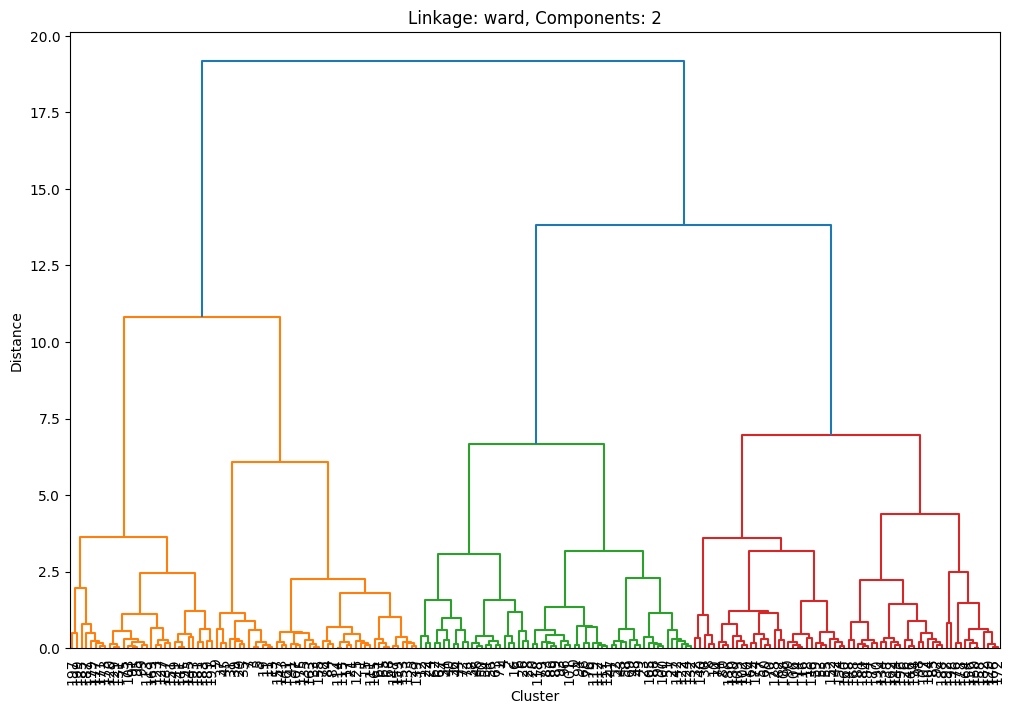

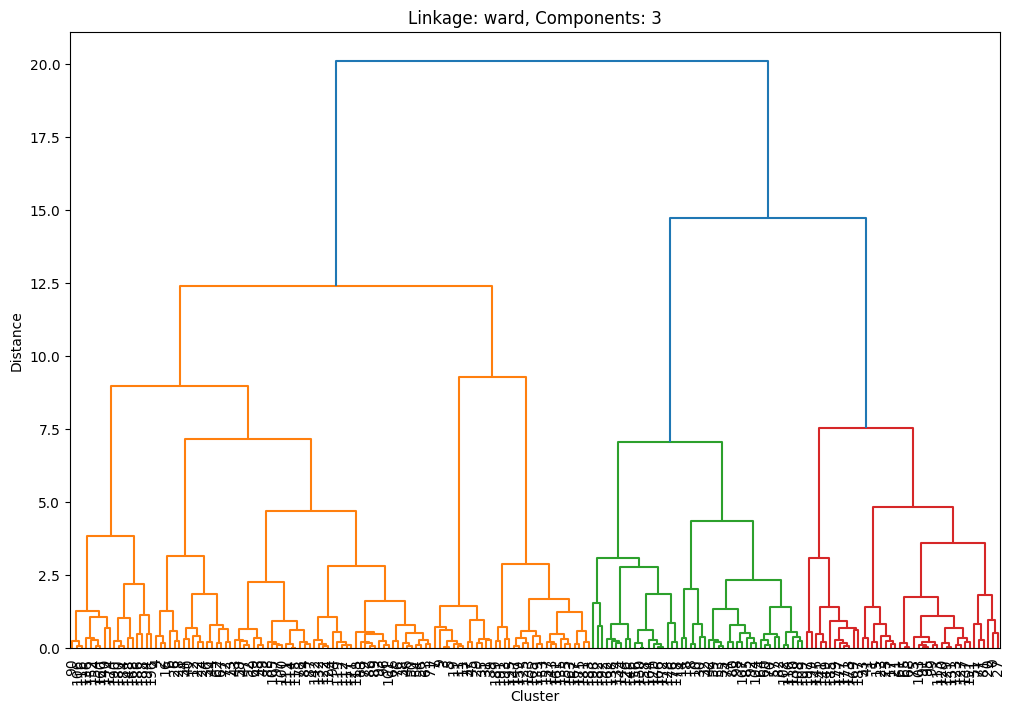

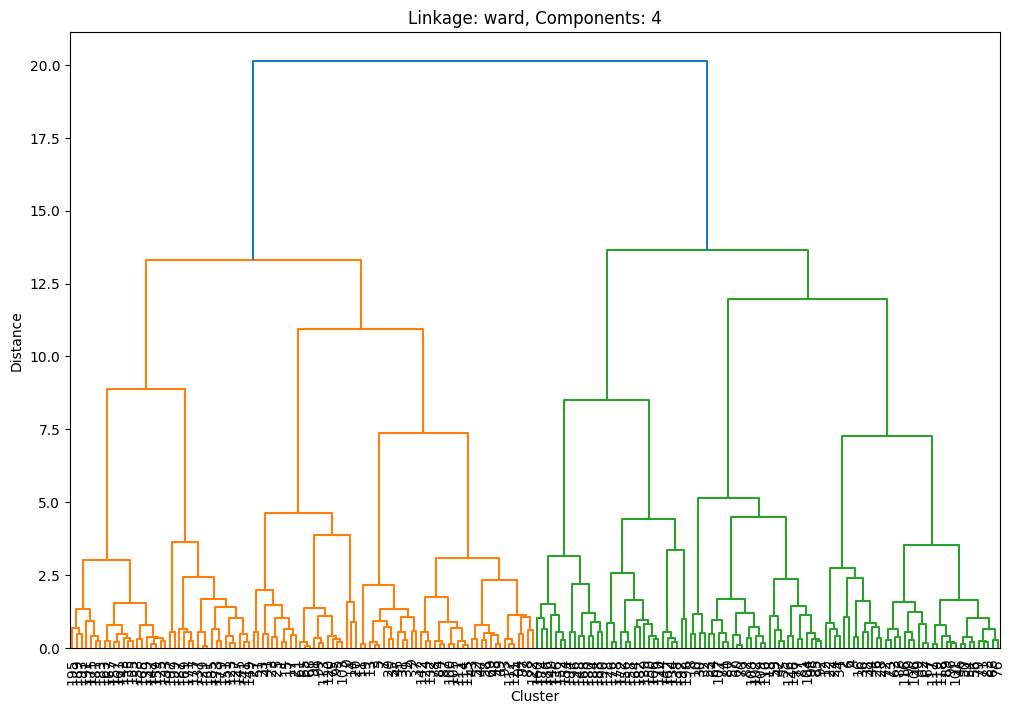

In [42]:
for linkage_type in linkage_methods:
    num_features = X_normalized.shape[1]
    for n_components in range(1, num_features + 1):
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_normalized)
        hc = HierarchicalClustering(X_pca)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'Linkage: {linkage_type}, Components: {n_components}')
        # Perform hierarchical clustering
        # linkage_matrix = linkage(X_pca, method=linkage_type)
        
        # # Plot dendrogram
        # plt.figure(figsize=(10, 5))
        # dendrogram(linkage_matrix)
        # plt.title(f'Linkage: {linkage_type}, Components: {n_components}')
        # plt.xlabel('Sample Index')
        # plt.ylabel('Distance')
        # plt.show()







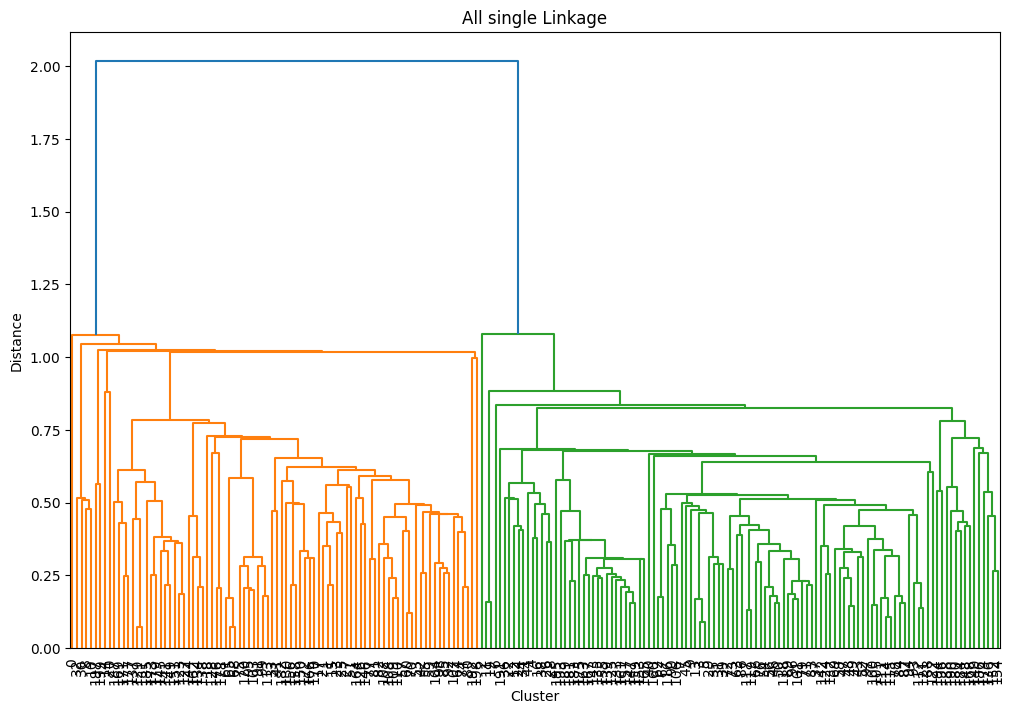

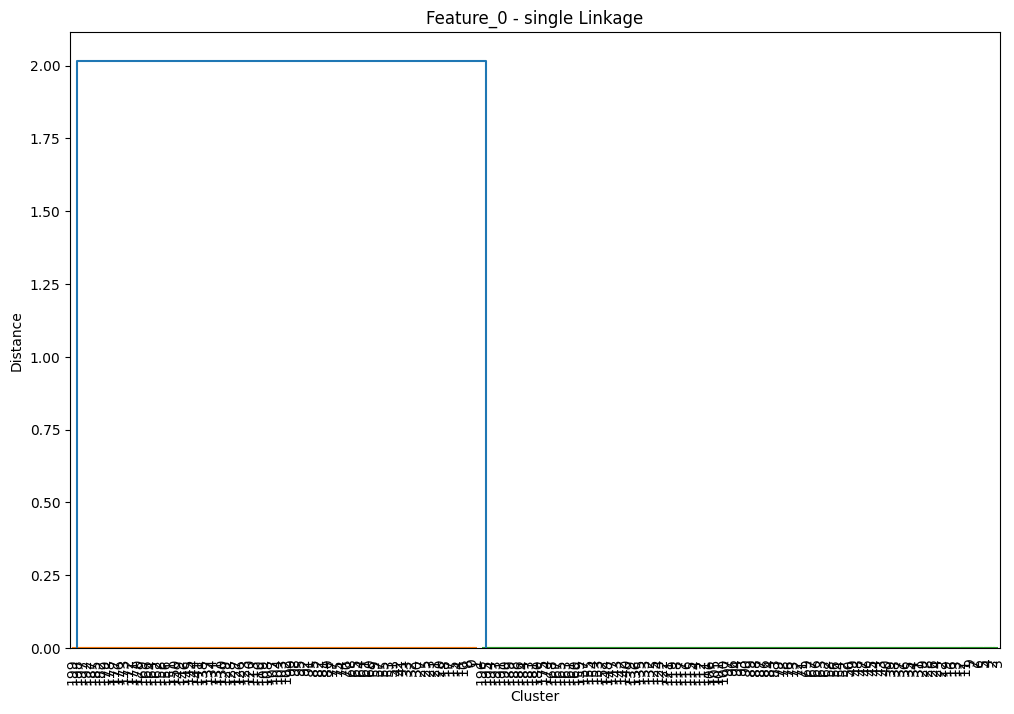

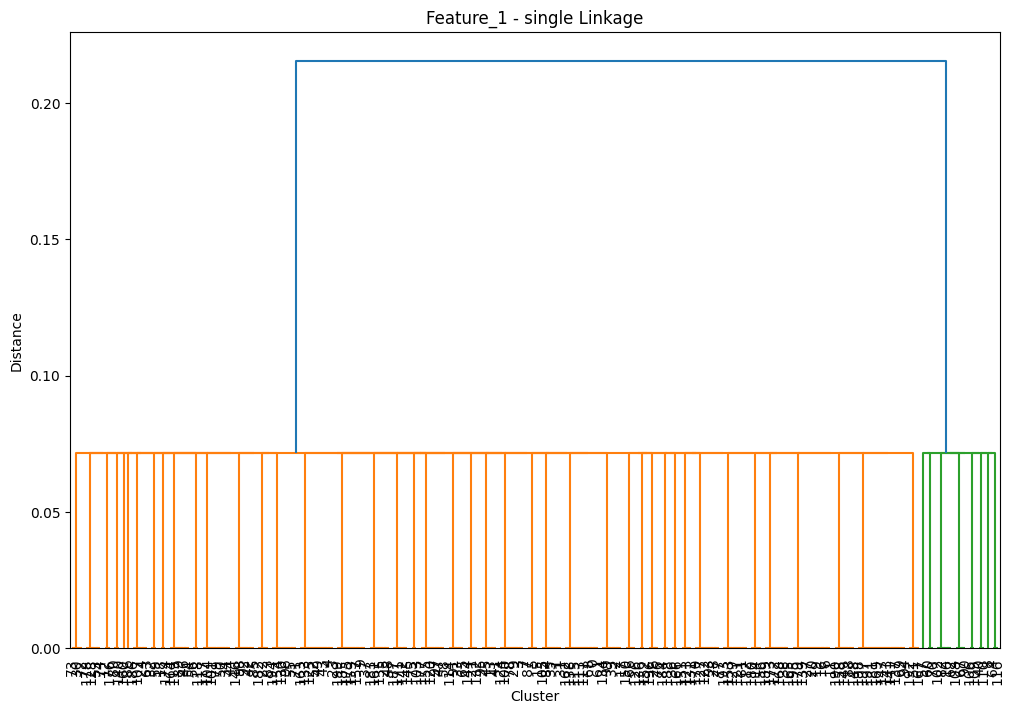

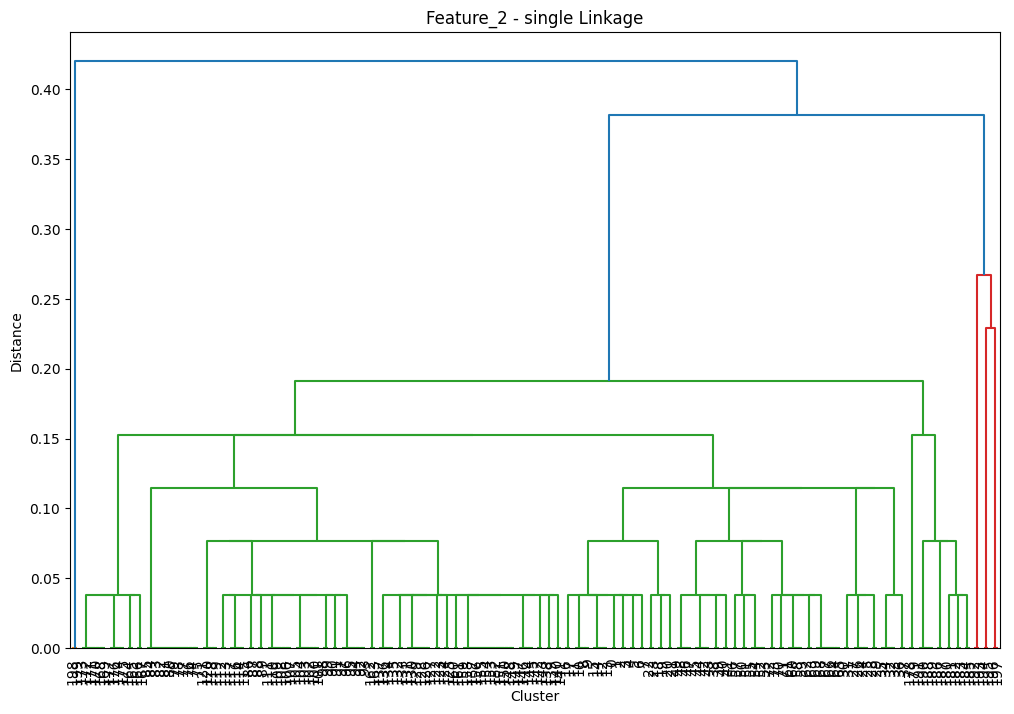

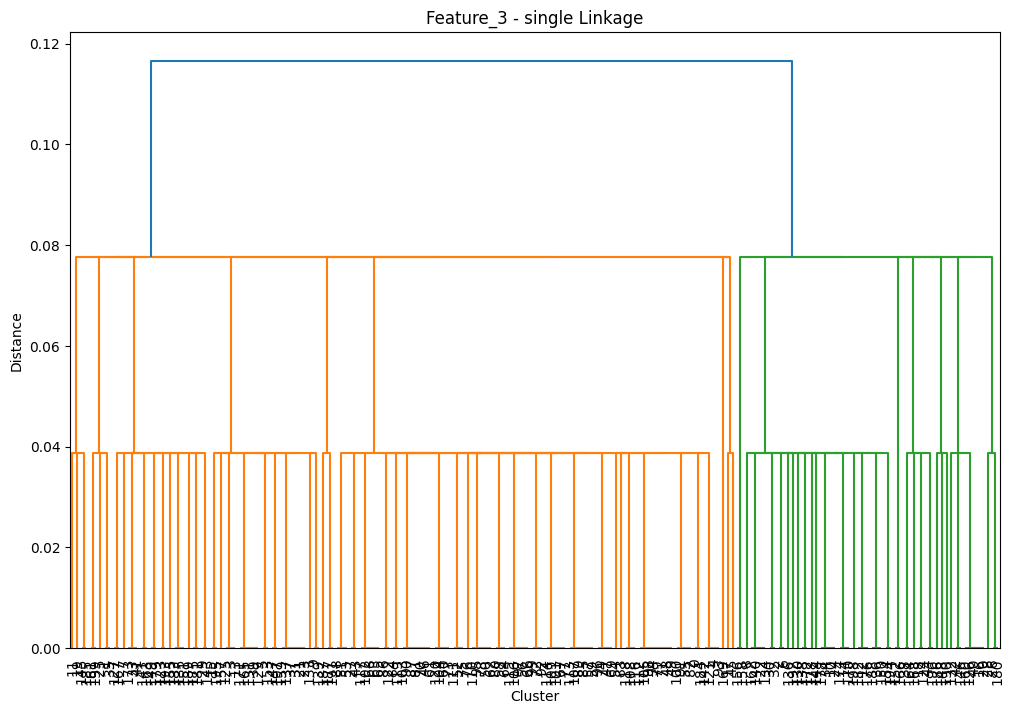

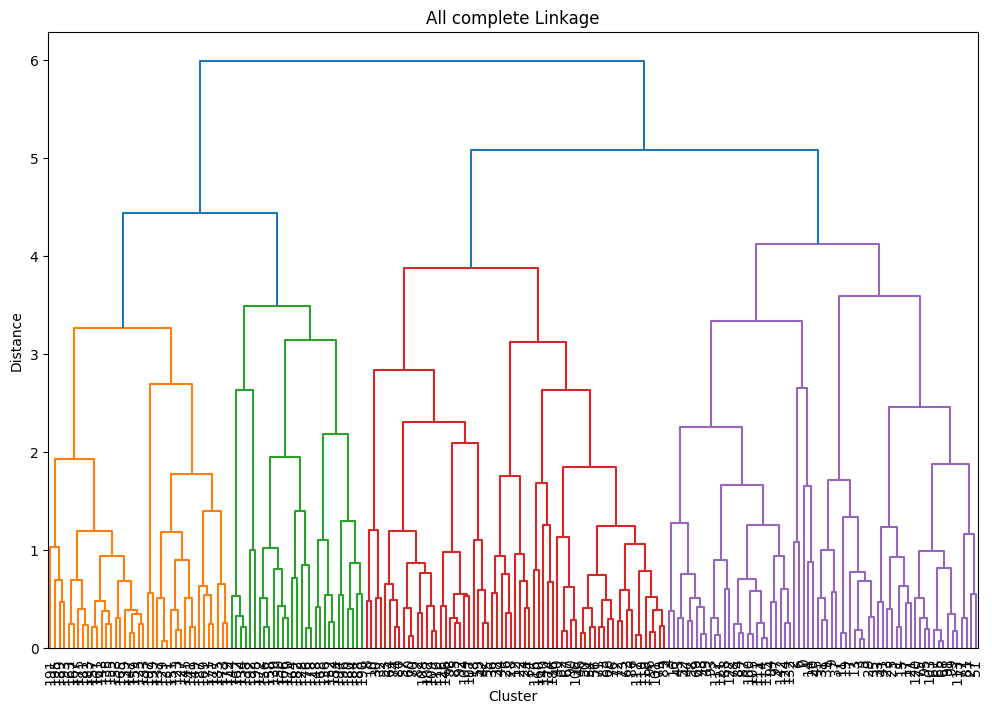

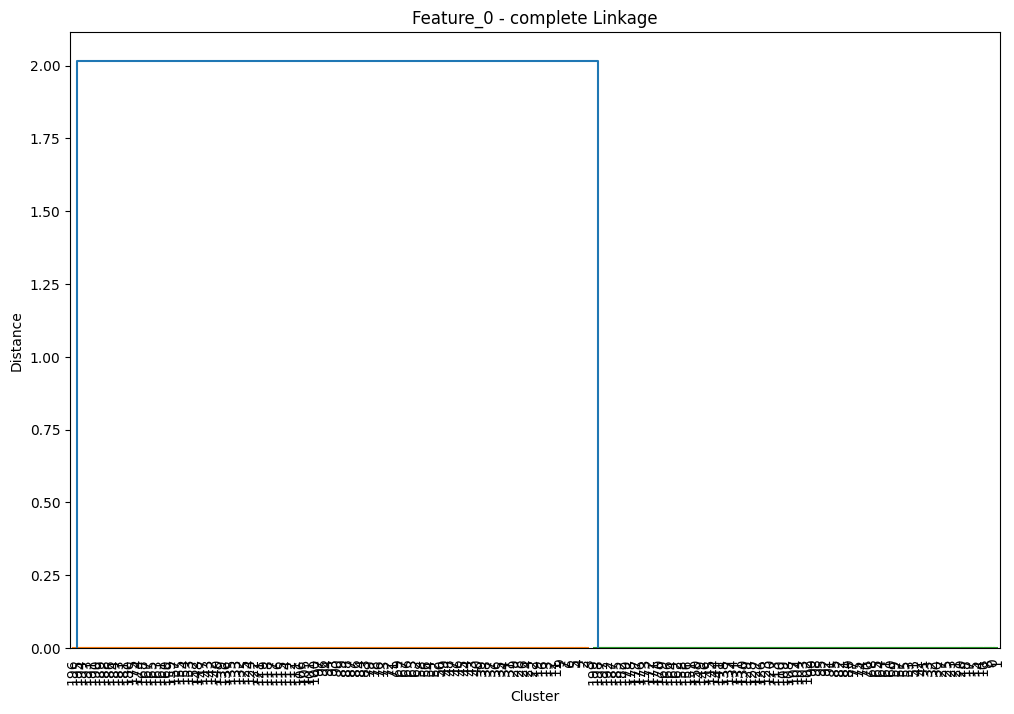

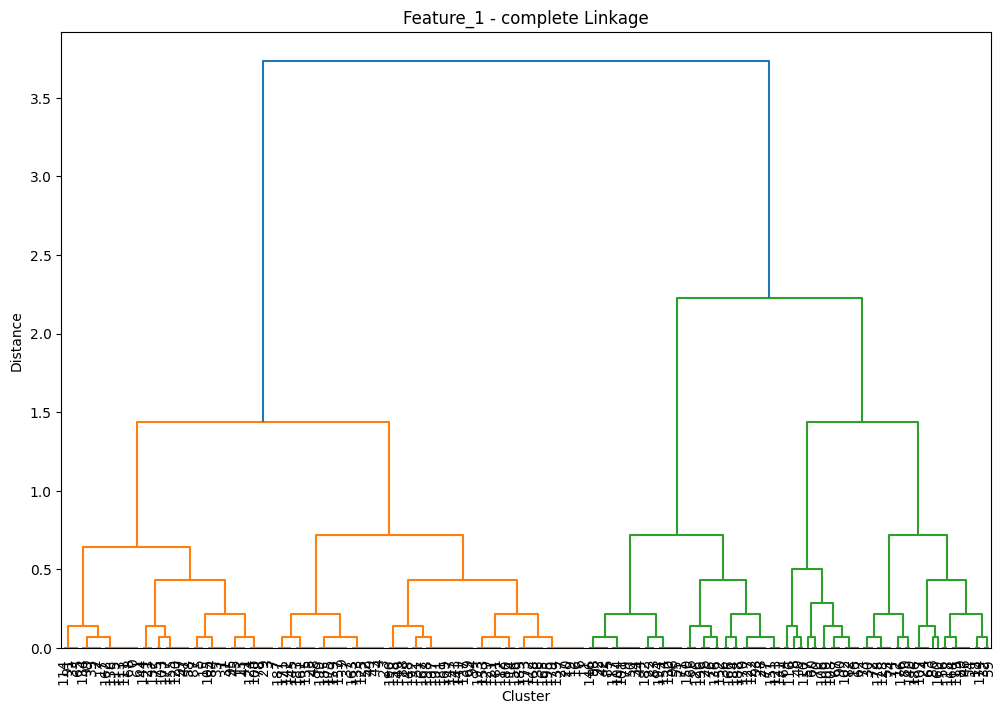

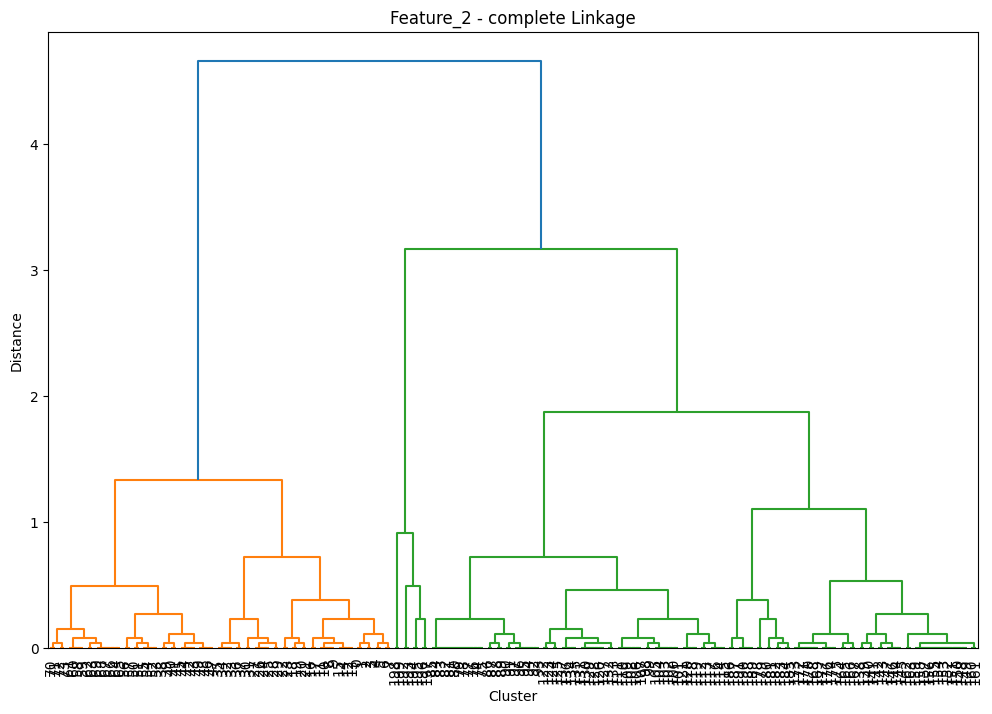

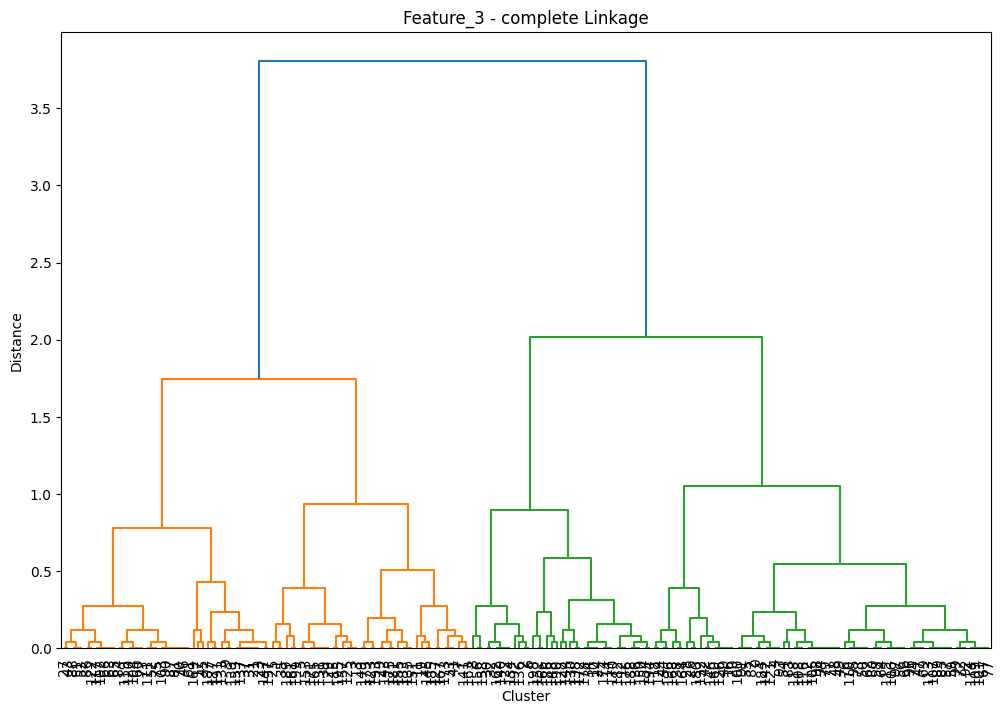

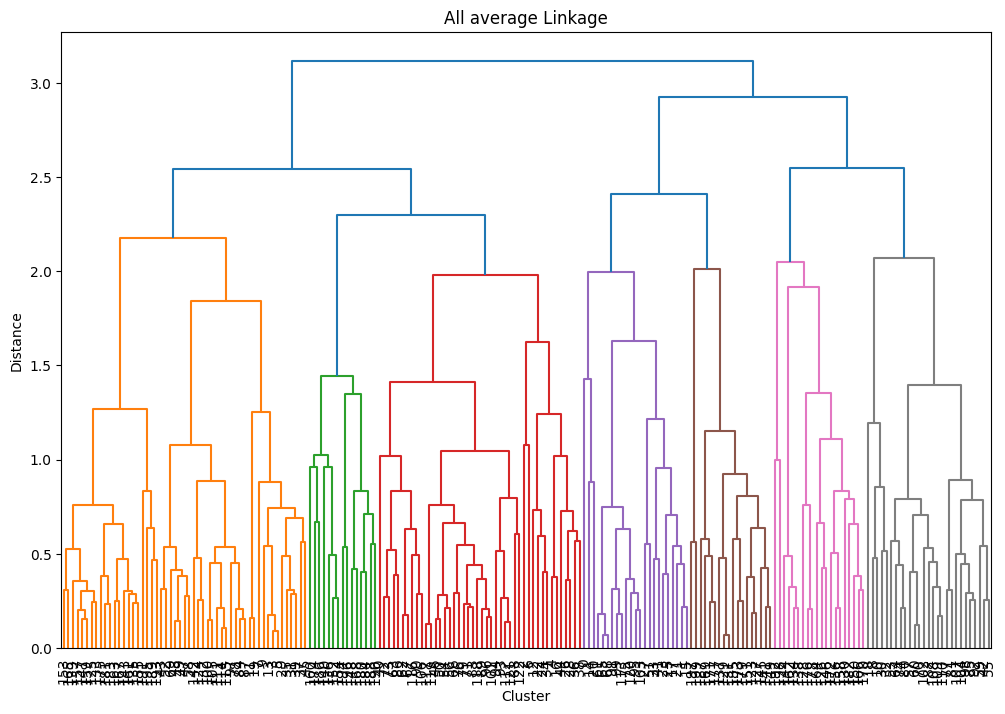

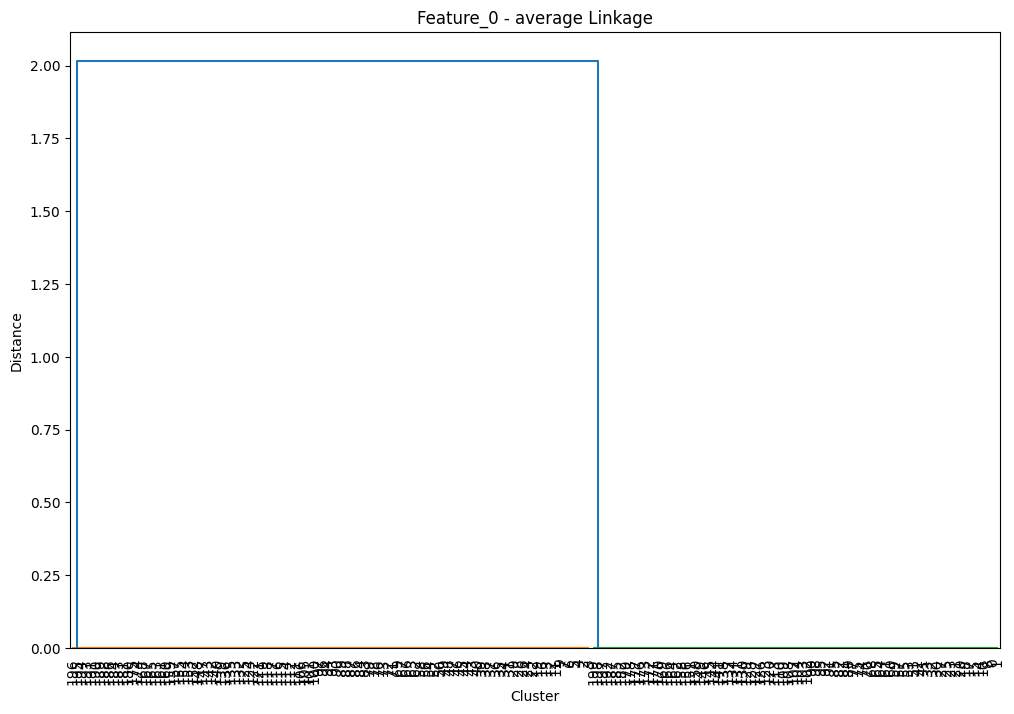

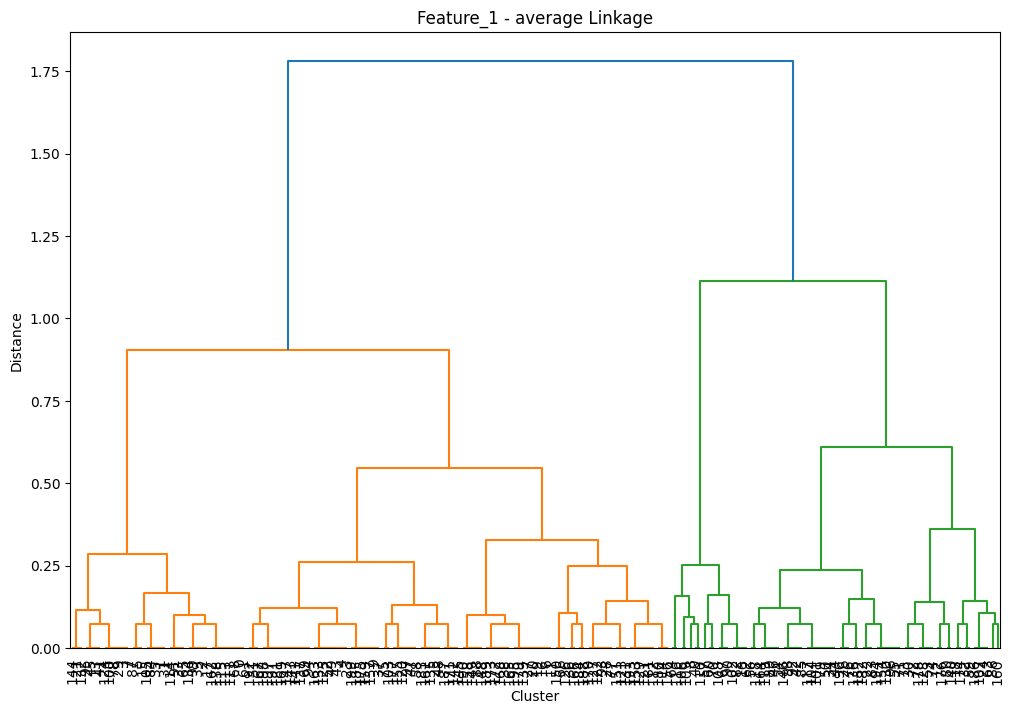

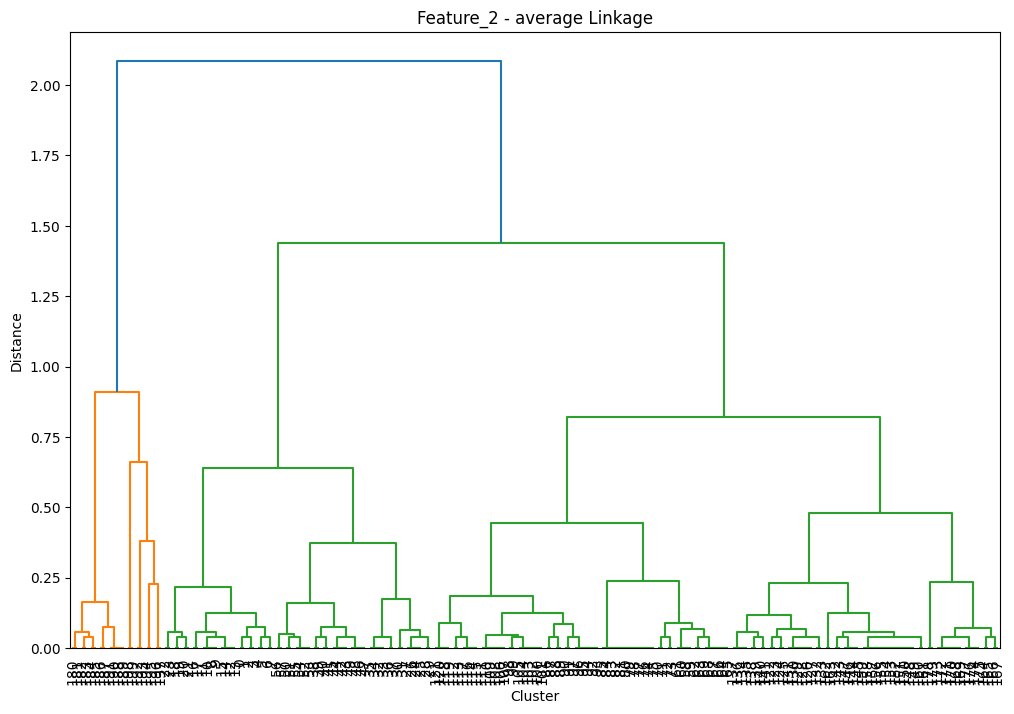

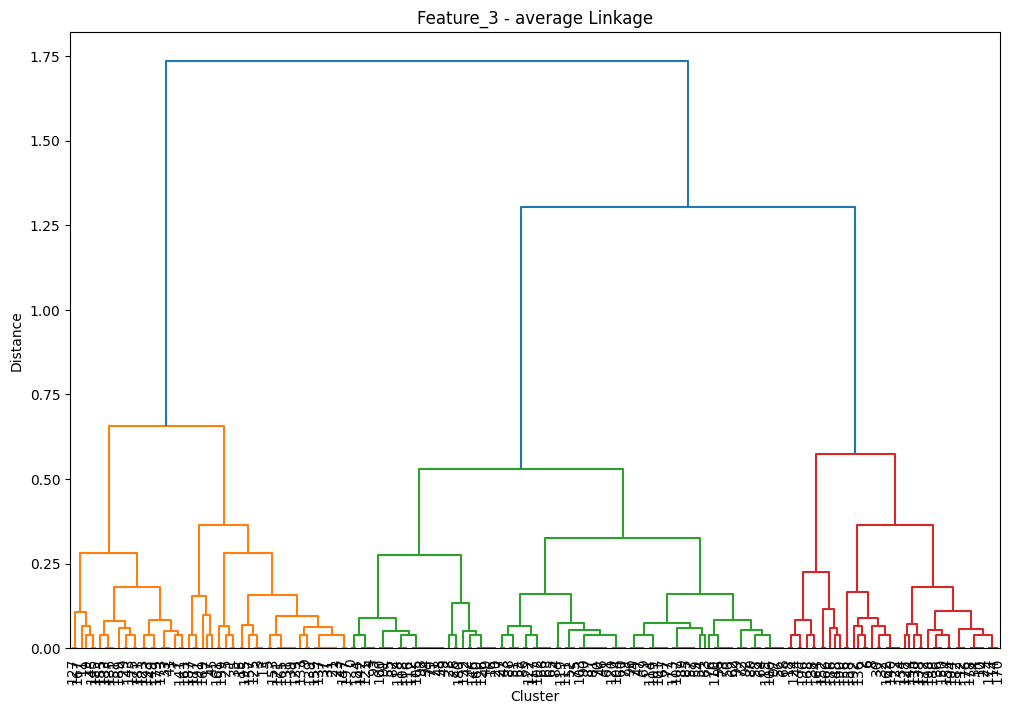

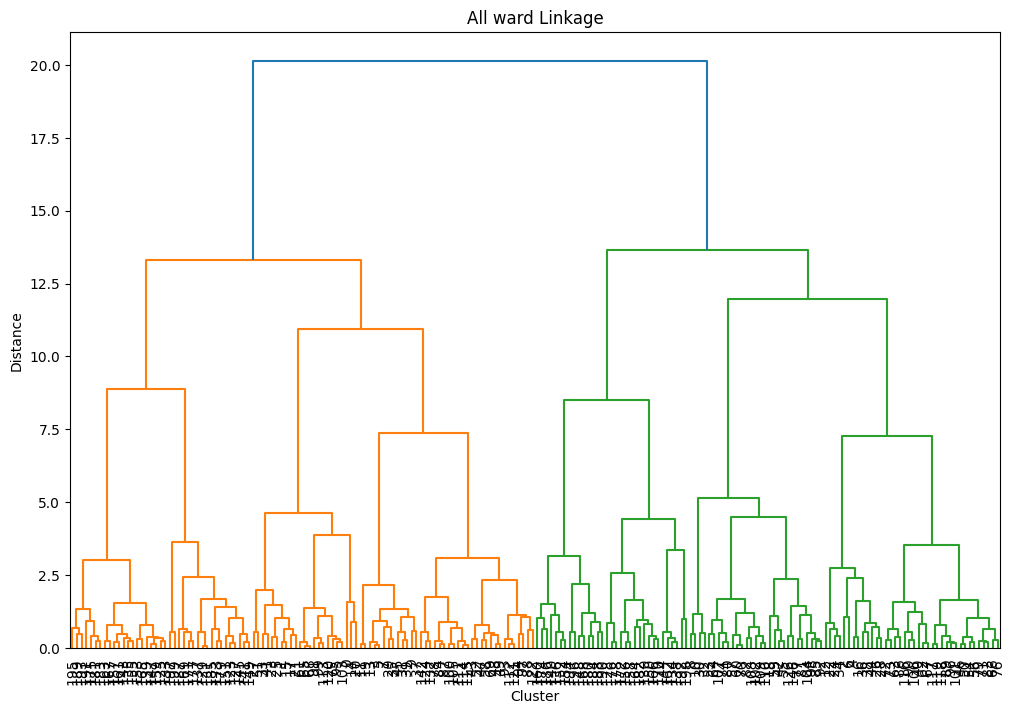

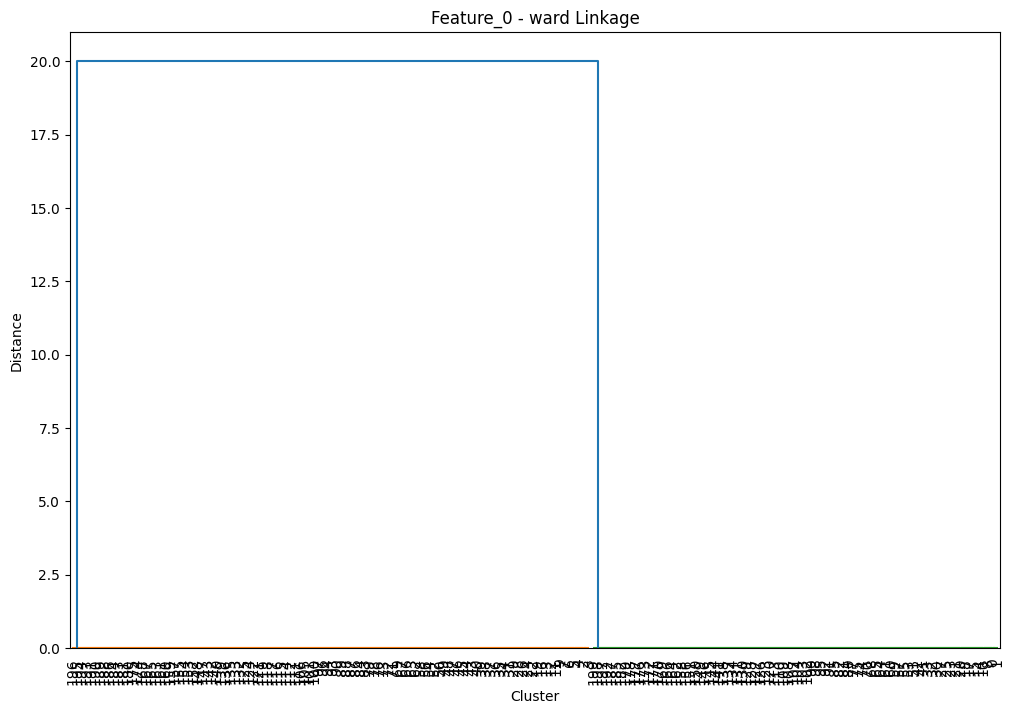

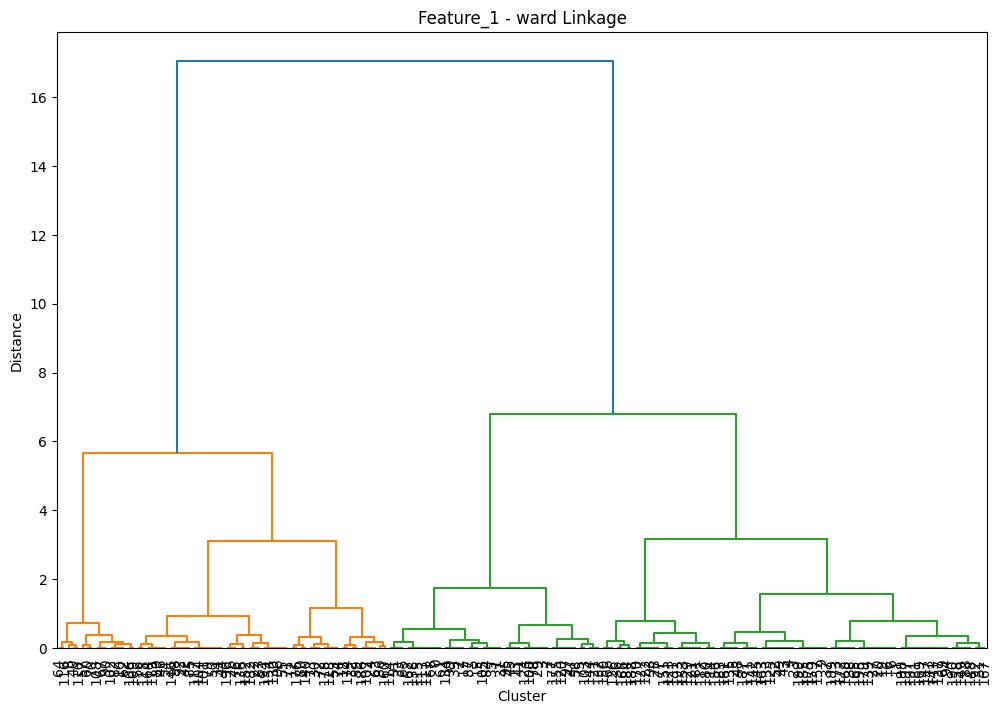

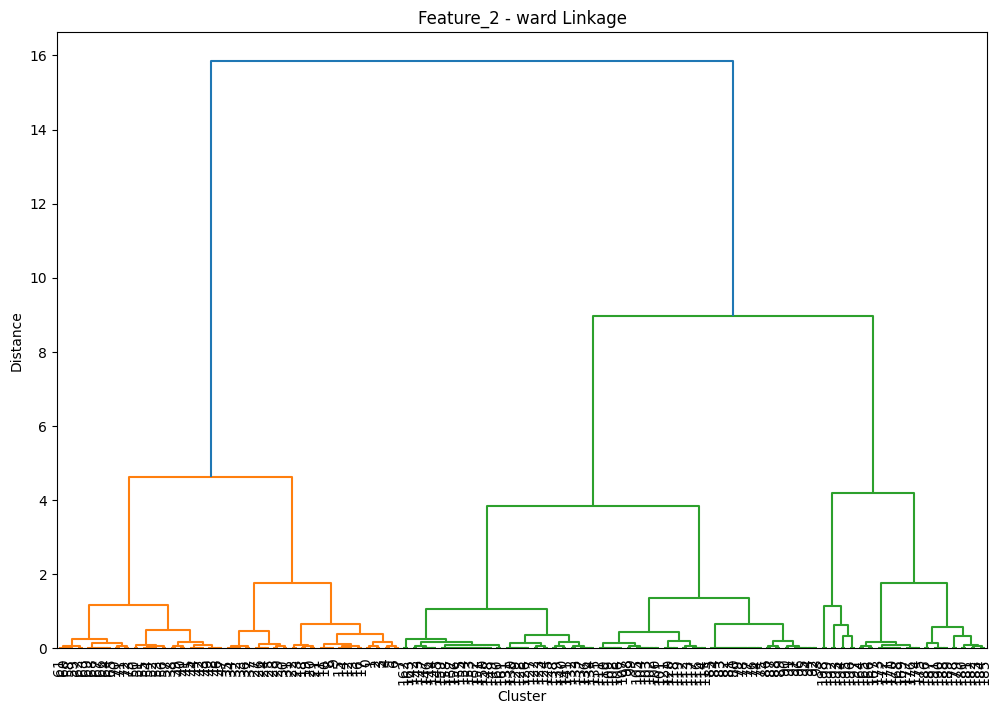

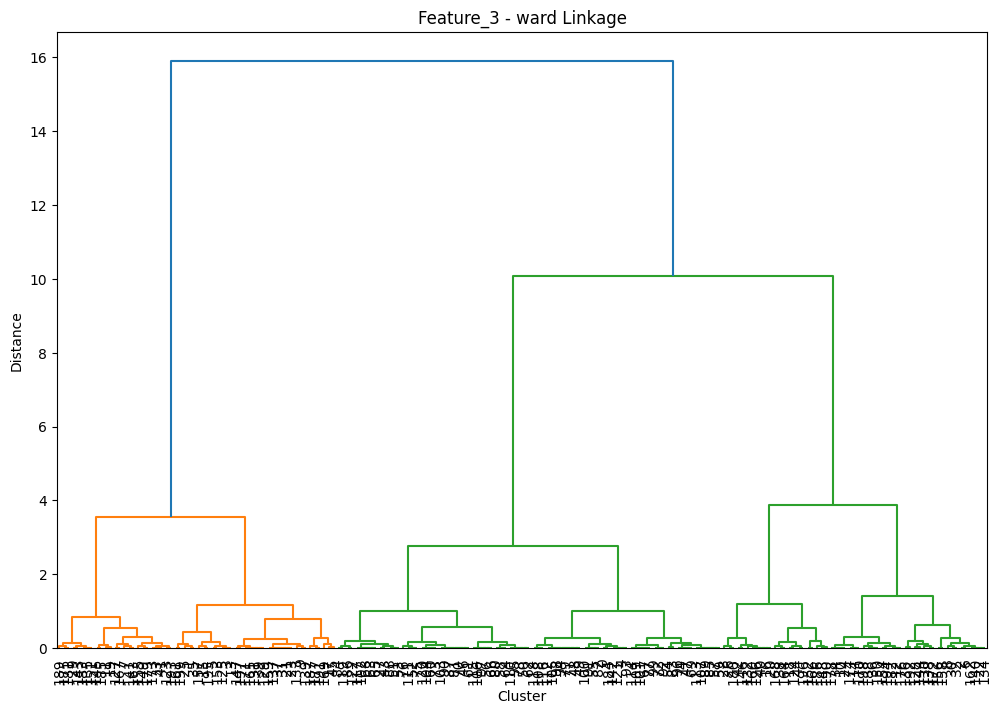

In [38]:

for linkage_type in linkage_methods:
    hc = HierarchicalClustering(X_normalized.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in X_normalized.columns:
        feature_data = X_normalized[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')

## Part 2

In [39]:
# norm_genedata = (genedata-genedata.mean()) / genedata.std()
norm_genedata = pd.DataFrame(scaler.fit_transform(genedata), columns=[f'Feature_{i}' for i in range(genedata.shape[1])])

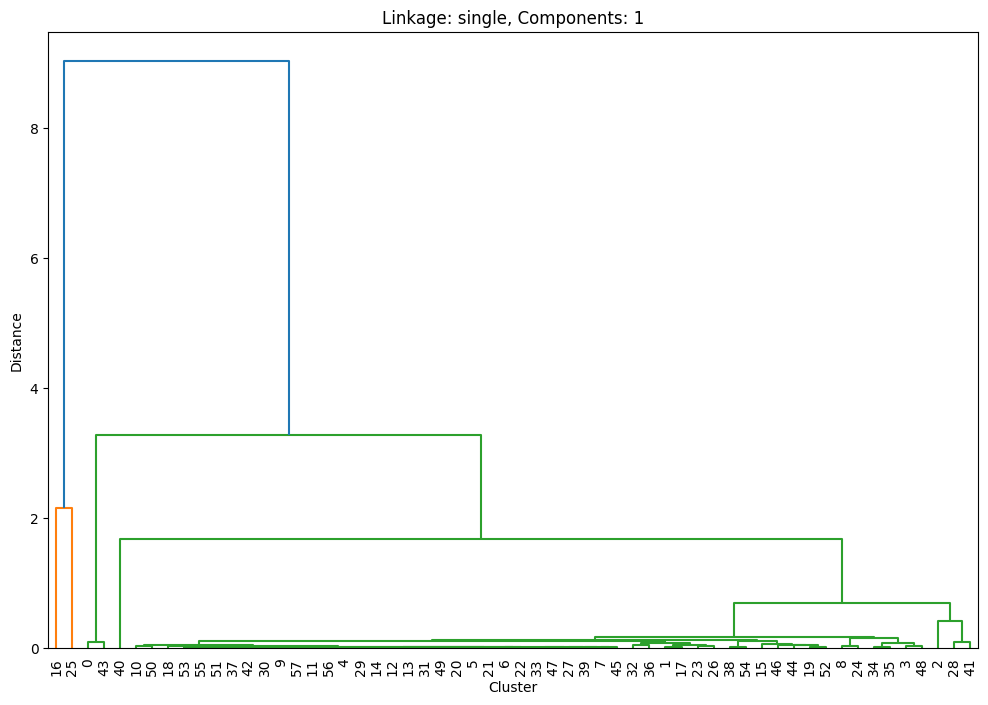

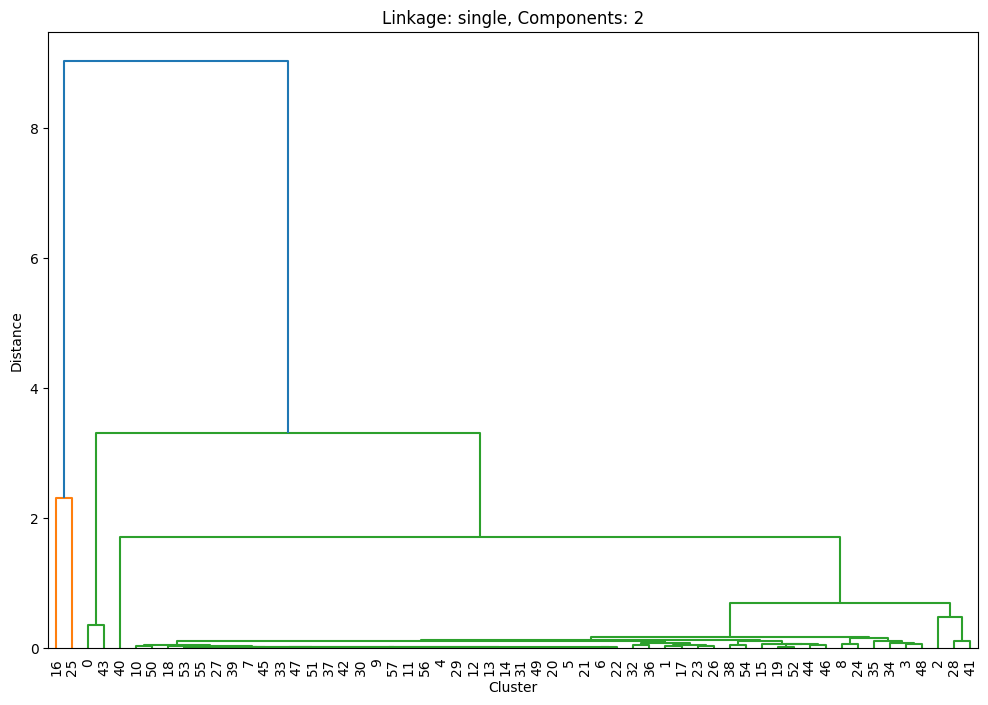

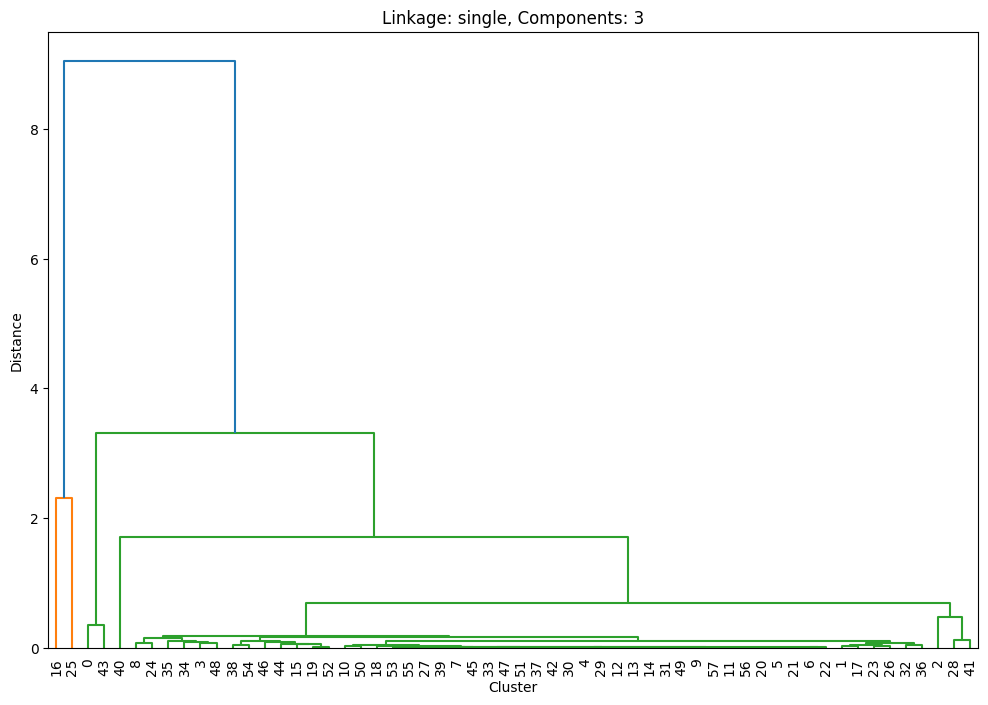

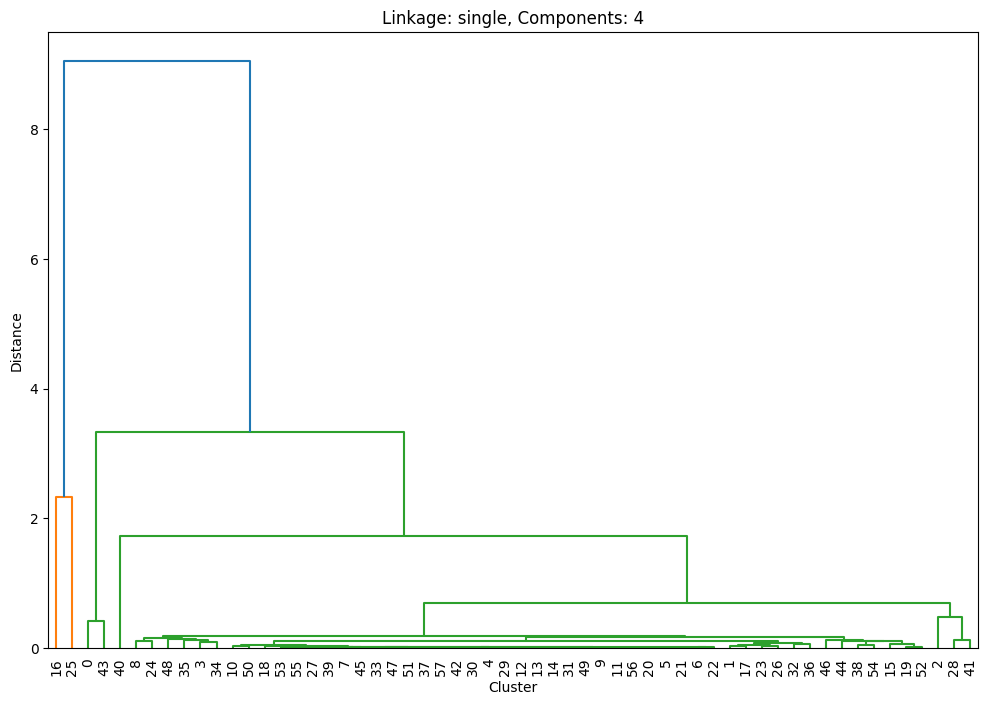

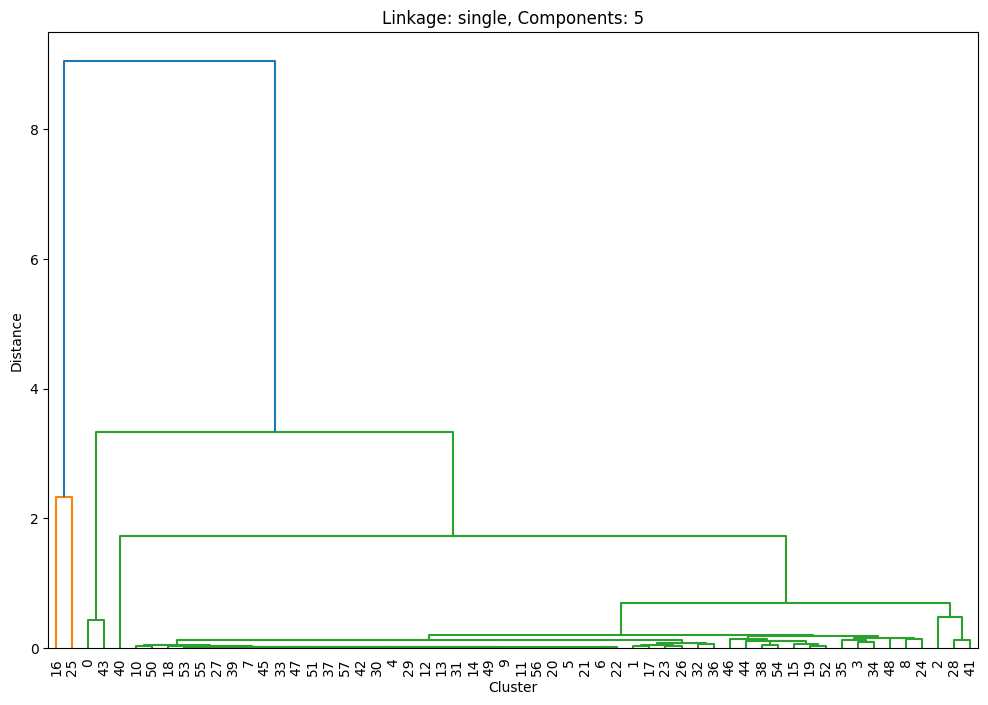

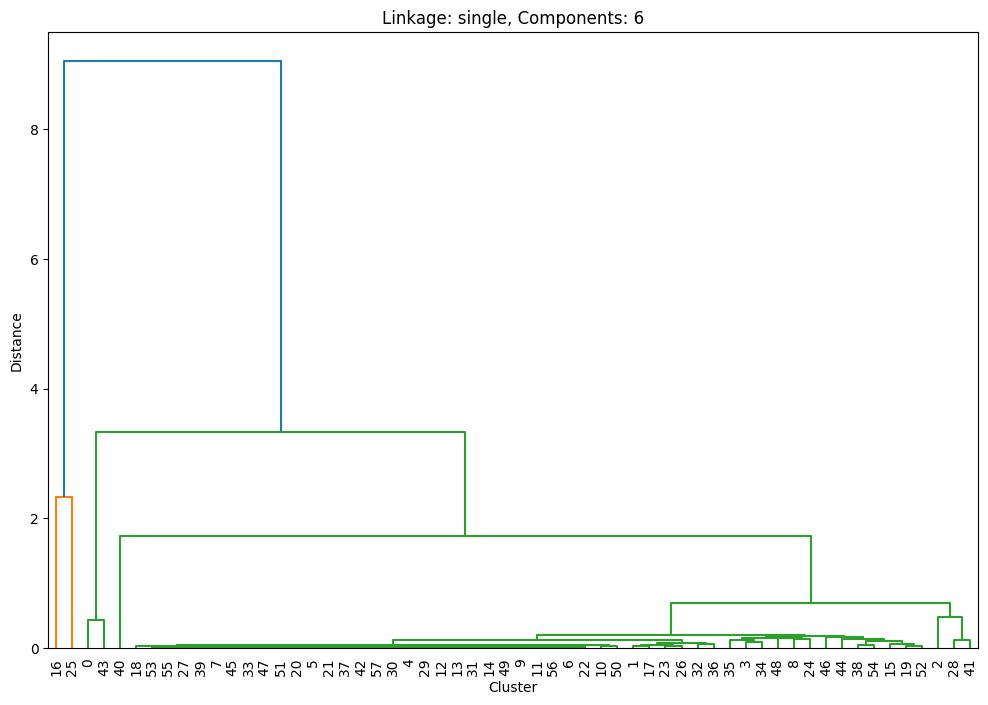

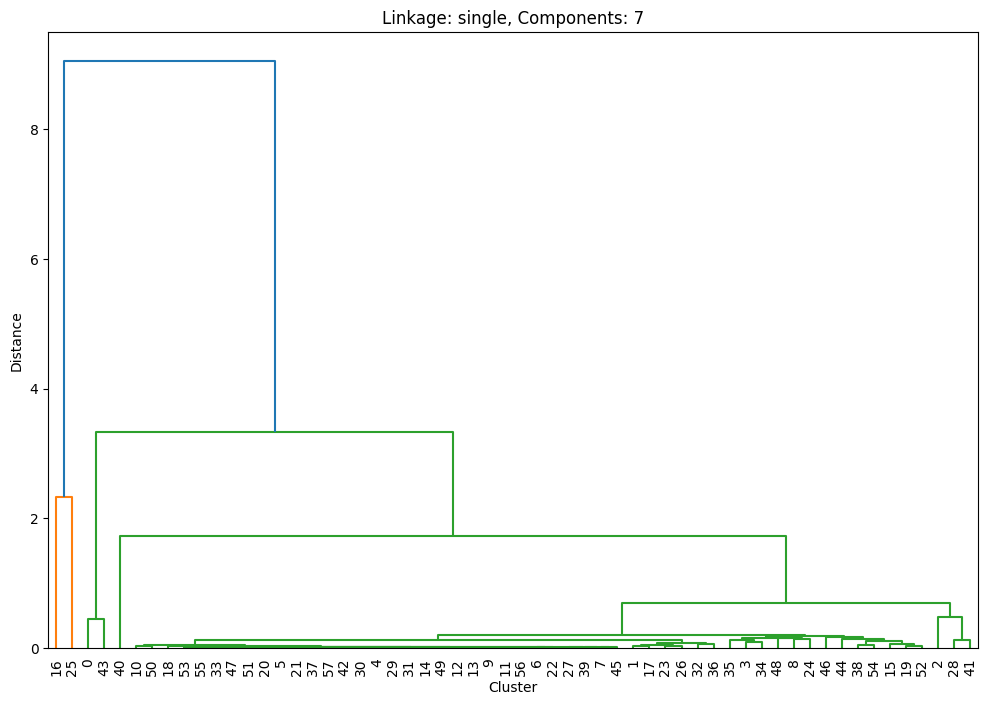

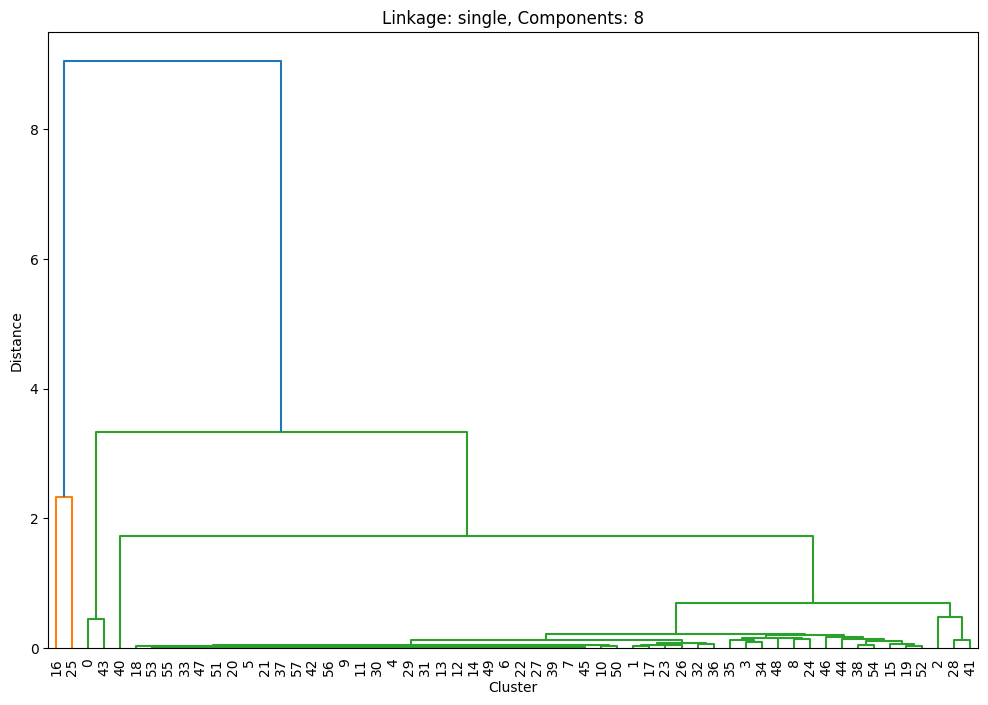

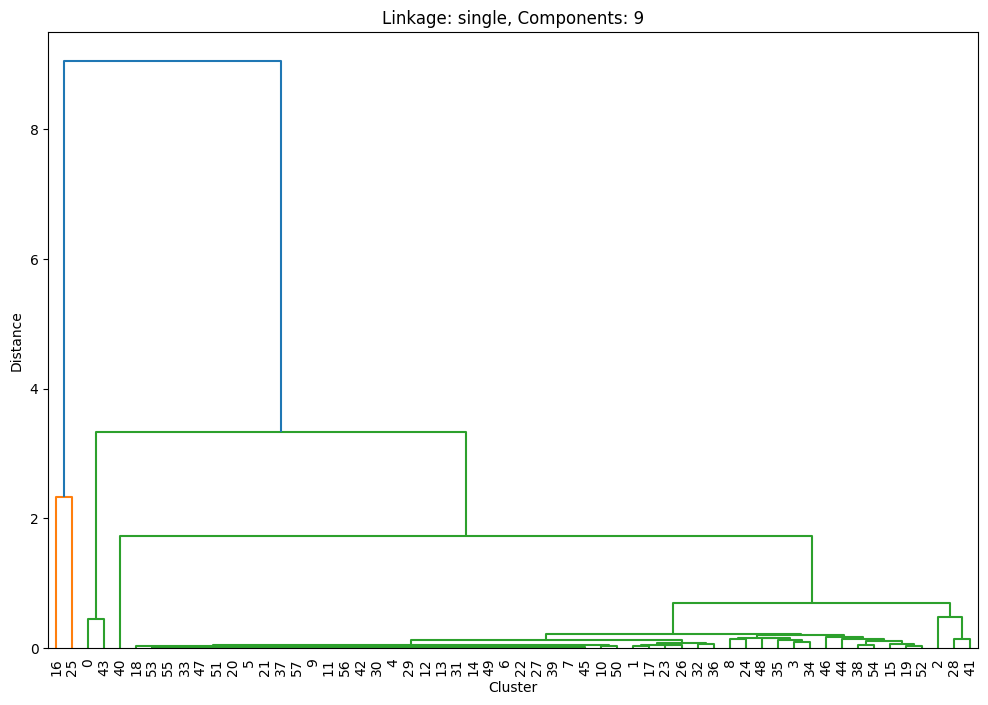

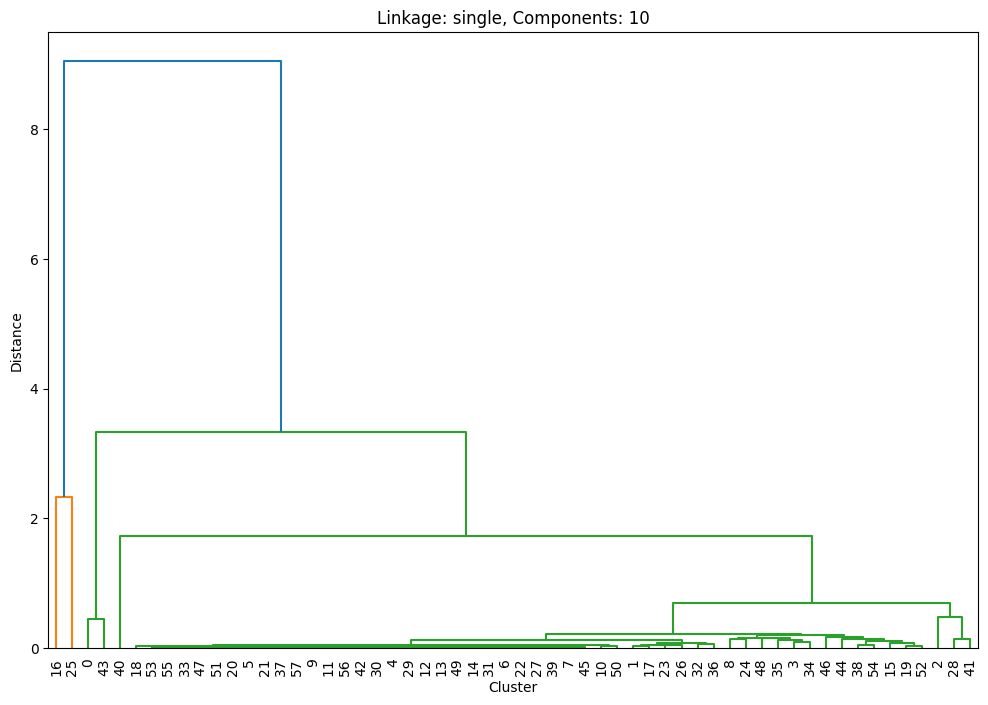

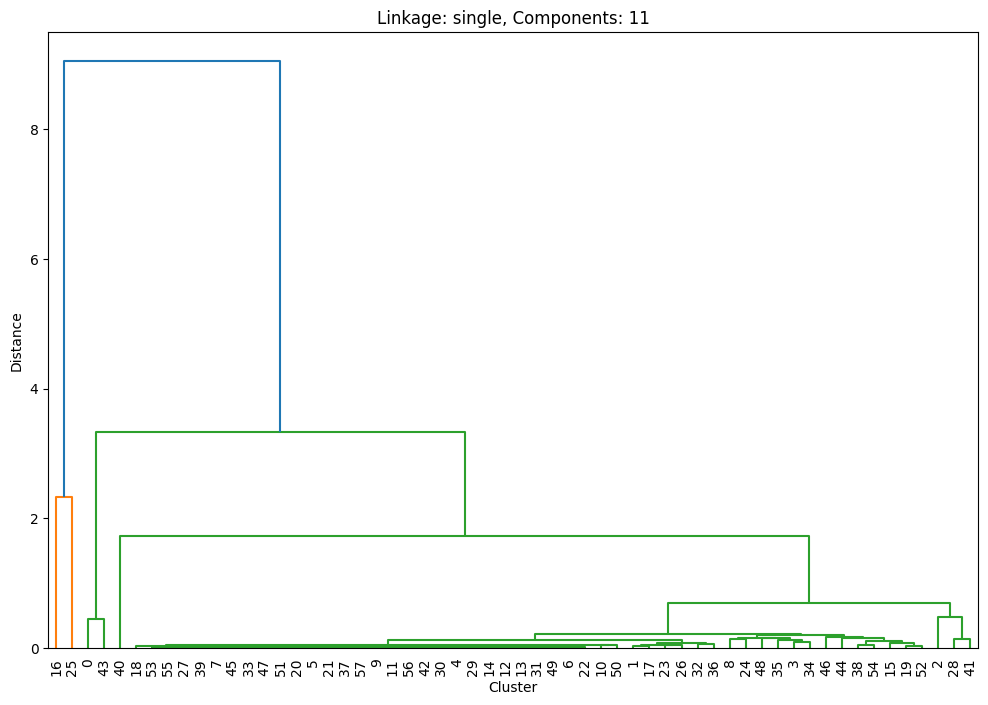

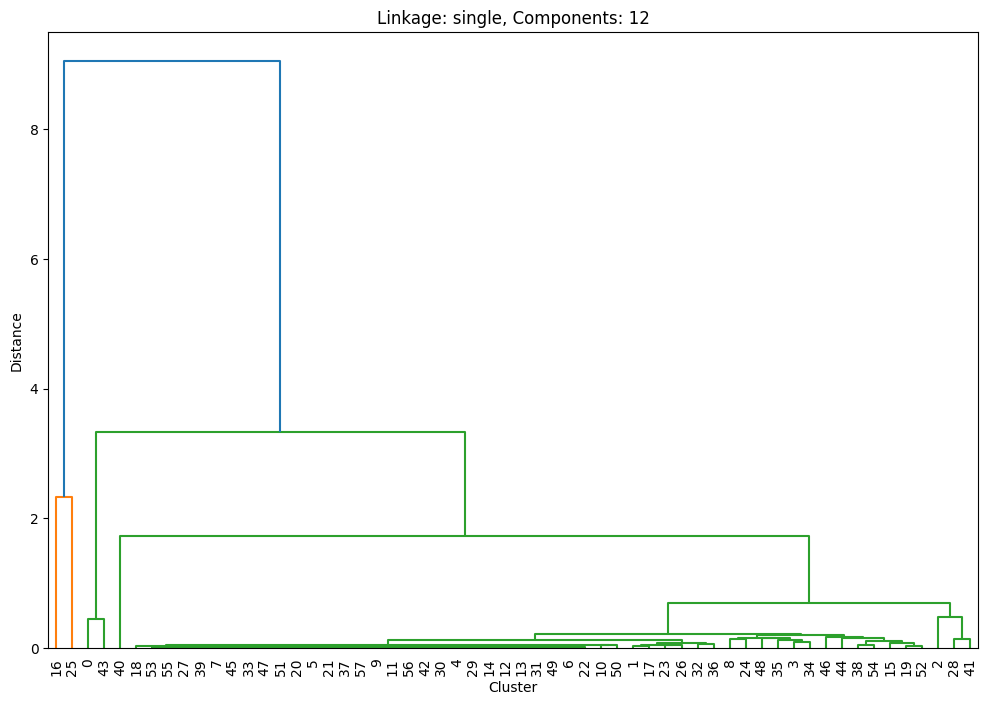

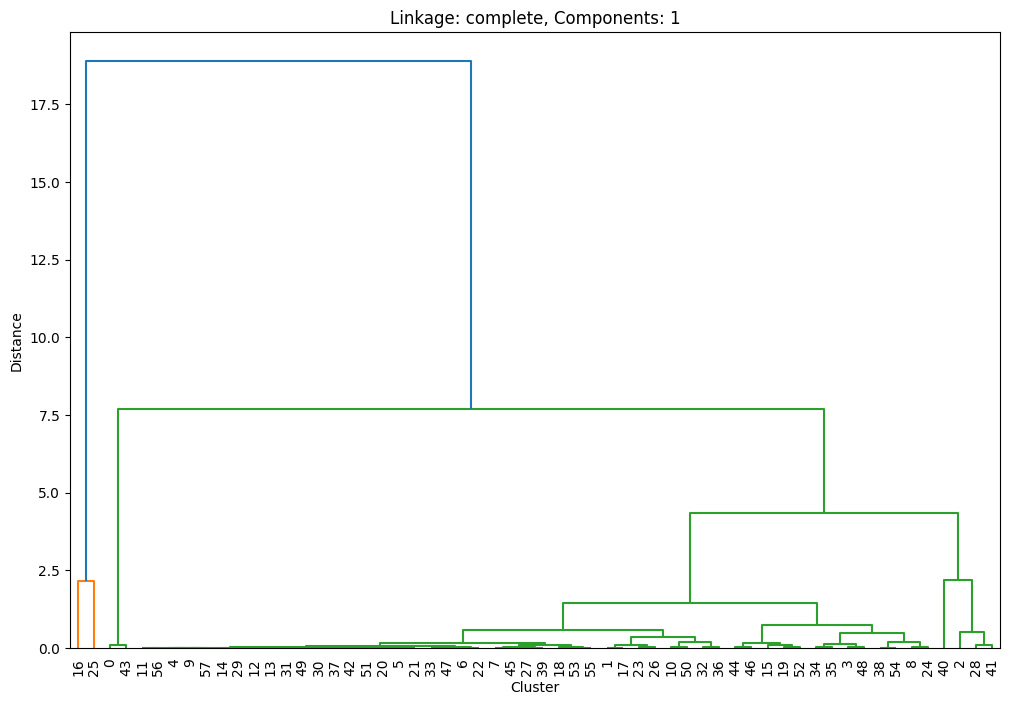

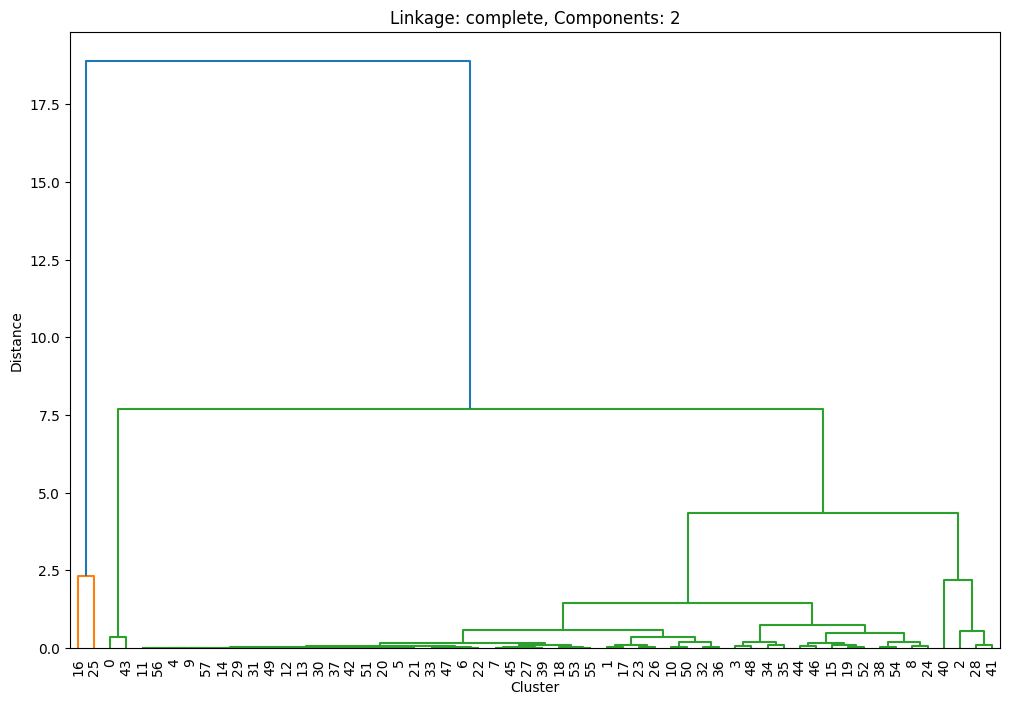

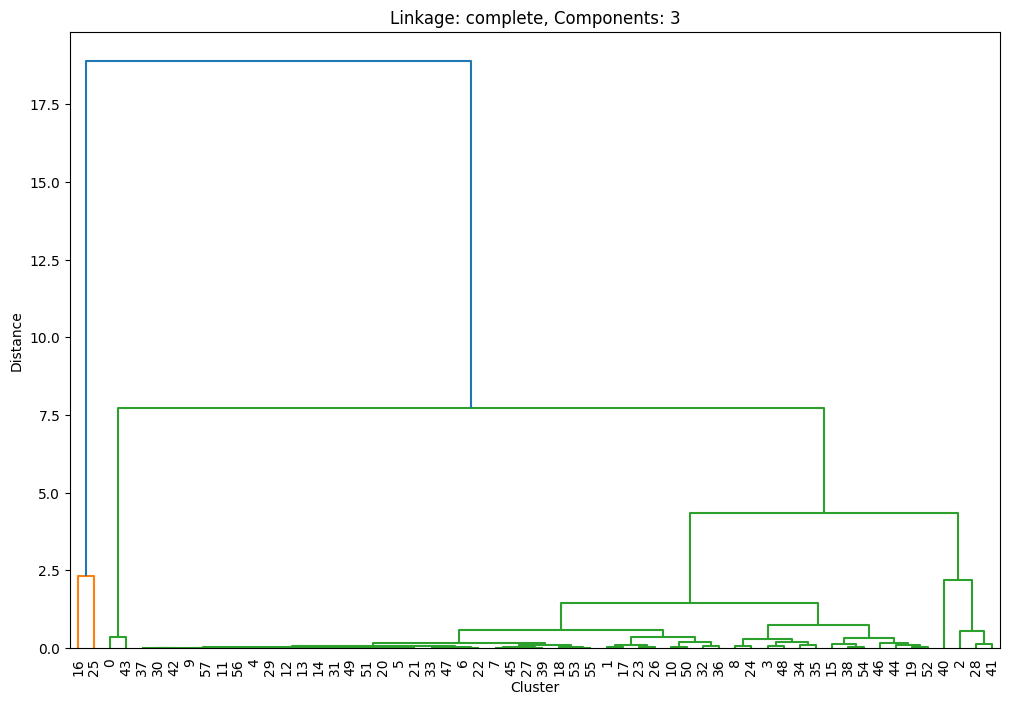

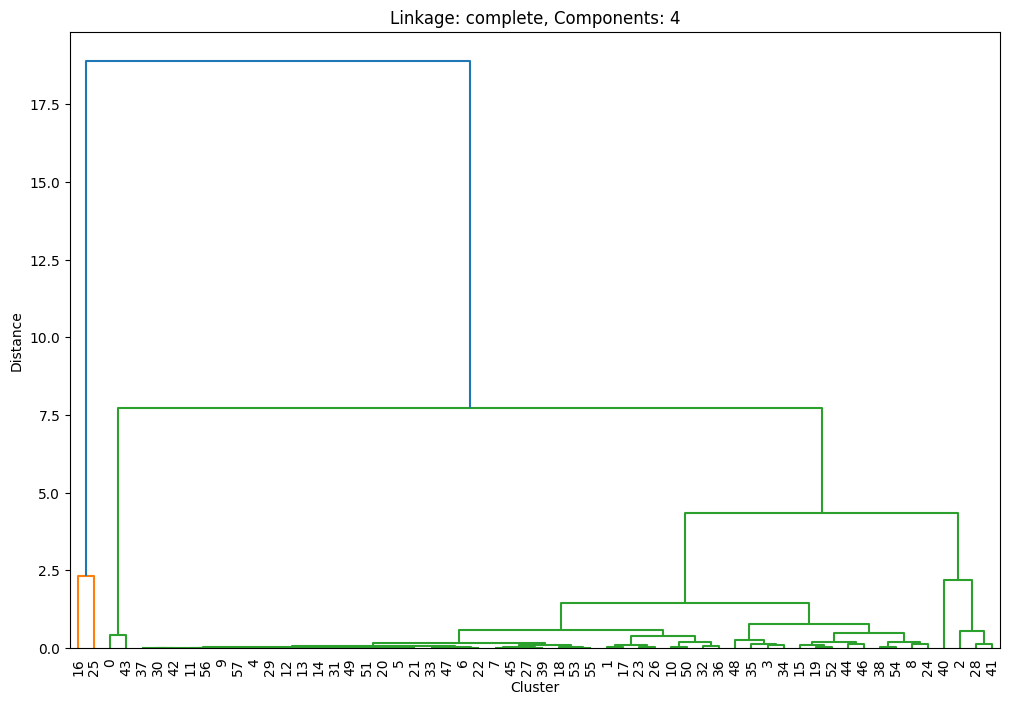

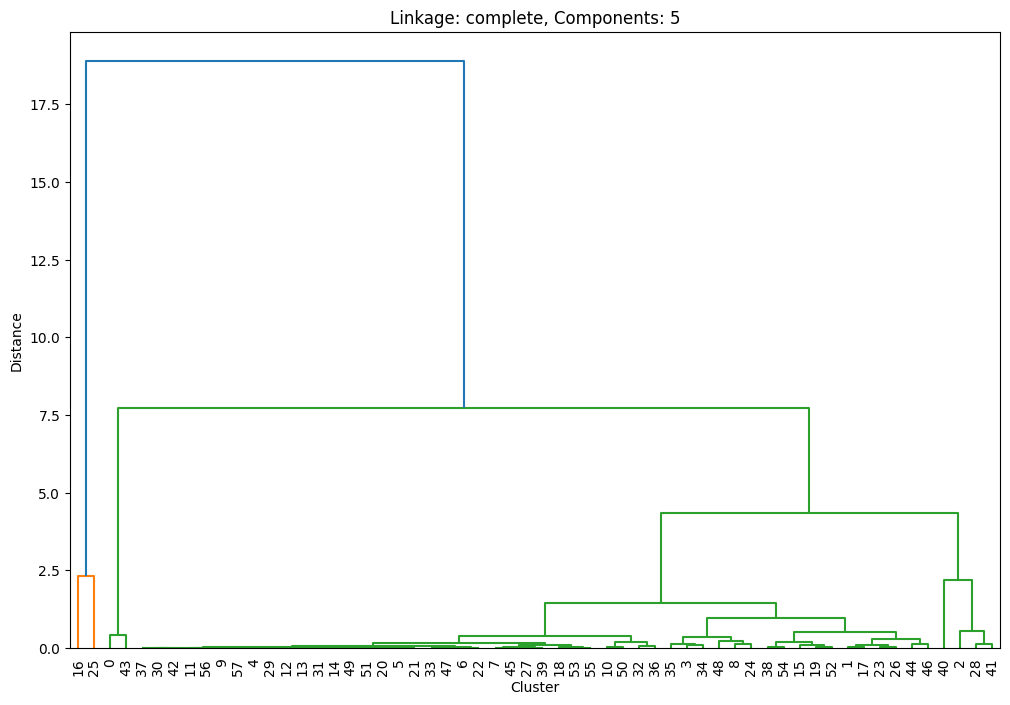

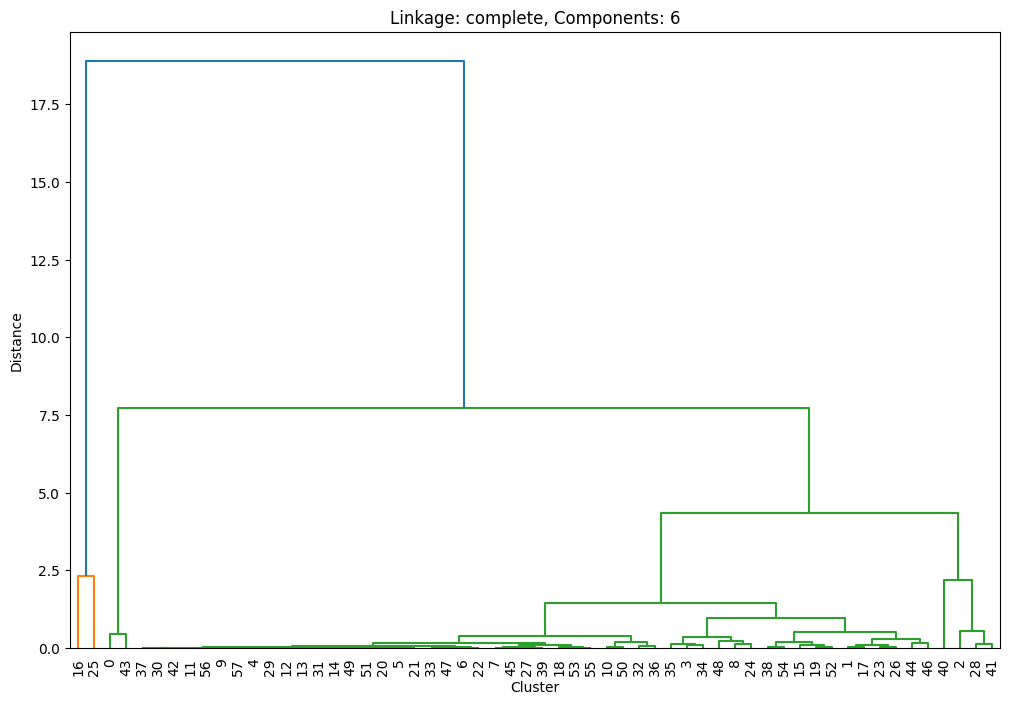

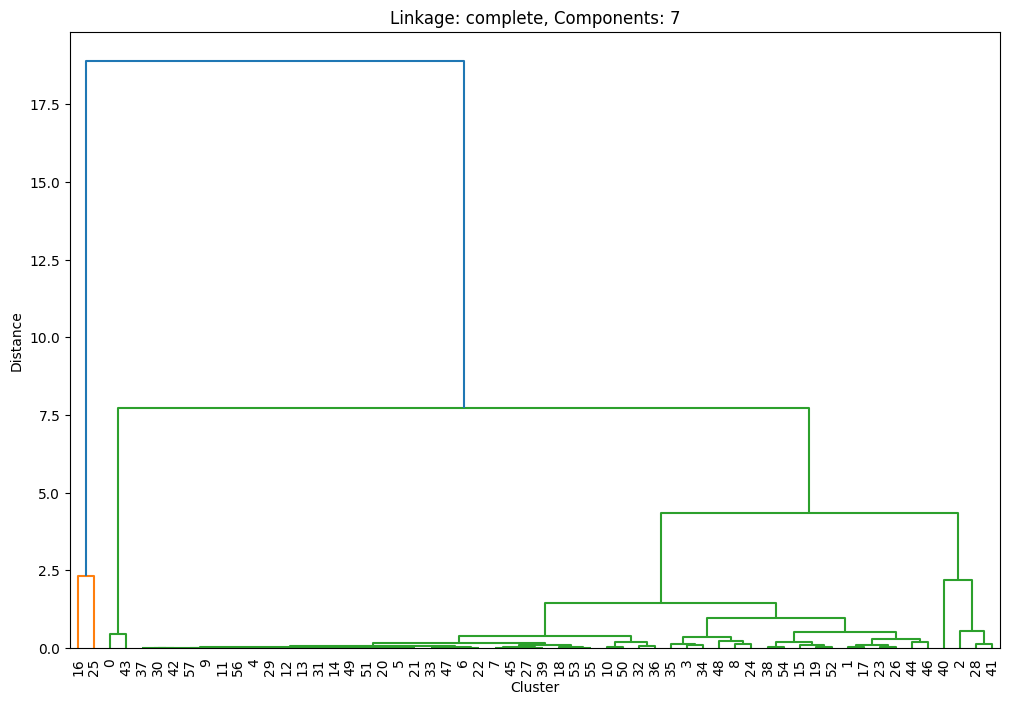

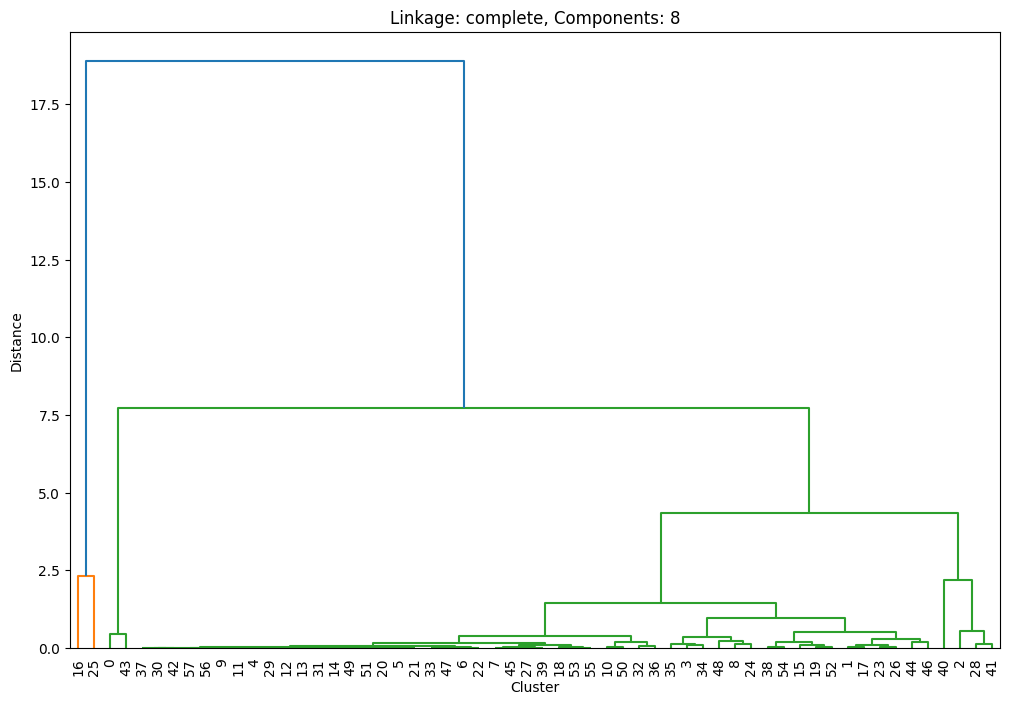

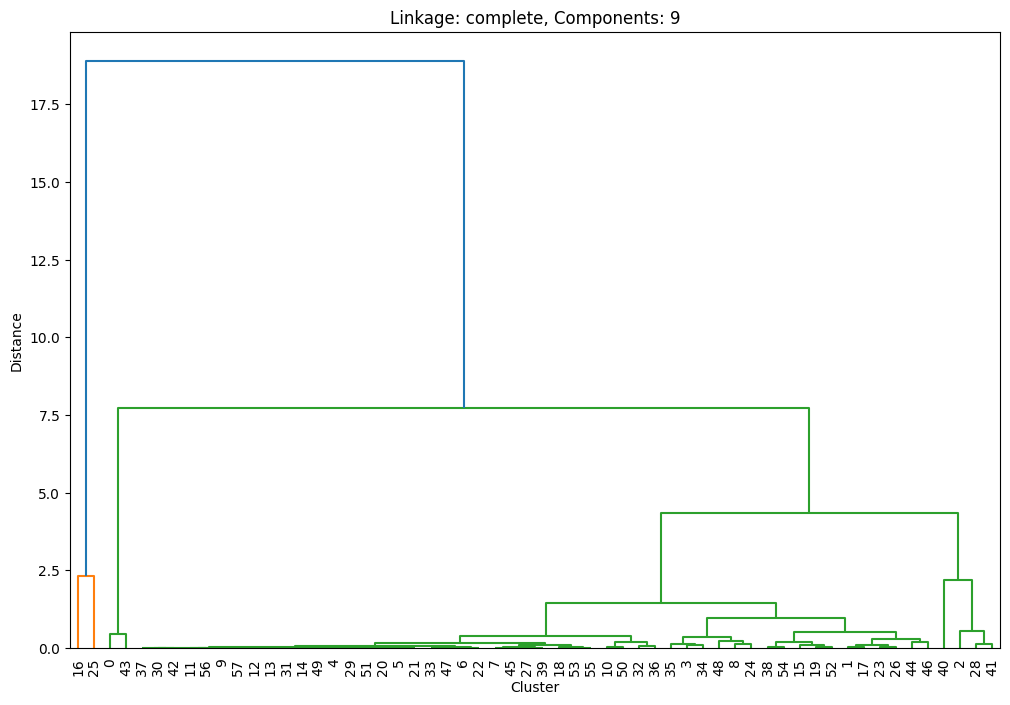

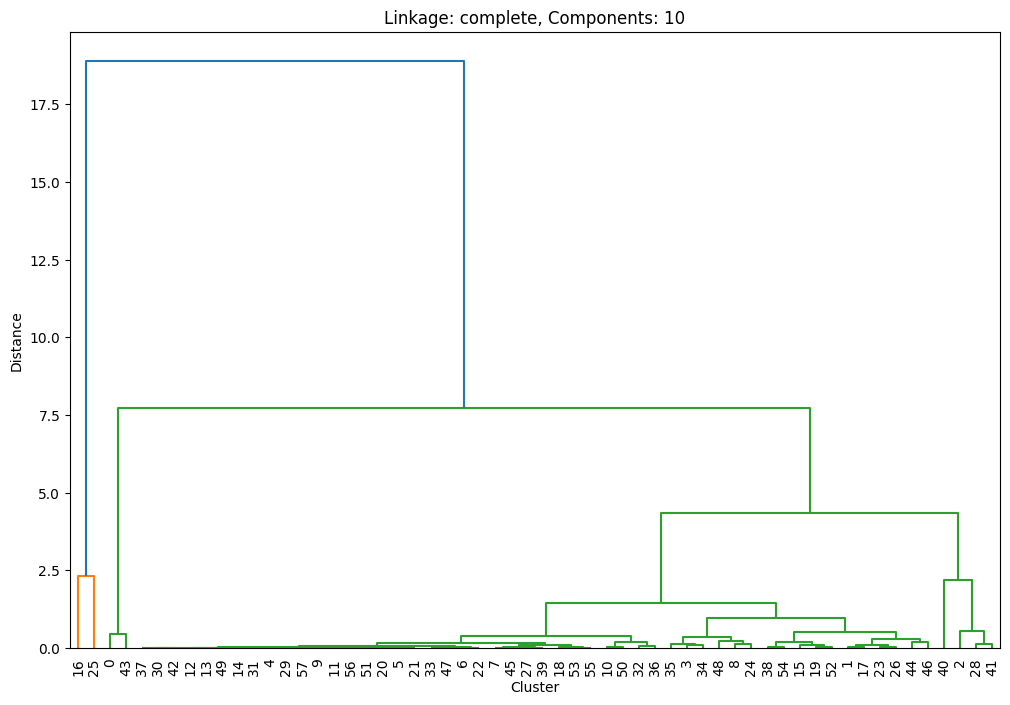

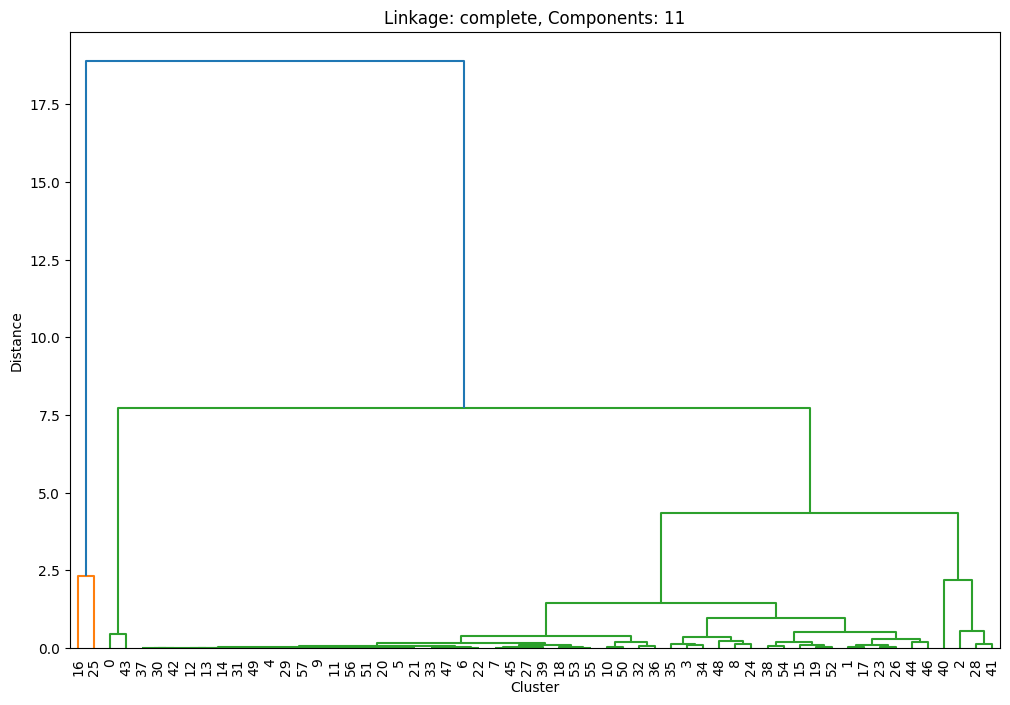

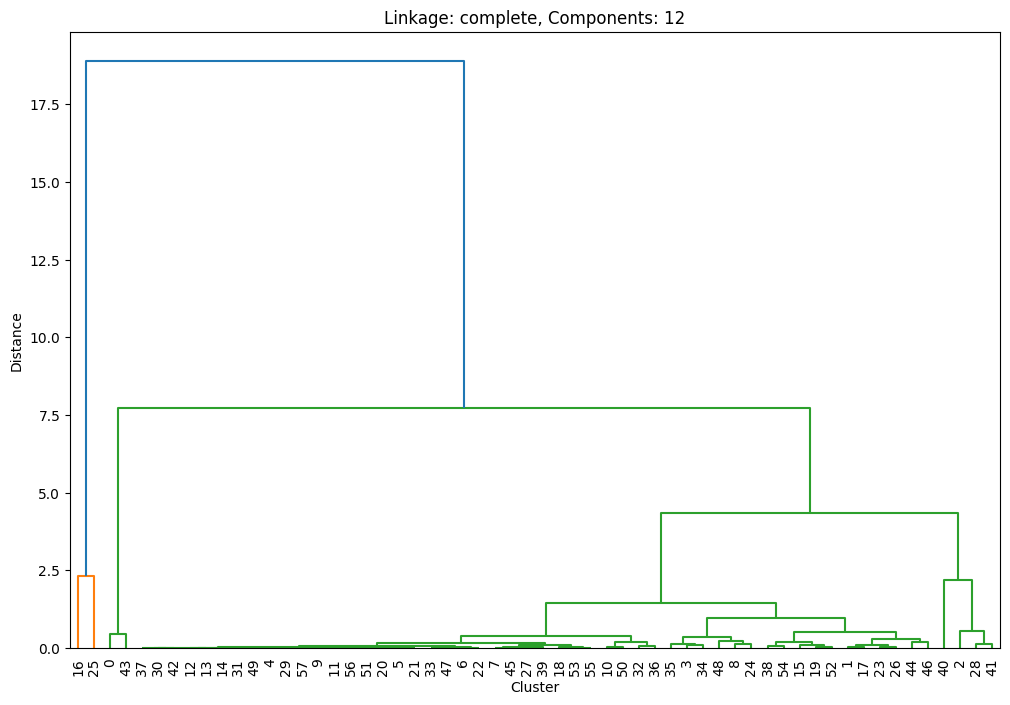

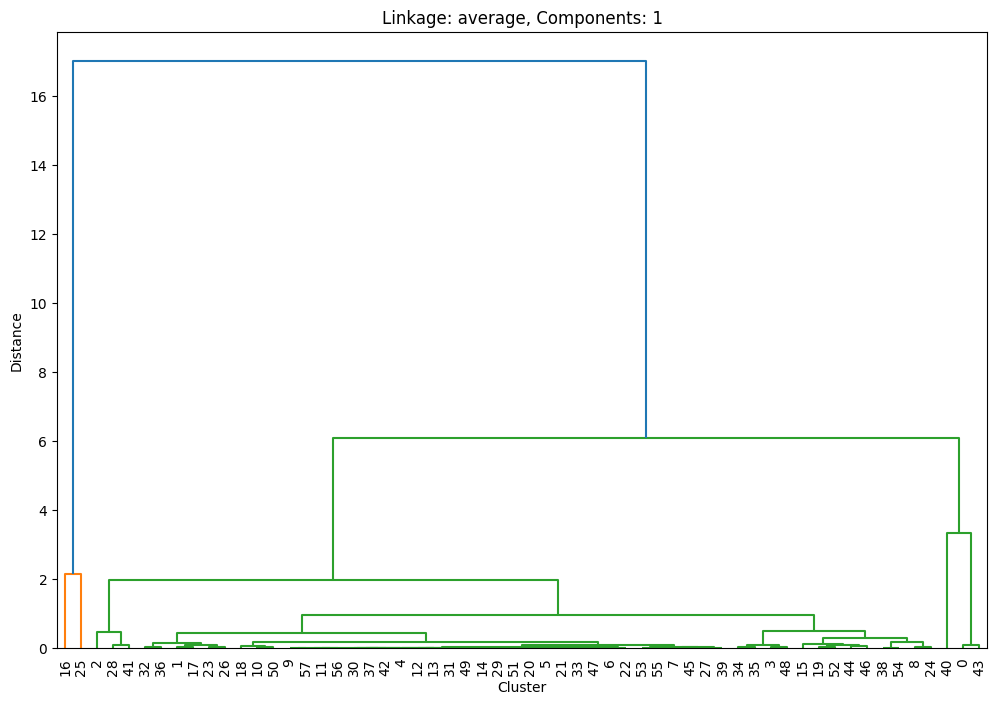

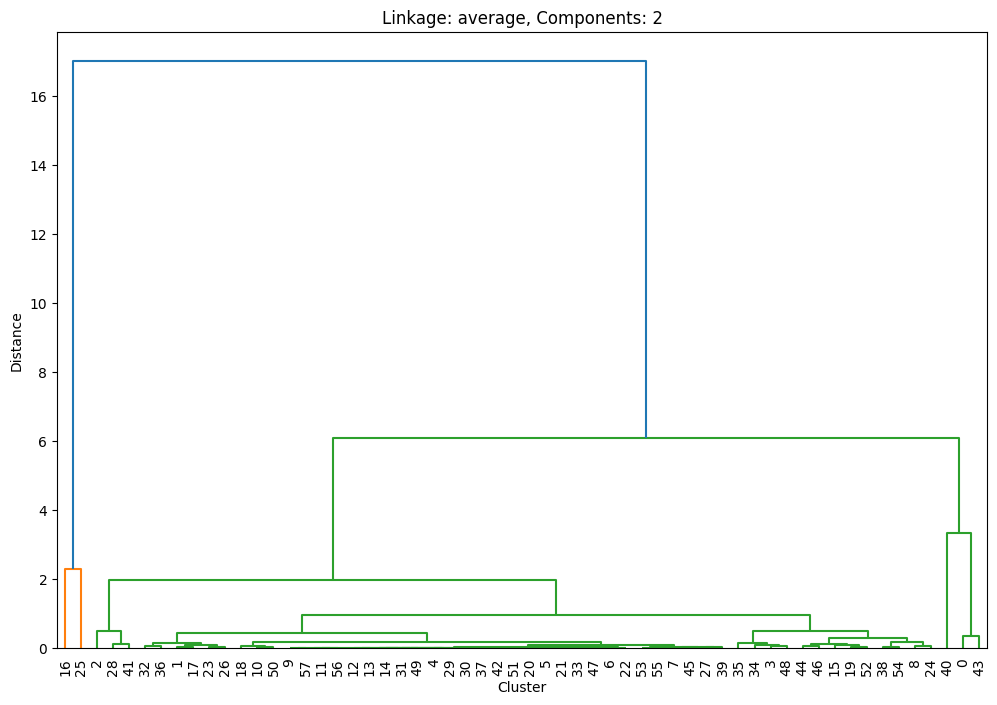

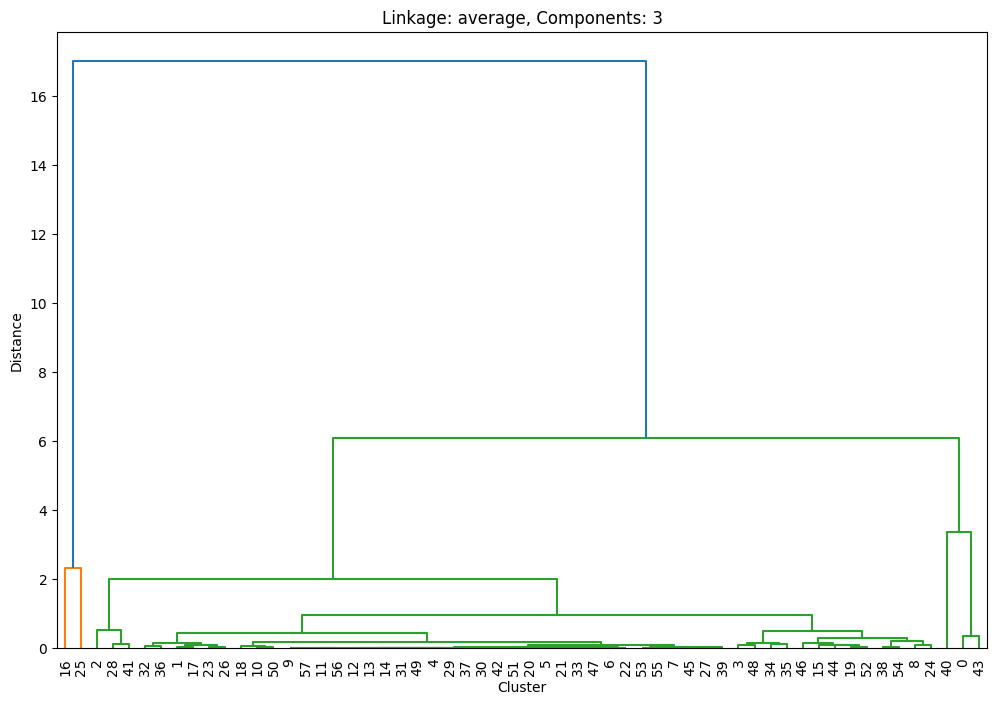

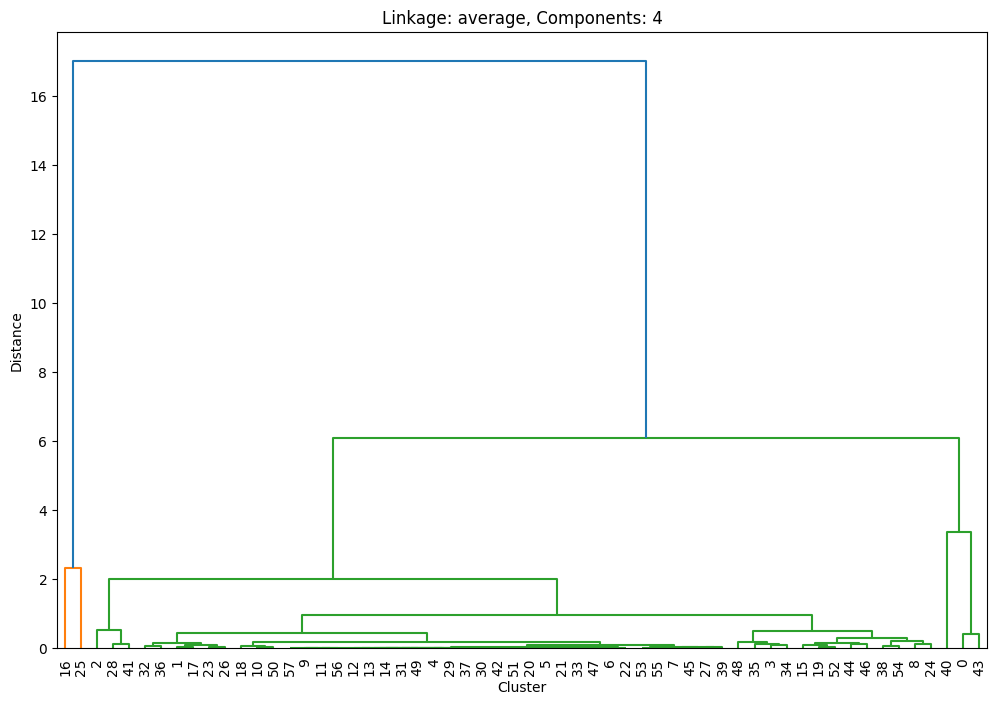

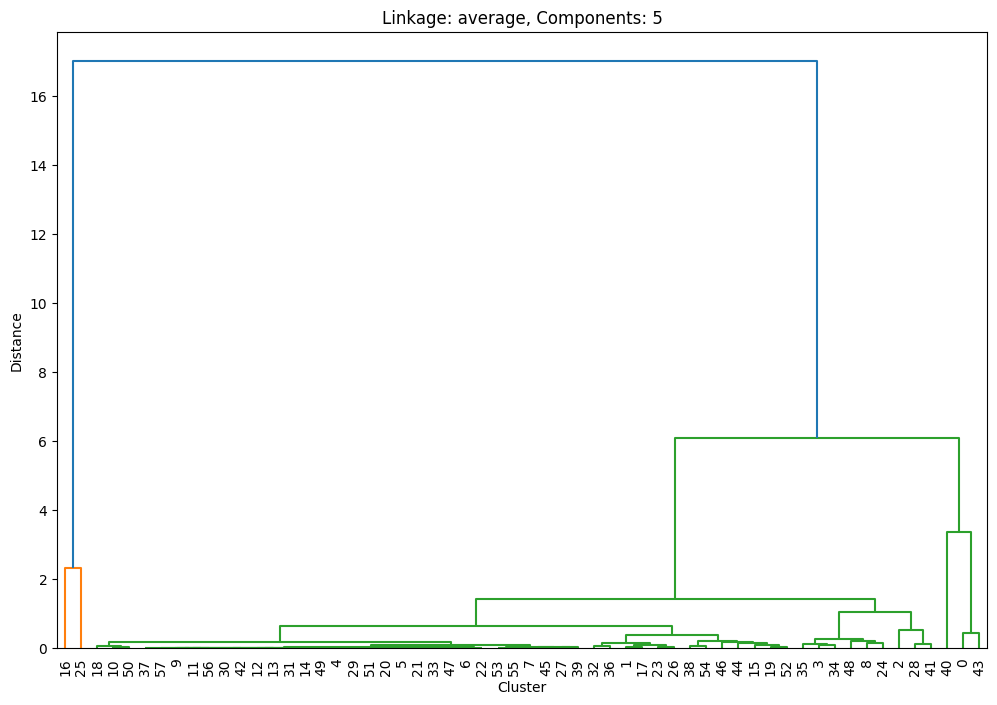

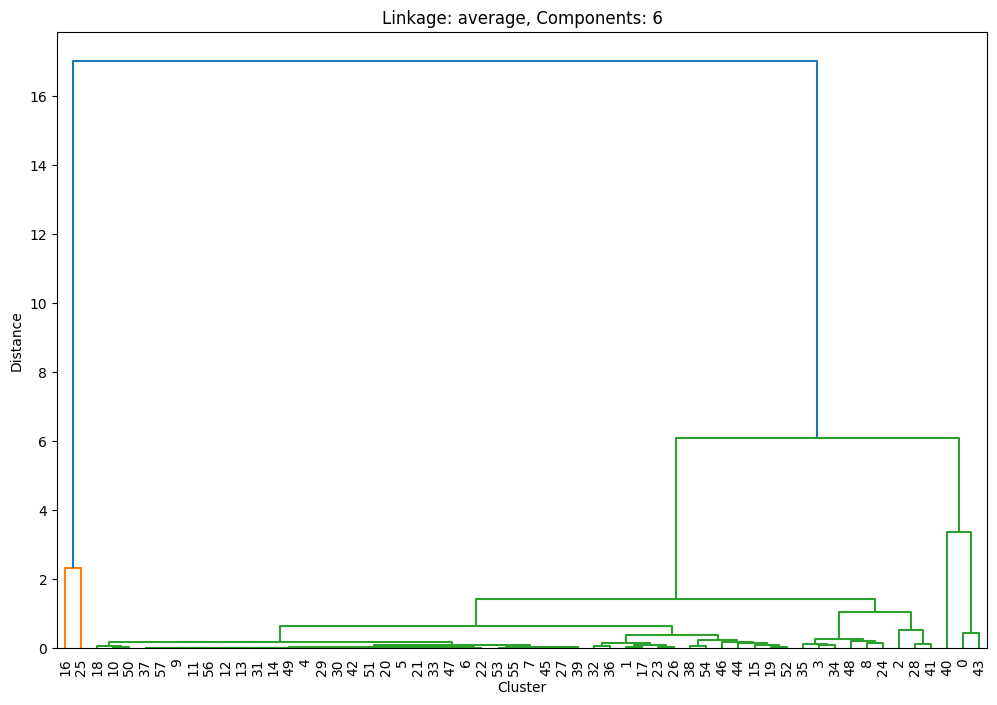

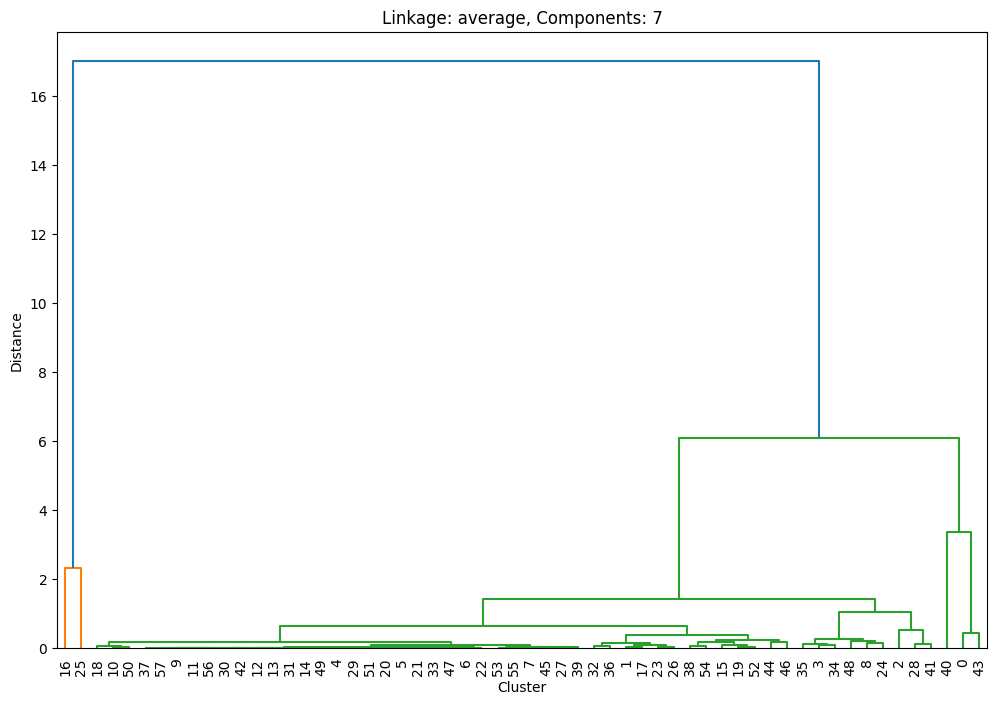

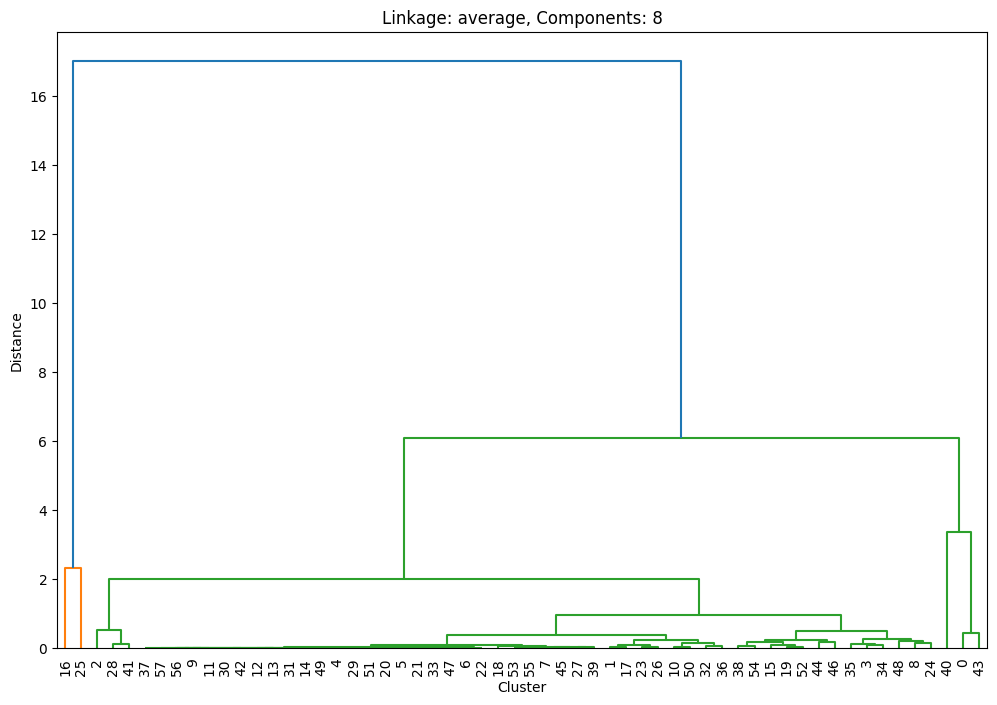

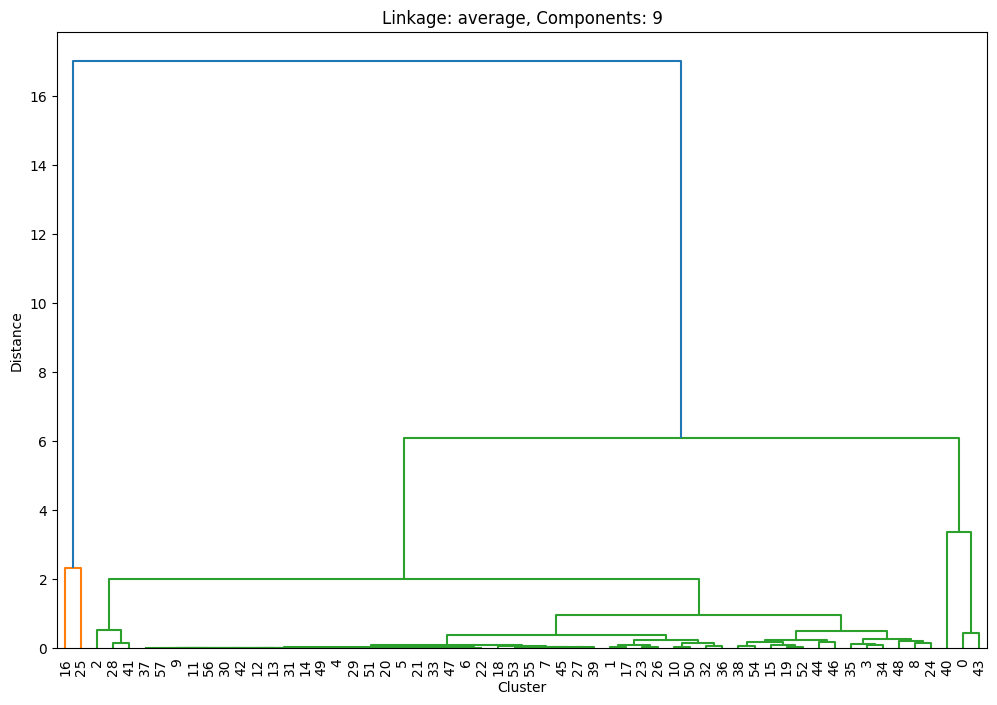

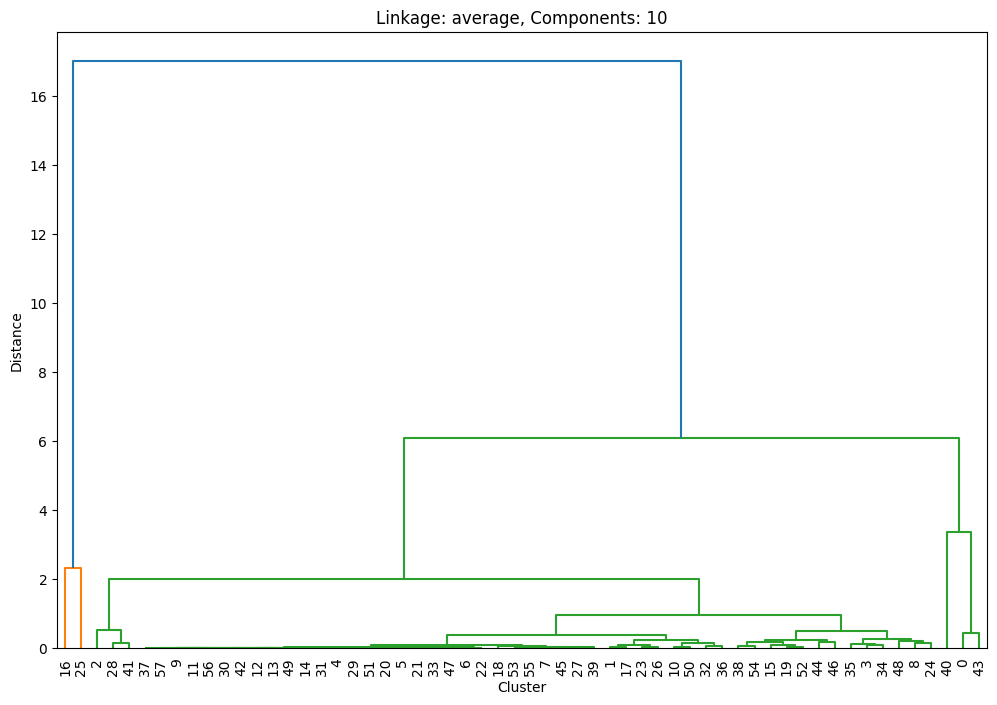

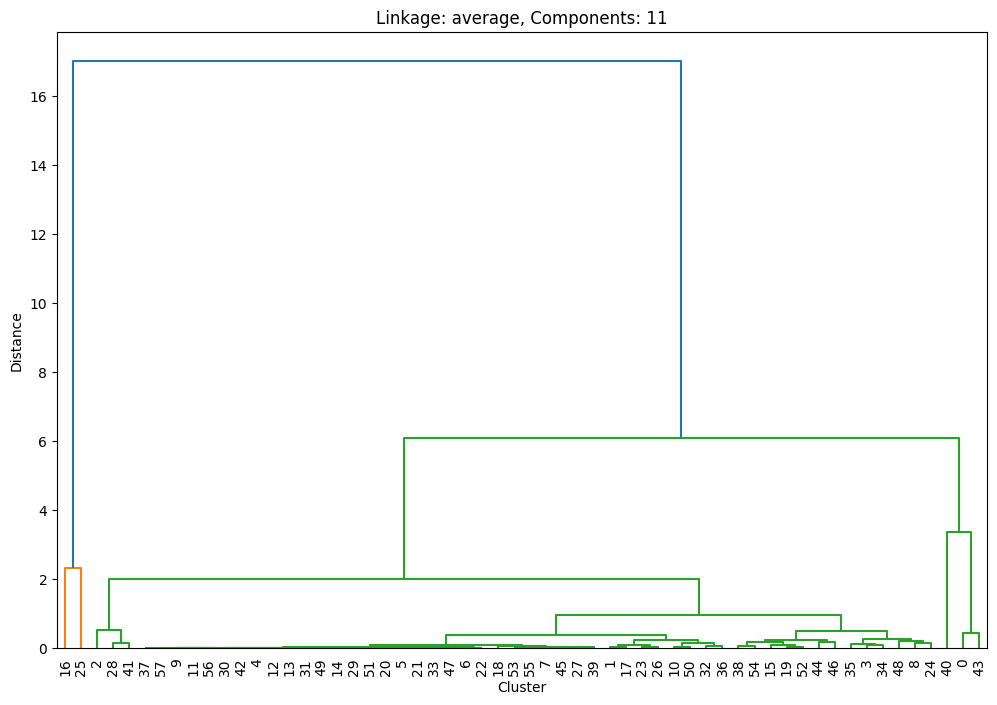

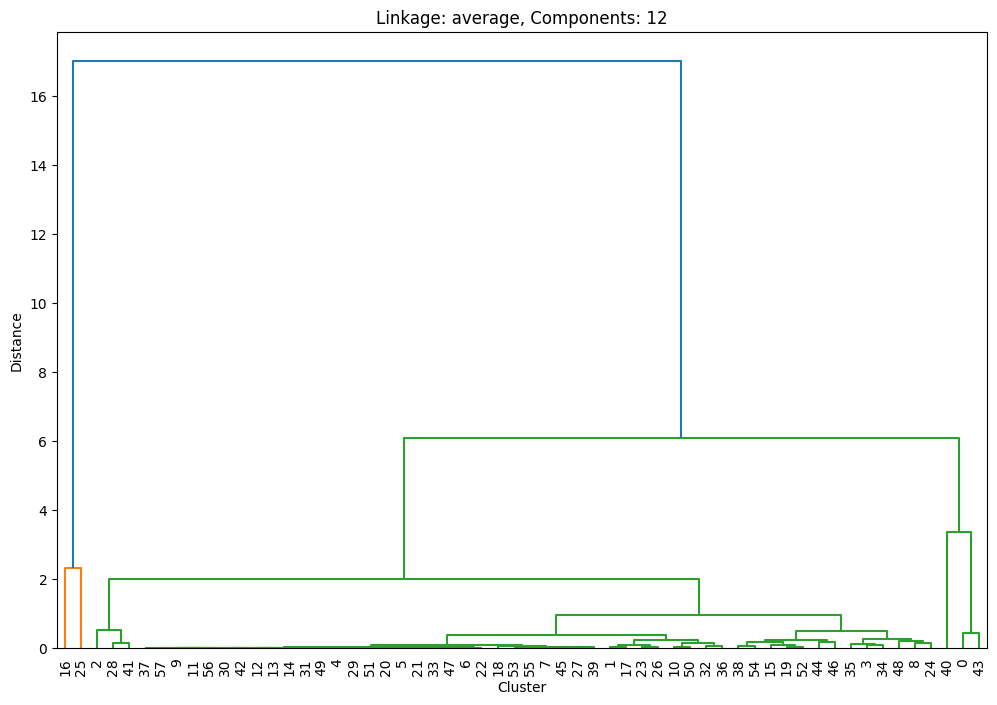

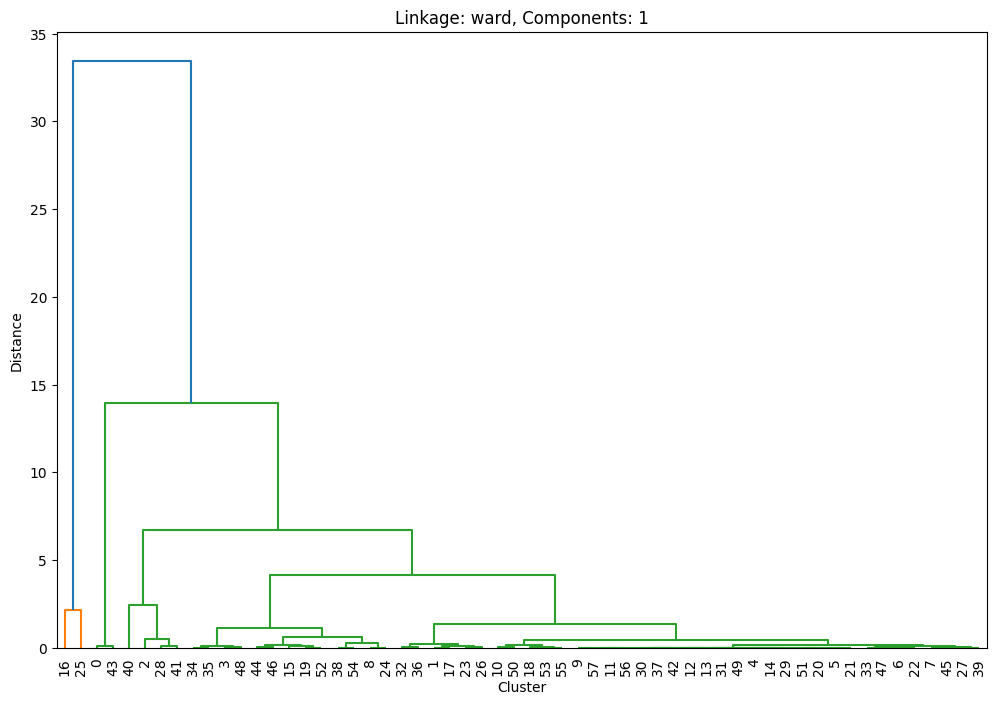

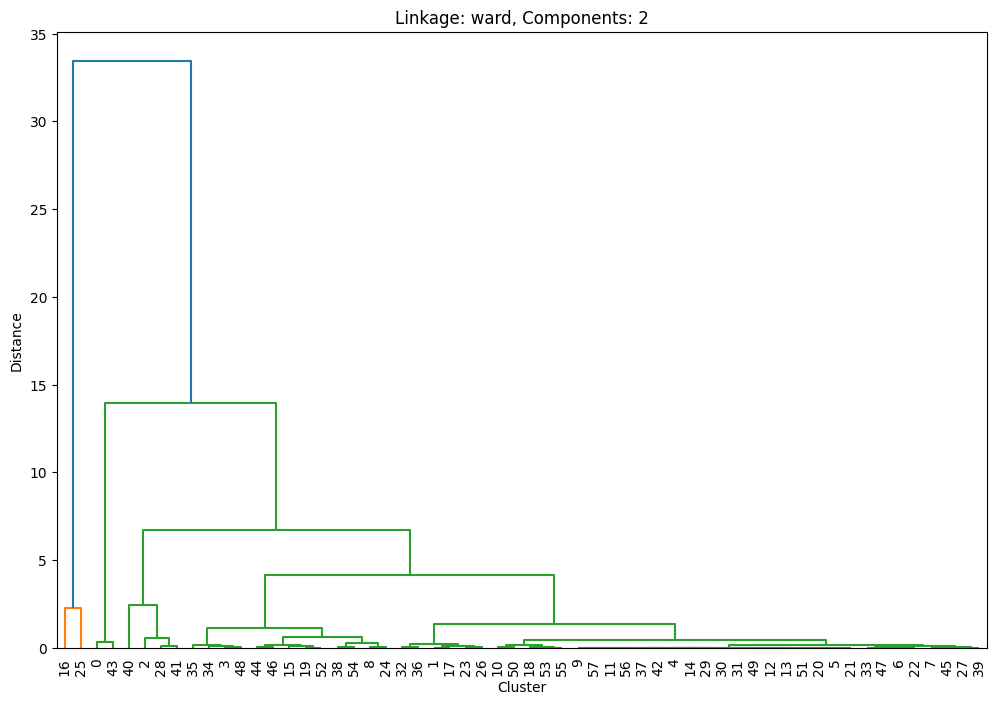

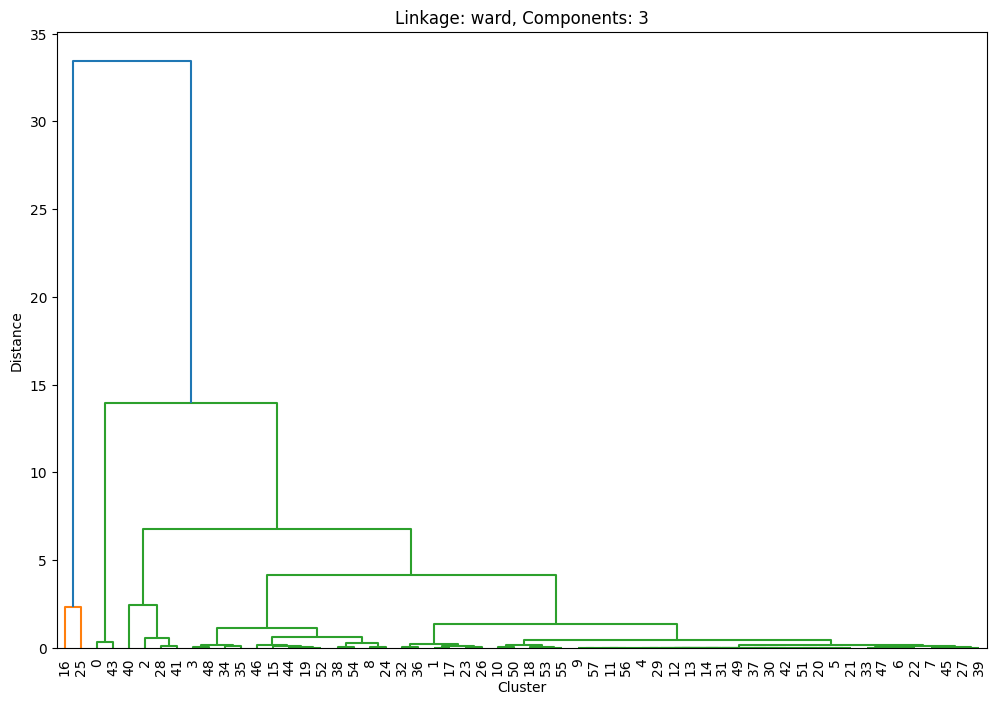

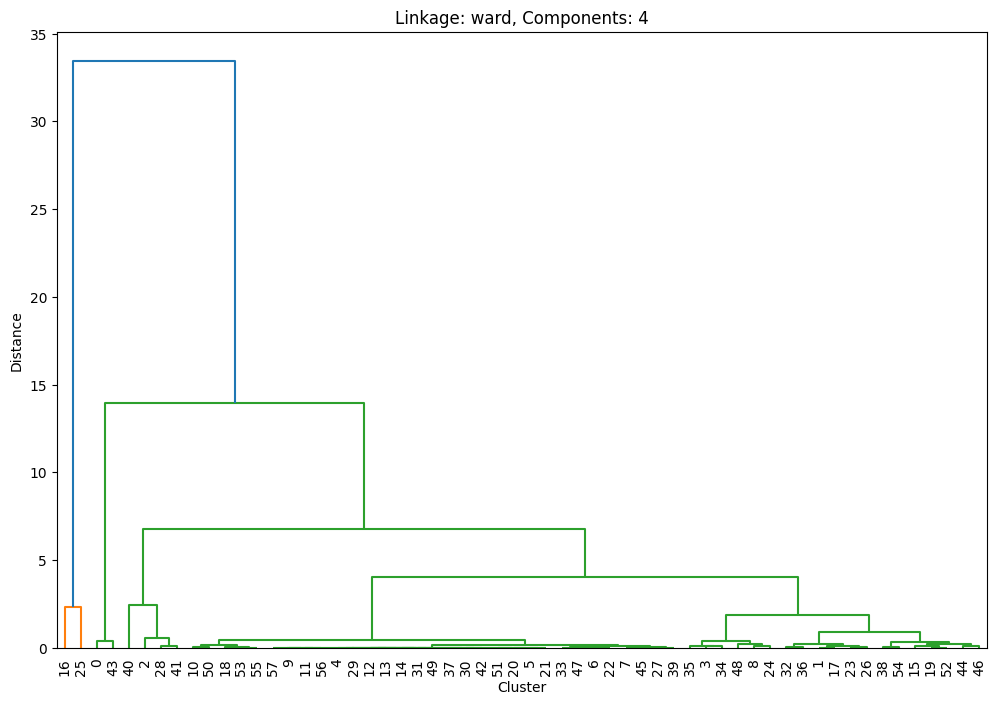

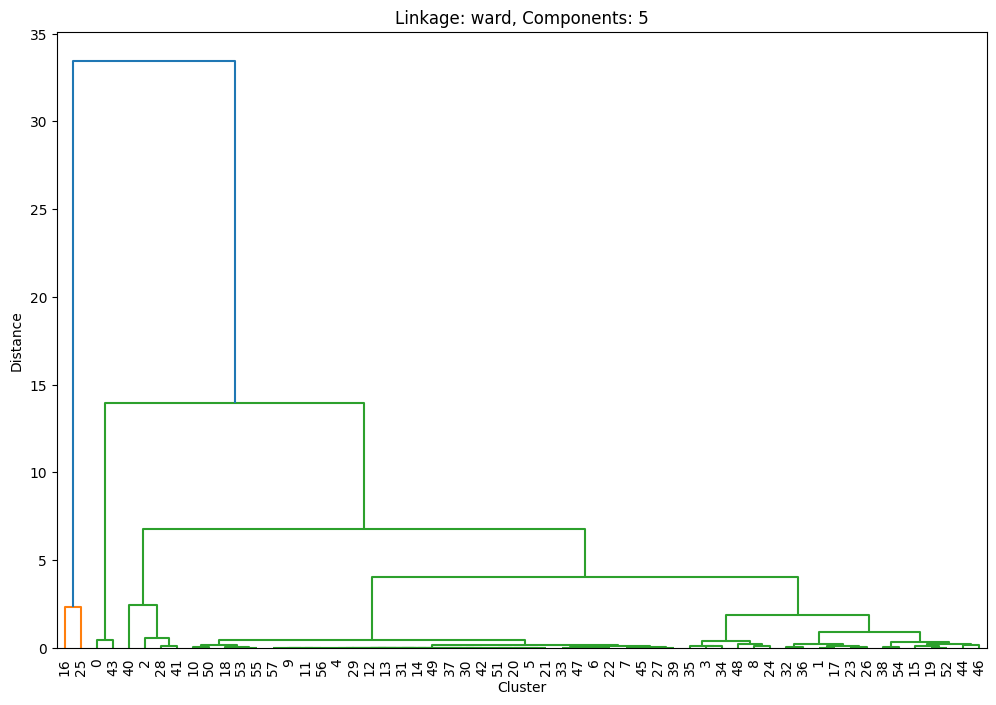

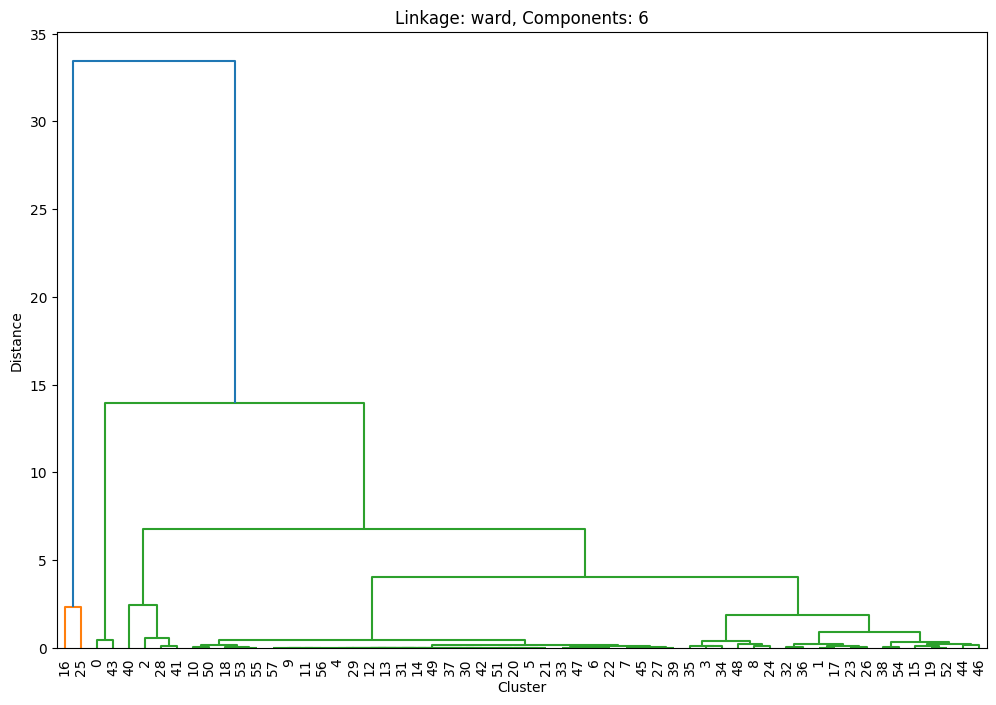

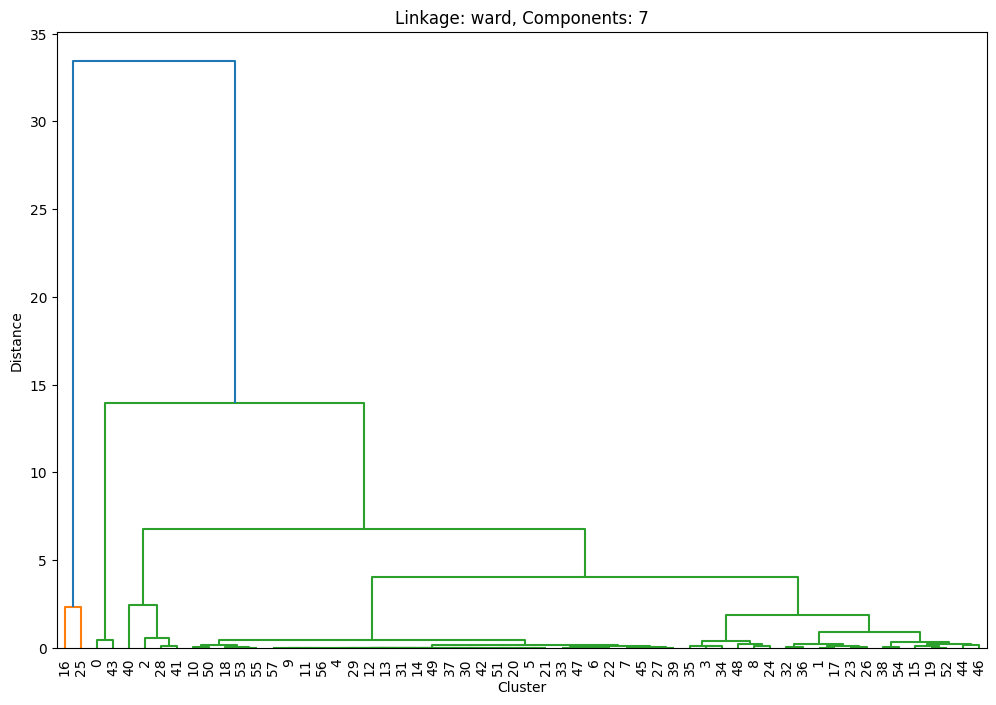

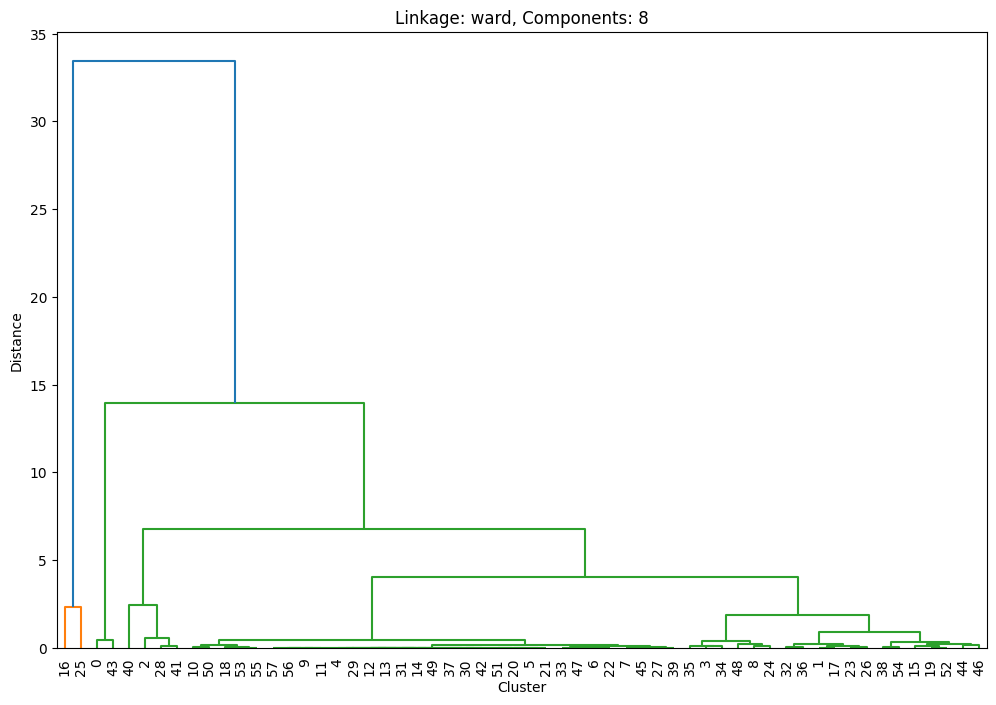

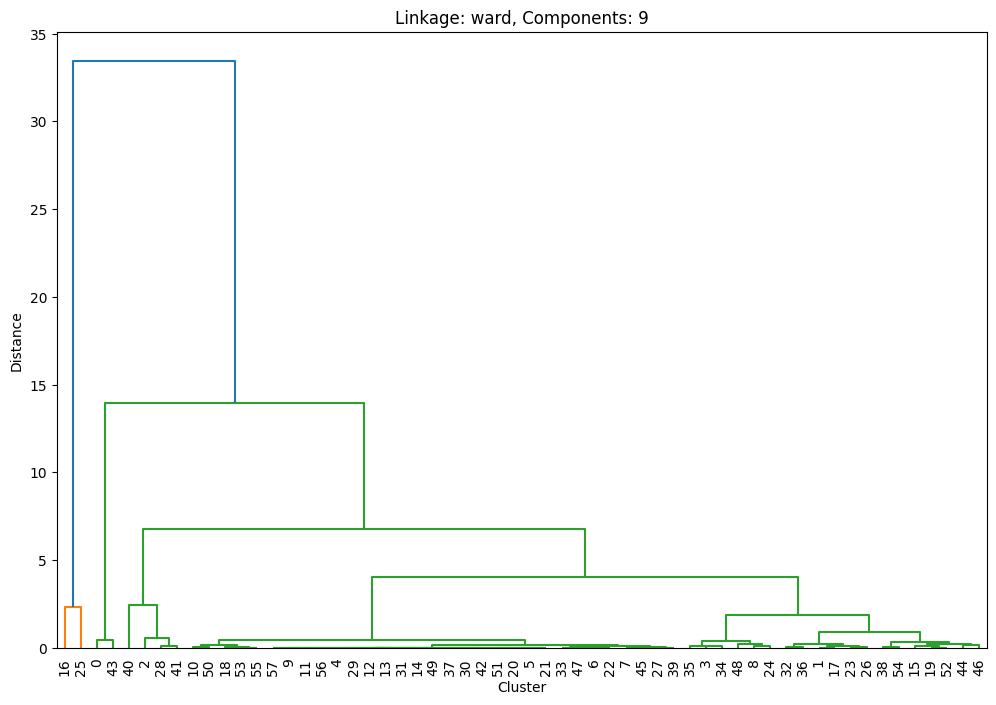

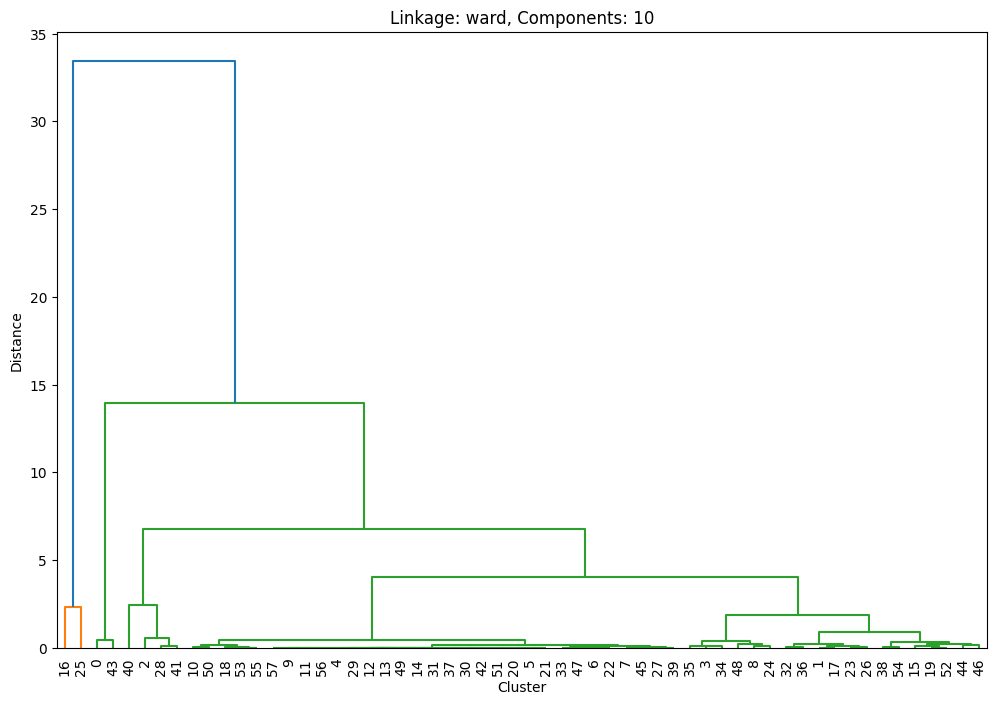

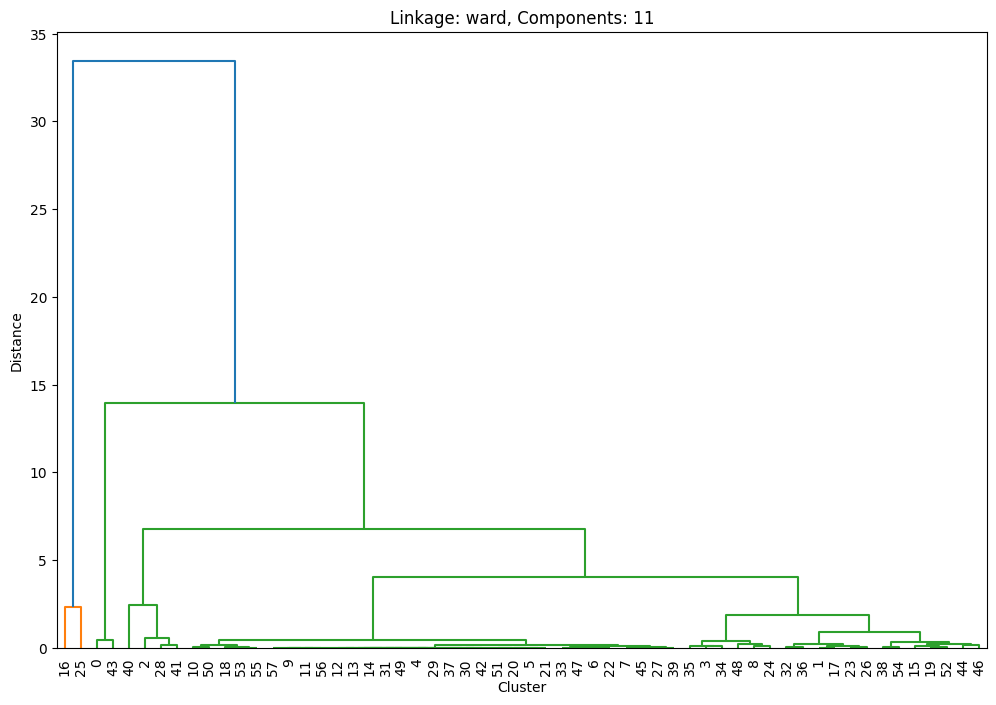

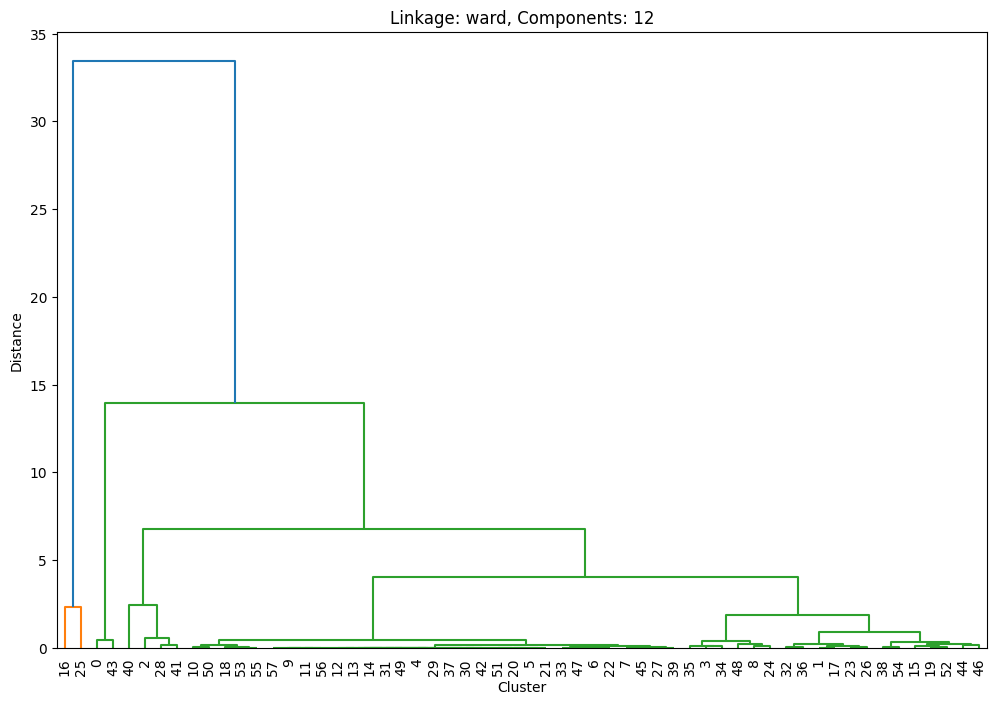

In [40]:
for linkage_type in linkage_methods:
    num_features = norm_genedata.shape[1]
    for n_components in range(1, num_features + 1):
        pca = PCA(n_components=n_components)
        norm_pca = pca.fit_transform(norm_genedata)
        hc = HierarchicalClustering(norm_pca)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'Linkage: {linkage_type}, Components: {n_components}')







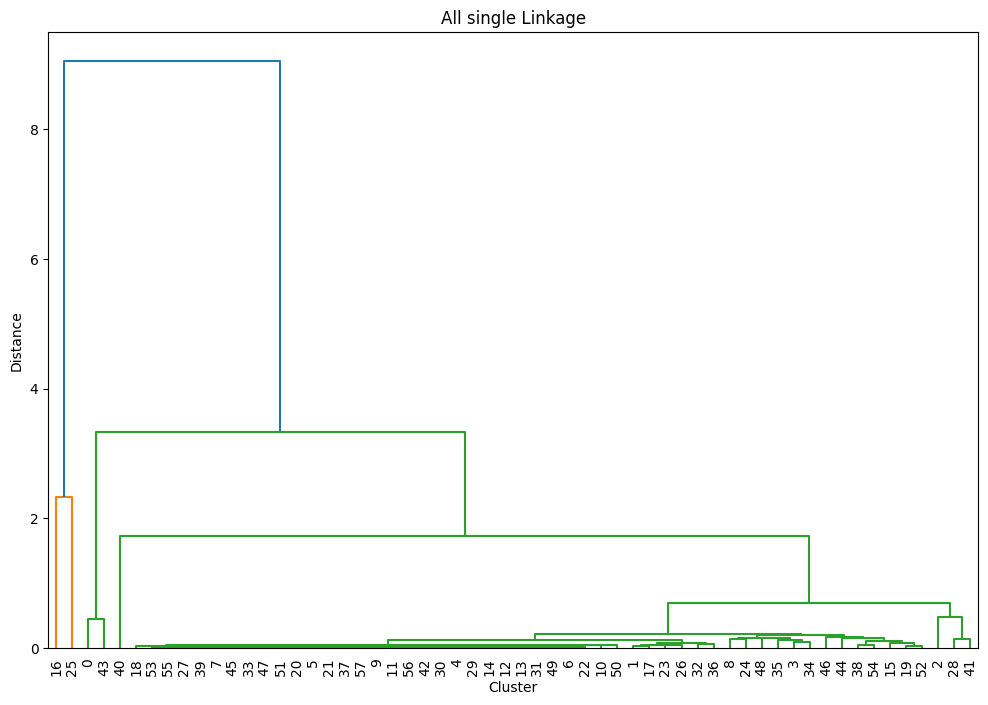

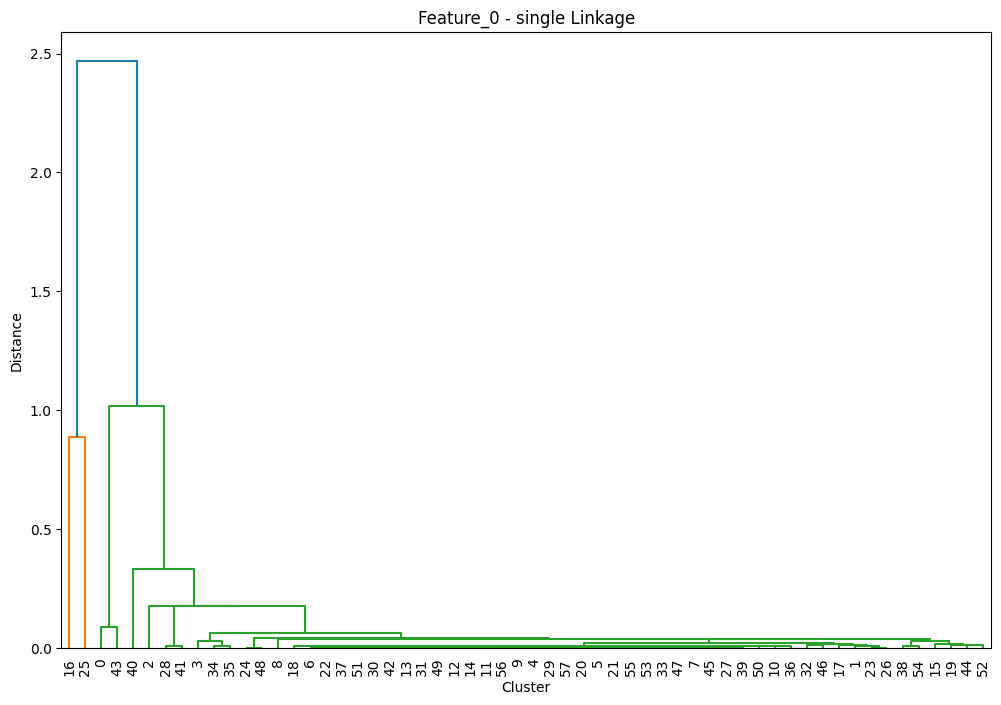

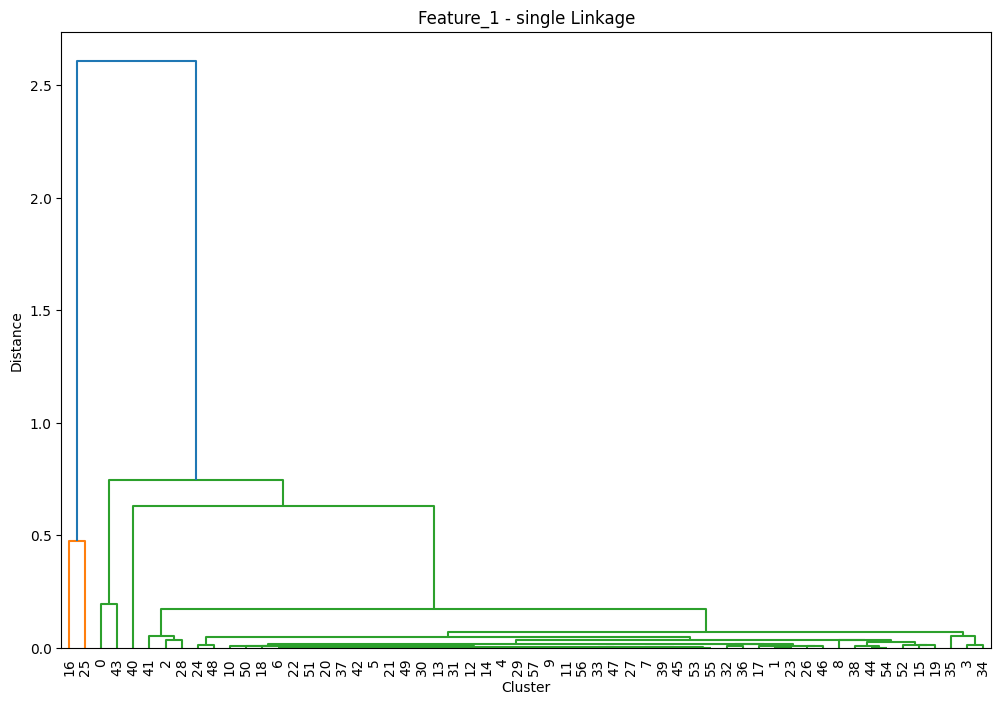

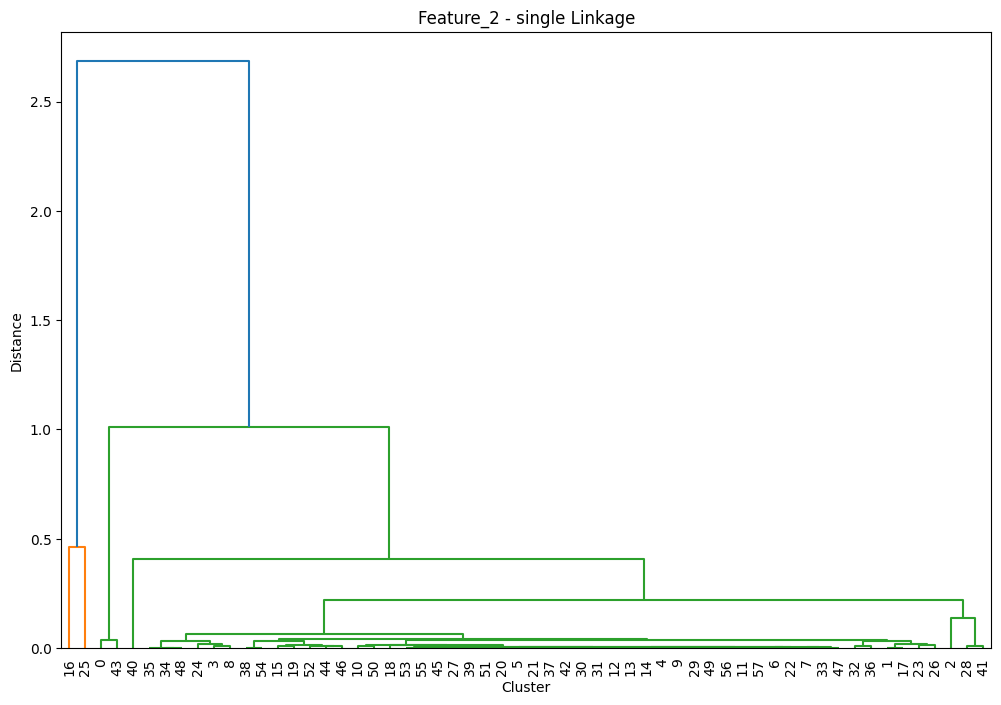

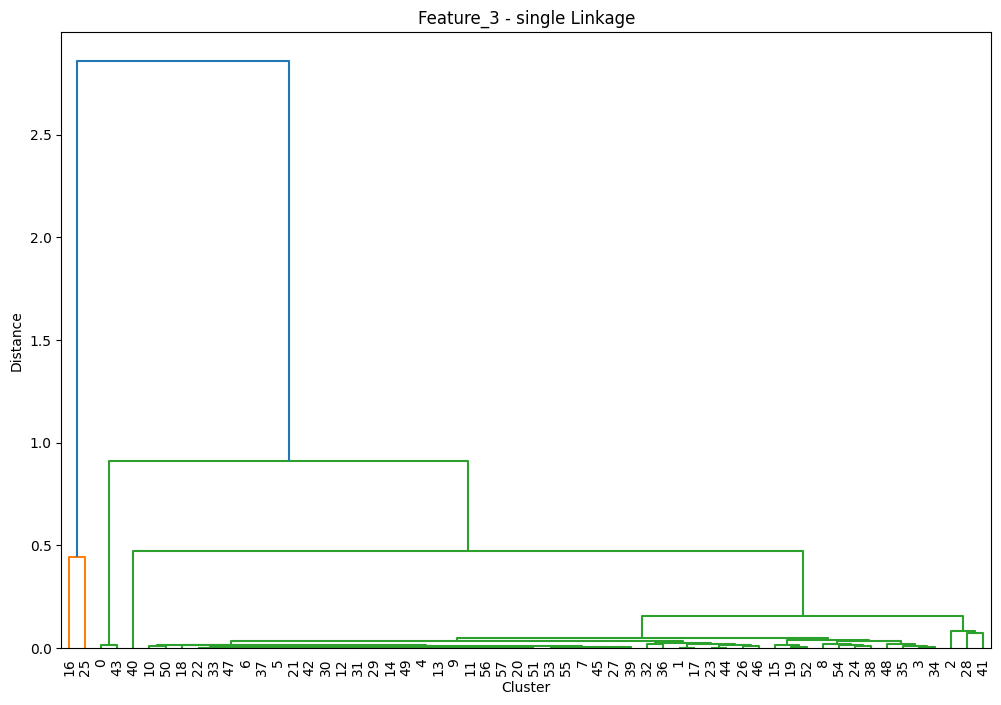

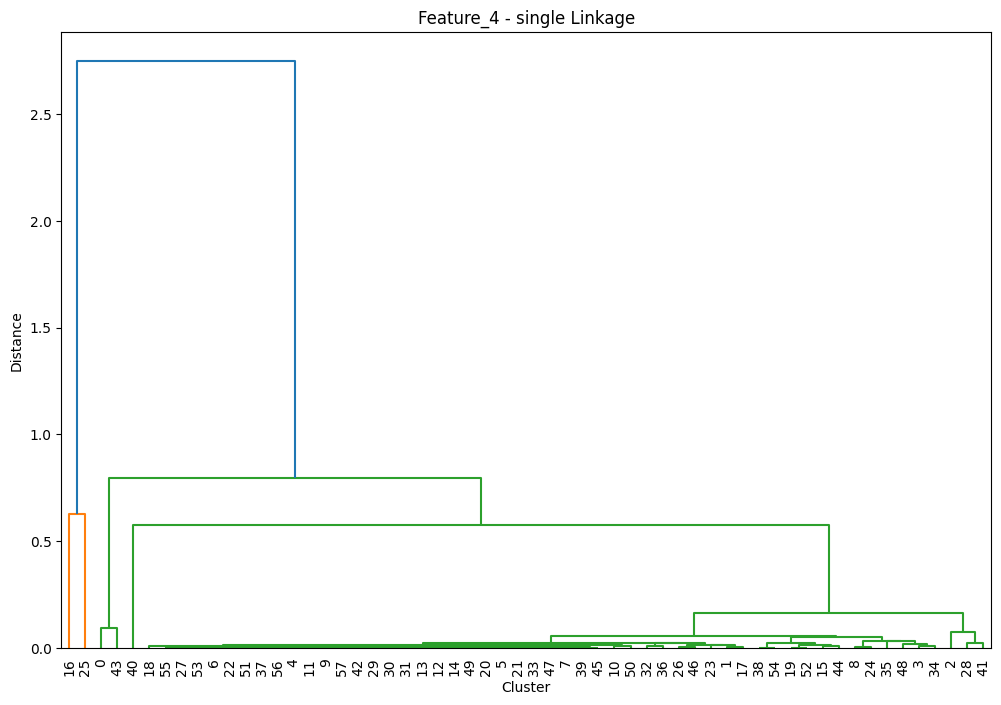

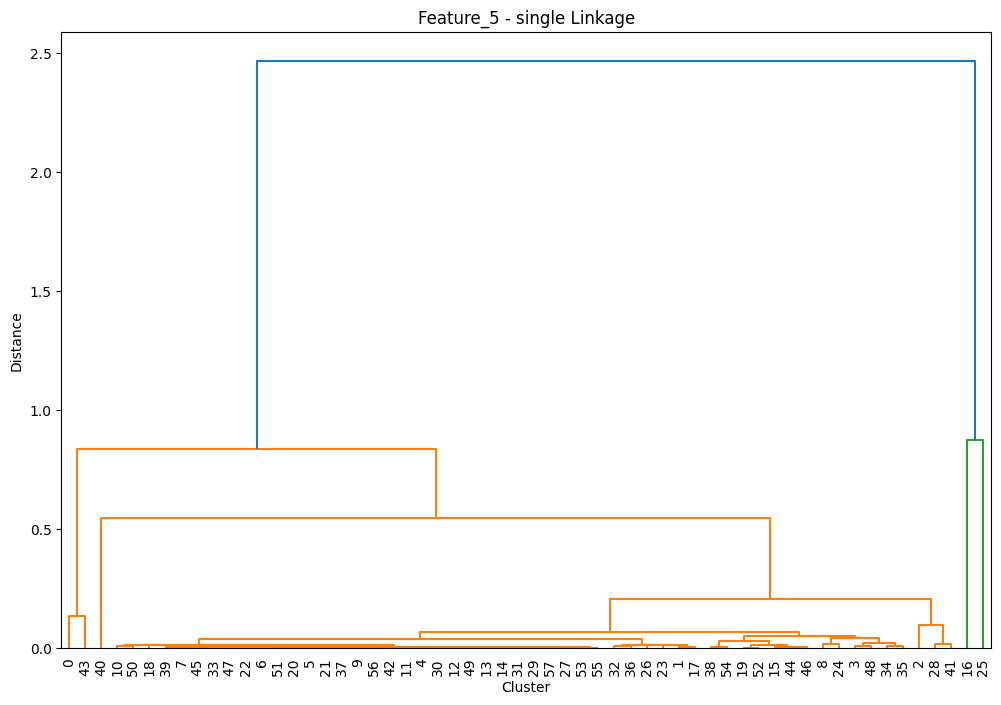

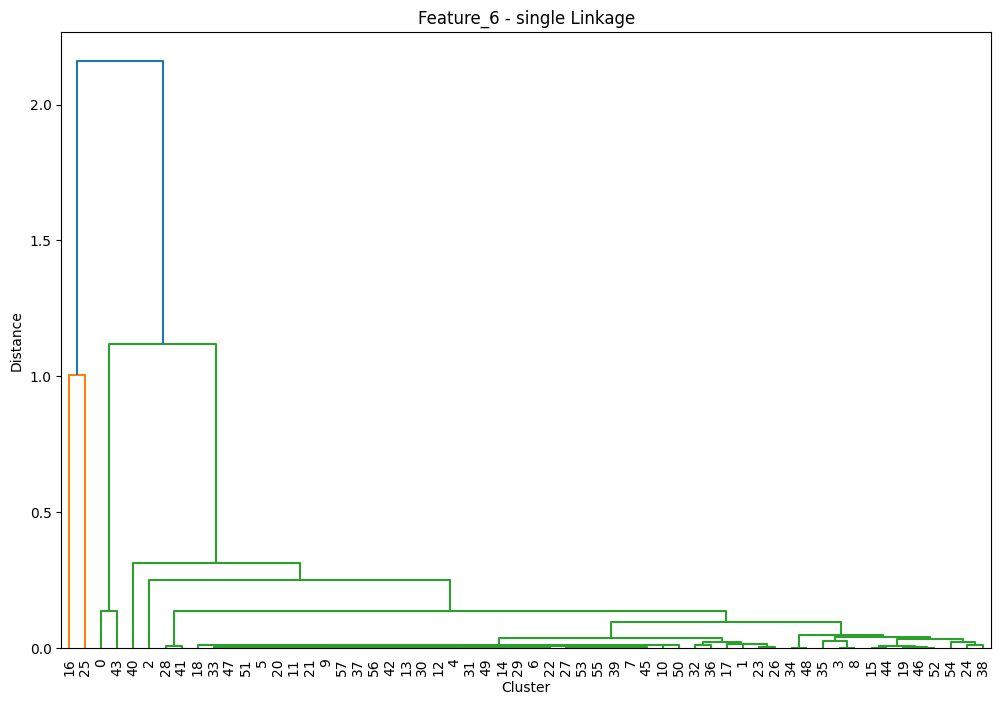

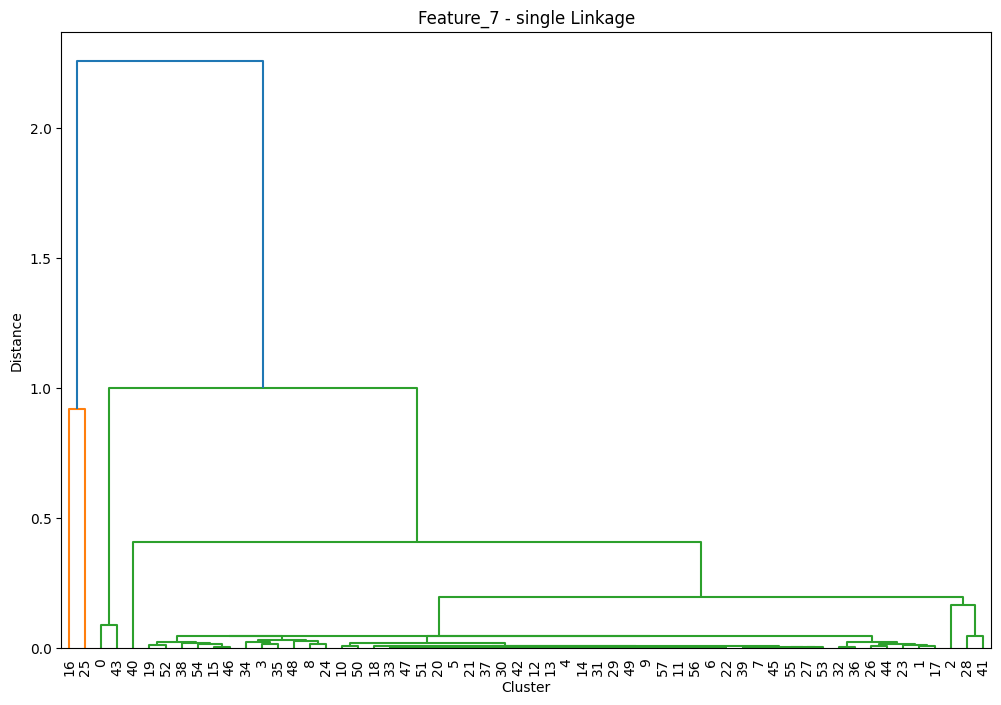

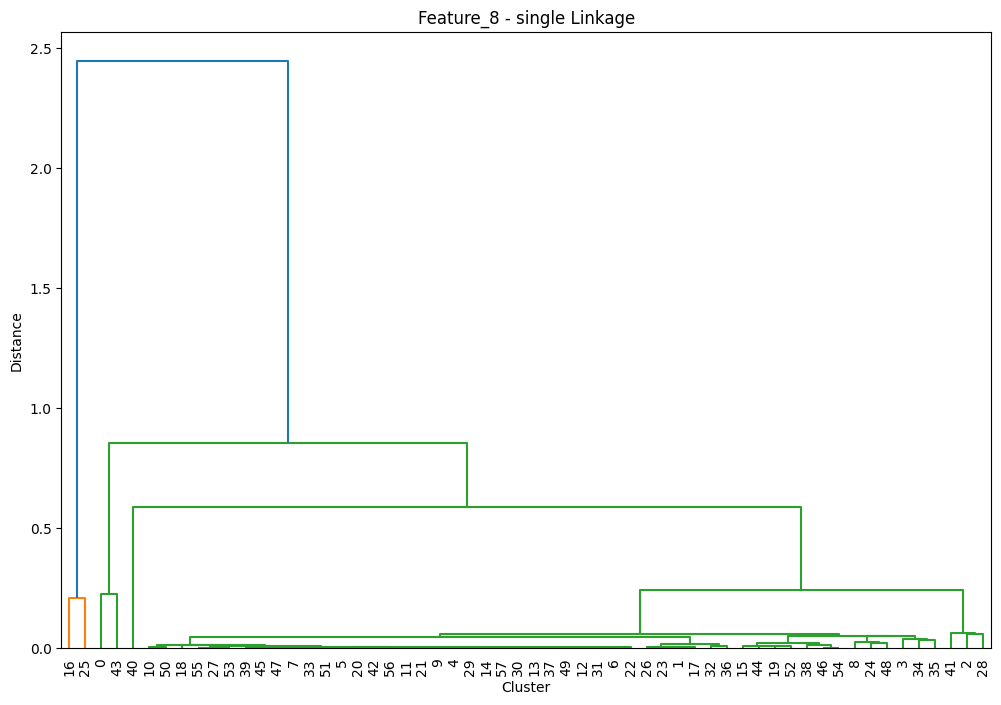

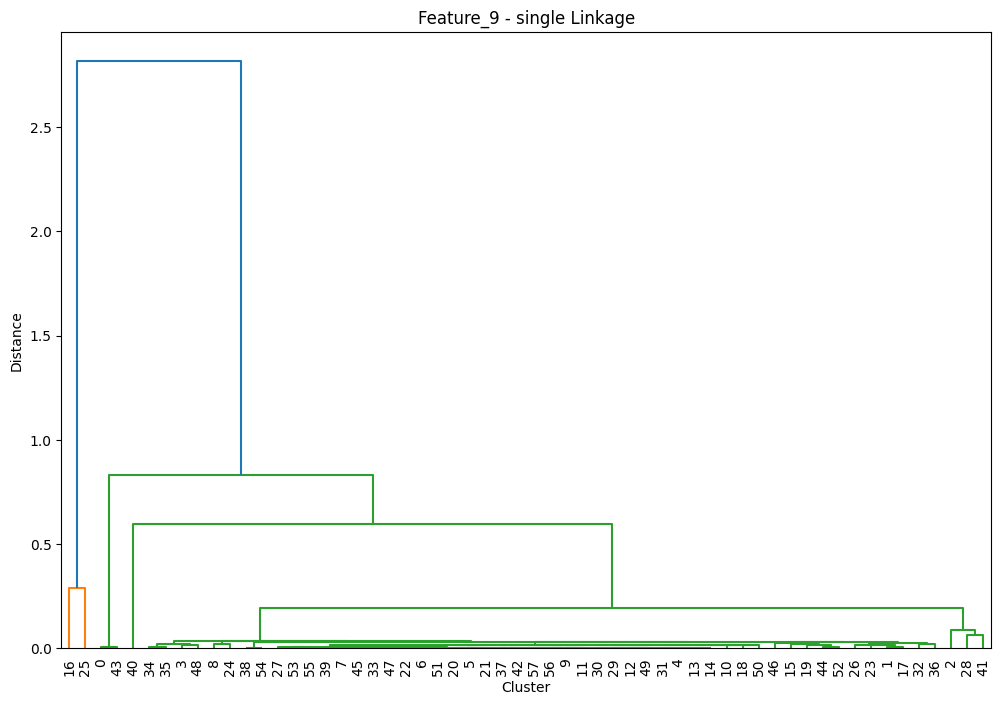

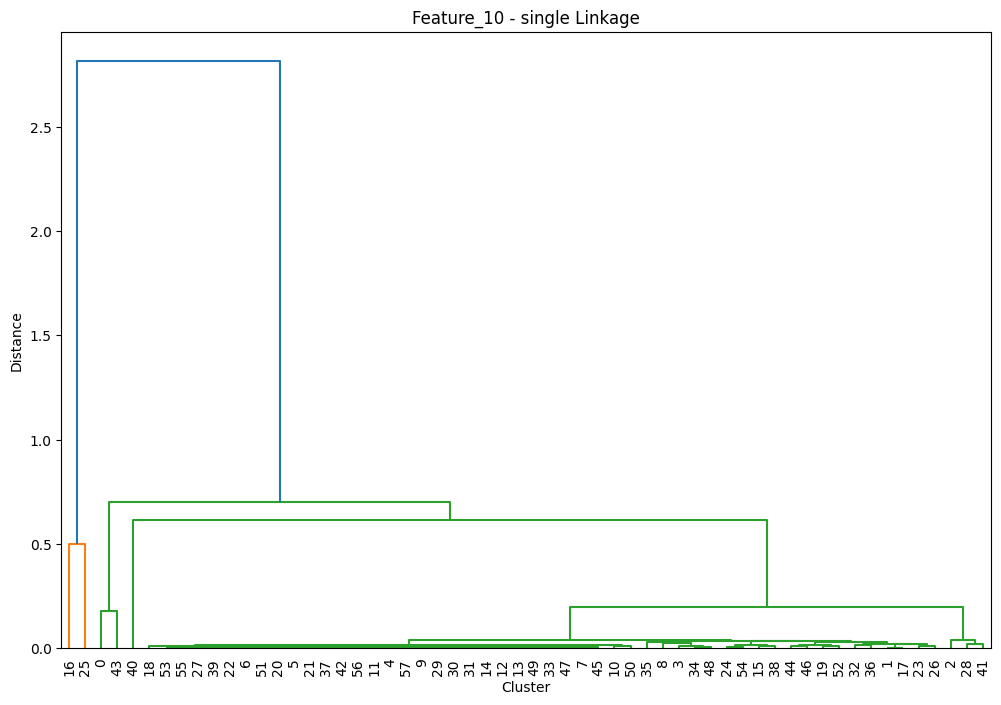

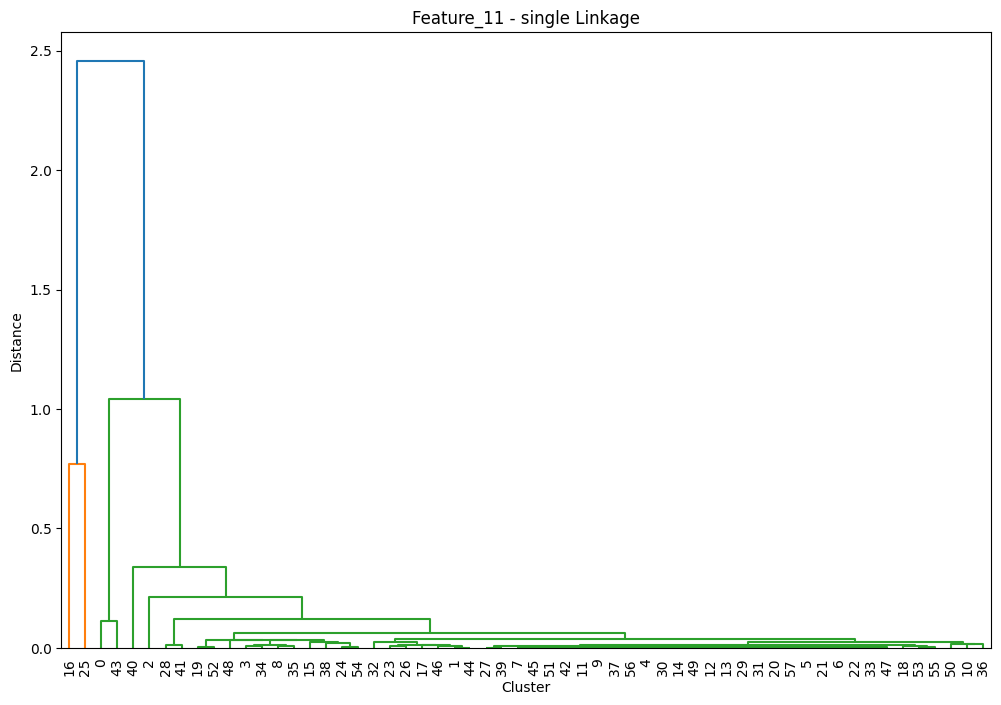

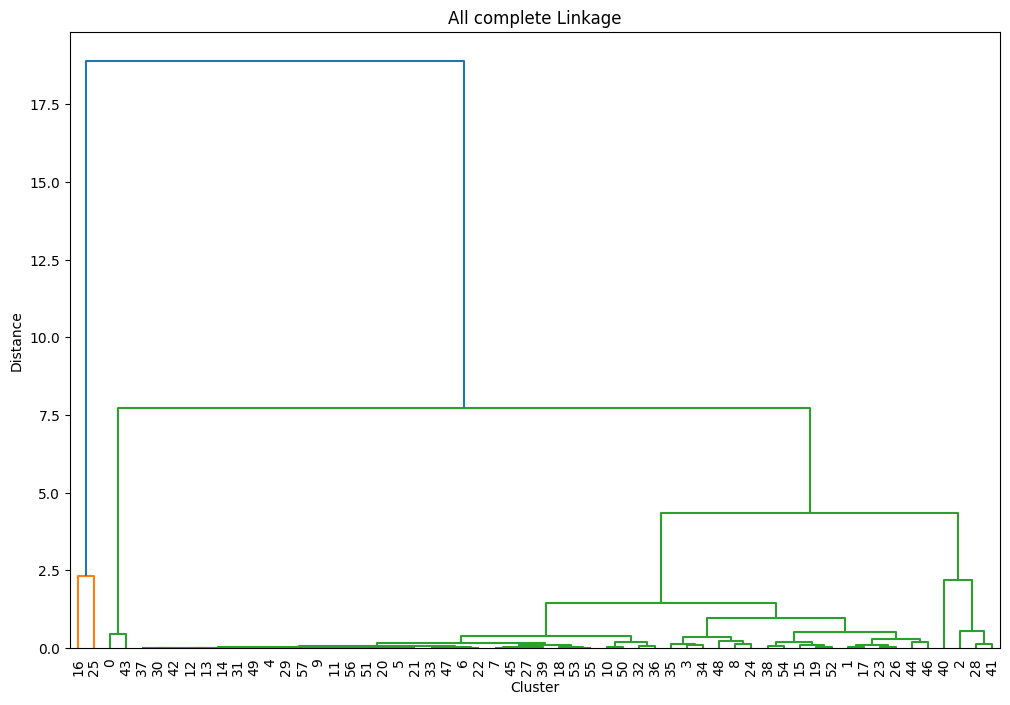

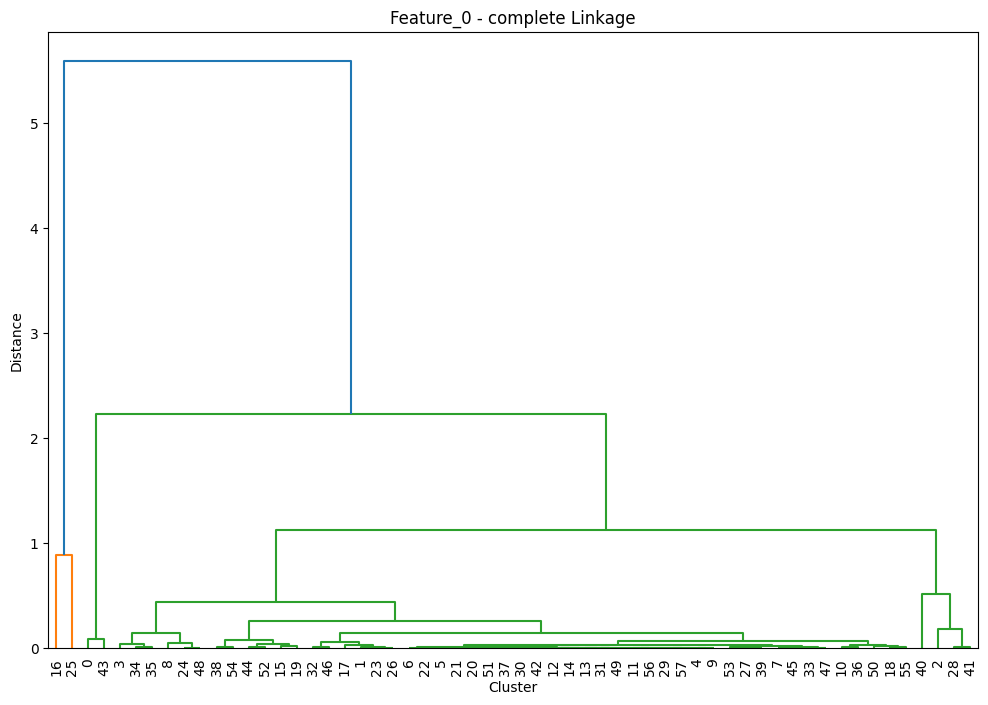

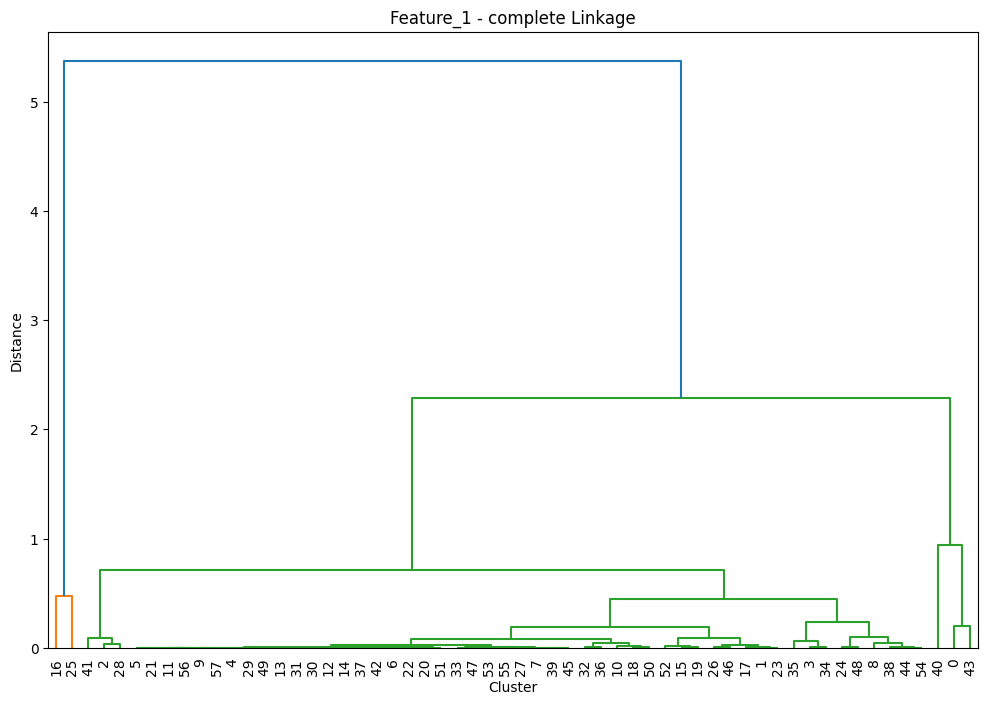

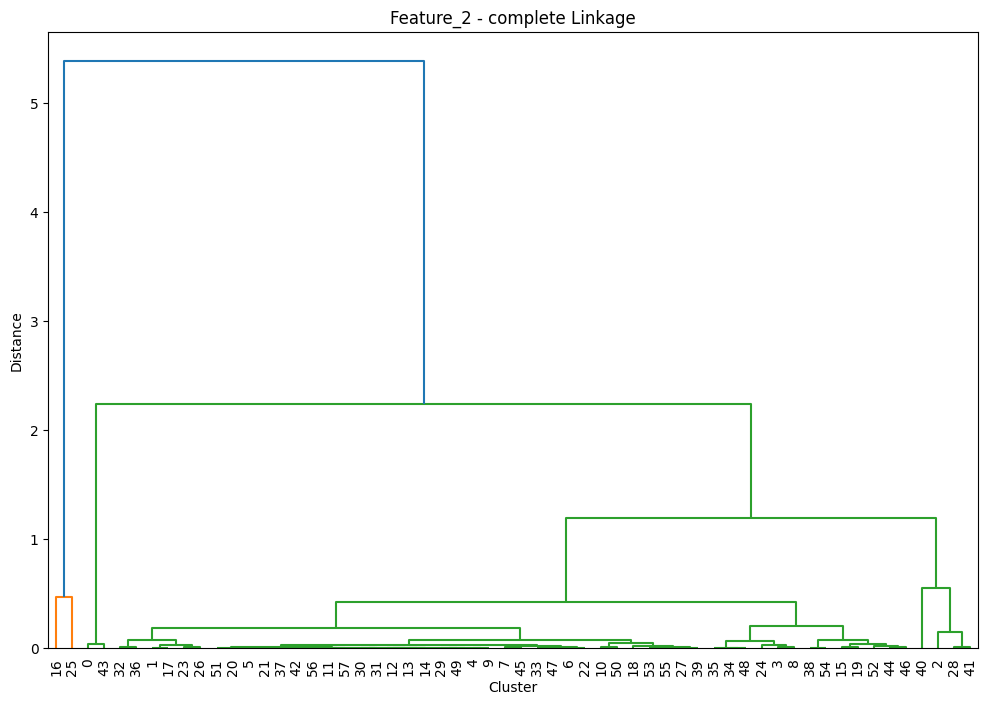

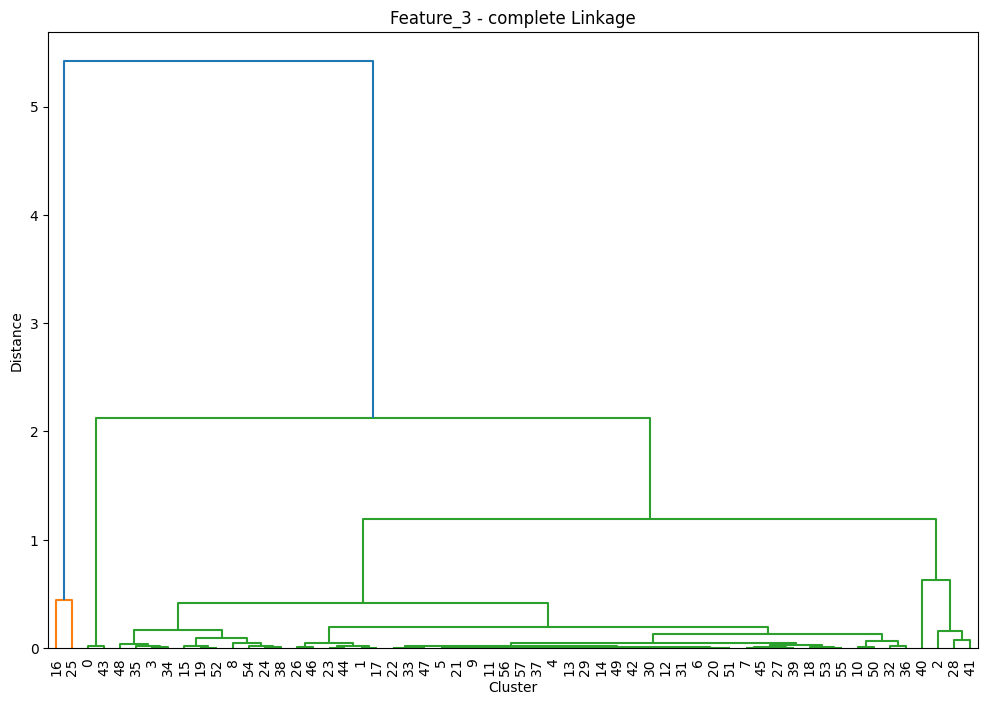

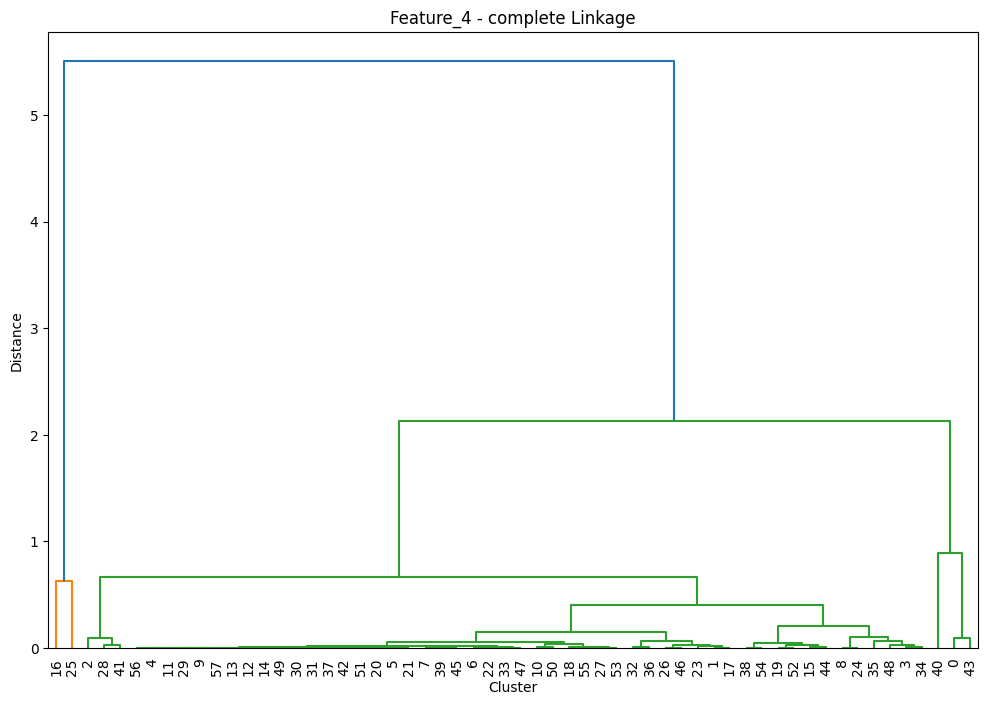

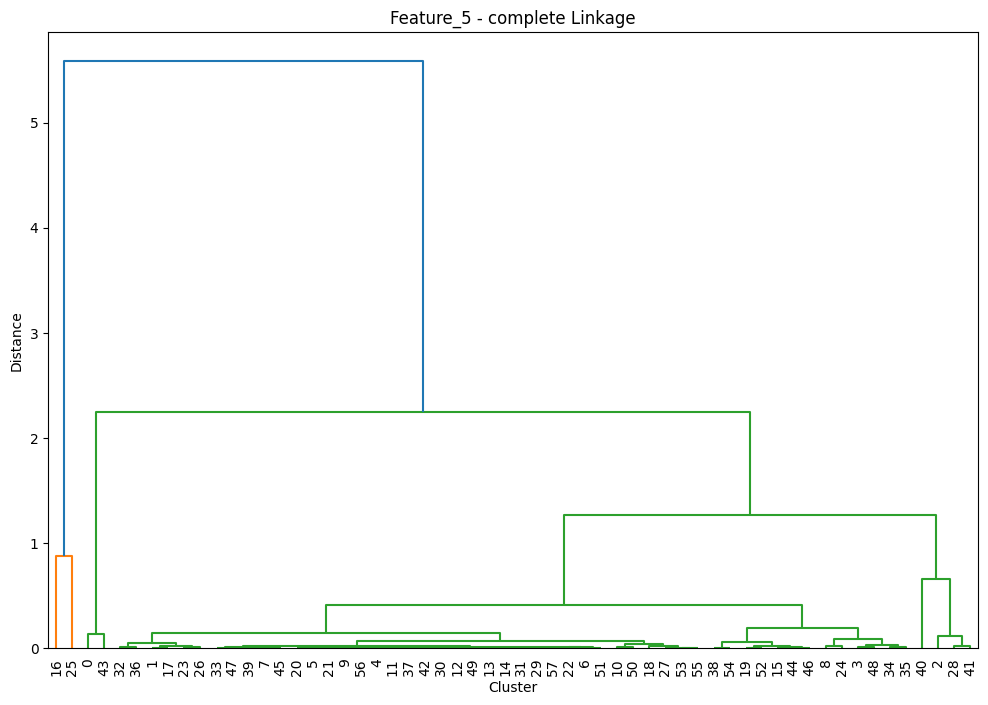

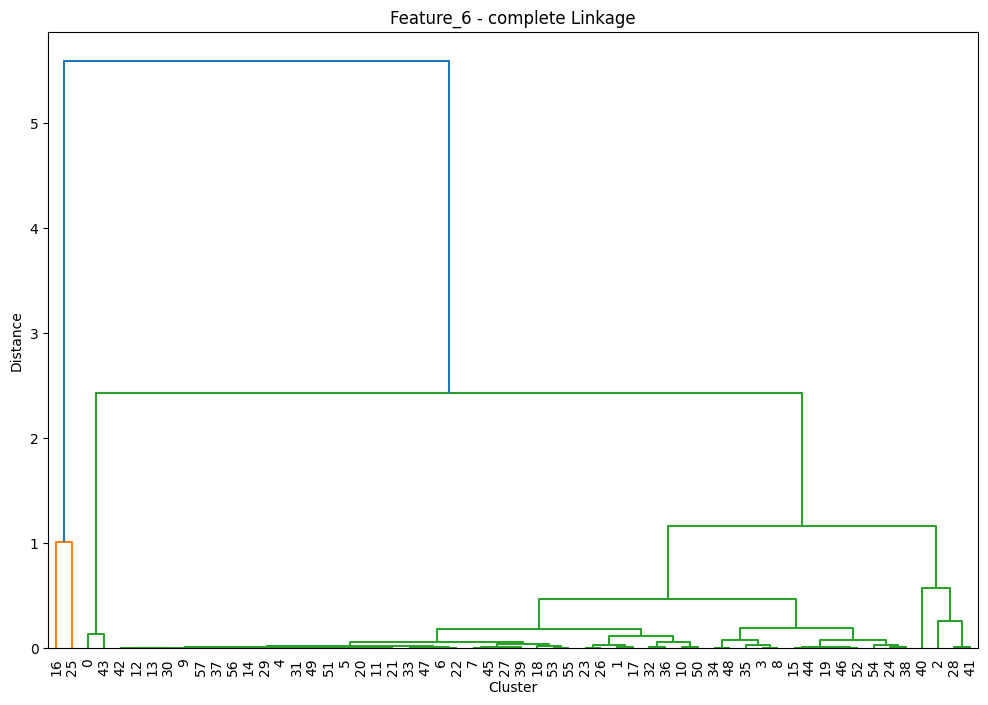

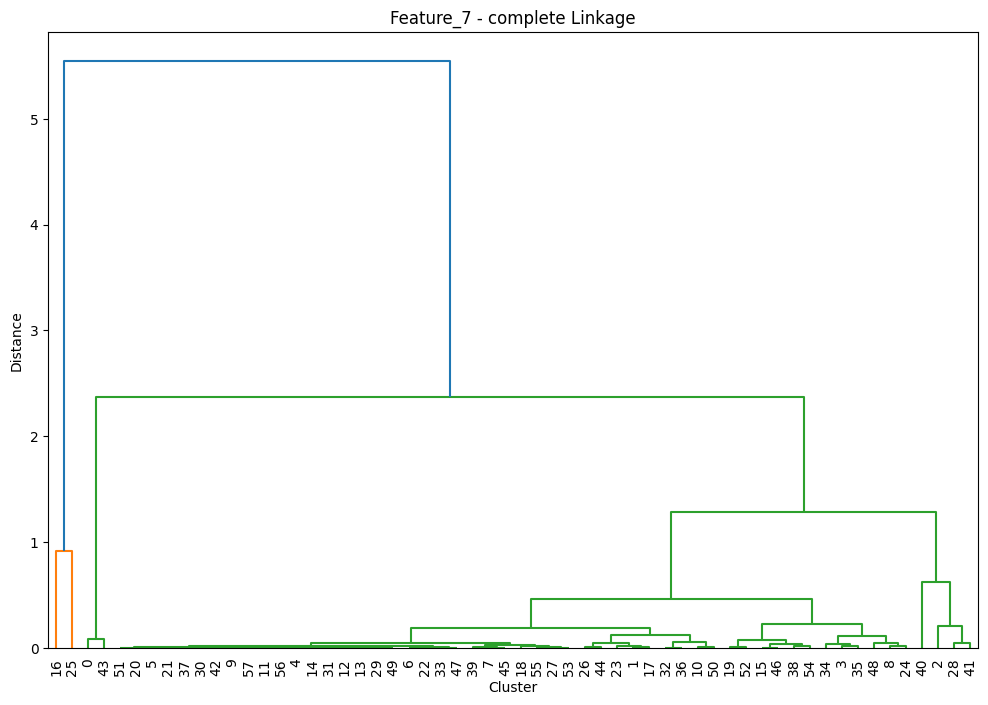

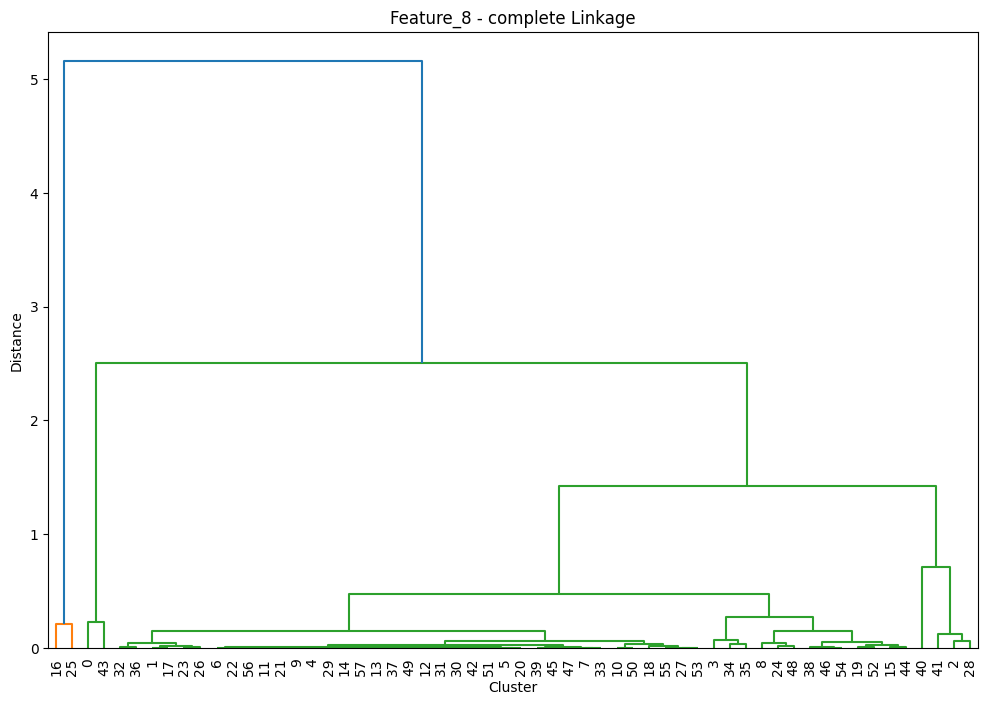

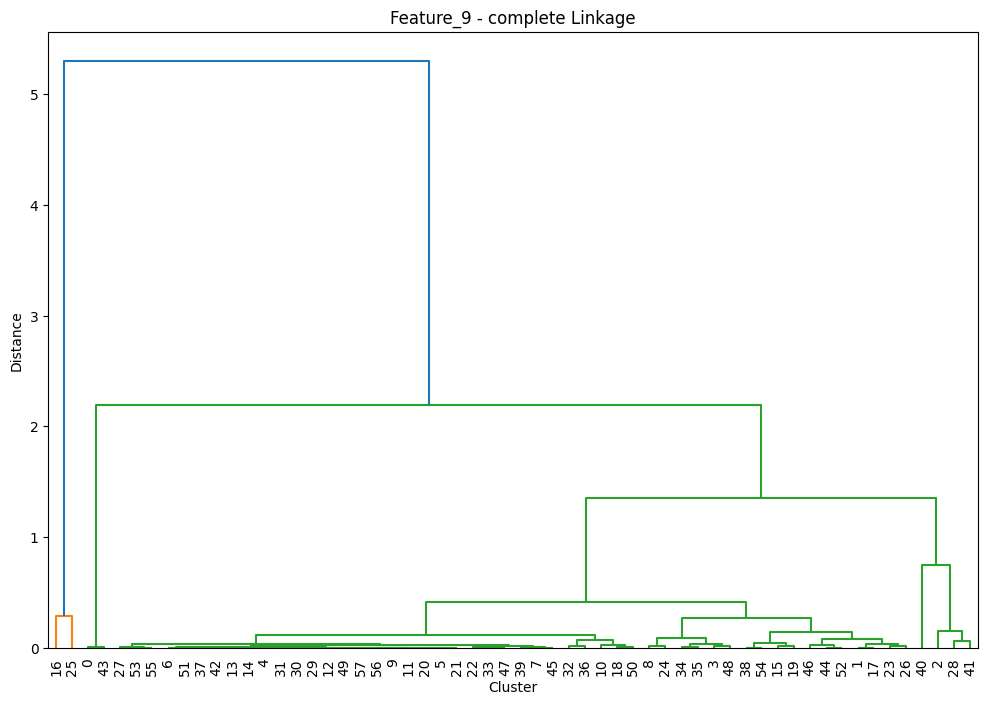

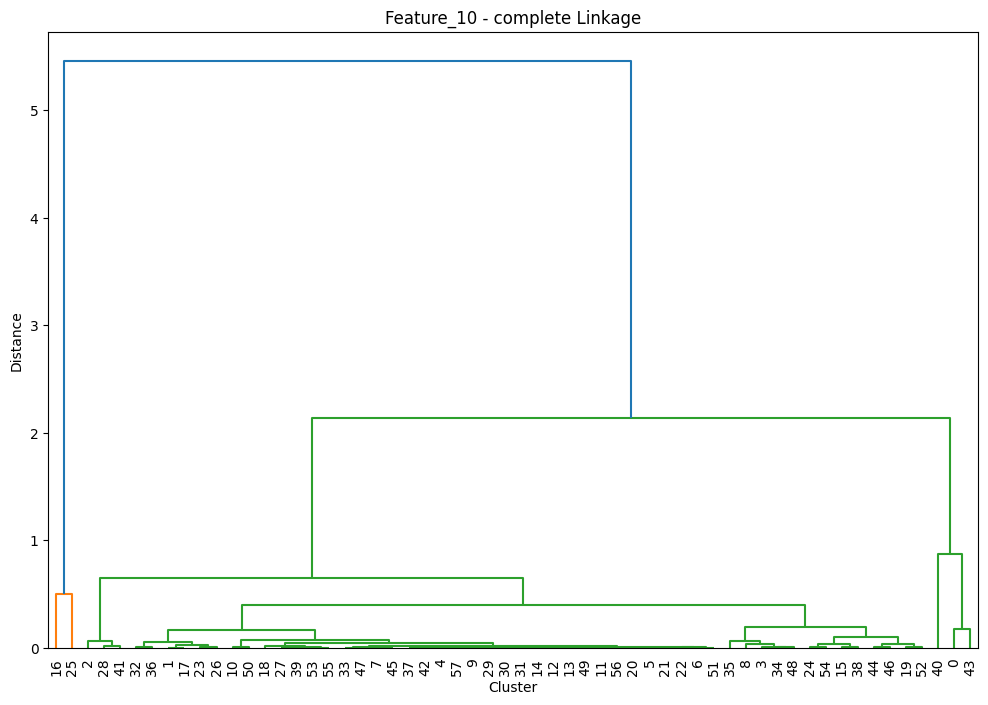

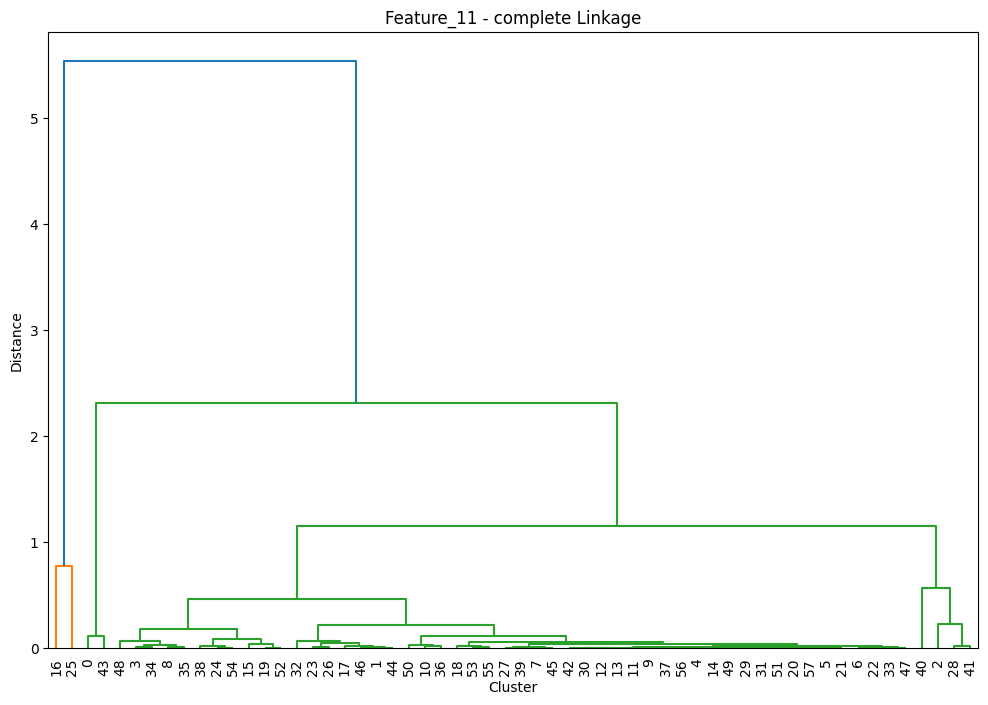

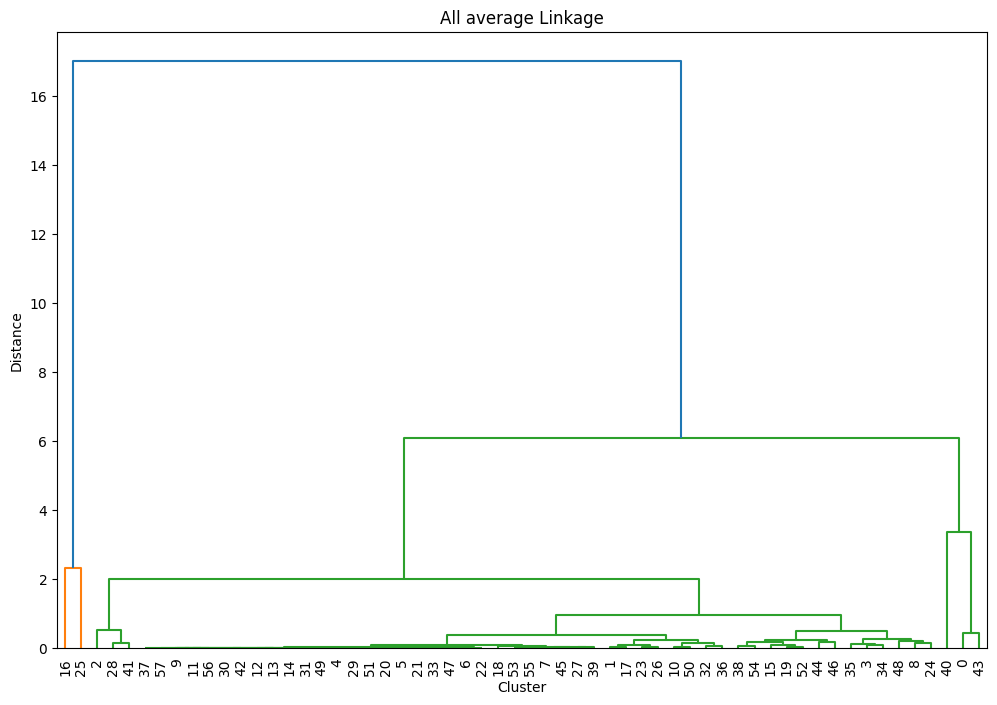

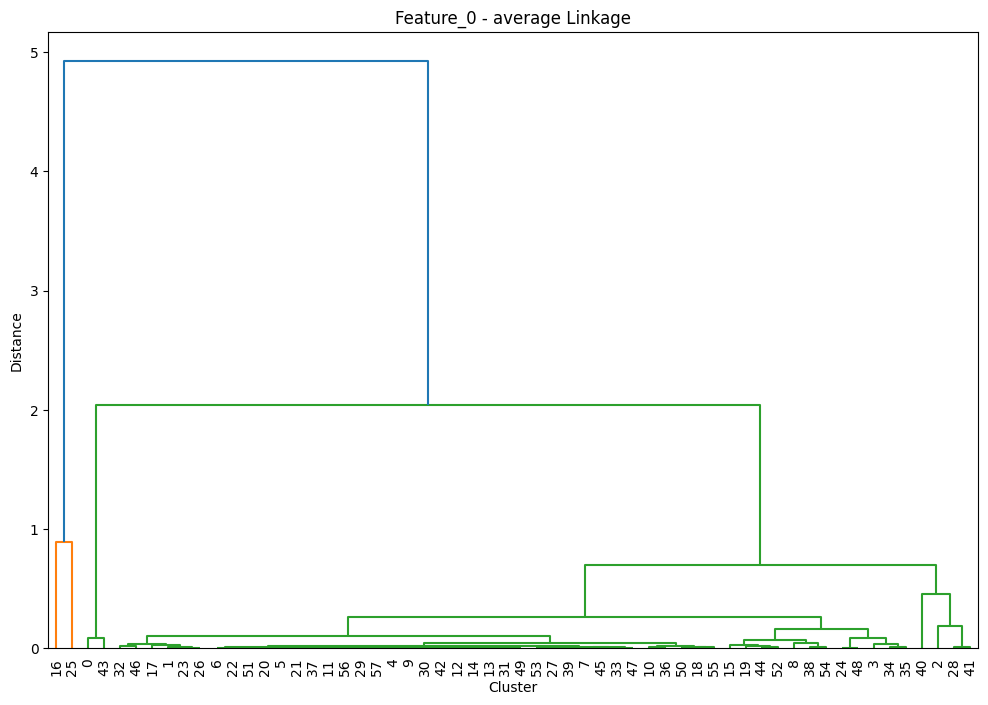

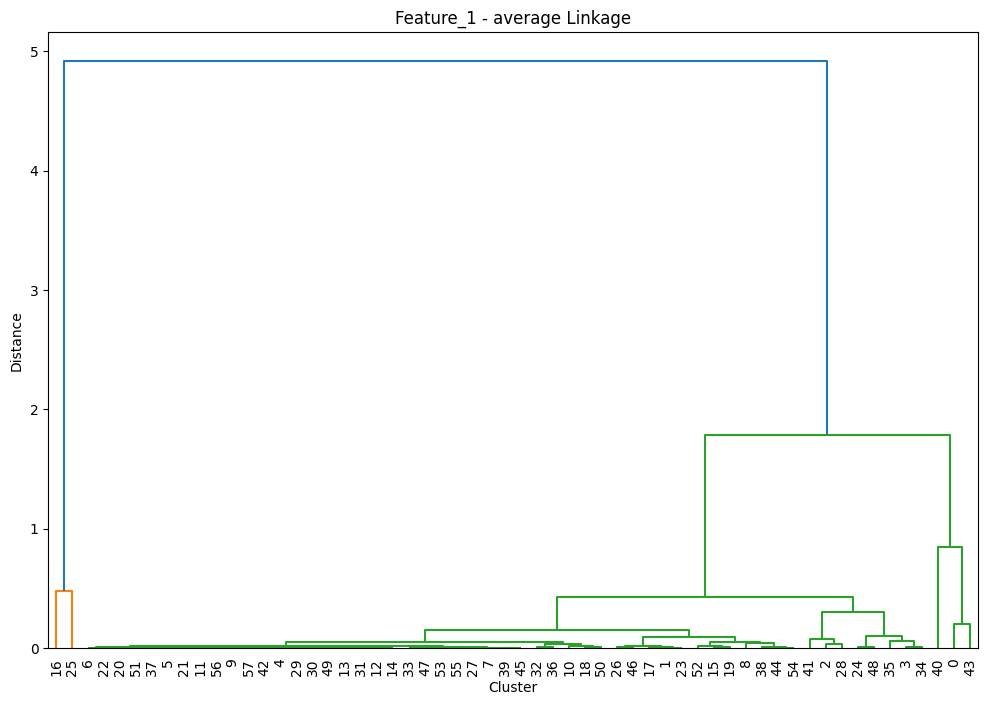

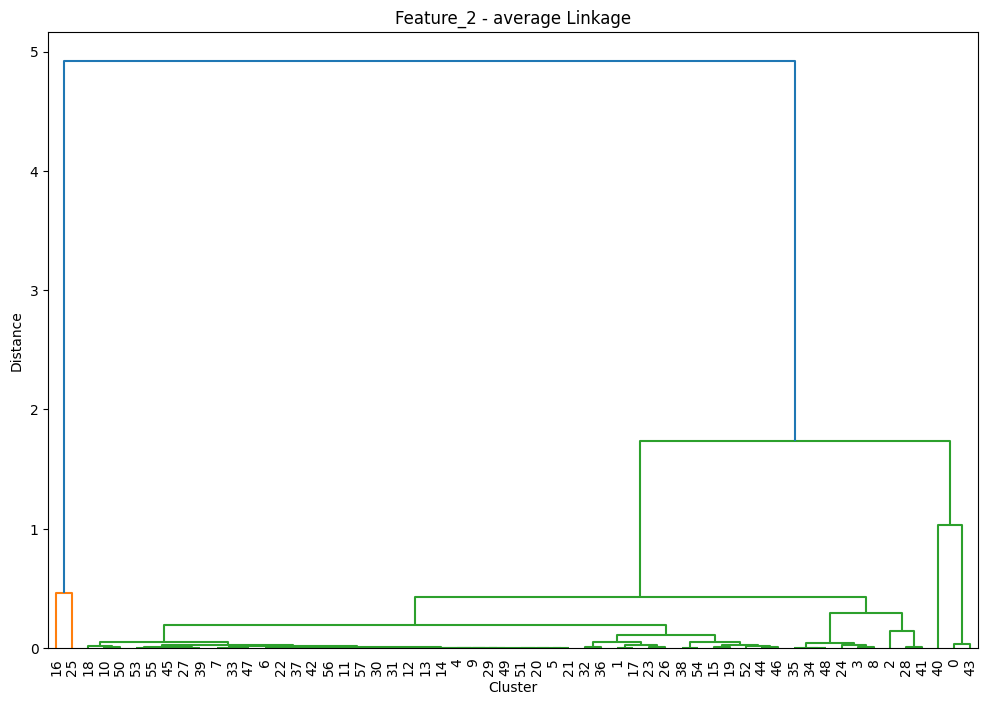

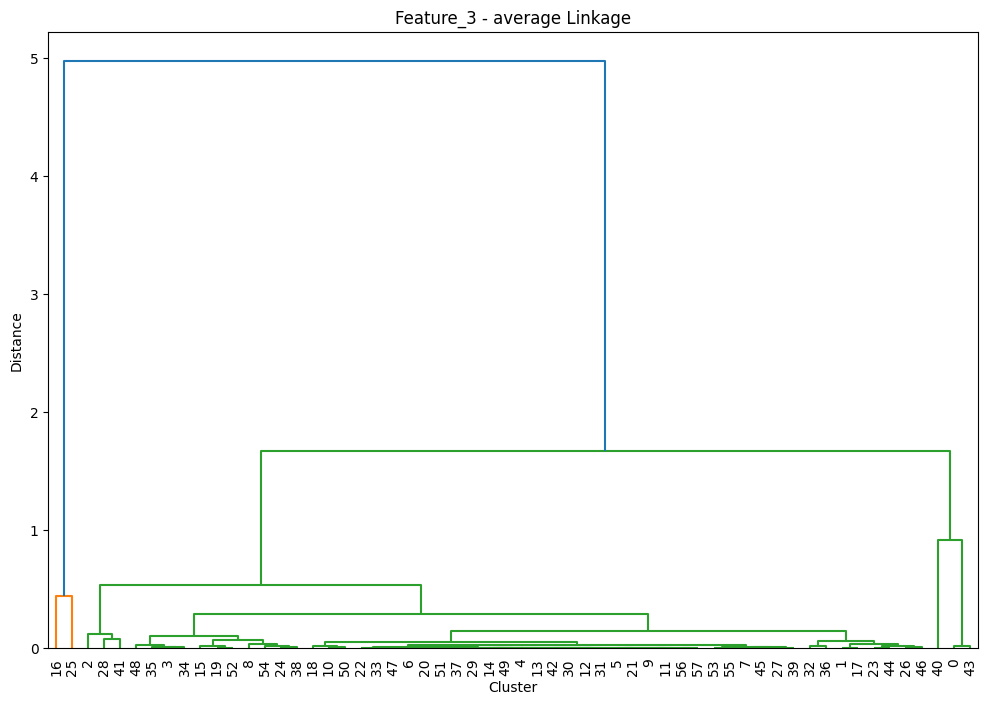

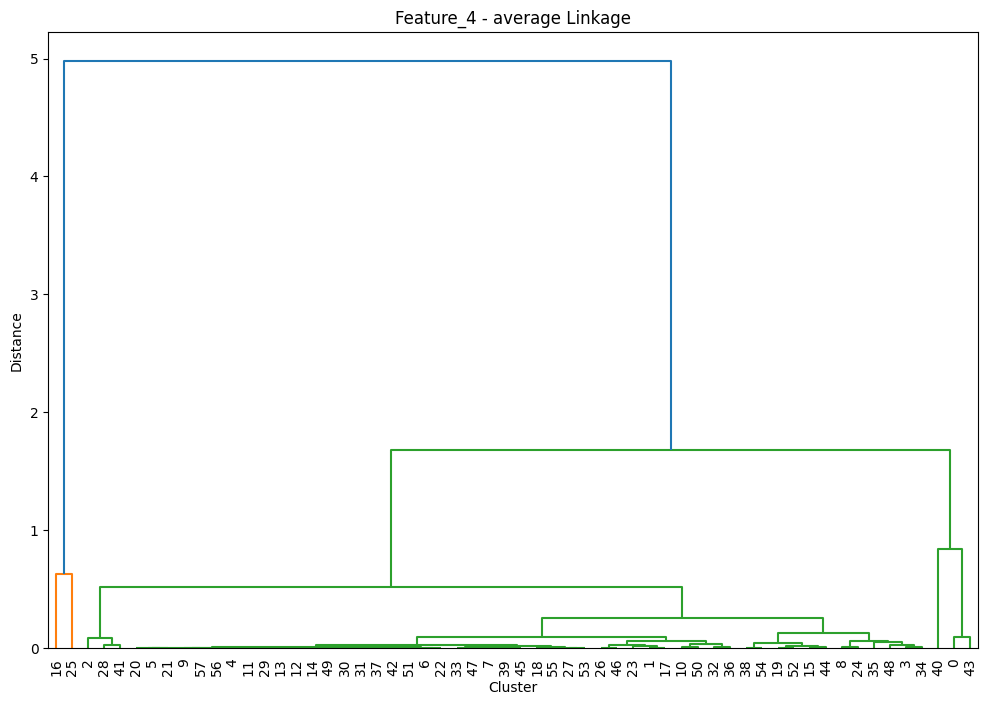

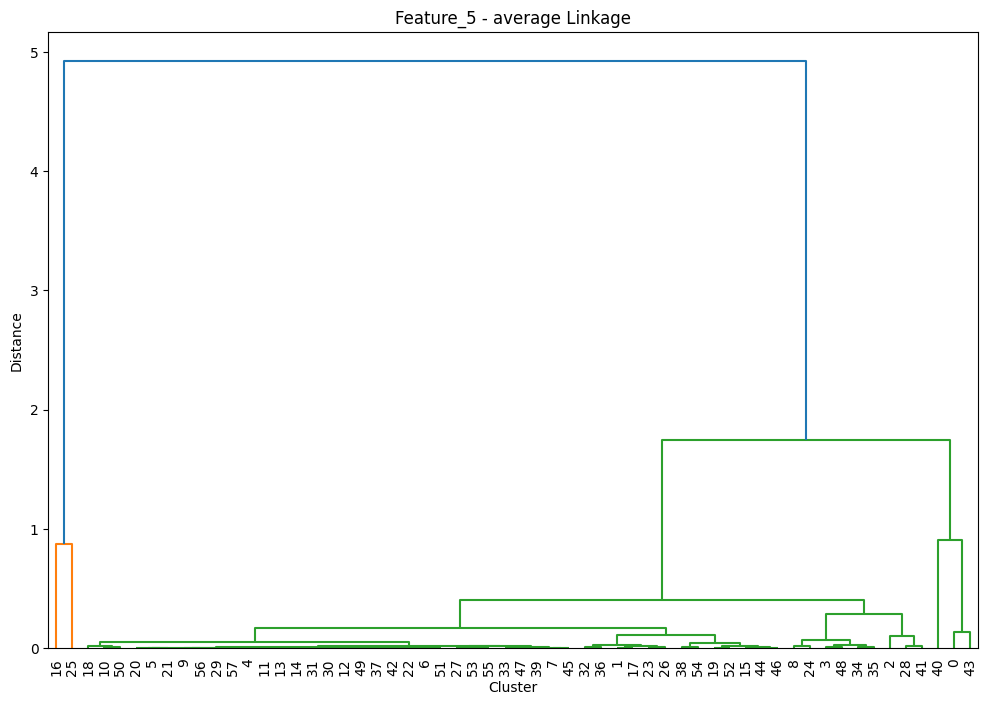

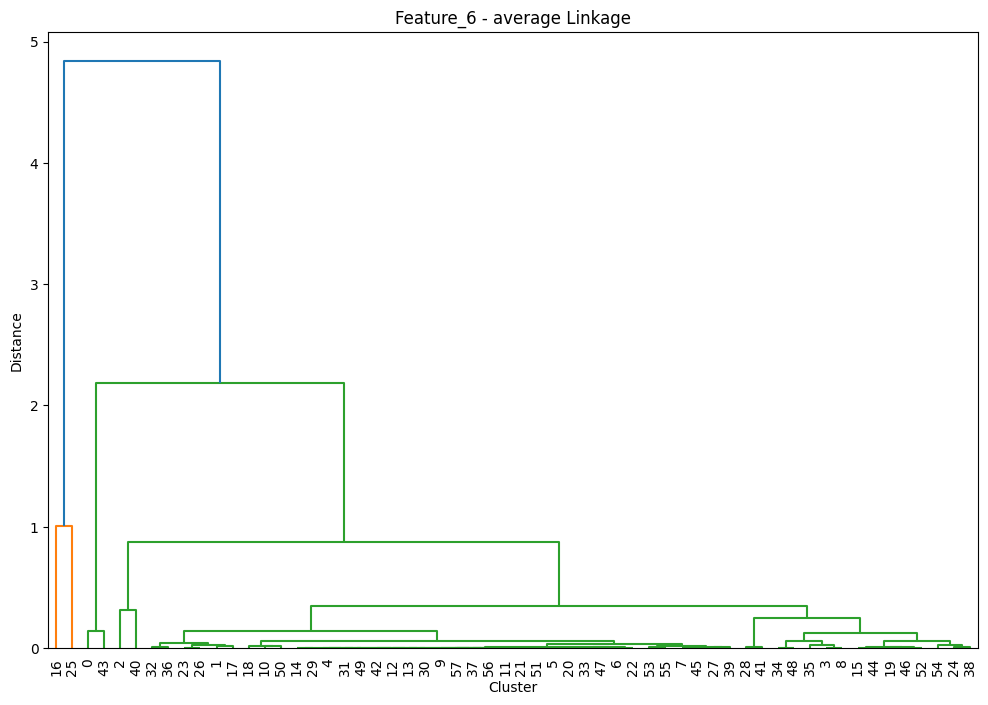

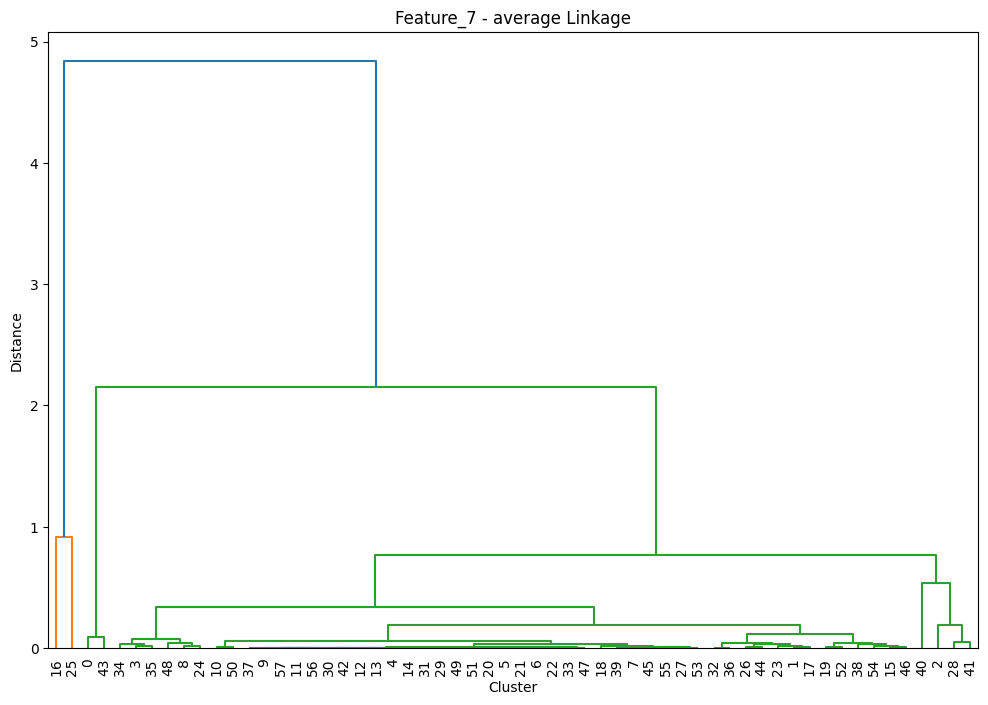

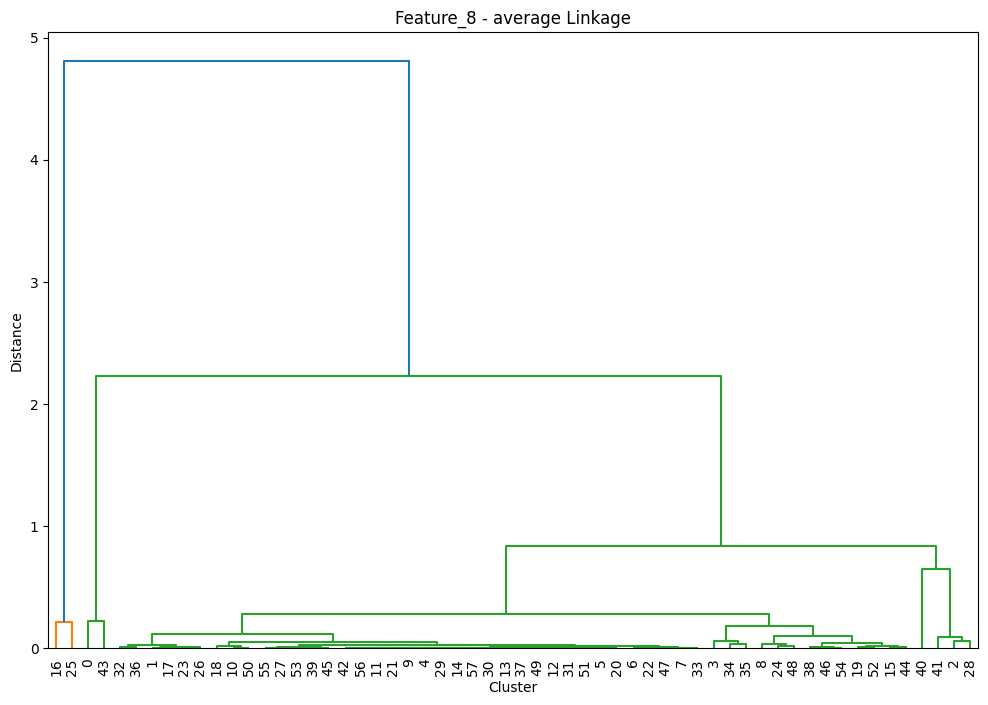

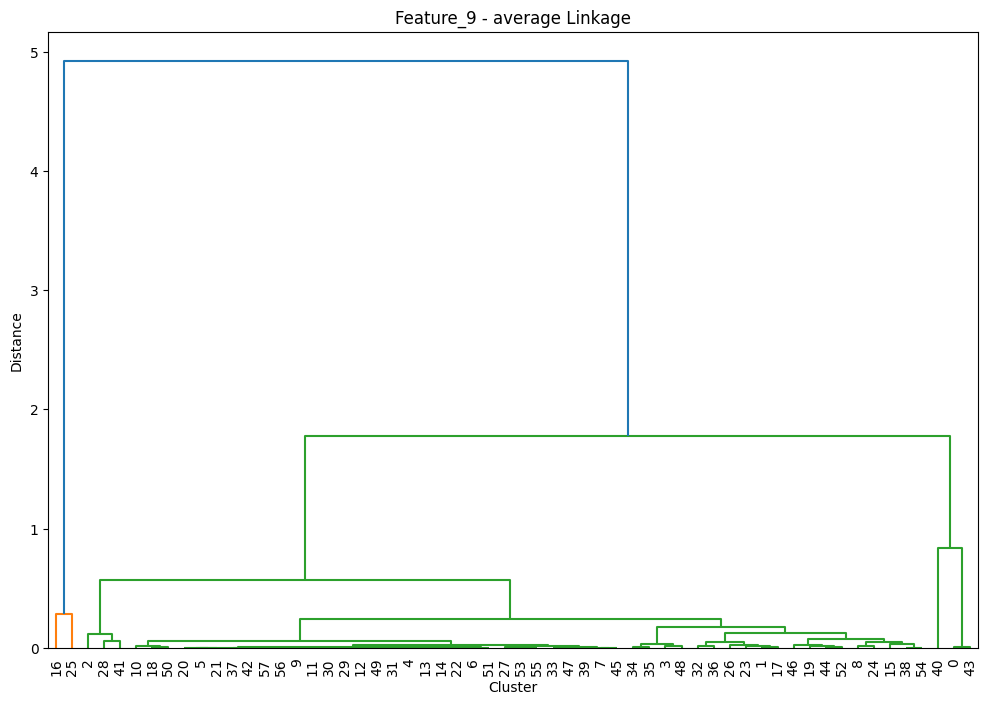

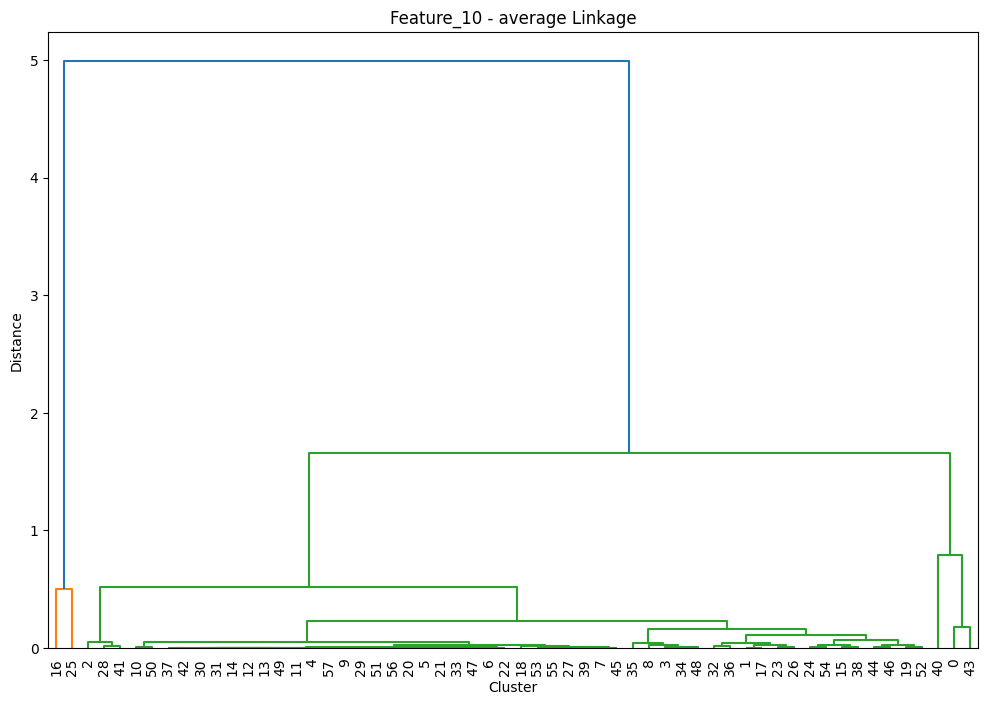

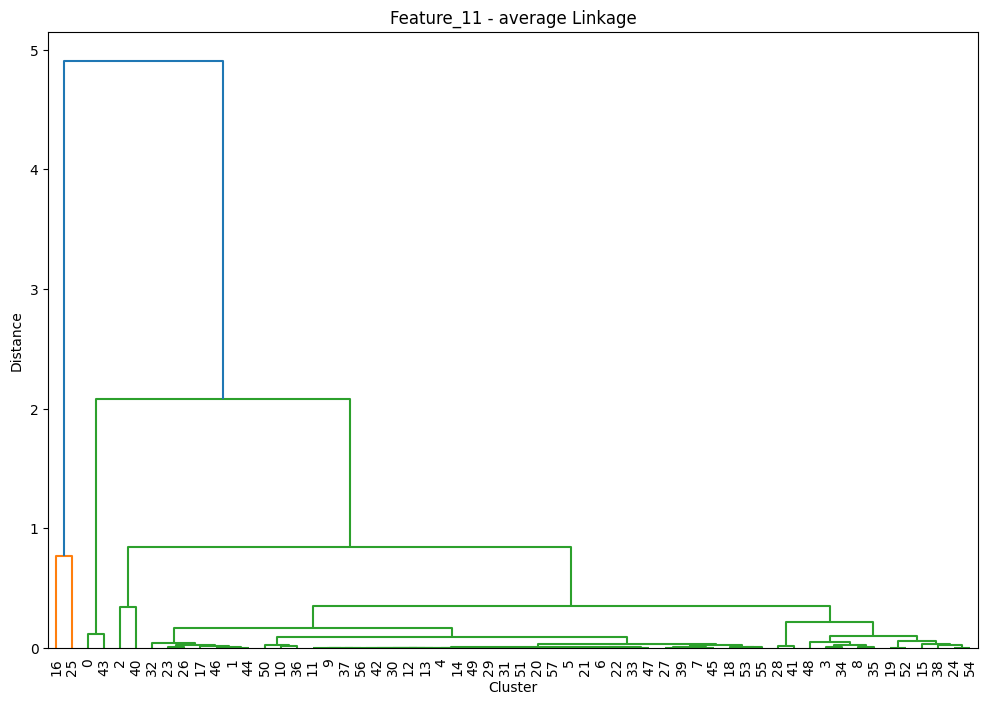

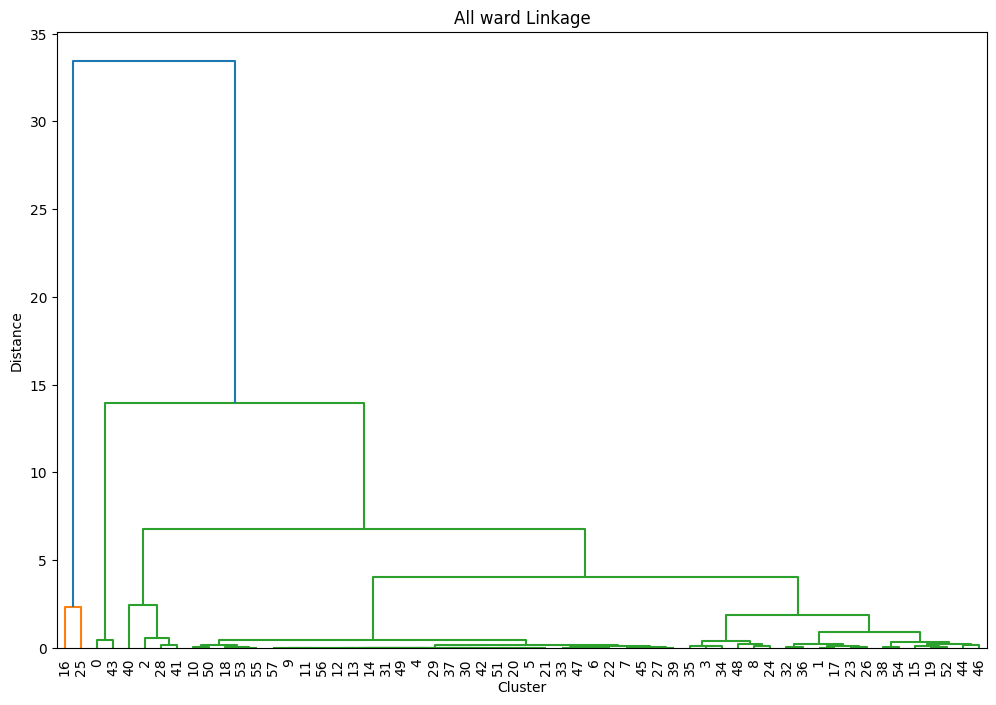

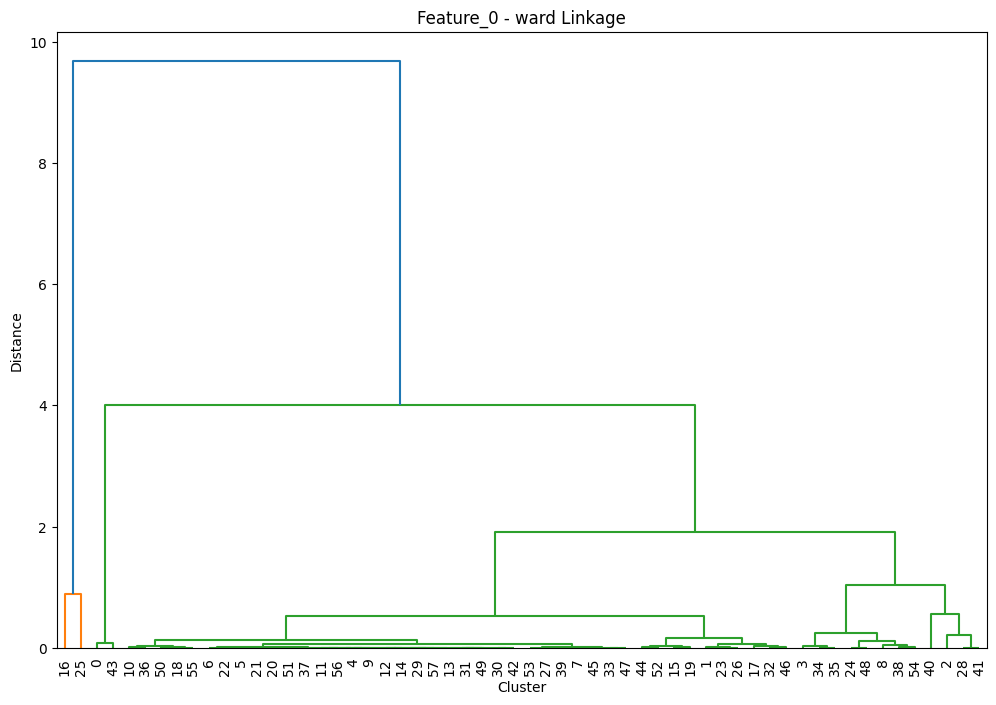

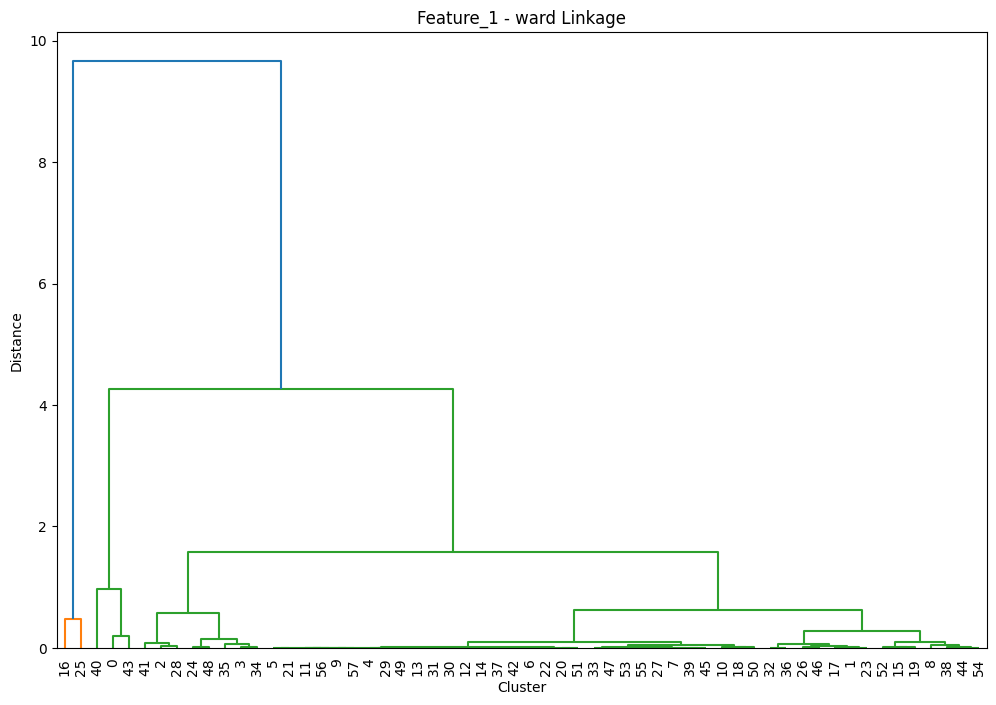

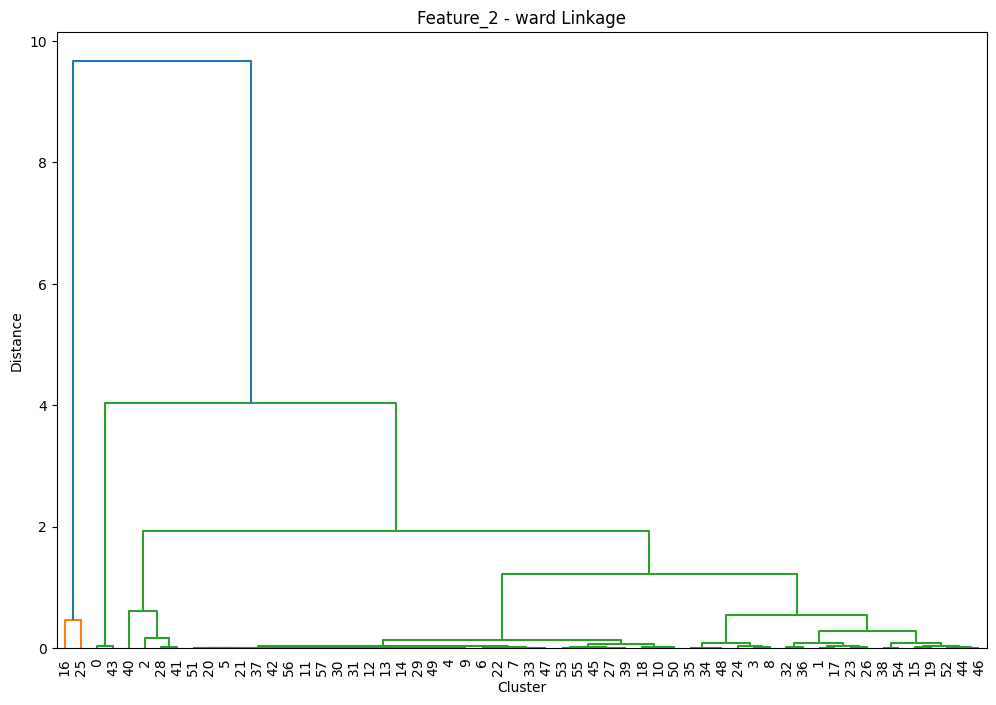

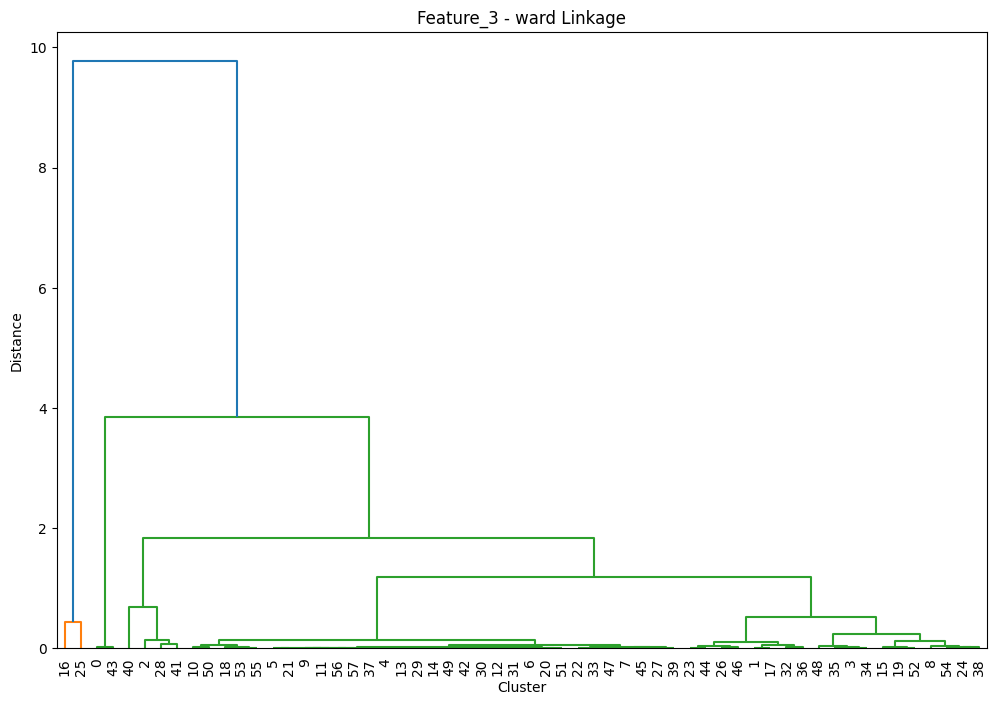

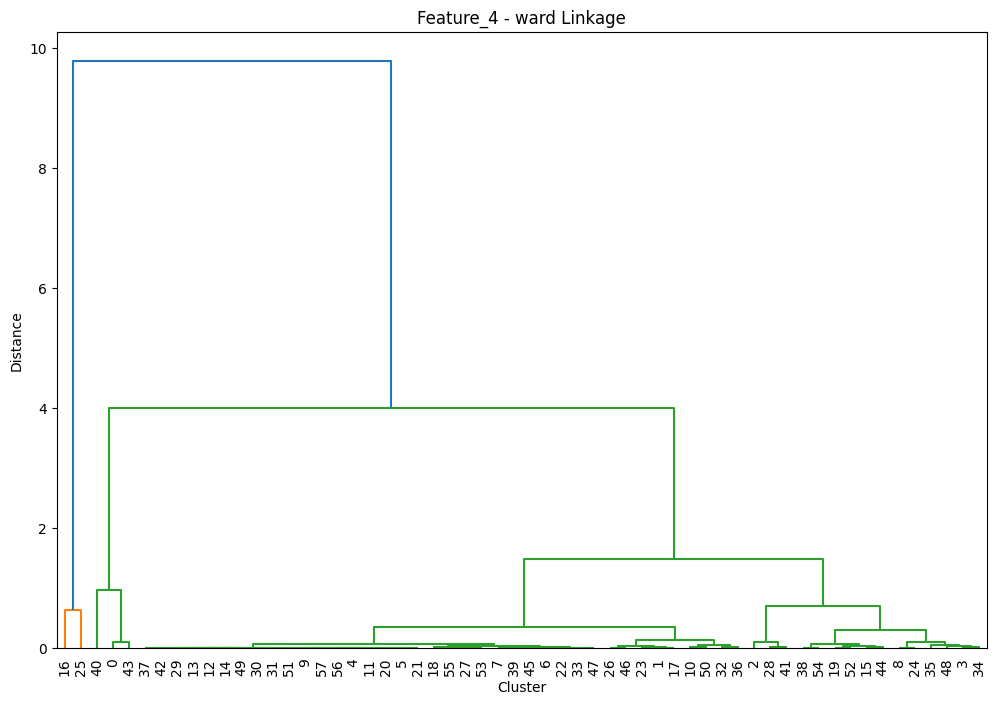

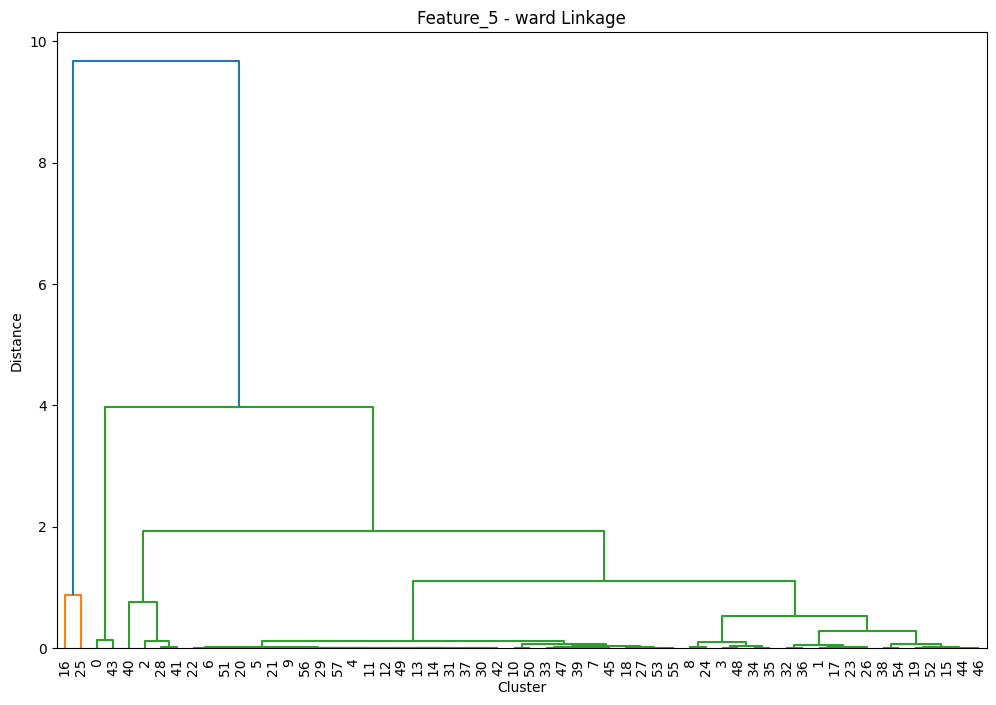

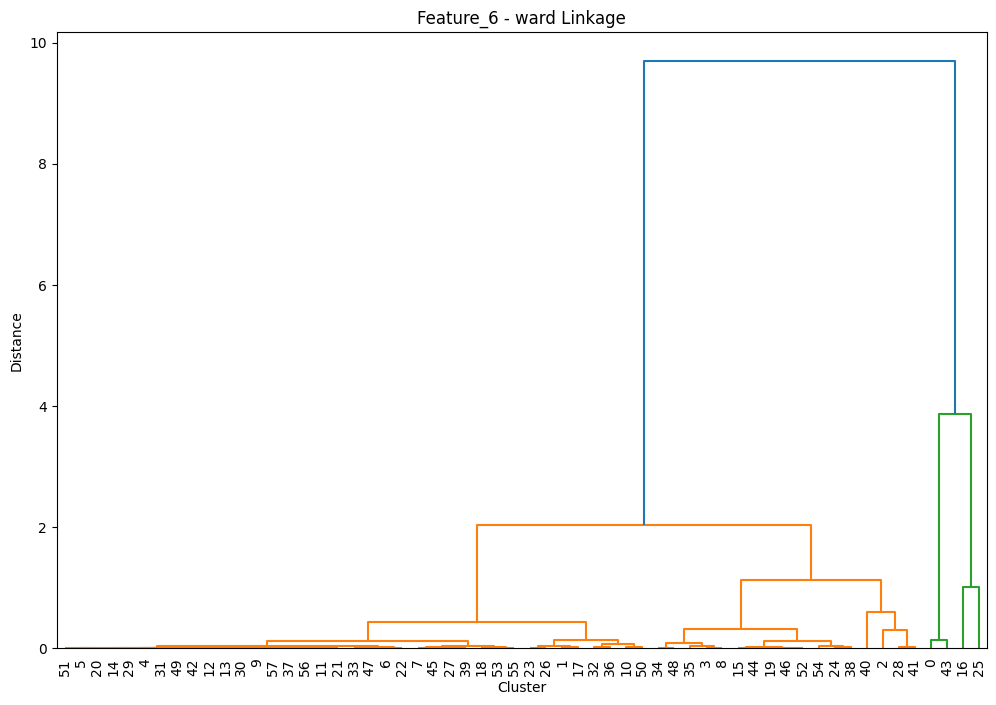

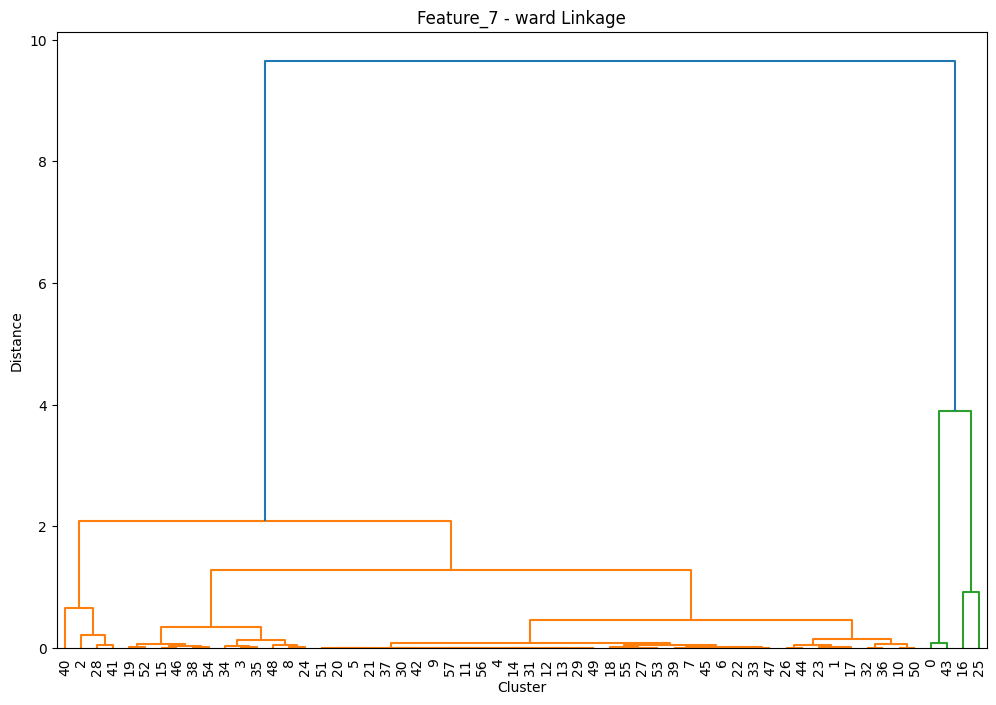

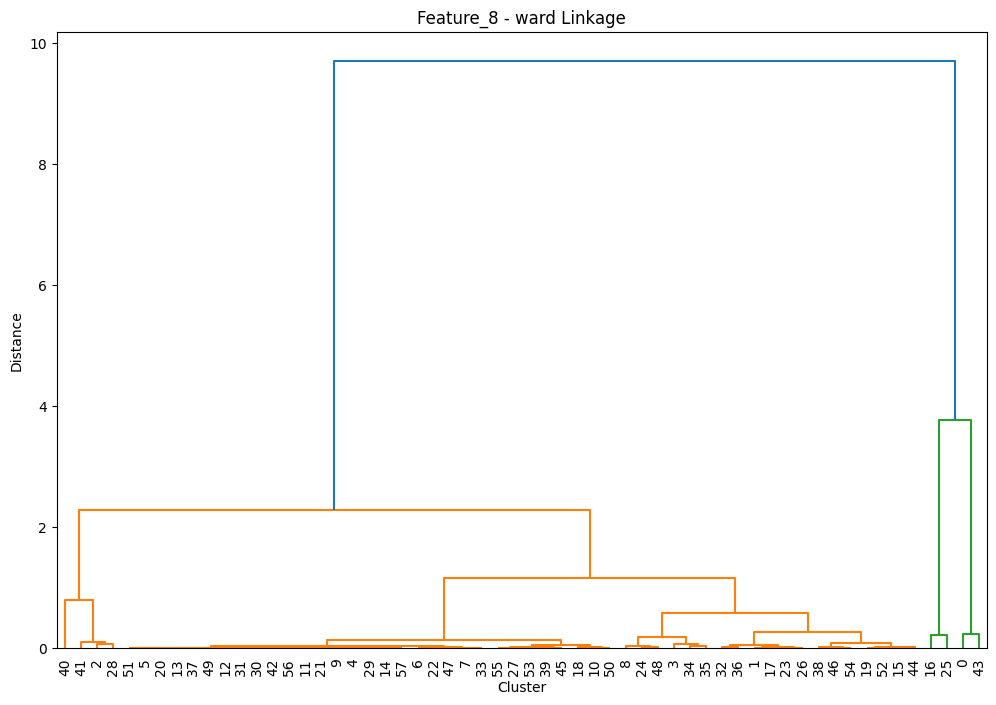

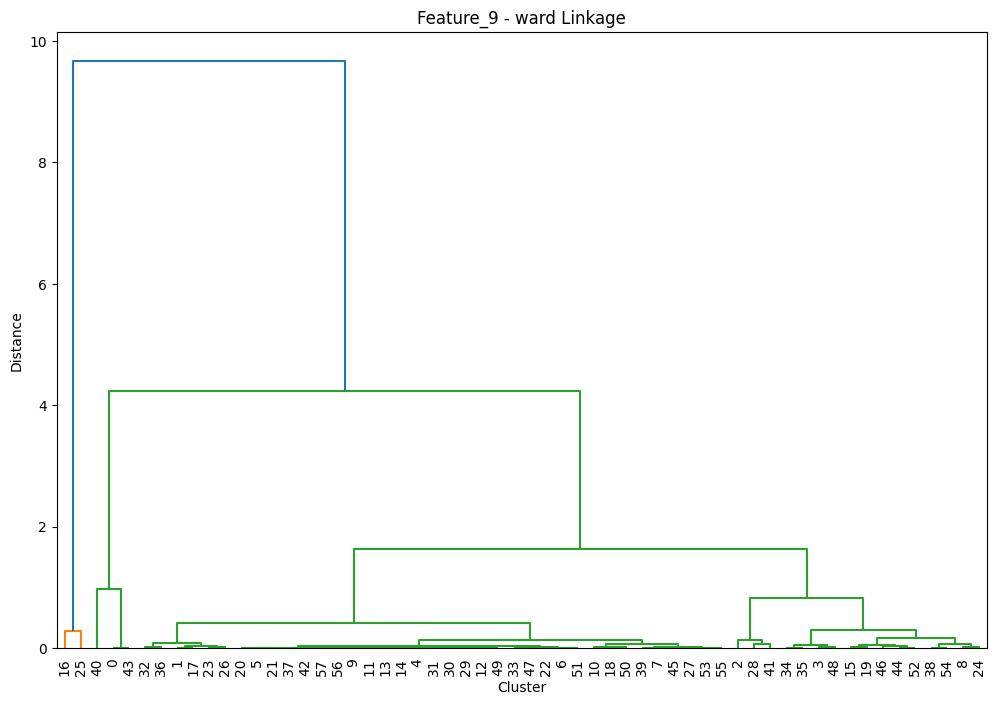

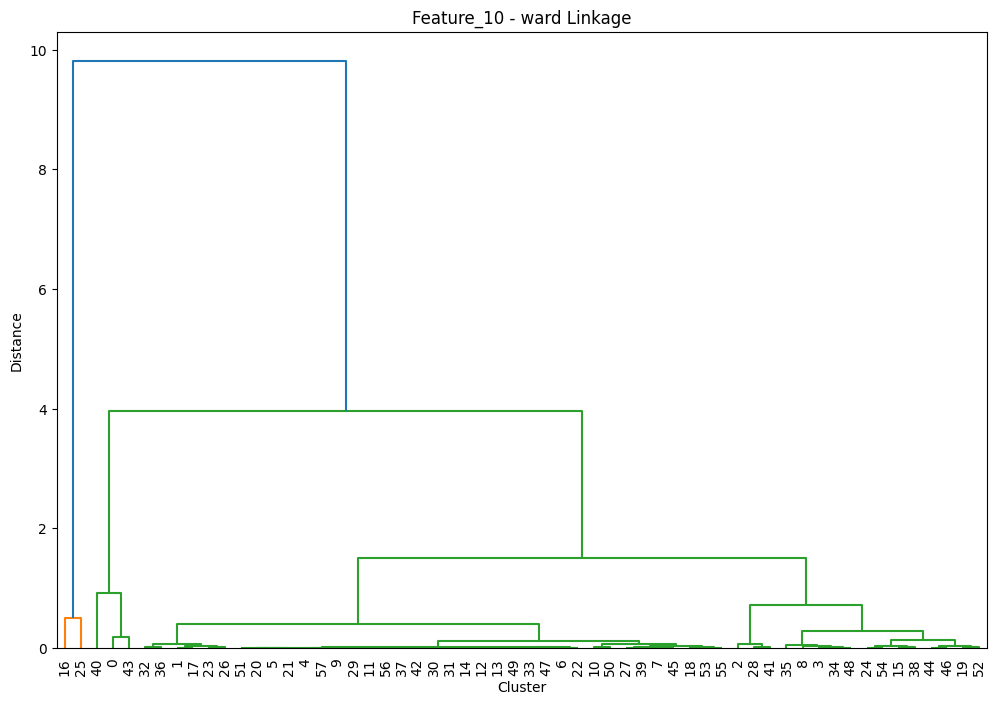

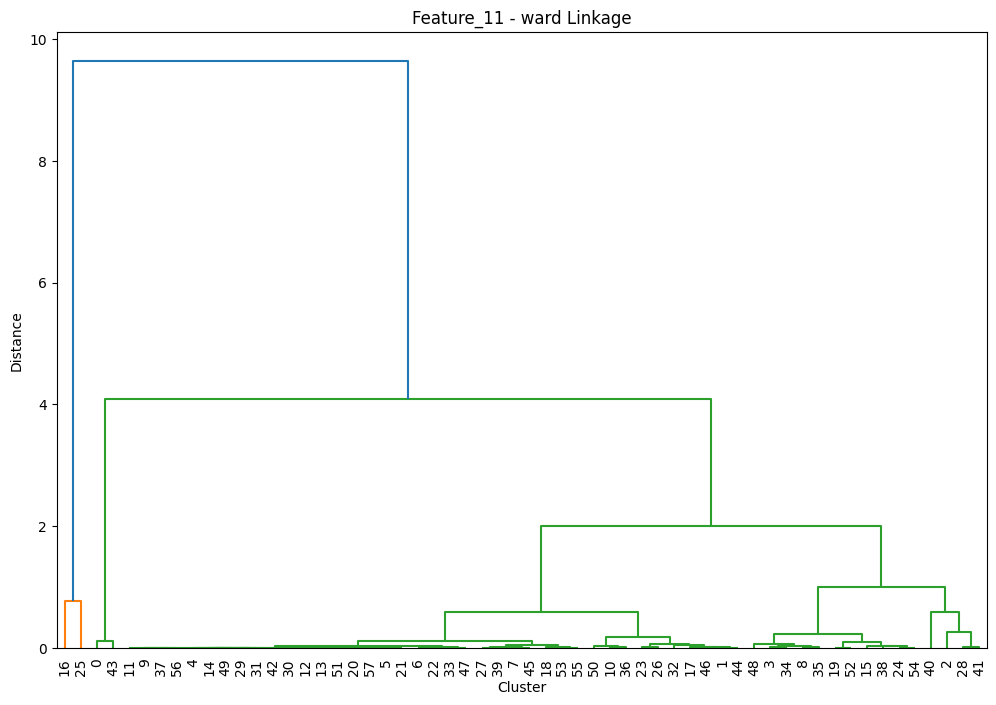

In [41]:
# For Gene Dataframe

for linkage_type in linkage_methods:
    hc = HierarchicalClustering(norm_genedata.values)
    linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
    hc.plot_dendrogram(linkage_matrix, title=f'All {linkage_type} Linkage')
    for feature_name in norm_genedata.columns:
        feature_data = norm_genedata[[feature_name]]
        hc = HierarchicalClustering(feature_data)
        linkage_matrix = hc.perform_clustering(linkage_type=linkage_type)
        hc.plot_dendrogram(linkage_matrix, title=f'{feature_name} - {linkage_type} Linkage')

## General Observations

- **Comparison Across Linkage Methods:** The choice of linkage method impacted cluster shapes and sizes. Ward linkage, for instance, created clusters with similar sizes, while single linkage produced more uneven cluster sizes.

- **Limited Contribution:** The binary nature of the "gender" feature, encoded as 0 or 1, results in a fixed and limited range of values for distance calculations. In hierarchical clustering, this binary variable may not significantly influence cluster formation when combined with other features such as age, income, and spending score.

- **Impact of Scaling:** Scaling or normalizing continuous variables (e.g., age, income, spending score) is important in hierarchical clustering. Scaling ensures that all variables have a similar impact on distance calculations, which can help prevent one variable from dominating the clustering process. However, the binary nature of "gender" may still have limited impact on distances even after scaling.

# The Importance of Normalization in Data Analysis and Clustering

Normalization is crucial in data analysis and clustering because it scales all features to a consistent range, preventing any single feature from dominating the clustering process due to its larger magnitude. It establishes a level playing field, which is particularly essential when dealing with variables of different units or orders of magnitude. 

## Impact of Normalization on Dendrograms

After normalization, dendrograms in hierarchical clustering exhibit significant variations in their structure and appearance. Normalization plays a vital role in determining the distance metric used in clustering algorithms. It ensures that each feature contributes equally to the distance calculations, promoting fair and unbiased clustering results.

Without normalization, features with larger scales might overshadow the clustering outcomes, potentially obscuring the underlying data patterns. By normalizing the data, dendrograms become more representative of the true similarities and dissimilarities between data points. This, in turn, leads to more meaningful and interpretable clustering results.

## Dimensionality Reduction

PCA allows you to reduce the dimensionality of your data while retaining most of the variation. By visualizing the dendrogram after applying PCA, you can assess how well the reduced-dimensional data captures the underlying structure of your data. If you find that the reduced data retains the same cluster relationships, it suggests that you can work with a lower-dimensional representation of your data.
